Reading dataset

In [51]:
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

path = './Dataset/'

line_counter = 0
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        line_counter += len(lines) - 1   #last line of each file is an empty file

all_data = np.zeros((line_counter, 483), dtype='float32')
line_counter = 0

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        for line in lines:
            if line == "":
                break
            values = [x for x in line[0:len(line)-1].split(' ')[:]]
            for i, value in enumerate(values):
                if i == 0:
                    all_data[line_counter, i] = value
                else:
                    key = value.split(':')[0]
                    temp = value.split(':')[1]
                    all_data[line_counter, int(key)+1] = temp
            line_counter += 1

In [52]:
np.shape(all_data) # we don't have understood why shape doesn't correspond to UCI dataset description (we have checked the parsing phase and seems to be all right)

(107856, 483)

save labels in external data both in their natural form for make experiments with regression models and arounded for make experiments with classification models

In [53]:
label_regression = all_data[:,0]
label_regression

array([0.07407407, 0.68421054, 0.8148148 , ..., 0.71929824, 0.40350878,
       0.40350878], dtype=float32)

In [54]:
label_classification = np.around(label_regression, decimals=0).astype(int)
label_classification

array([0, 1, 1, ..., 1, 0, 0])

In [55]:
np.savetxt("./Labels/label_regression.csv", label_regression, delimiter=';')
np.savetxt("./Labels/label_classification.csv", label_classification, delimiter=';')

# Description of feature (to do or just hint it and describe in slides)

In [56]:
import pandas as pd

all_data_df = pd.DataFrame(all_data)
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  473  474  \
0       0.074074  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1       0.684211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2       0.814815  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3       0.814815  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
4       0.421053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.438596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107852  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107853  0.719298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107854  0.403509  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   
107855  0.403509  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   

        475  476  477  478  479  480  481  482  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[107856 rows x 483 columns]

In [57]:
counter_duplicated = 0
for boolean_value in all_data_df.duplicated():
    if boolean_value:
        counter_duplicated += 1
counter_duplicated

27607

27607 samples over 107856 (about 25% of the dataset) are doubles (pandas count only one occurrence for set of duplicated).

In [58]:
all_data_df.drop_duplicates(inplace=True)
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  473  474  \
0       0.074074  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1       0.684211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2       0.814815  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3       0.814815  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
4       0.421053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.438596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107852  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107853  0.719298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107854  0.403509  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   
107855  0.403509  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   

        475  476  477  478  479  480  481  482  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 483 columns]

In [59]:
all_data = all_data[:,1:]
all_data_df.drop(columns=[0], inplace=True)
all_data_df.reset_index(inplace=True, drop=True)
all_data_df

1    2    3    4    5    6    7    8    9    10   ...  473  474  475  \
0      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80247  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80248  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       476  477  478  479  480  481  482  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 482 columns]

check missing value

In [60]:
if all_data_df.isnull().all().any():
    print("some column has all null value")
if all_data_df.isnull().any().any():
    print("some column has any null value")

check column with all zeros

In [61]:
column_c = 0
for i, column in enumerate(all_data_df):
    if (all_data_df[column] == 0).all():
        column_c +=1
print(column_c)

217


make double check with all_data numpy array

In [62]:
column_c = 0
for i in range(0, 482):
    if (all_data[:,i] == 0).all():
        column_c +=1
print(column_c)

217


In [63]:
column_removed = []
column_c = 0
for i, column in reversed(list(enumerate(all_data_df))):   # in reverse order because we delete this columns also in numpy matrix (anyway indexing error because we are in a loop)
    if (all_data_df[column] == 0).all():
        column_removed.append(i)
        column_c += 1
        all_data_df.drop(column, axis=1, inplace=True)
        all_data = np.delete(all_data, i, axis=1)
print(column_c)

217


In [64]:
column_removed

[481,
 480,
 479,
 476,
 474,
 473,
 471,
 466,
 465,
 464,
 463,
 460,
 459,
 455,
 450,
 449,
 447,
 445,
 444,
 442,
 441,
 440,
 439,
 438,
 436,
 435,
 434,
 432,
 431,
 430,
 429,
 428,
 427,
 426,
 425,
 424,
 423,
 419,
 417,
 416,
 415,
 414,
 413,
 409,
 407,
 406,
 403,
 402,
 399,
 395,
 389,
 386,
 384,
 383,
 382,
 381,
 380,
 379,
 378,
 377,
 373,
 372,
 371,
 352,
 351,
 350,
 349,
 348,
 347,
 346,
 345,
 344,
 343,
 342,
 341,
 340,
 339,
 338,
 337,
 336,
 335,
 334,
 333,
 332,
 331,
 330,
 329,
 328,
 327,
 326,
 325,
 324,
 323,
 322,
 321,
 320,
 319,
 318,
 317,
 316,
 315,
 314,
 313,
 312,
 311,
 310,
 309,
 308,
 307,
 306,
 305,
 304,
 303,
 302,
 301,
 300,
 299,
 298,
 297,
 296,
 295,
 294,
 293,
 292,
 291,
 290,
 289,
 288,
 287,
 286,
 285,
 284,
 283,
 282,
 281,
 280,
 279,
 278,
 277,
 276,
 275,
 274,
 273,
 272,
 271,
 270,
 269,
 268,
 267,
 266,
 265,
 264,
 263,
 262,
 261,
 260,
 259,
 258,
 257,
 256,
 255,
 250,
 249,
 248,
 247,
 237,
 229

# Someone make a check if these columns are really all zeros values (so in starting file doesn't appears). It seems strange to me that about half of the features are all zeros value (but could be considering the way in which data are collected). Can be also some error I've made in first cell, but both Daniele were present when it has made and were pretty much sure it works properly

In [65]:
np.shape(all_data)

(107856, 265)

In [66]:
all_data_df

1    3    4    5    6    7    9    10   12   13   ...  462  463  468  \
0      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80247  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
80248  1.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

       469  470  471  473  476  478  479  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 265 columns]

In [67]:
import matplotlib.pyplot as plt
import seaborn as sbs

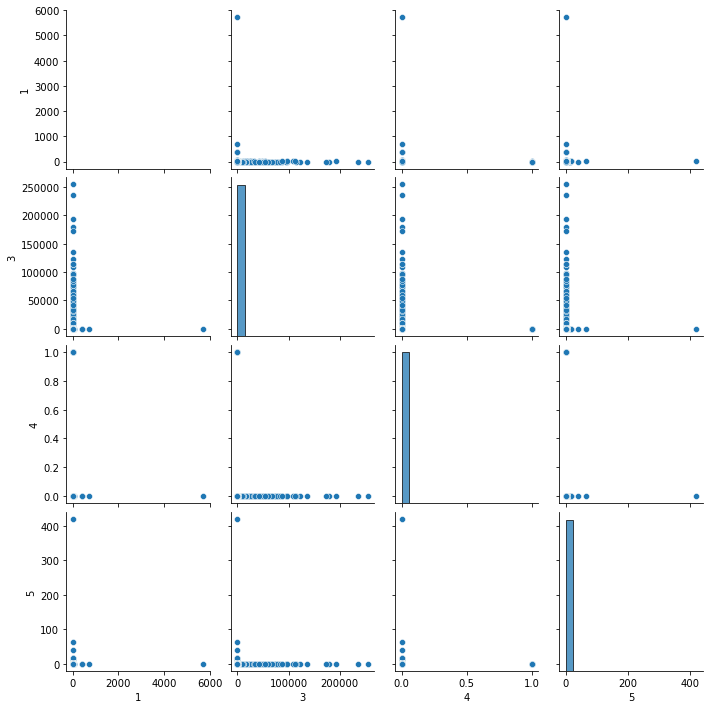

In [68]:
sbs.pairplot(all_data_df.iloc[:,0:4])

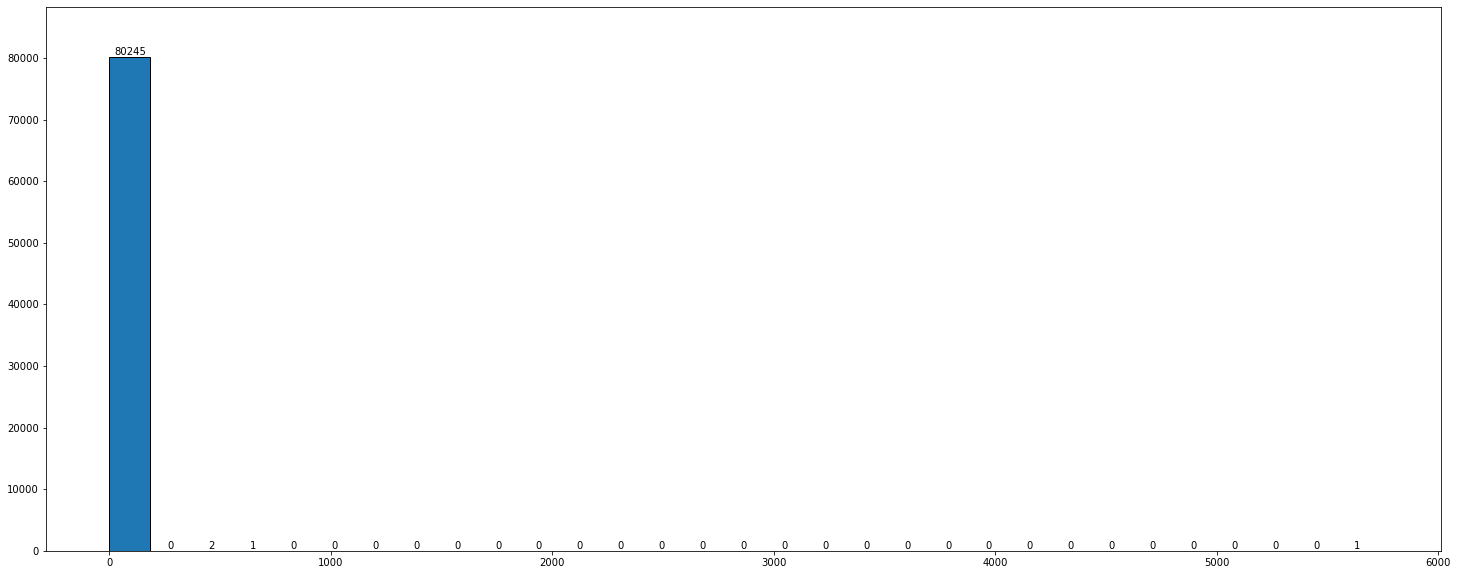

<Figure size 432x288 with 0 Axes>

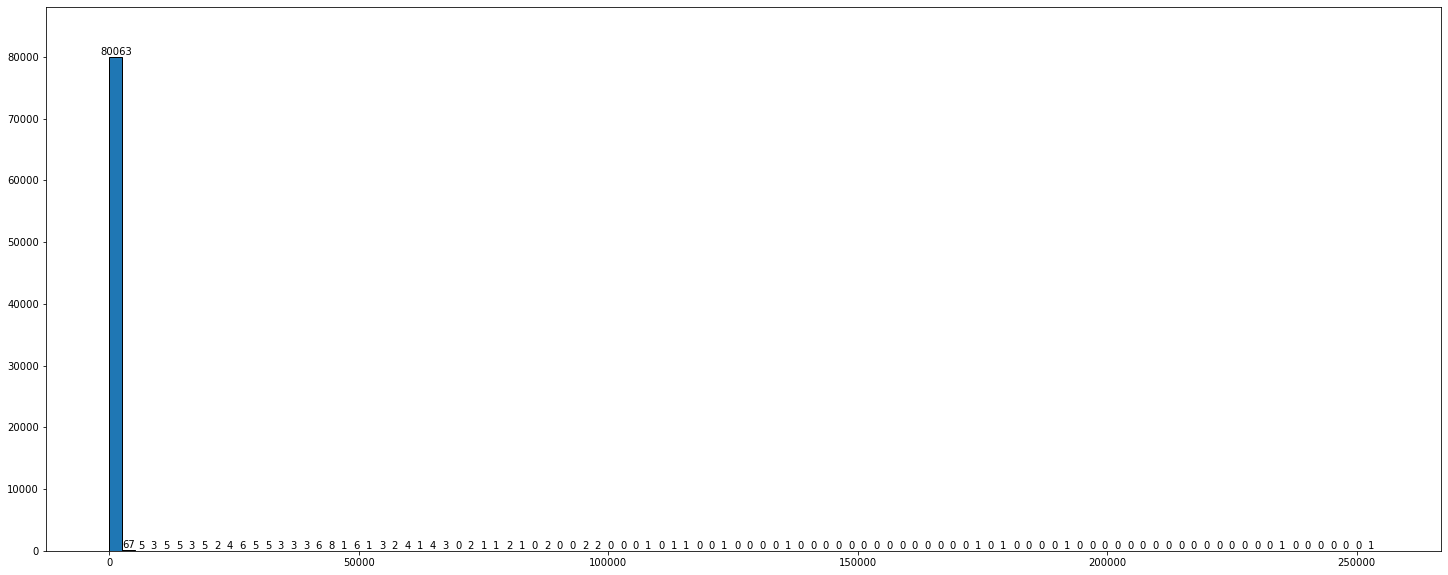

<Figure size 432x288 with 0 Axes>

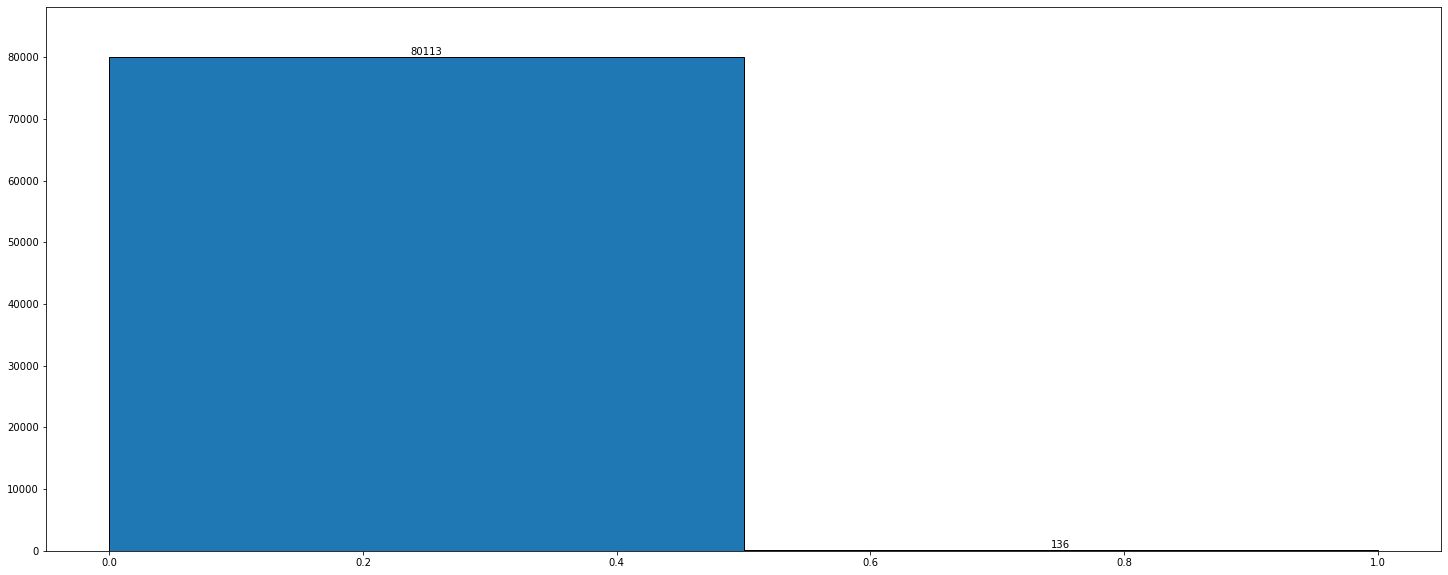

<Figure size 432x288 with 0 Axes>

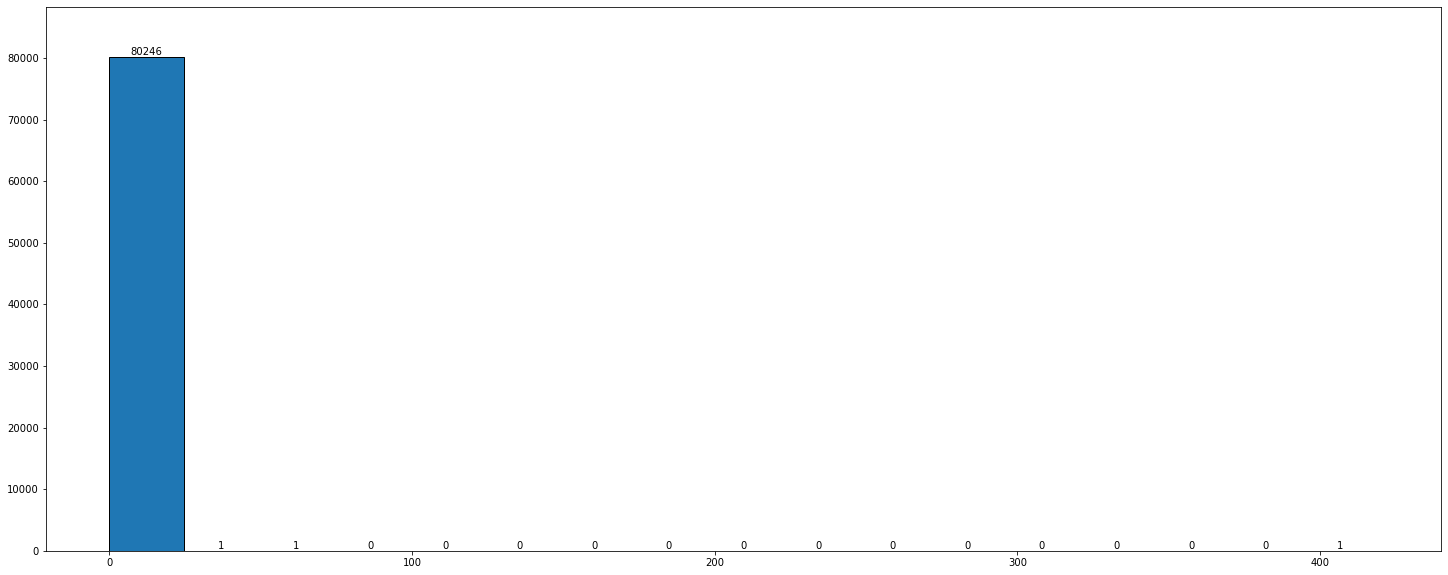

<Figure size 432x288 with 0 Axes>

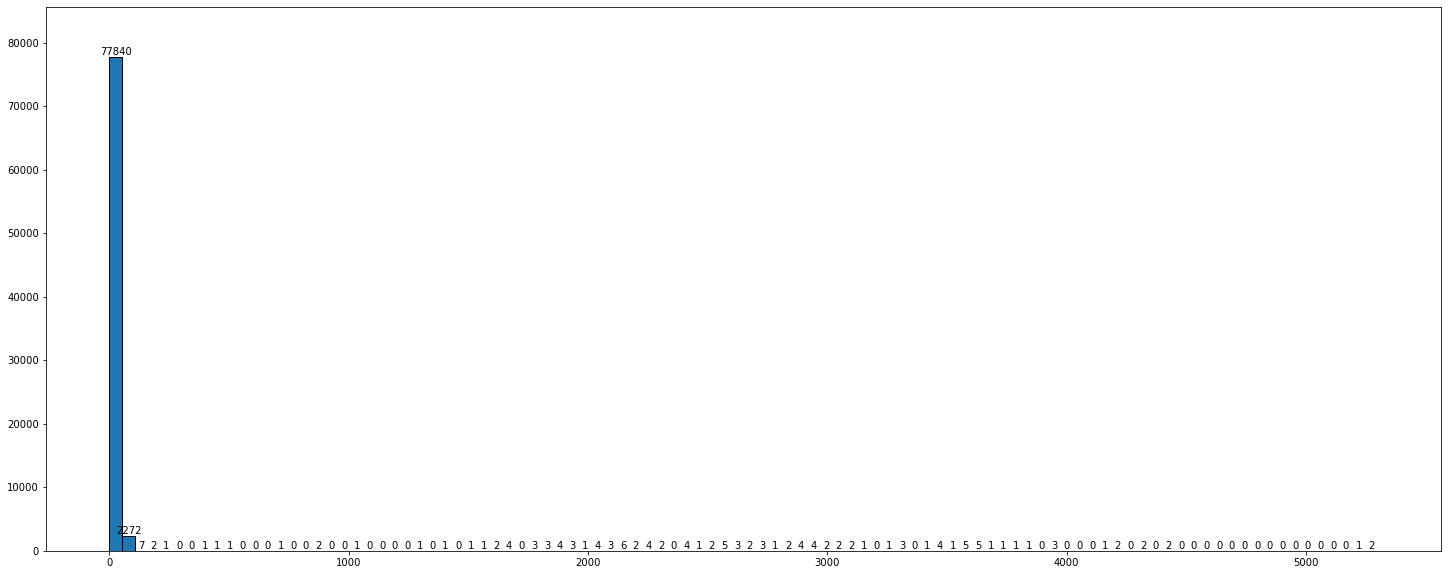

<Figure size 432x288 with 0 Axes>

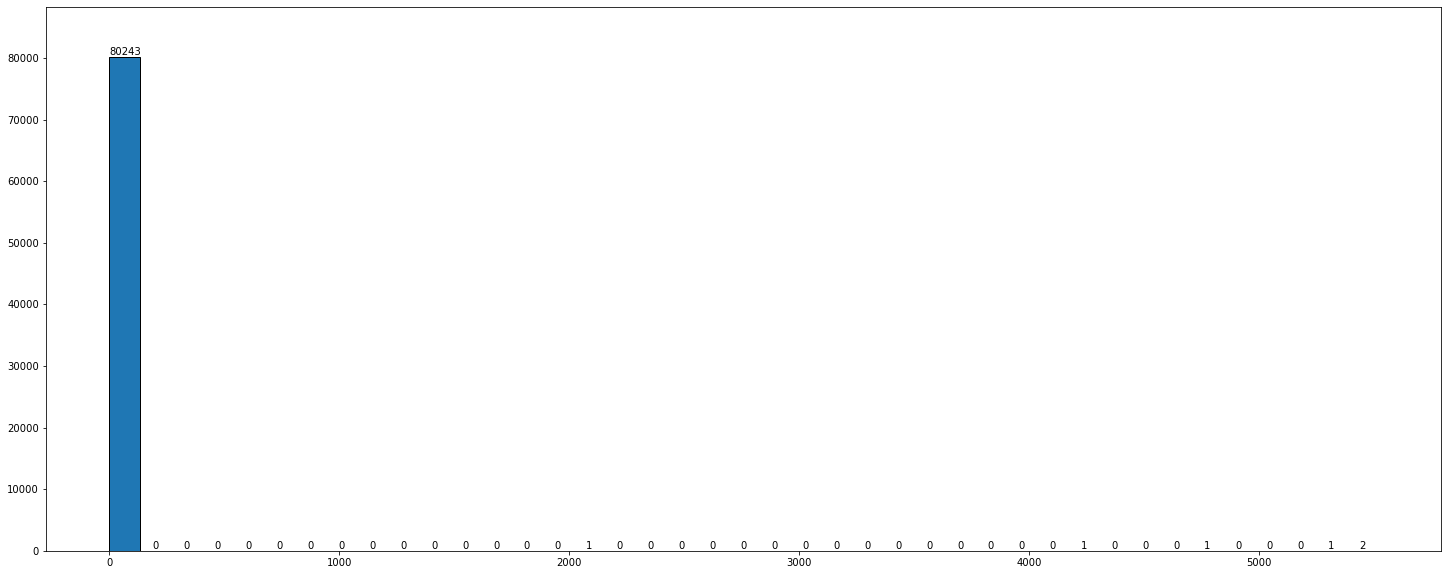

<Figure size 432x288 with 0 Axes>

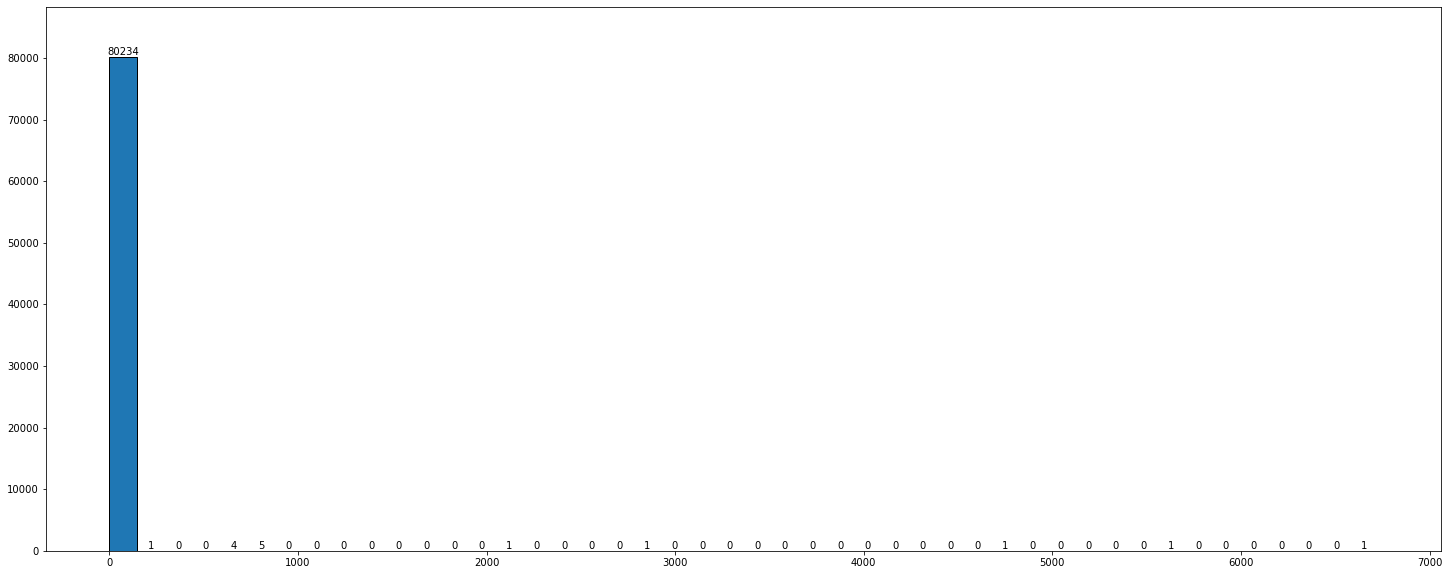

<Figure size 432x288 with 0 Axes>

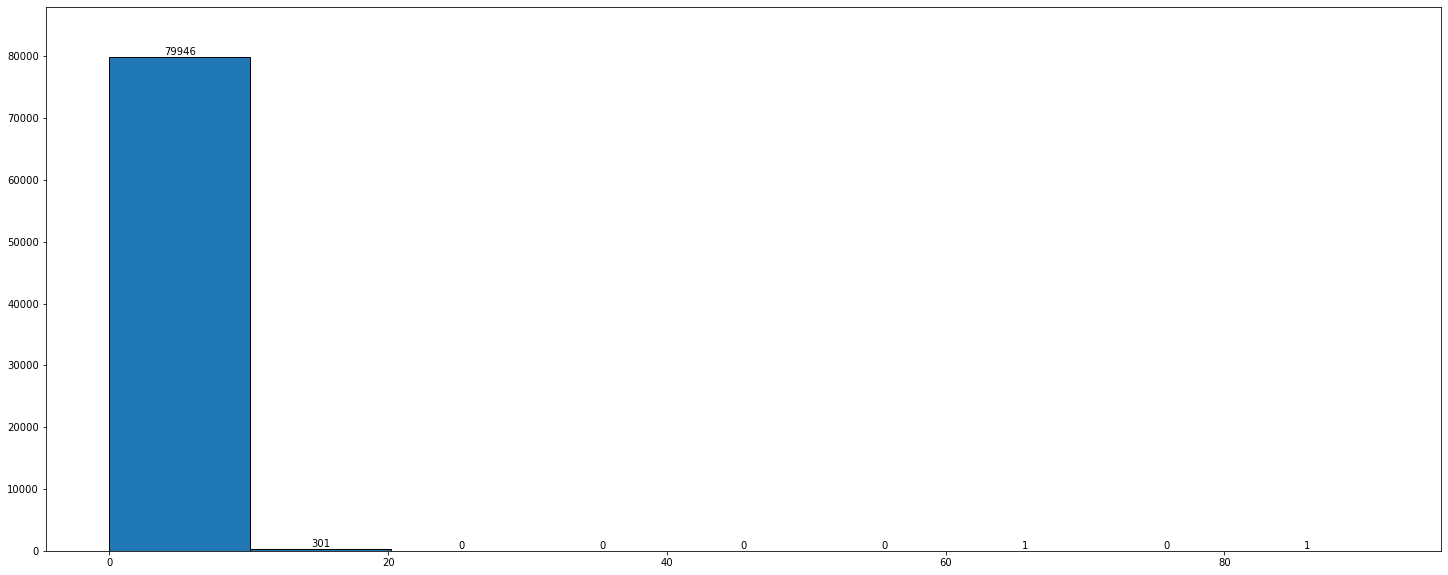

<Figure size 432x288 with 0 Axes>

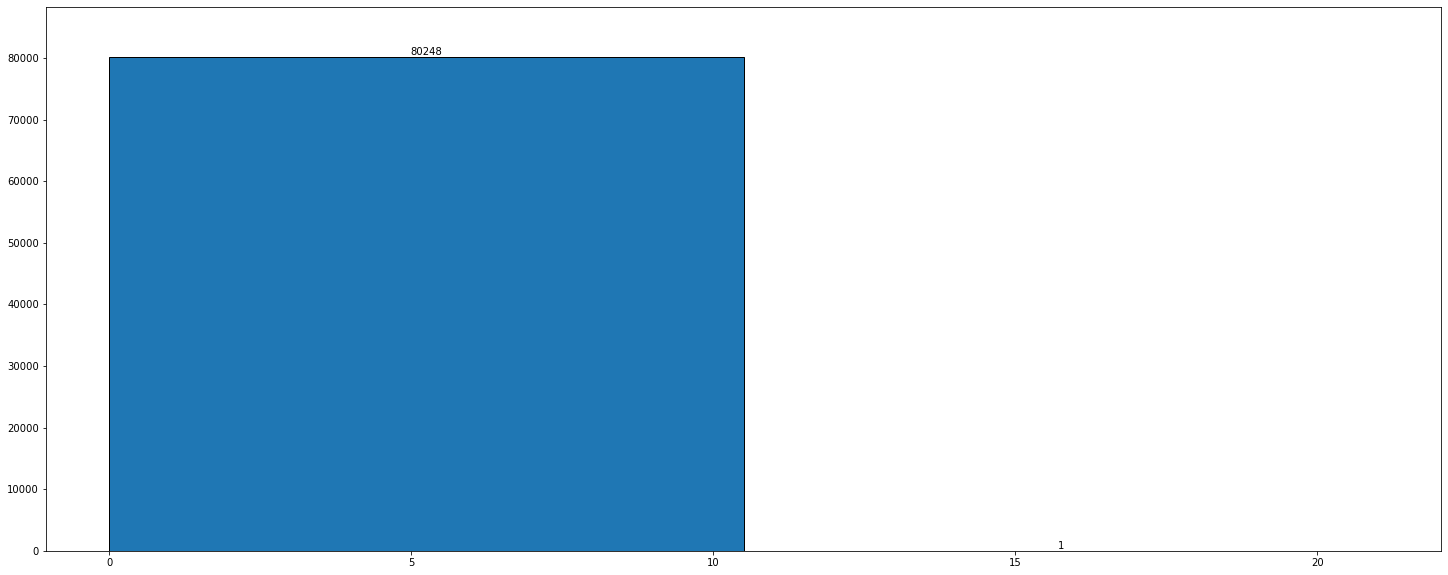

<Figure size 432x288 with 0 Axes>

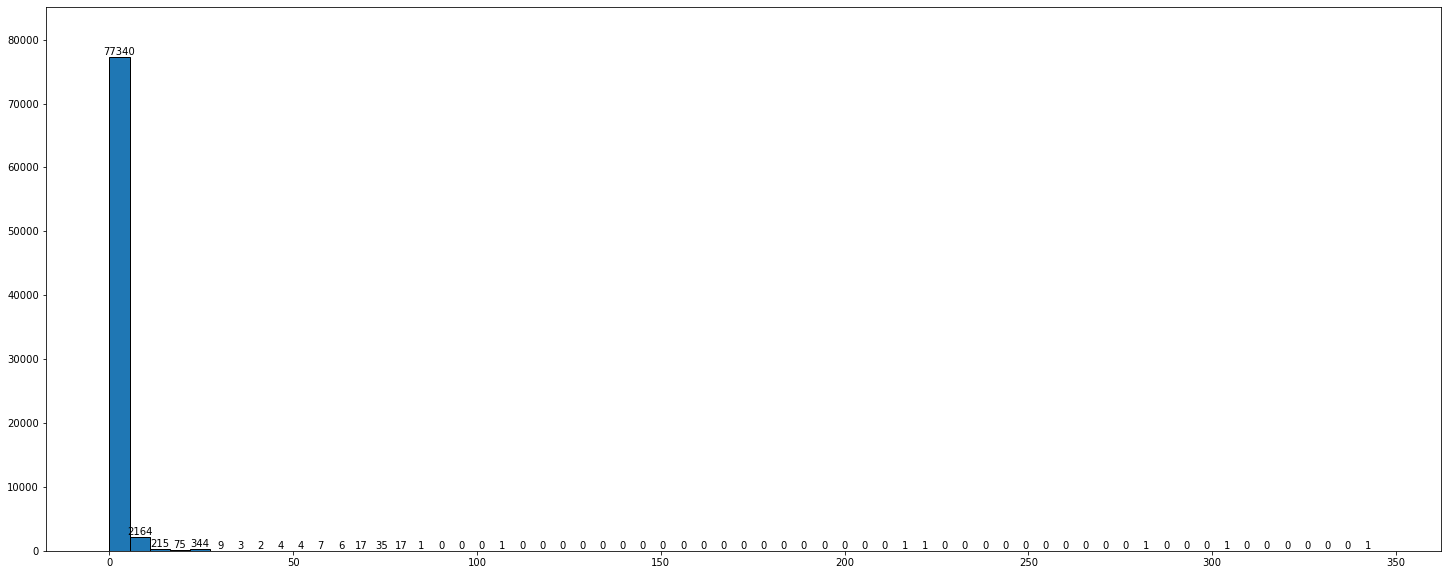

<Figure size 432x288 with 0 Axes>

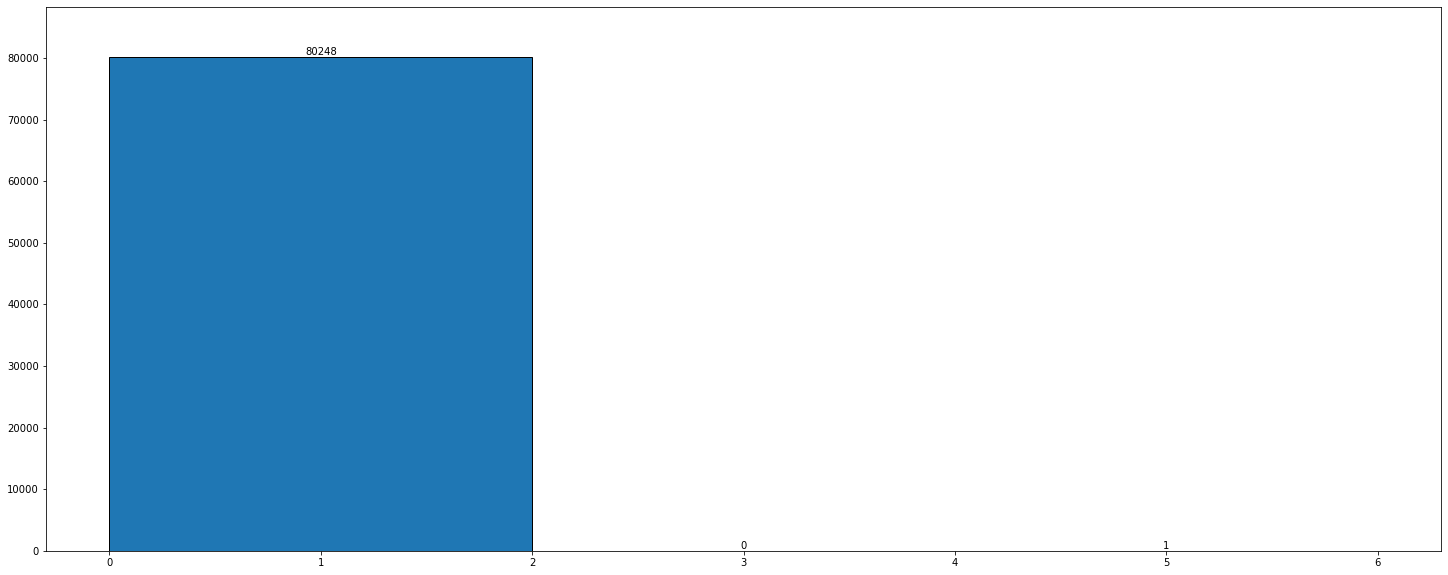

<Figure size 432x288 with 0 Axes>

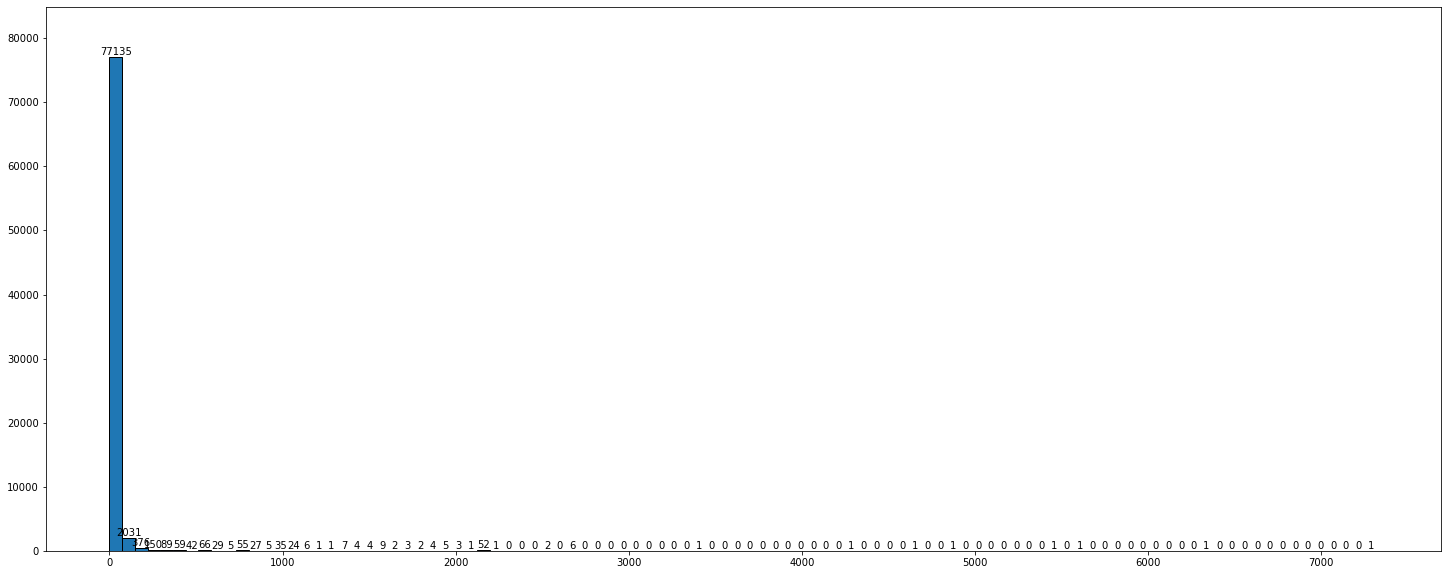

<Figure size 432x288 with 0 Axes>

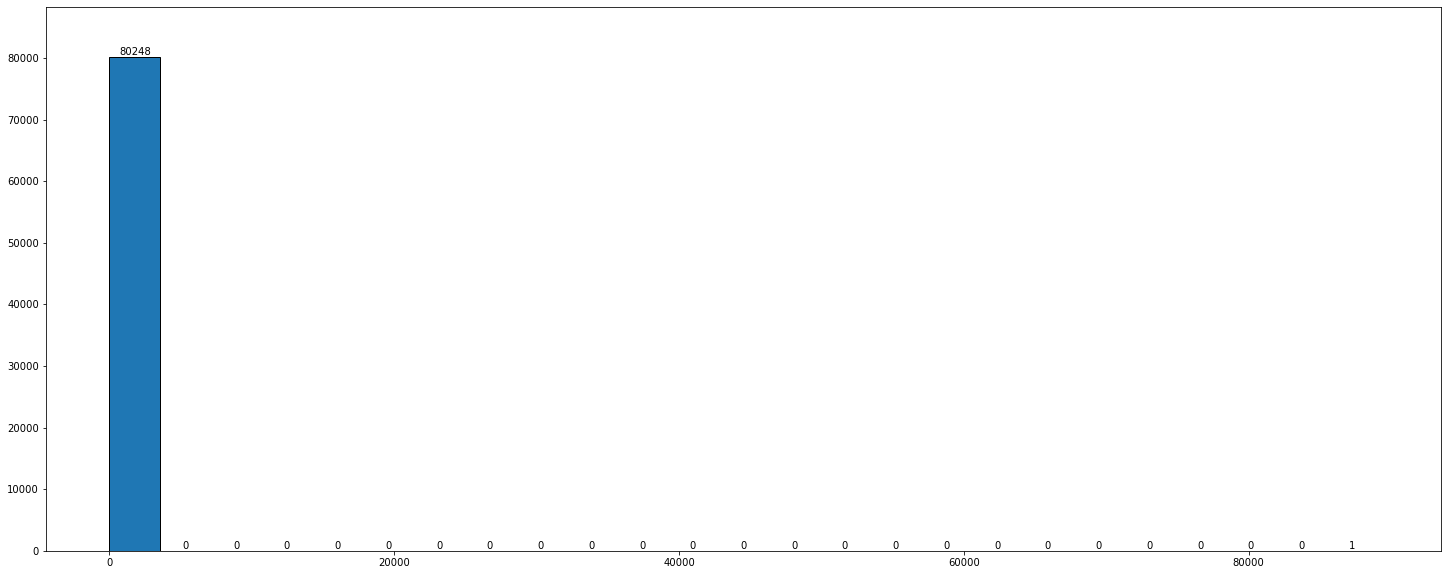

<Figure size 432x288 with 0 Axes>

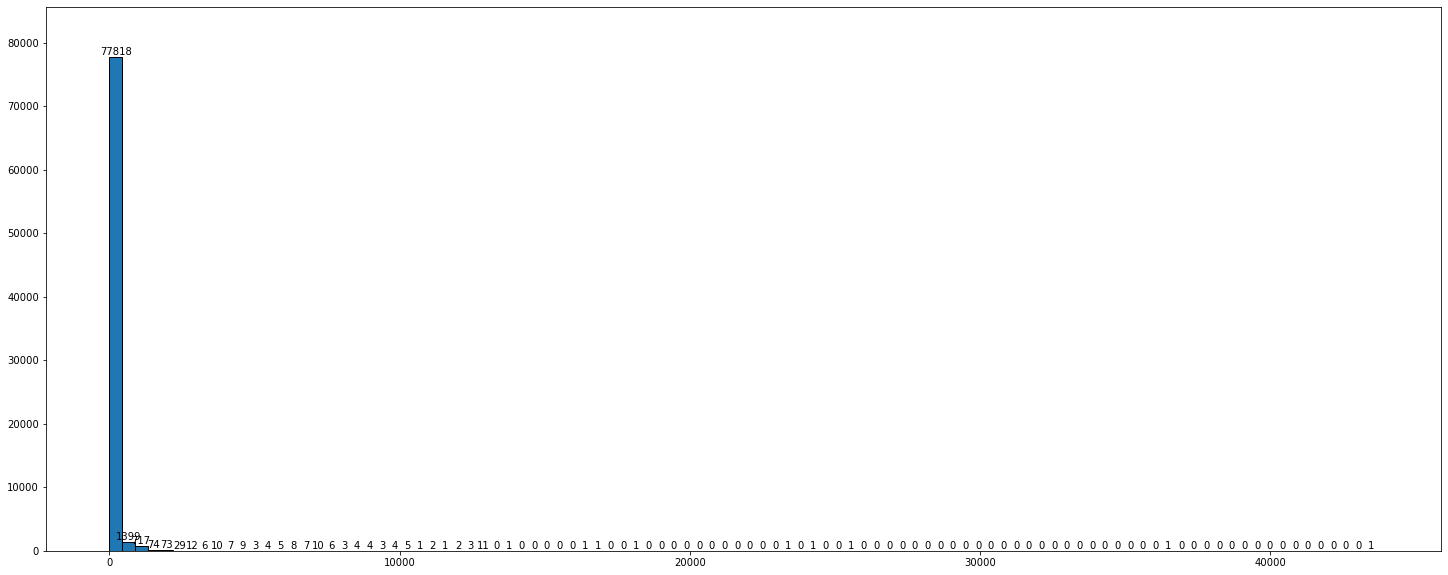

<Figure size 432x288 with 0 Axes>

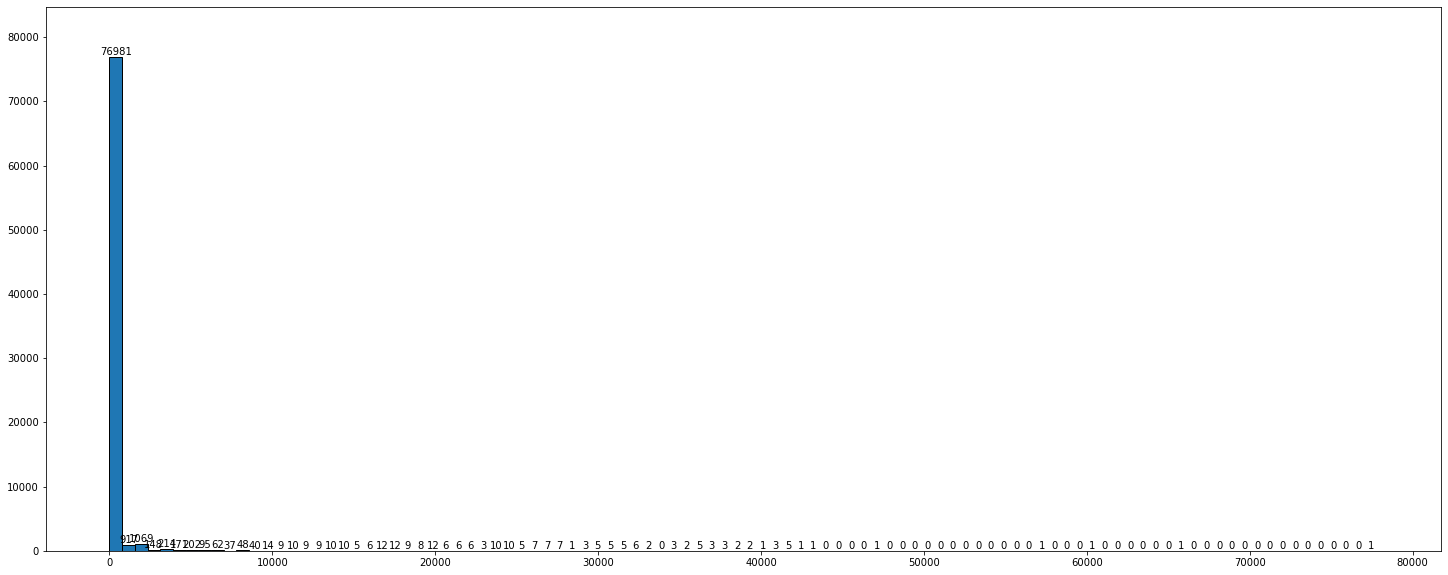

<Figure size 432x288 with 0 Axes>

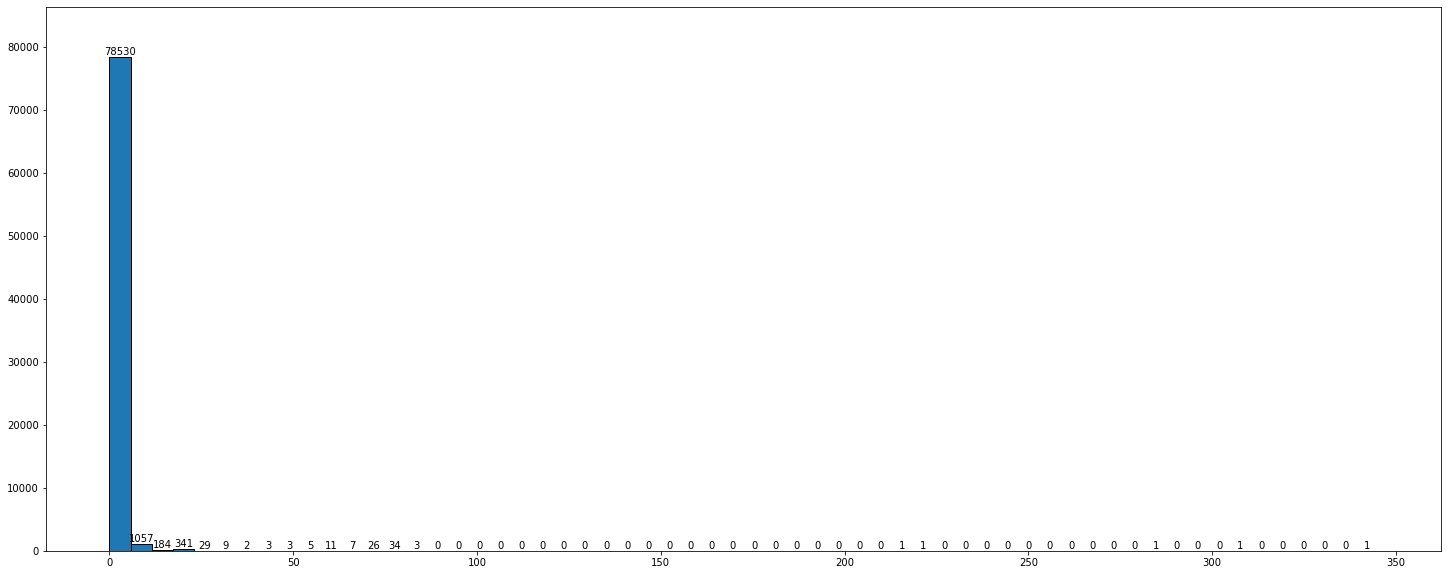

<Figure size 432x288 with 0 Axes>

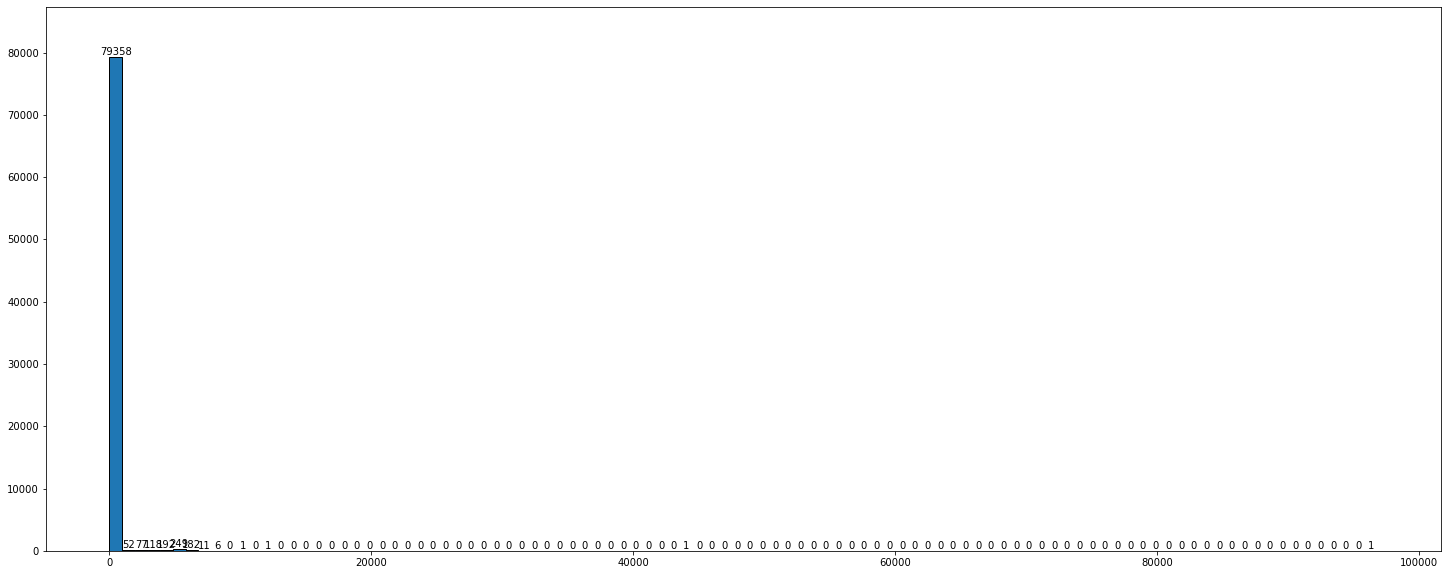

<Figure size 432x288 with 0 Axes>

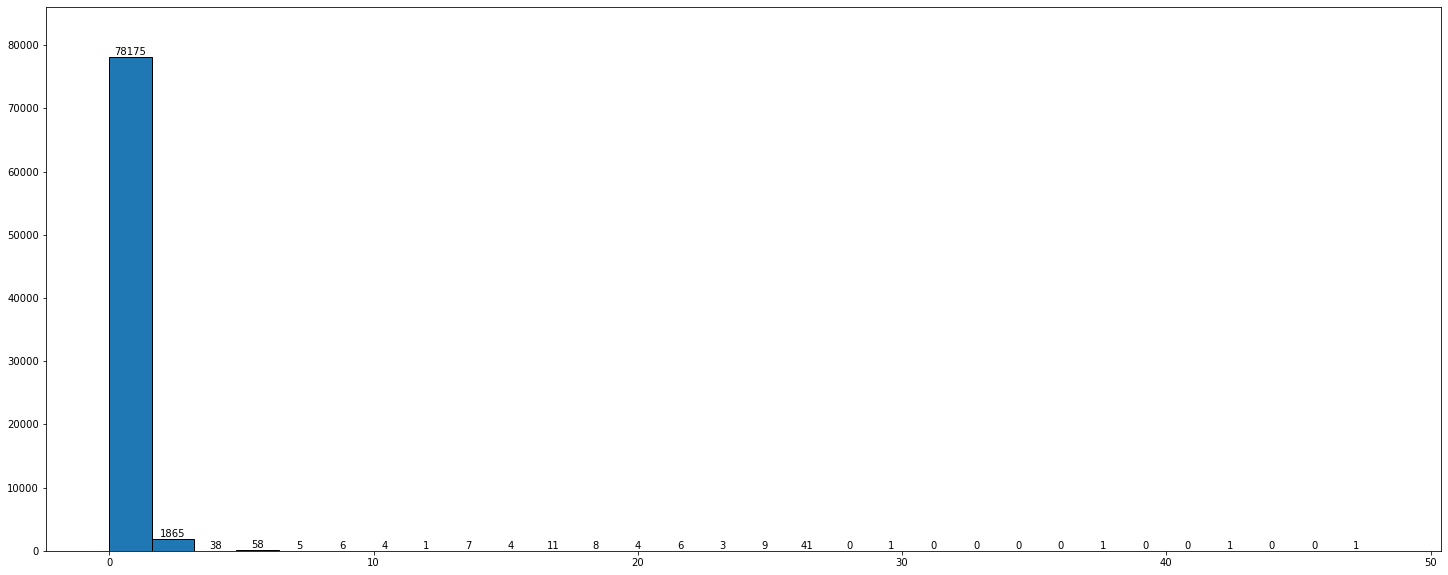

<Figure size 432x288 with 0 Axes>

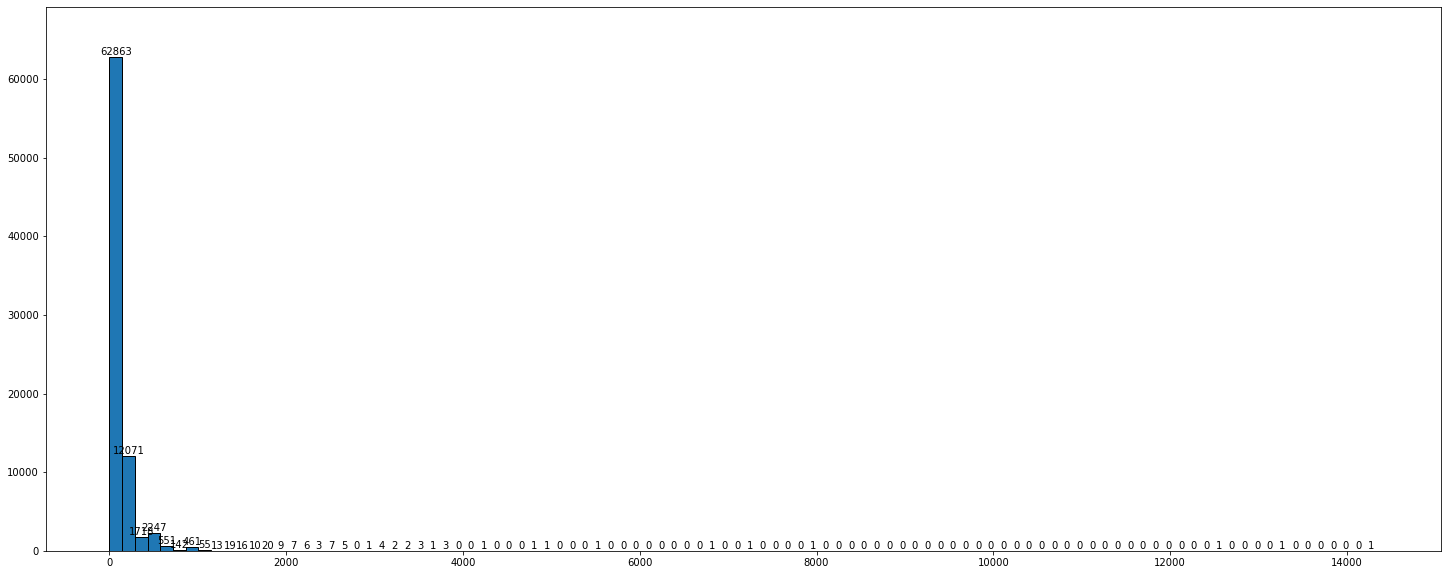

<Figure size 432x288 with 0 Axes>

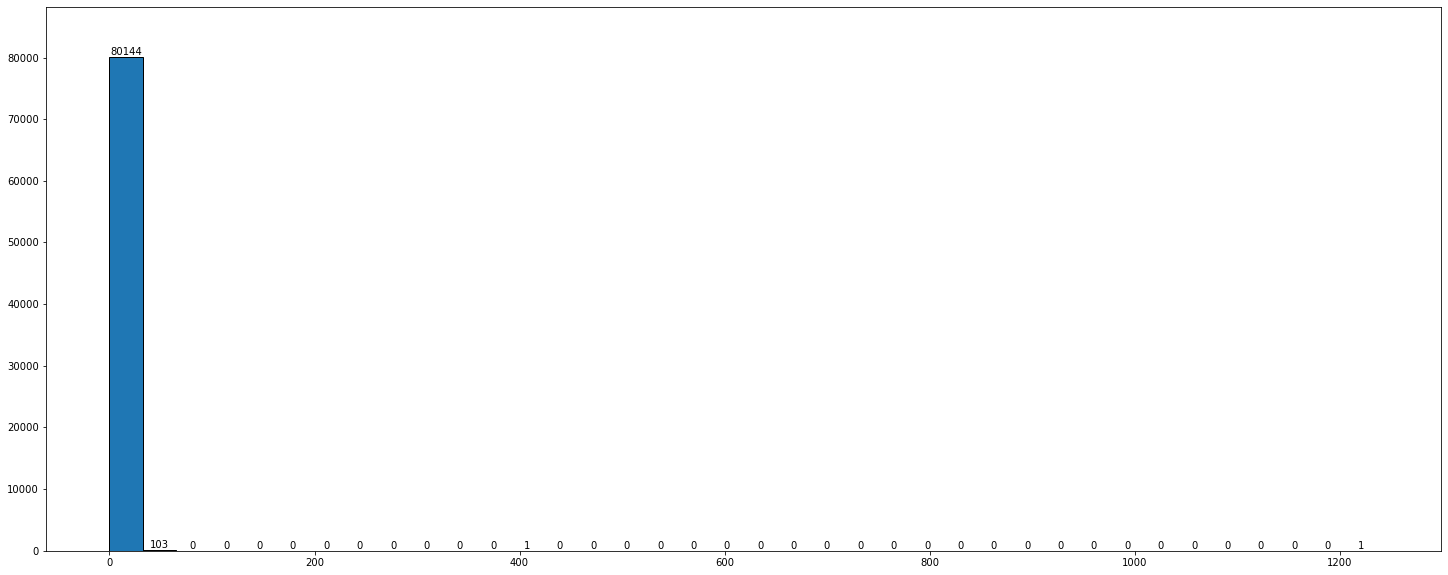

<Figure size 432x288 with 0 Axes>

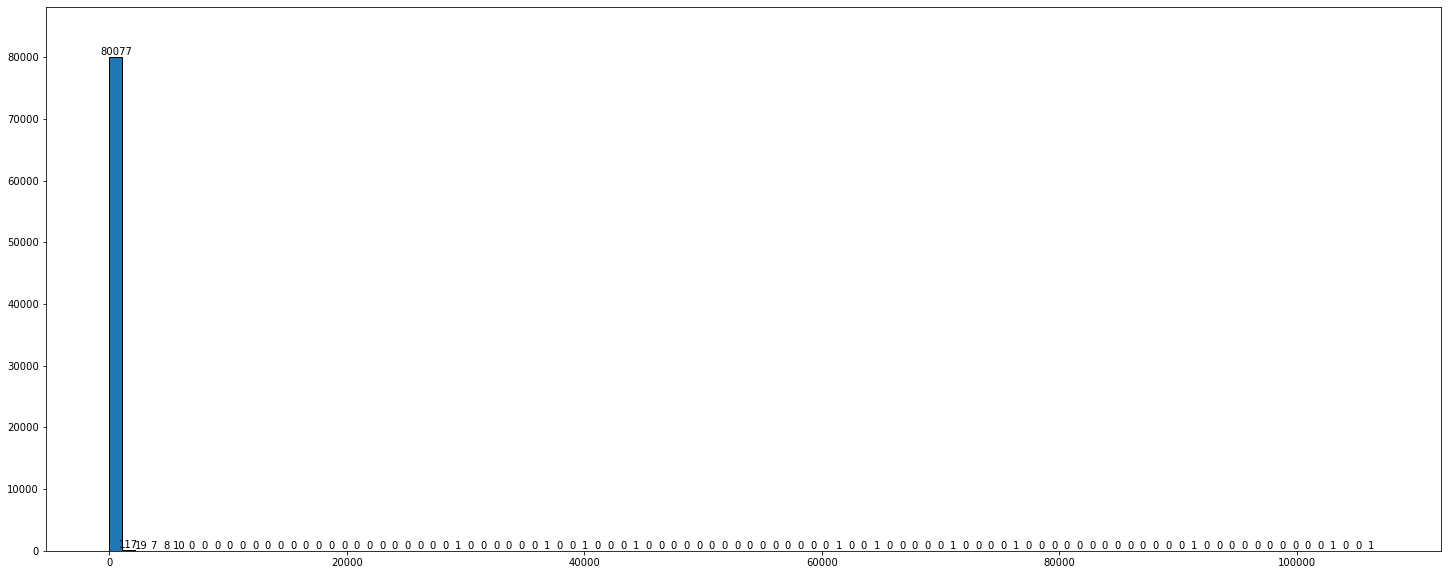

<Figure size 432x288 with 0 Axes>

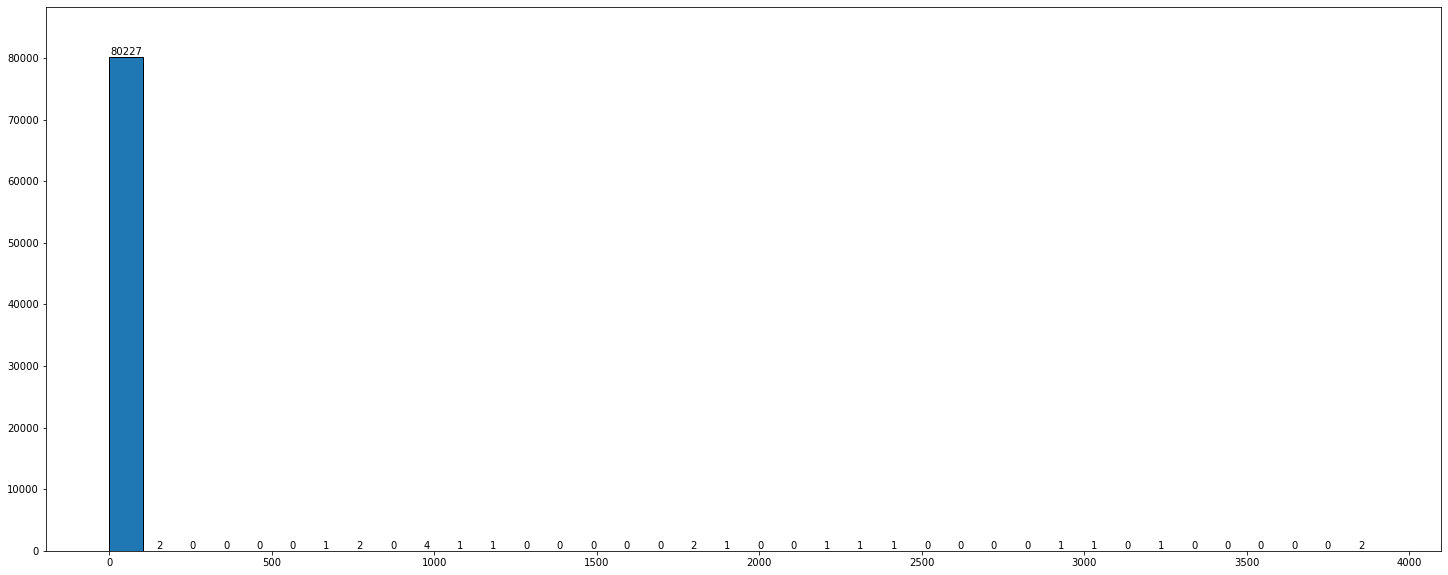

<Figure size 432x288 with 0 Axes>

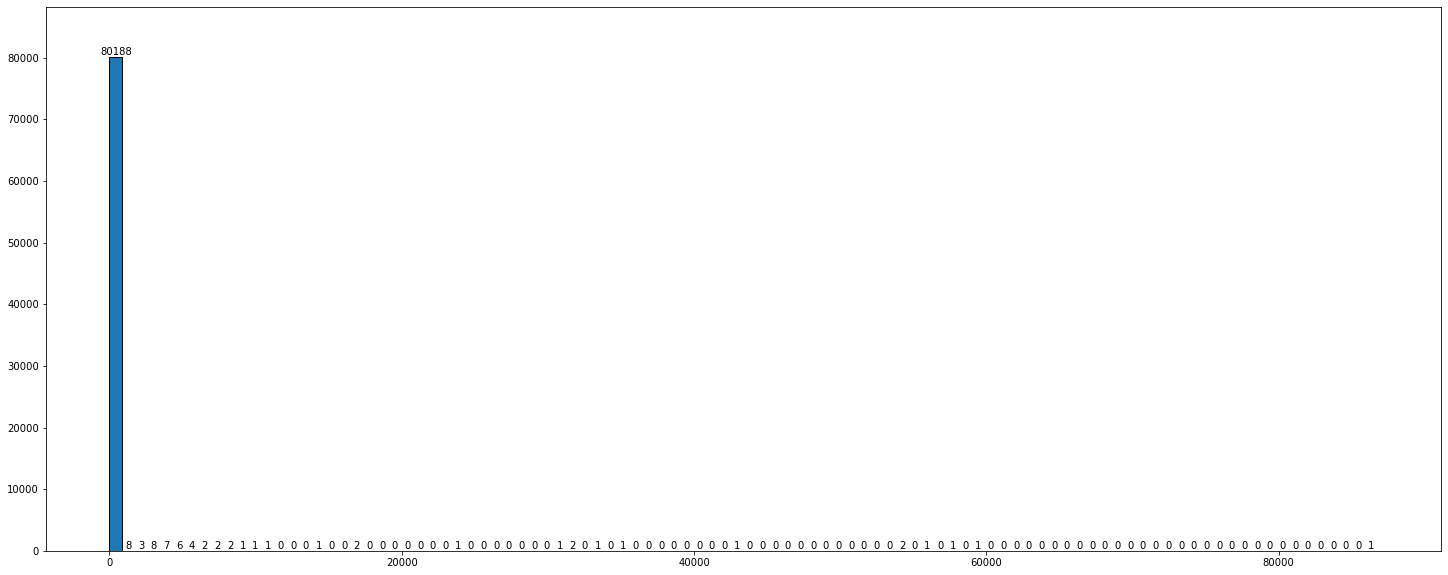

<Figure size 432x288 with 0 Axes>

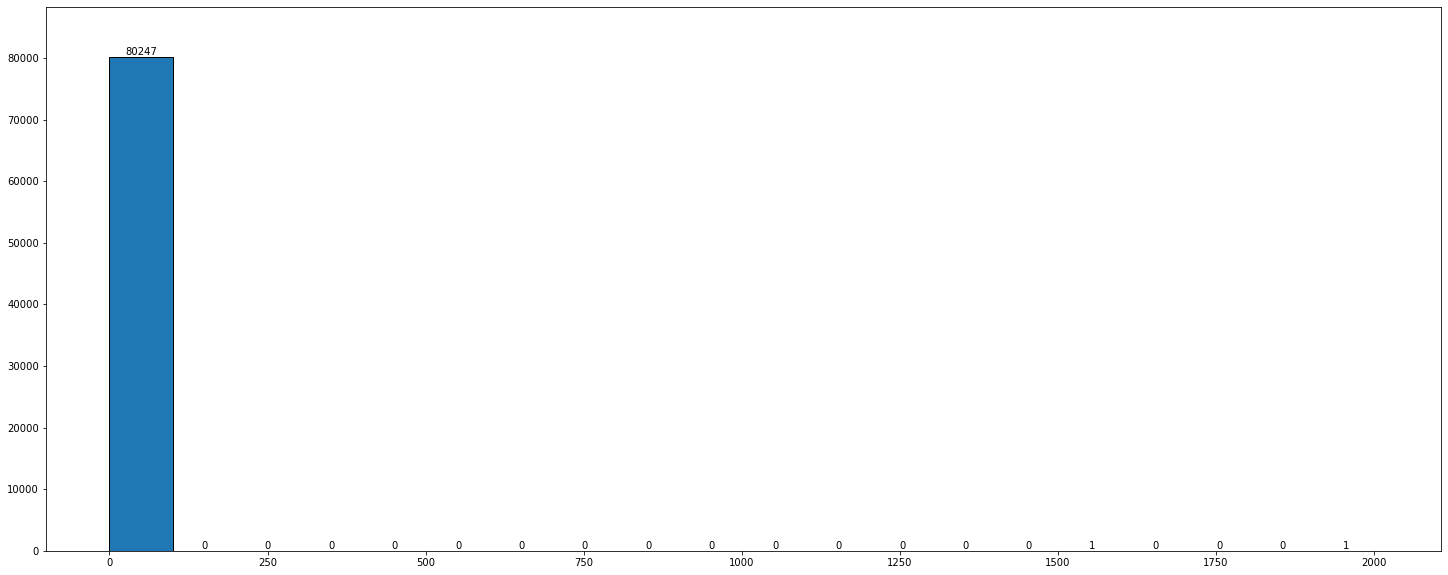

<Figure size 432x288 with 0 Axes>

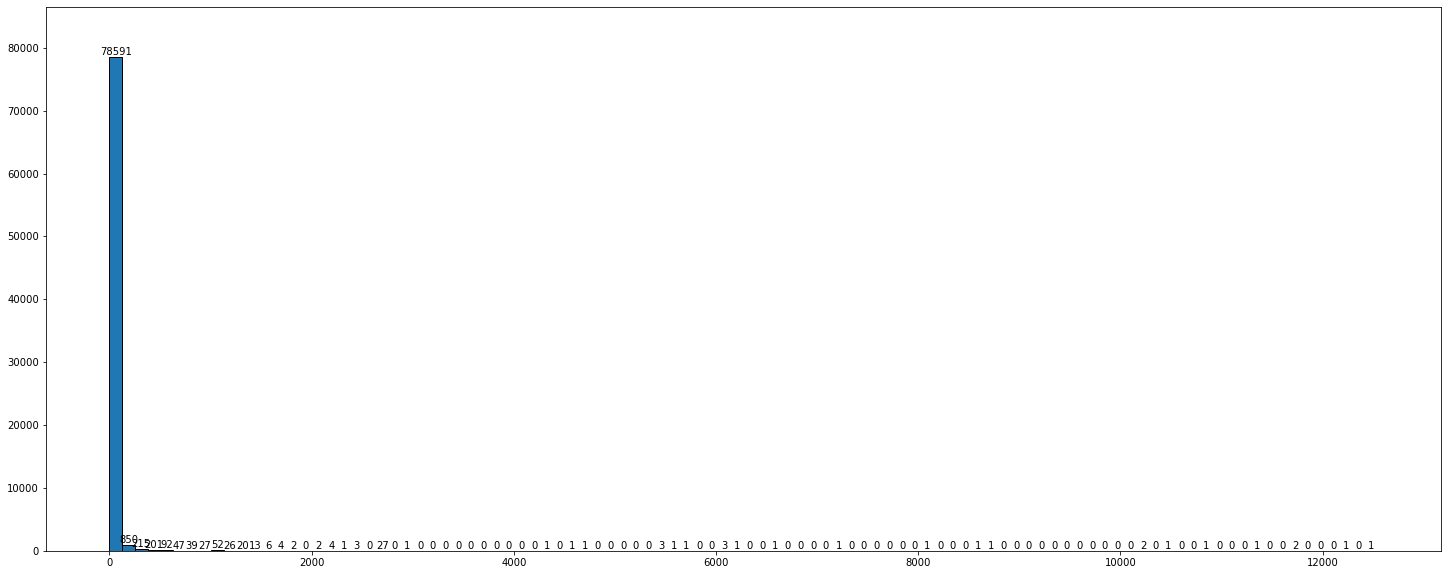

<Figure size 432x288 with 0 Axes>

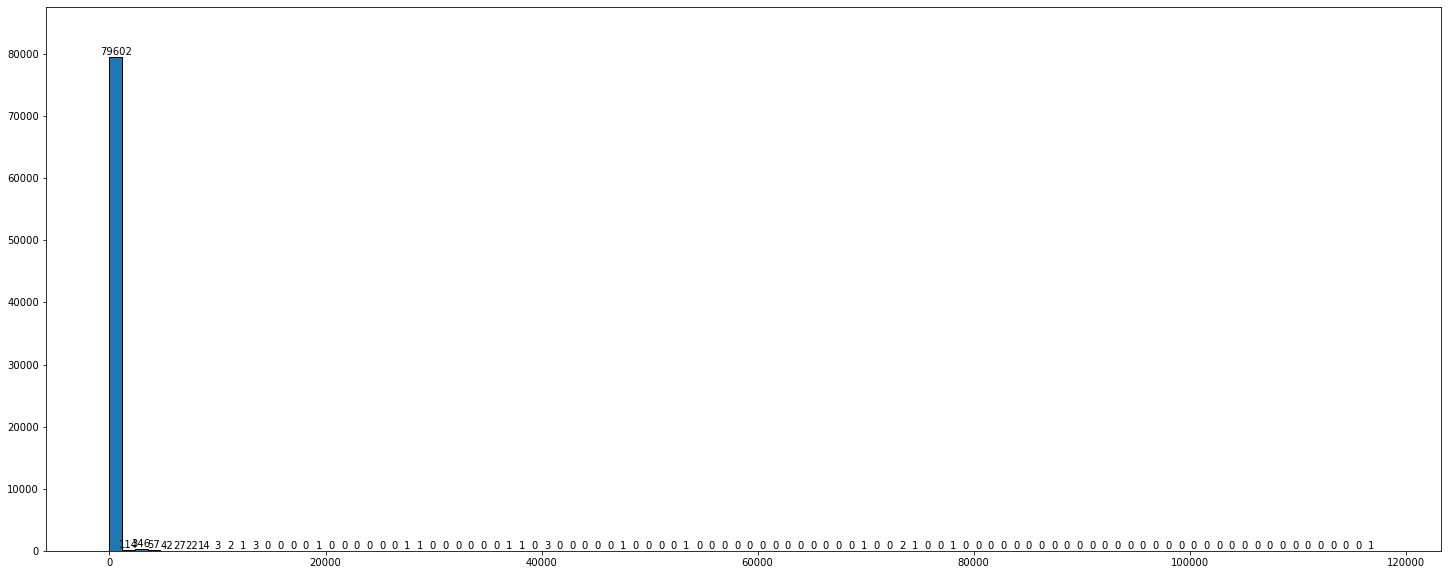

<Figure size 432x288 with 0 Axes>

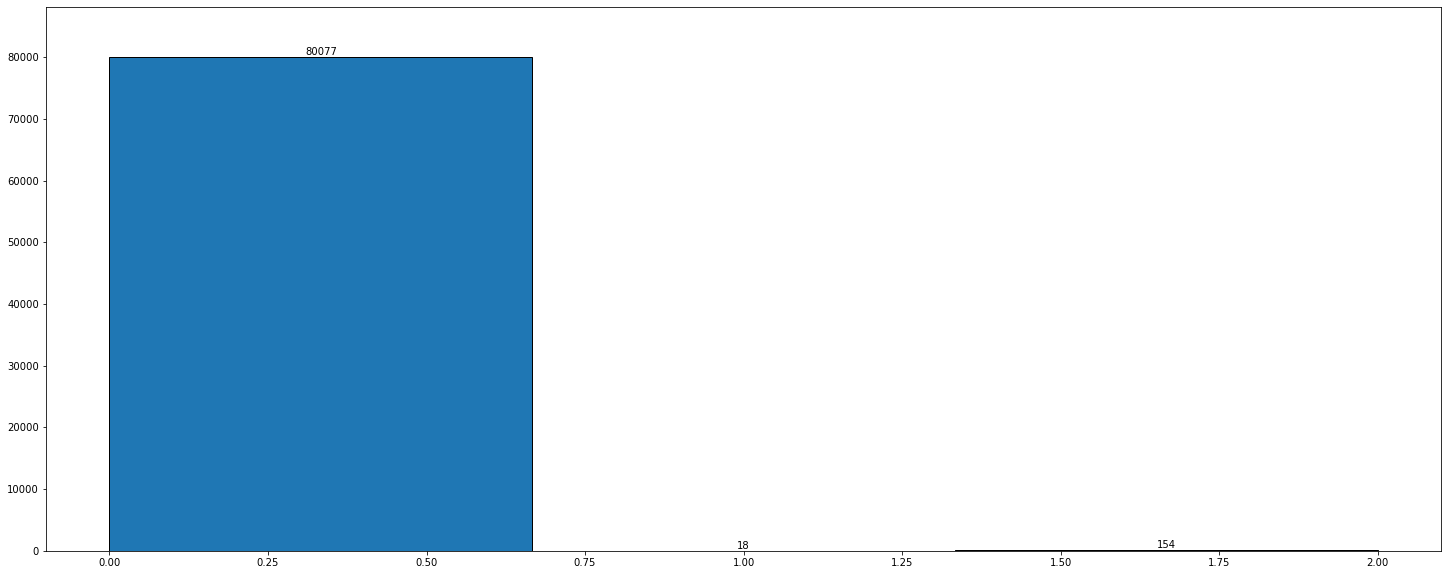

<Figure size 432x288 with 0 Axes>

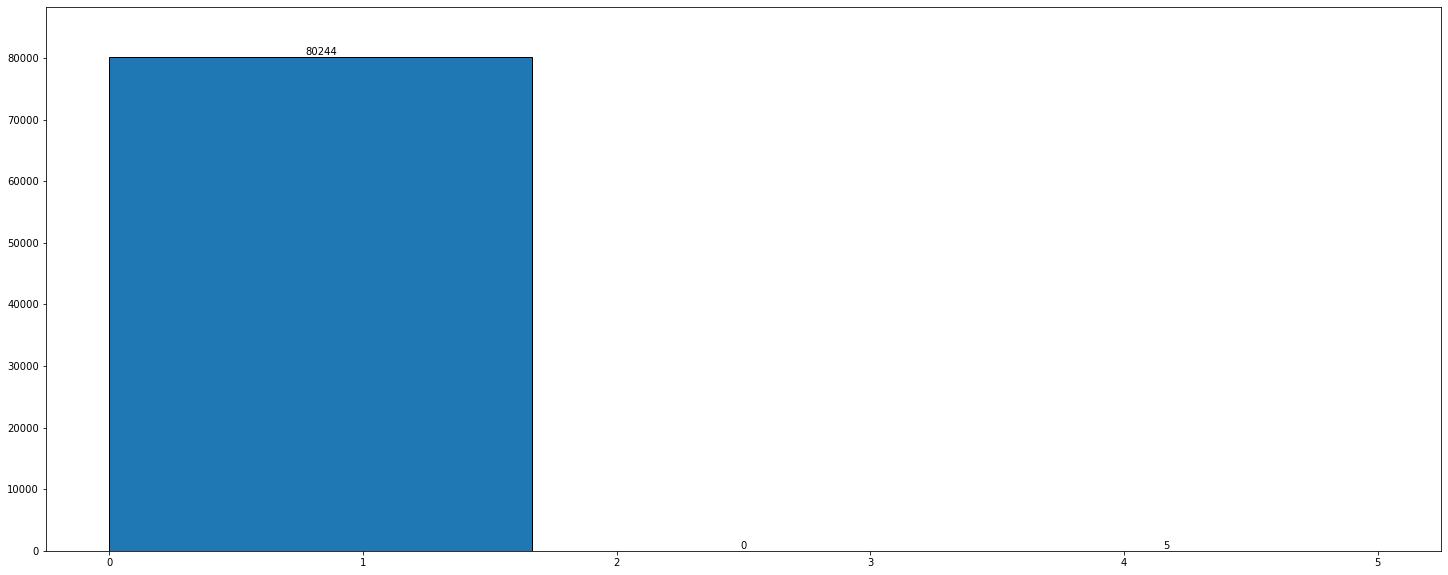

<Figure size 432x288 with 0 Axes>

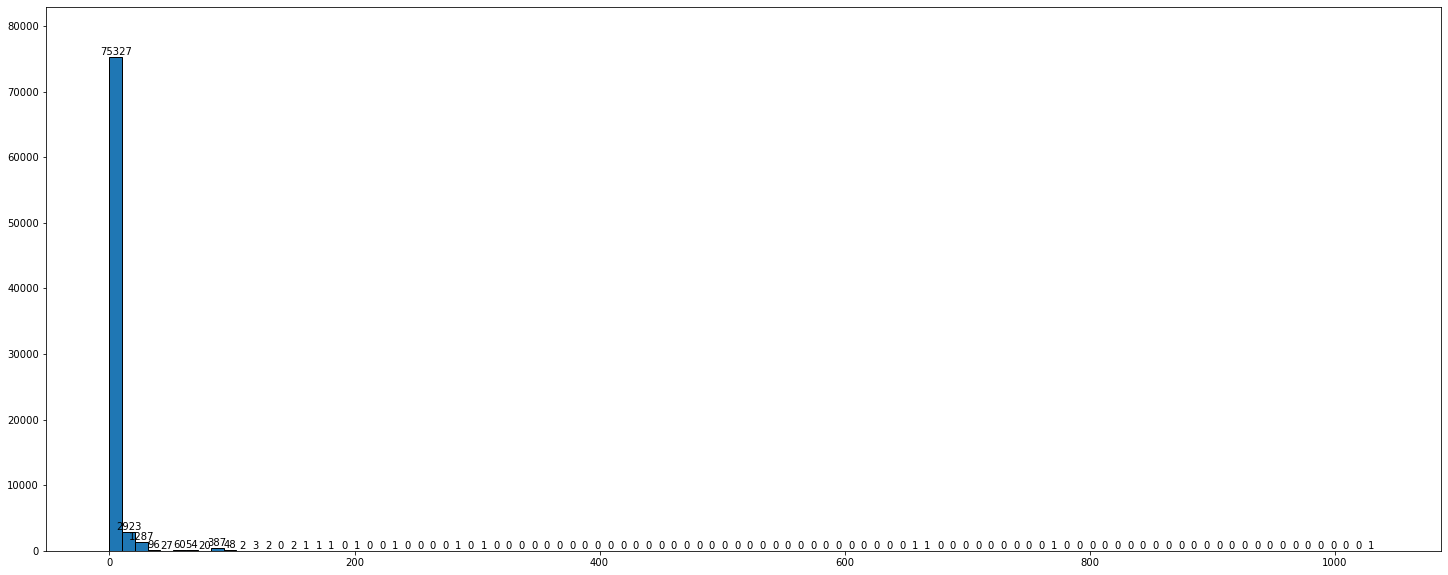

<Figure size 432x288 with 0 Axes>

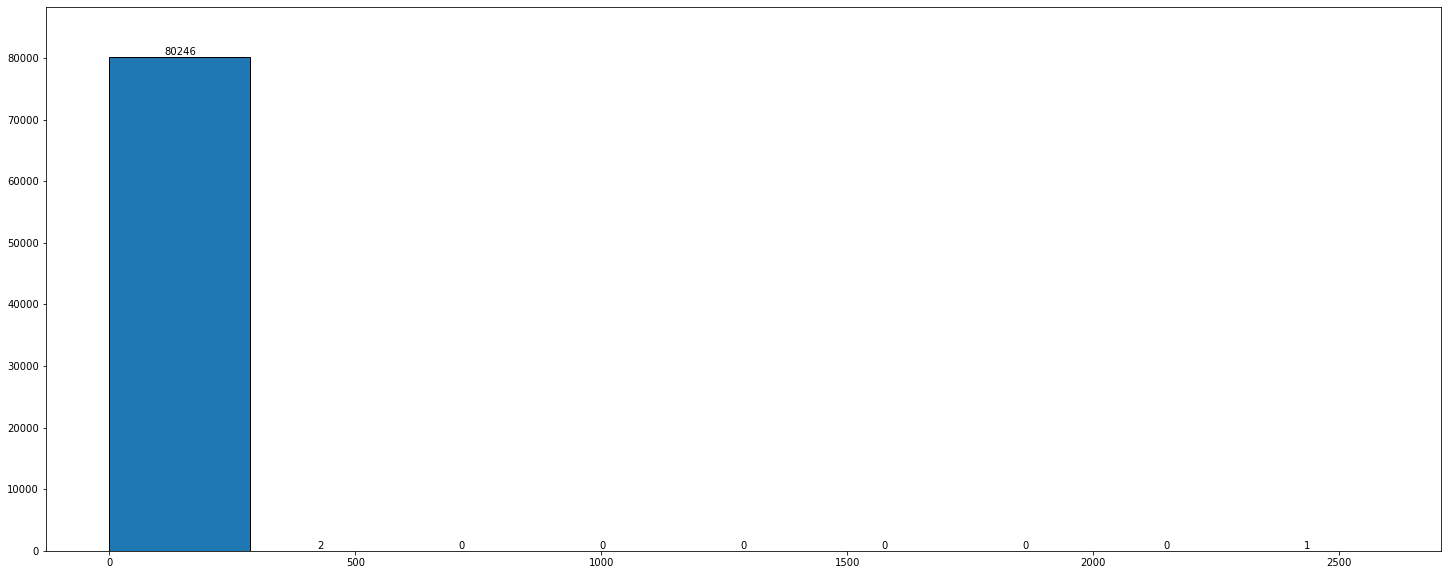

<Figure size 432x288 with 0 Axes>

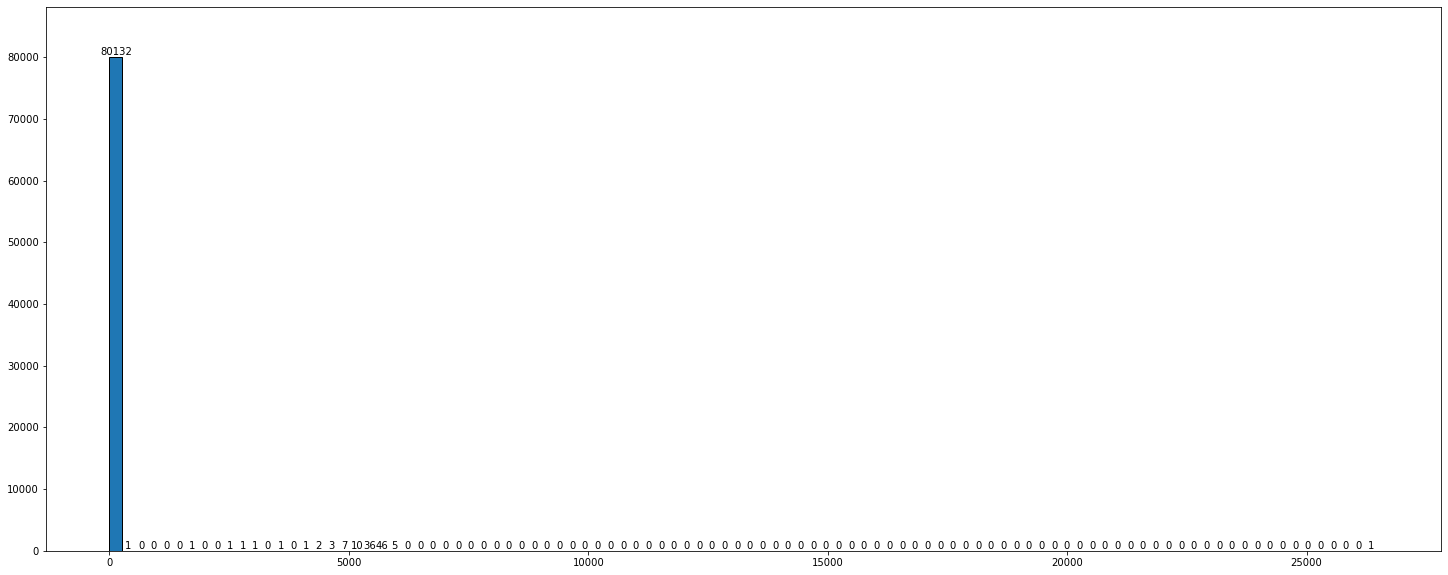

<Figure size 432x288 with 0 Axes>

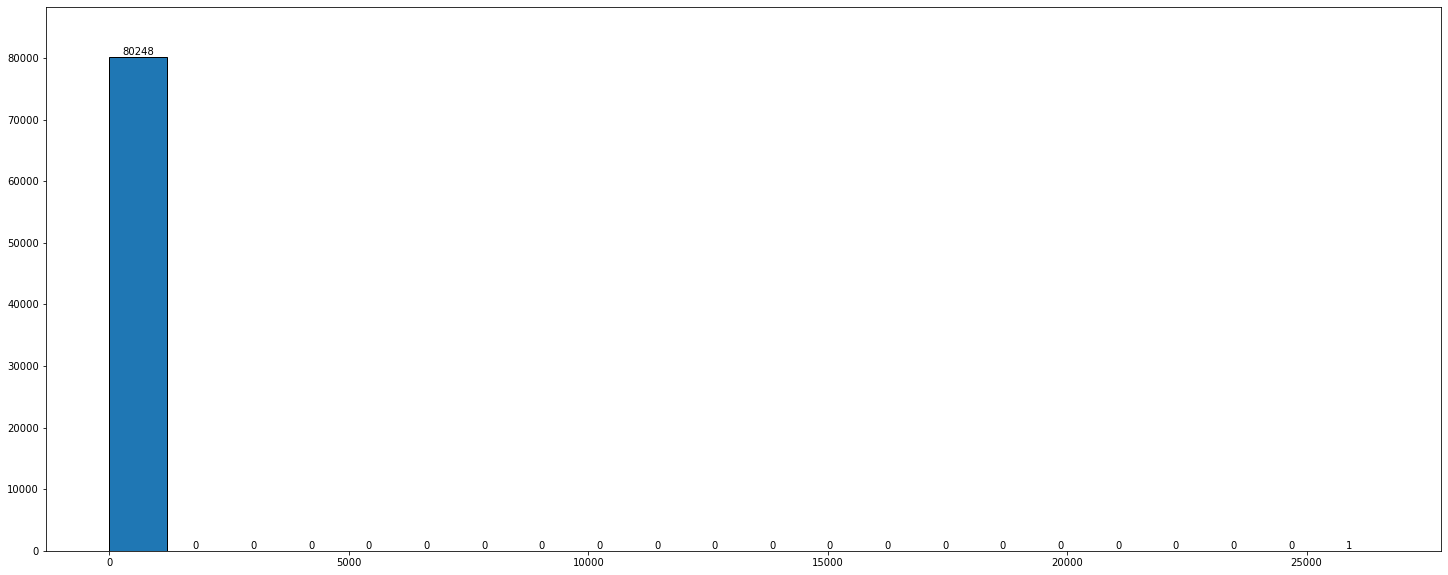

<Figure size 432x288 with 0 Axes>

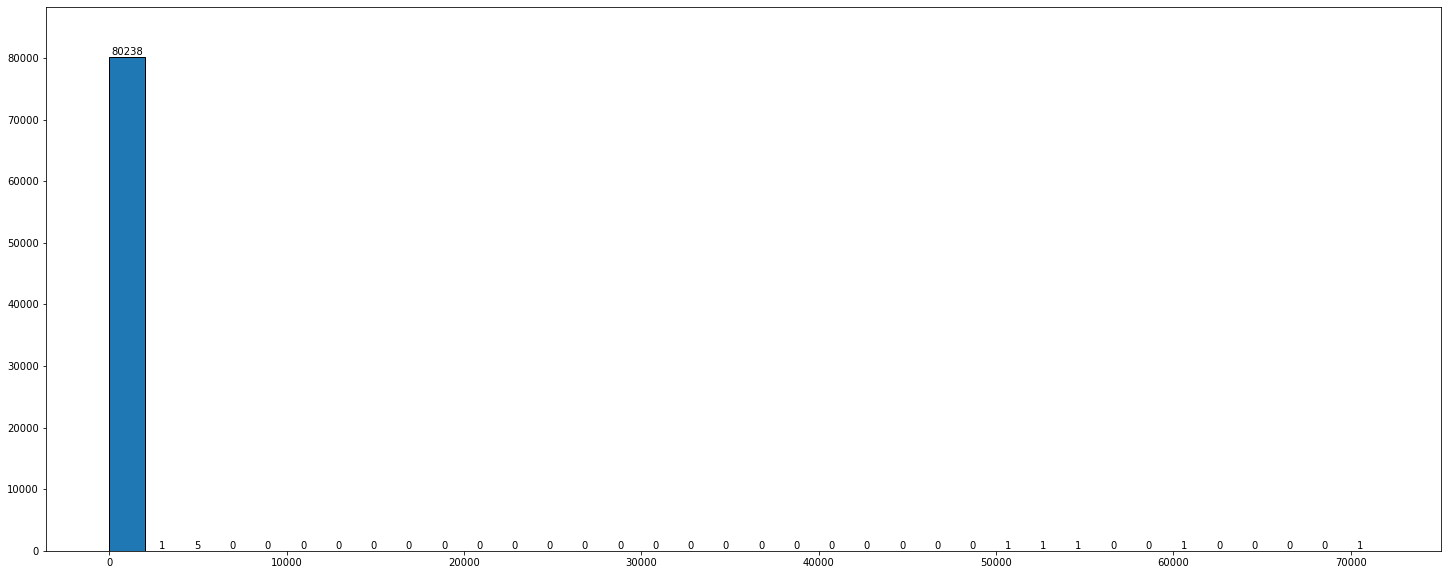

<Figure size 432x288 with 0 Axes>

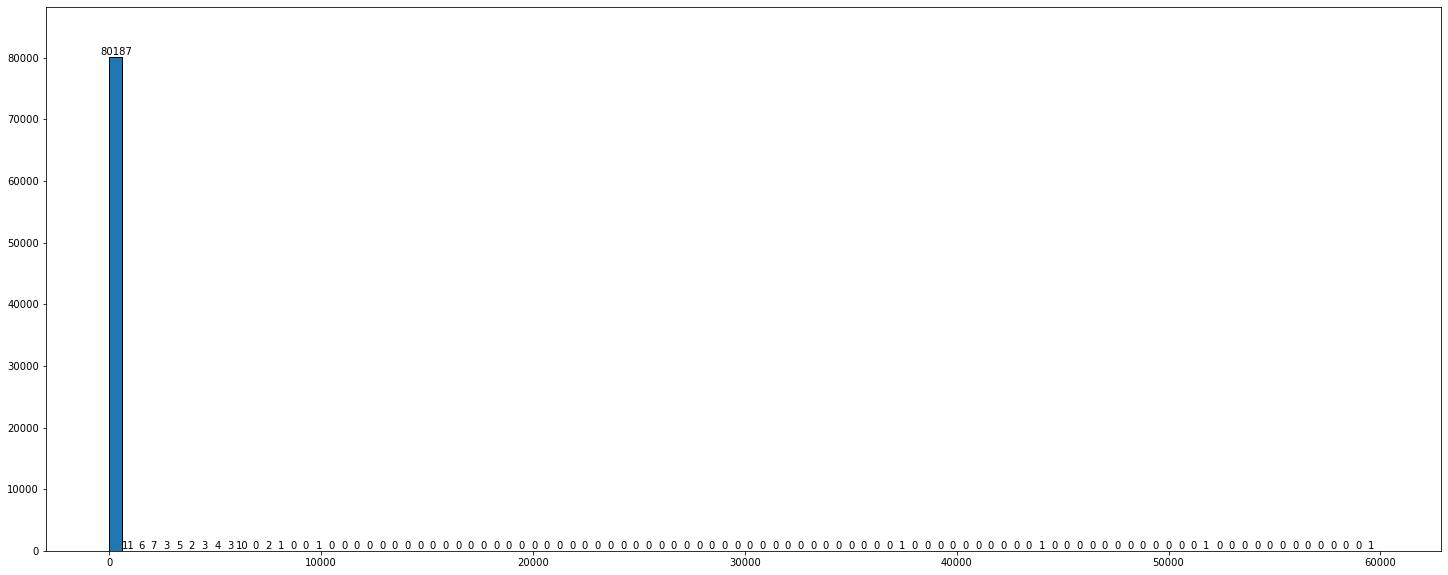

<Figure size 432x288 with 0 Axes>

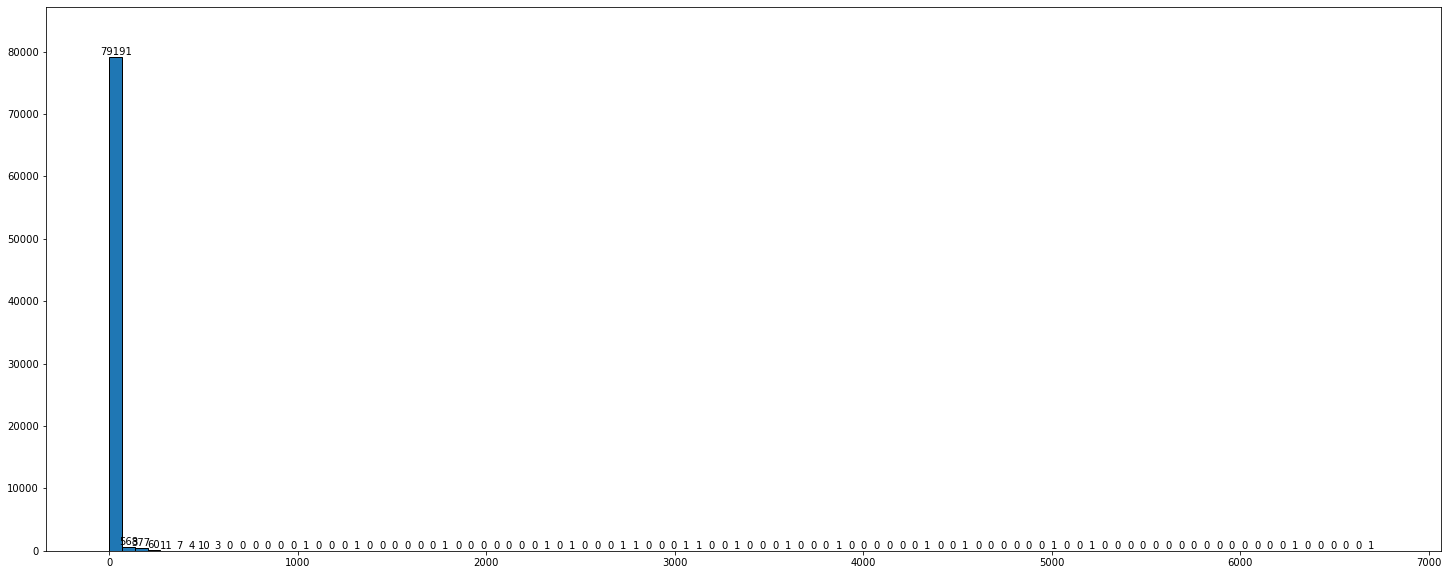

<Figure size 432x288 with 0 Axes>

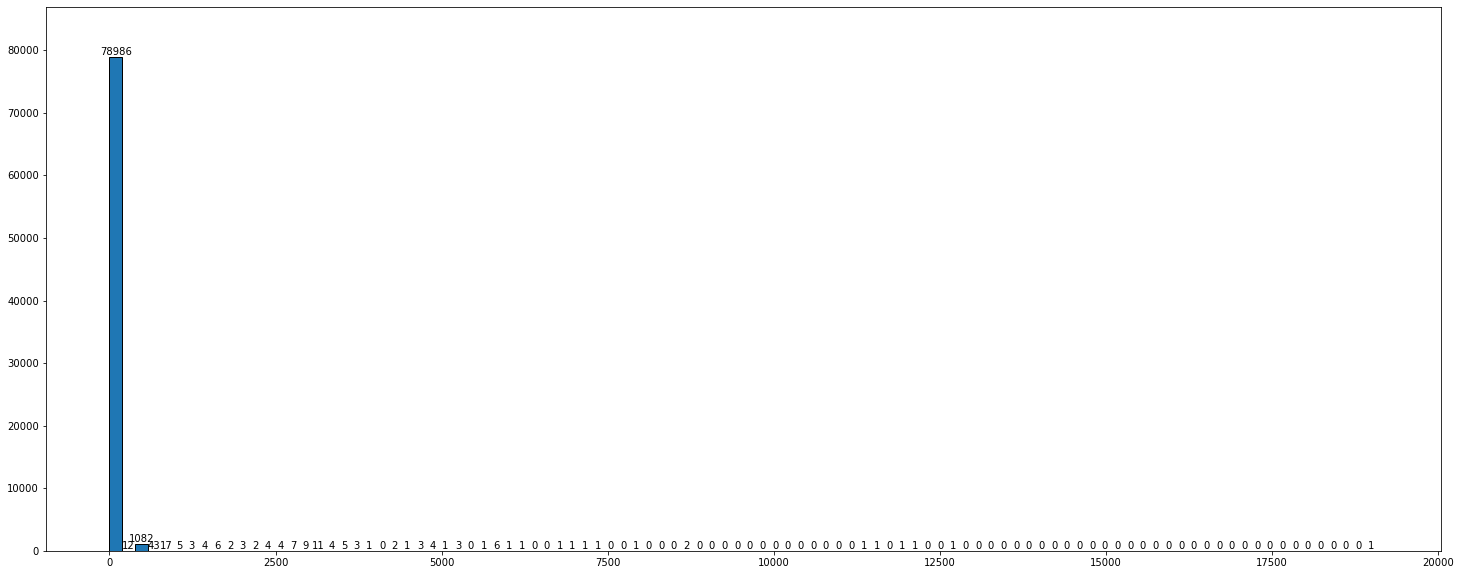

<Figure size 432x288 with 0 Axes>

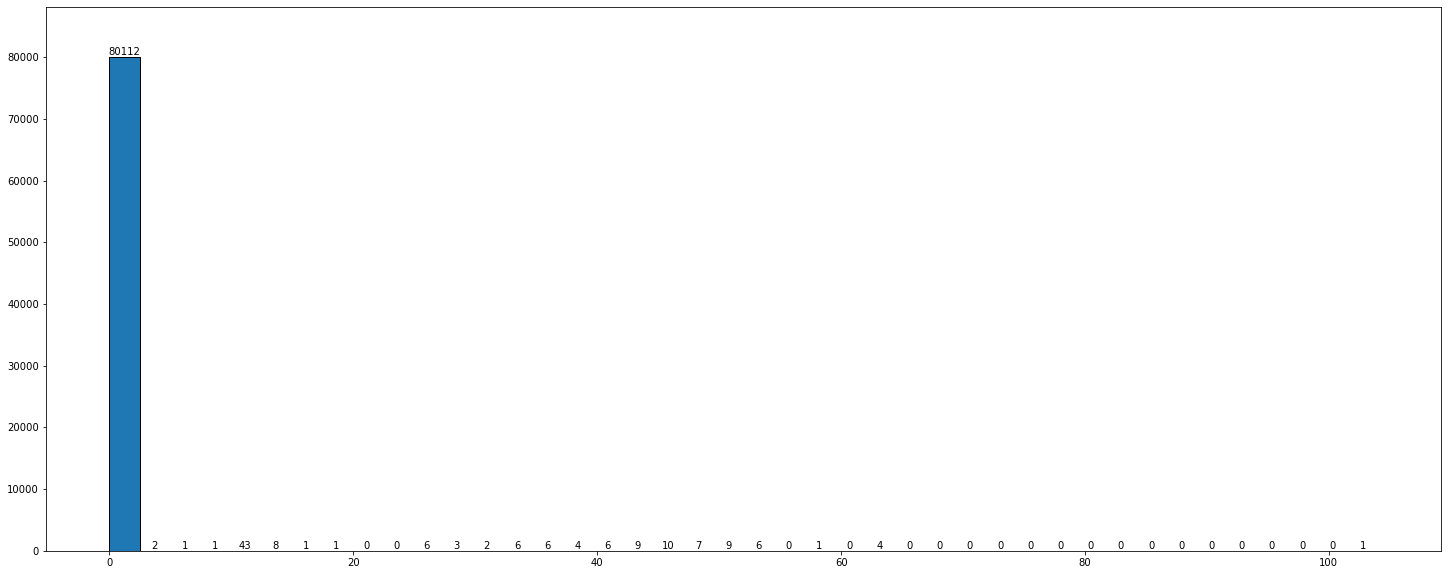

<Figure size 432x288 with 0 Axes>

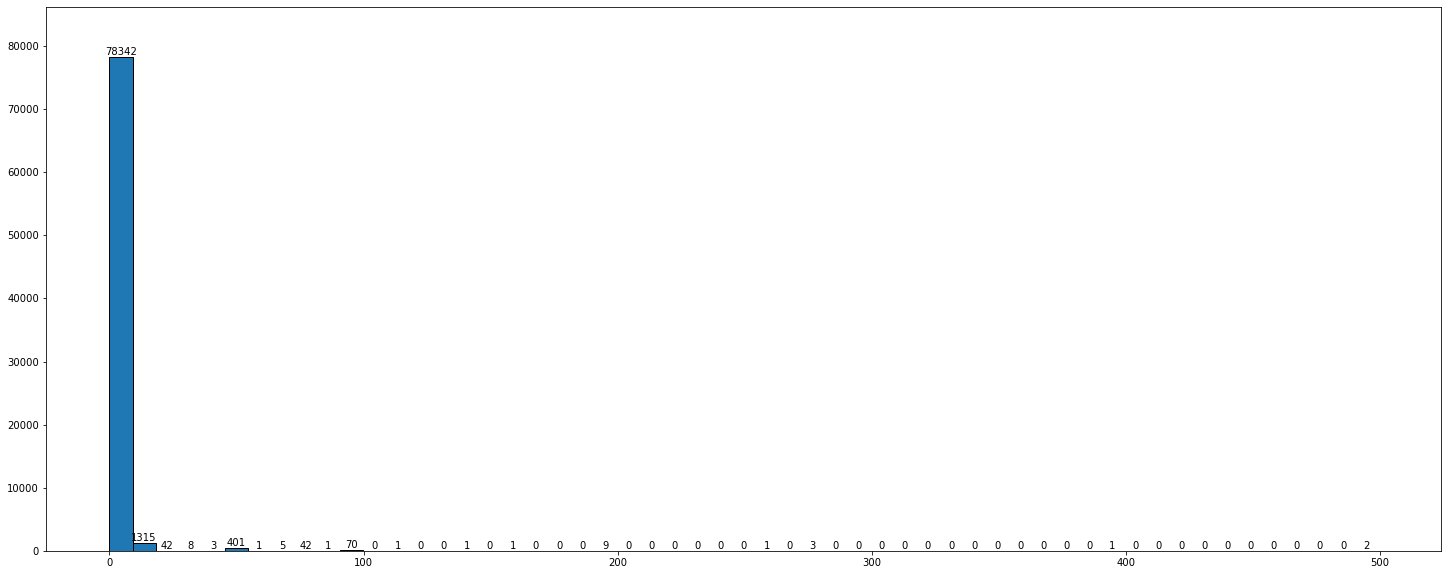

<Figure size 432x288 with 0 Axes>

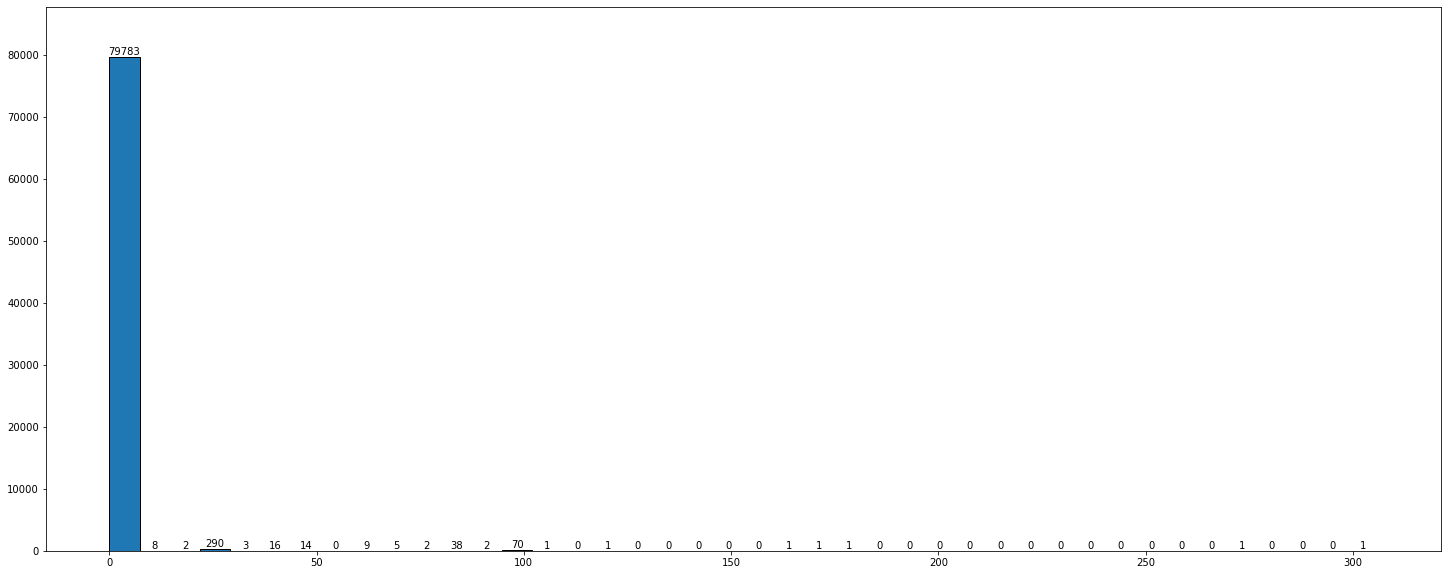

<Figure size 432x288 with 0 Axes>

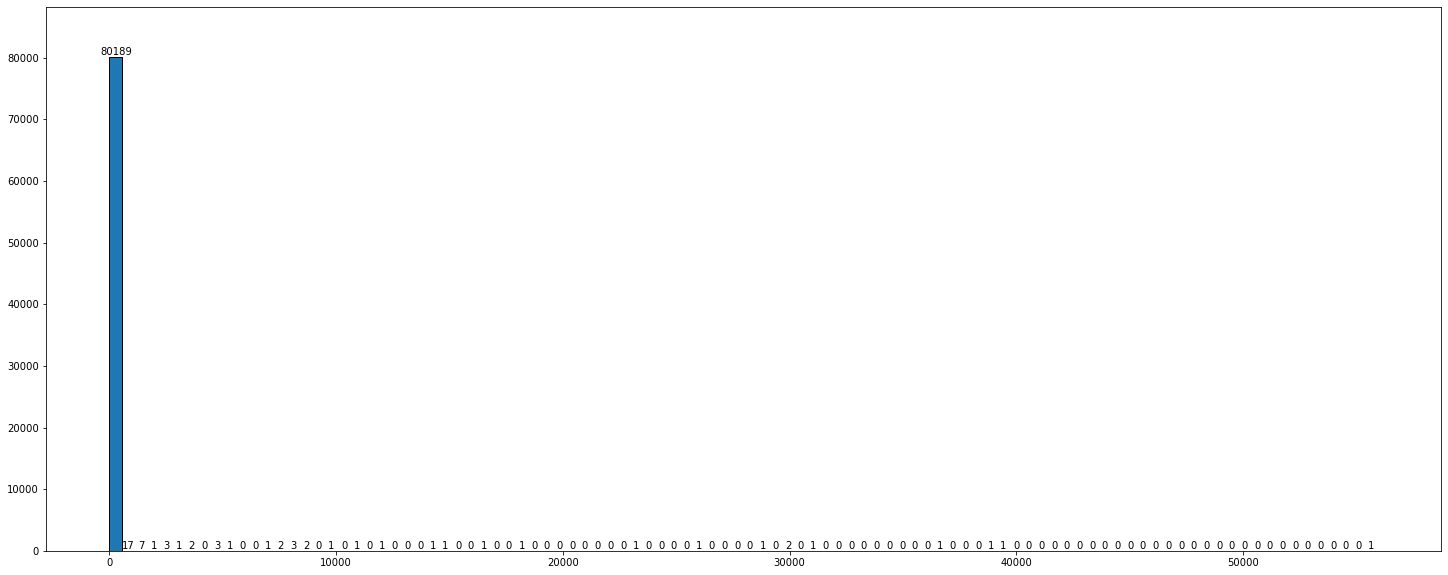

<Figure size 432x288 with 0 Axes>

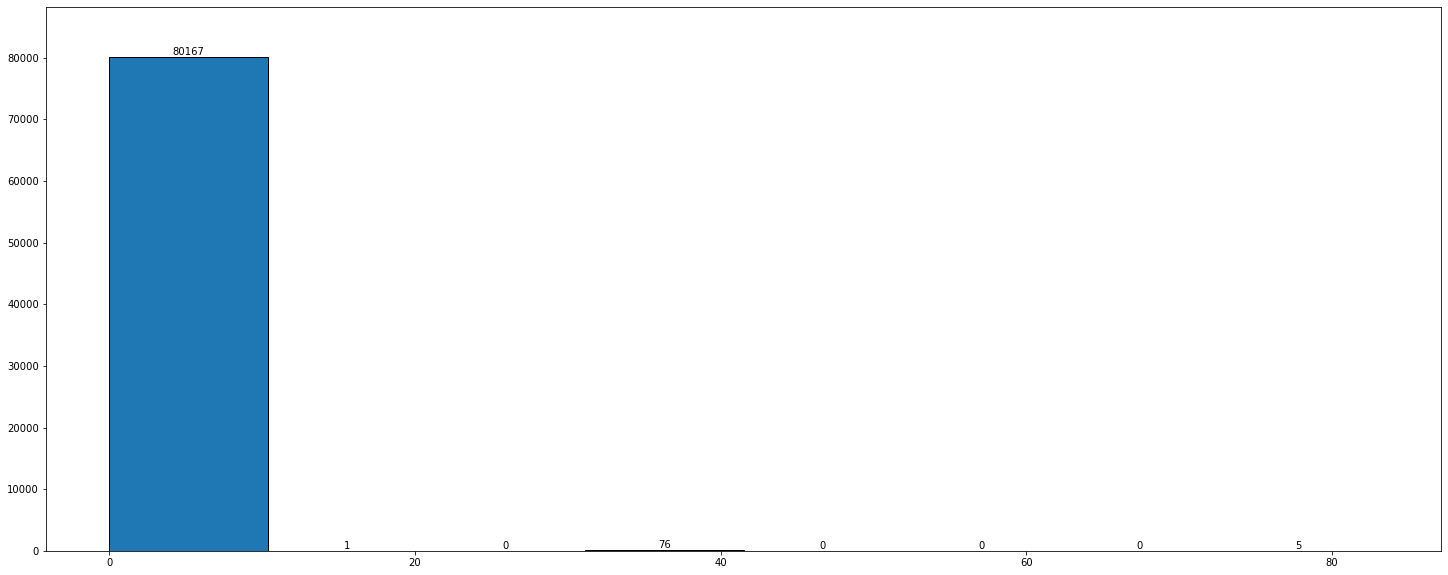

<Figure size 432x288 with 0 Axes>

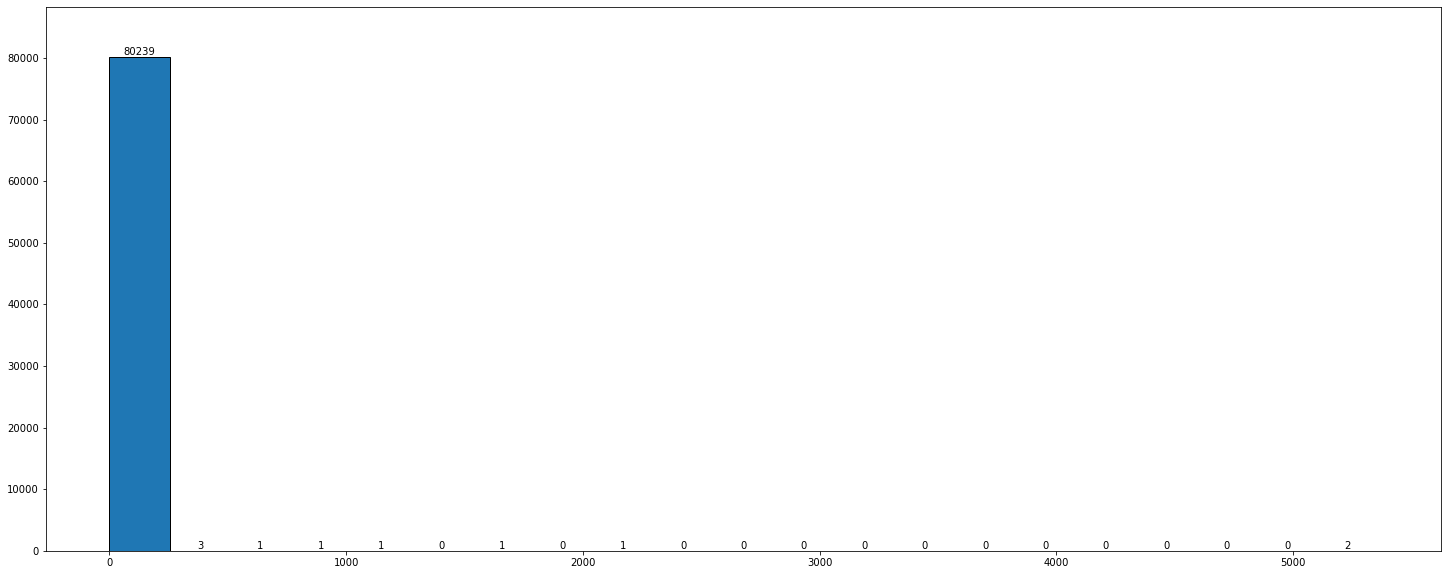

<Figure size 432x288 with 0 Axes>

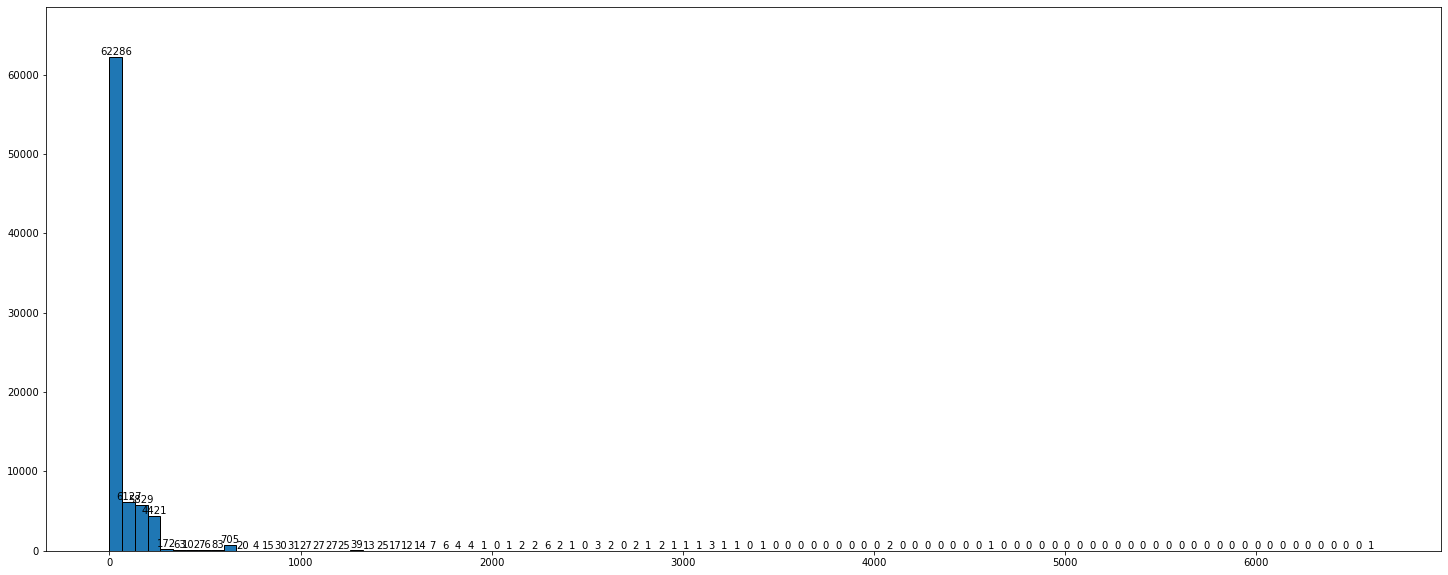

<Figure size 432x288 with 0 Axes>

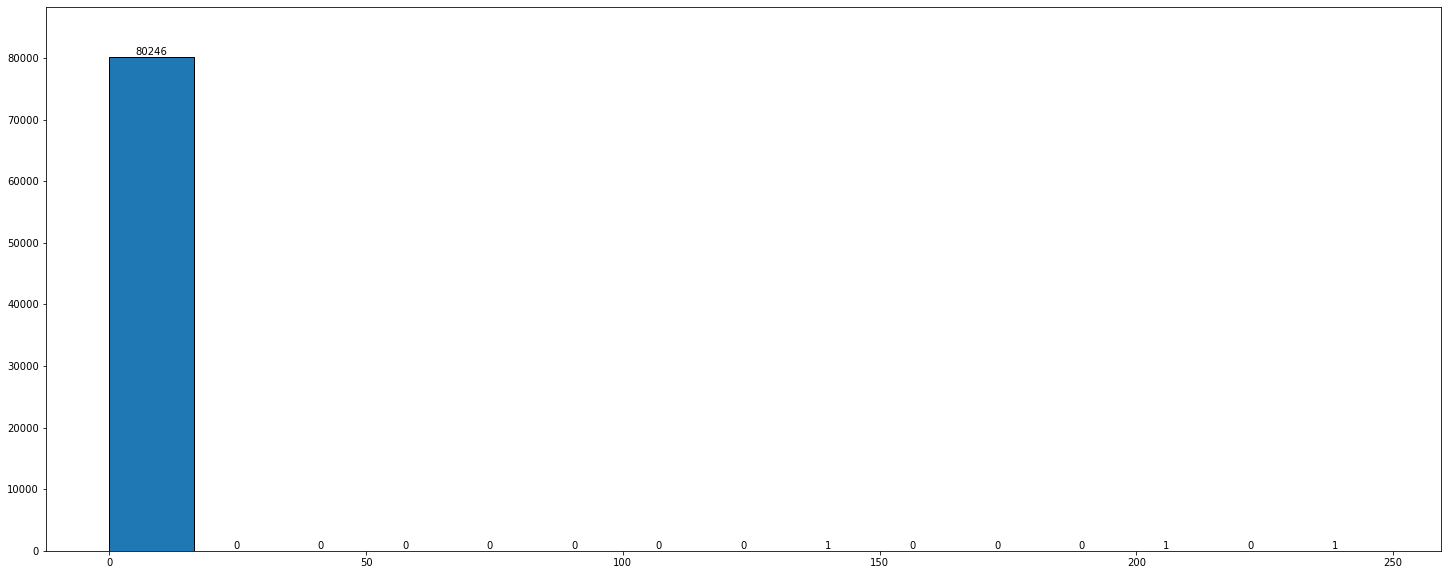

<Figure size 432x288 with 0 Axes>

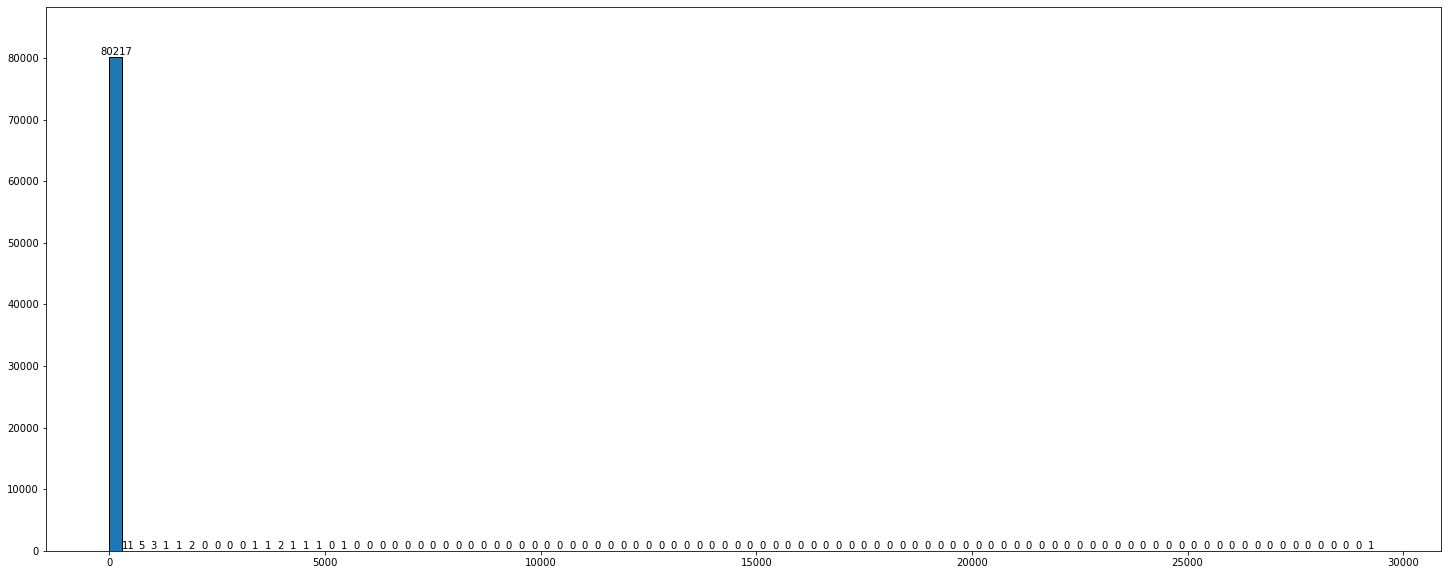

<Figure size 432x288 with 0 Axes>

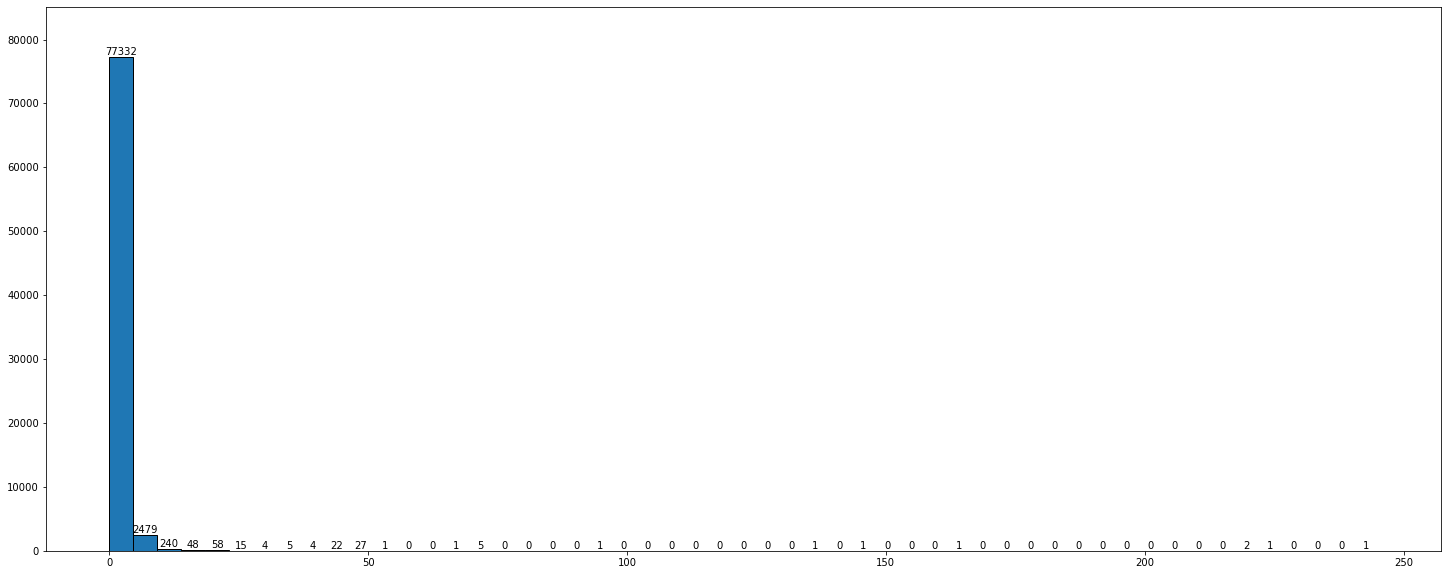

<Figure size 432x288 with 0 Axes>

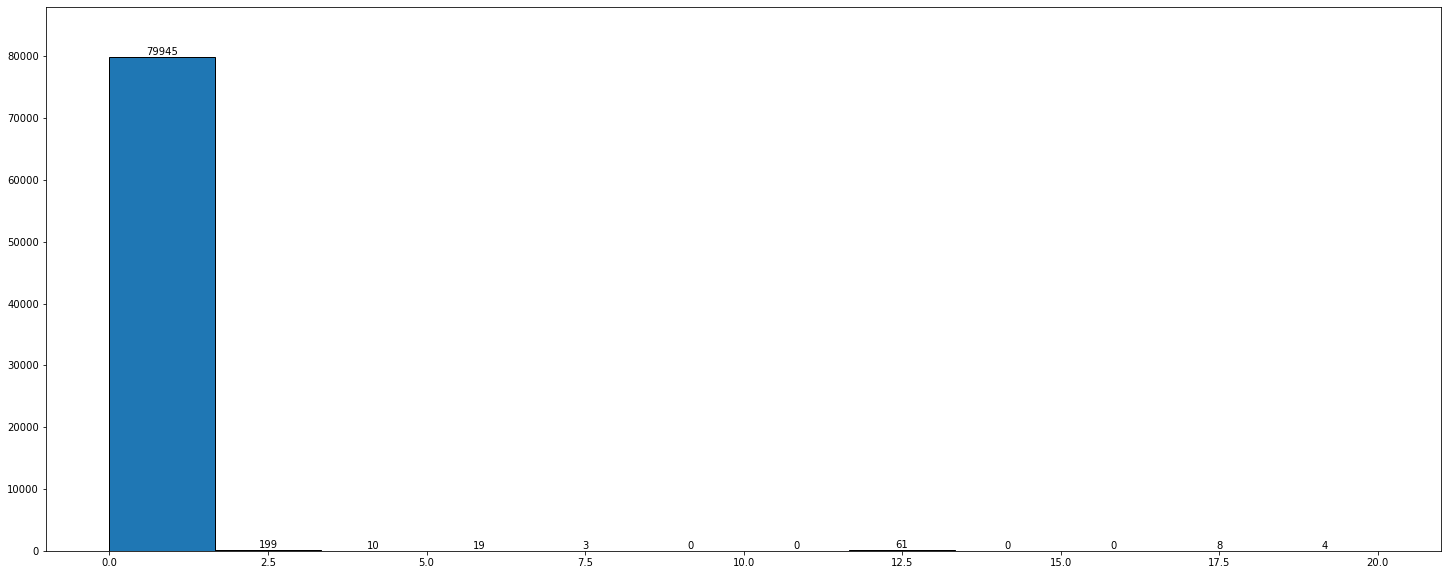

<Figure size 432x288 with 0 Axes>

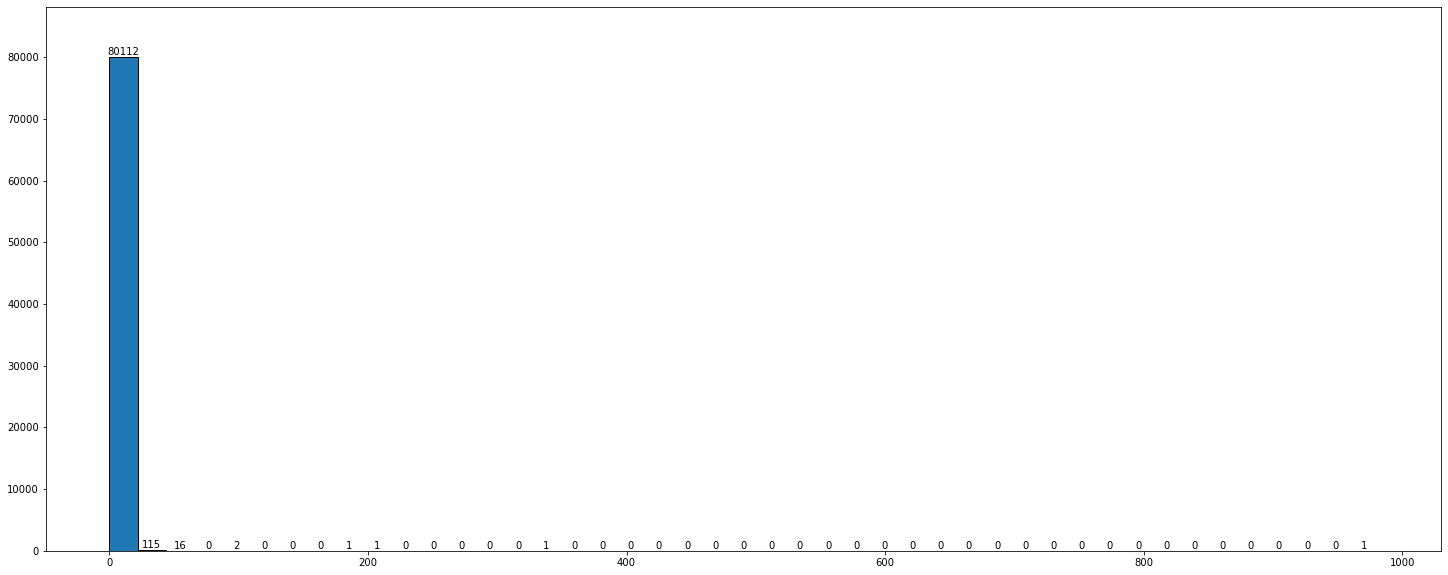

<Figure size 432x288 with 0 Axes>

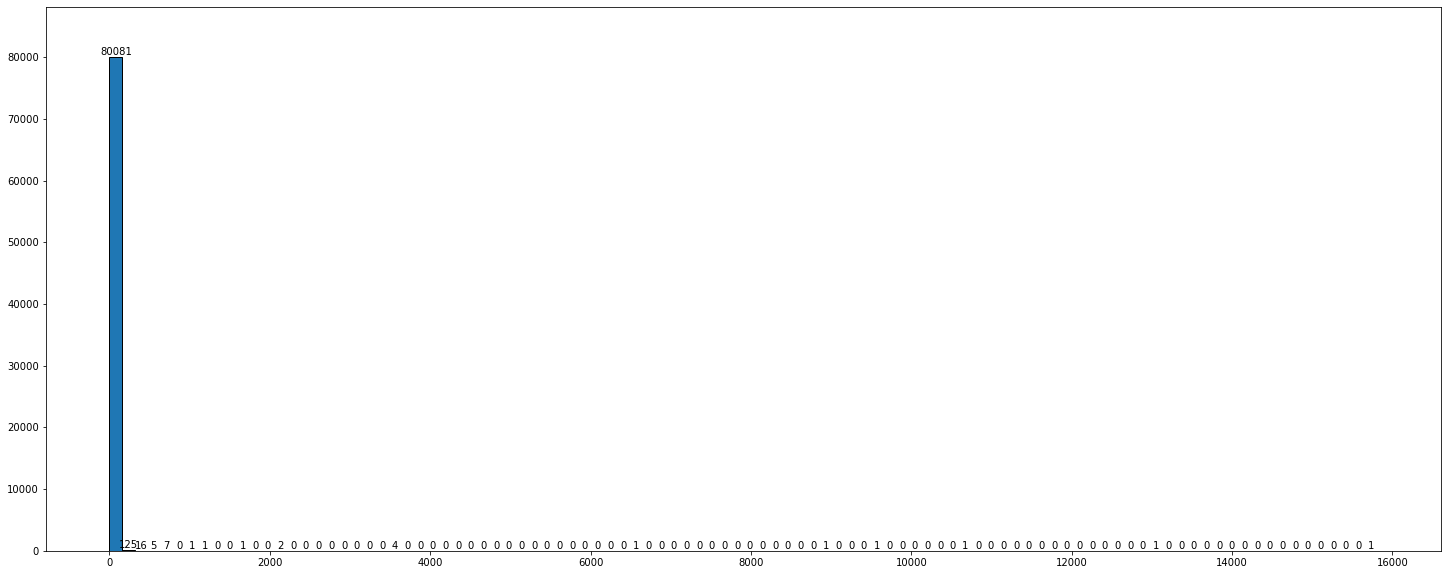

<Figure size 432x288 with 0 Axes>

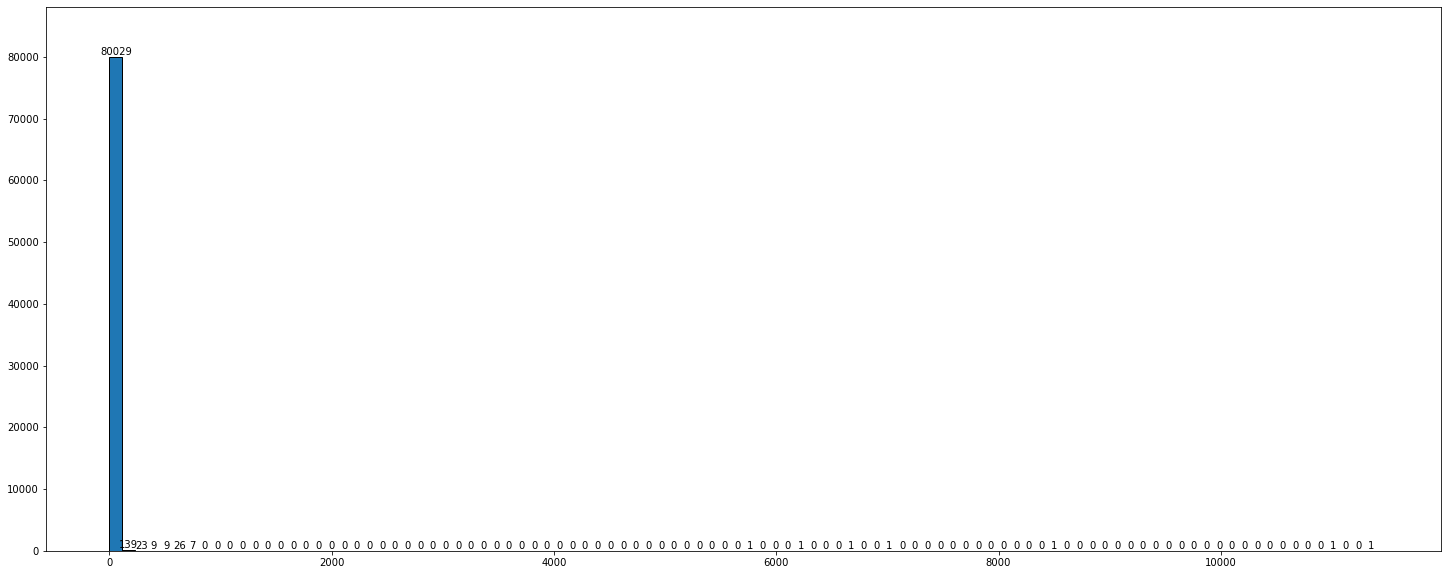

<Figure size 432x288 with 0 Axes>

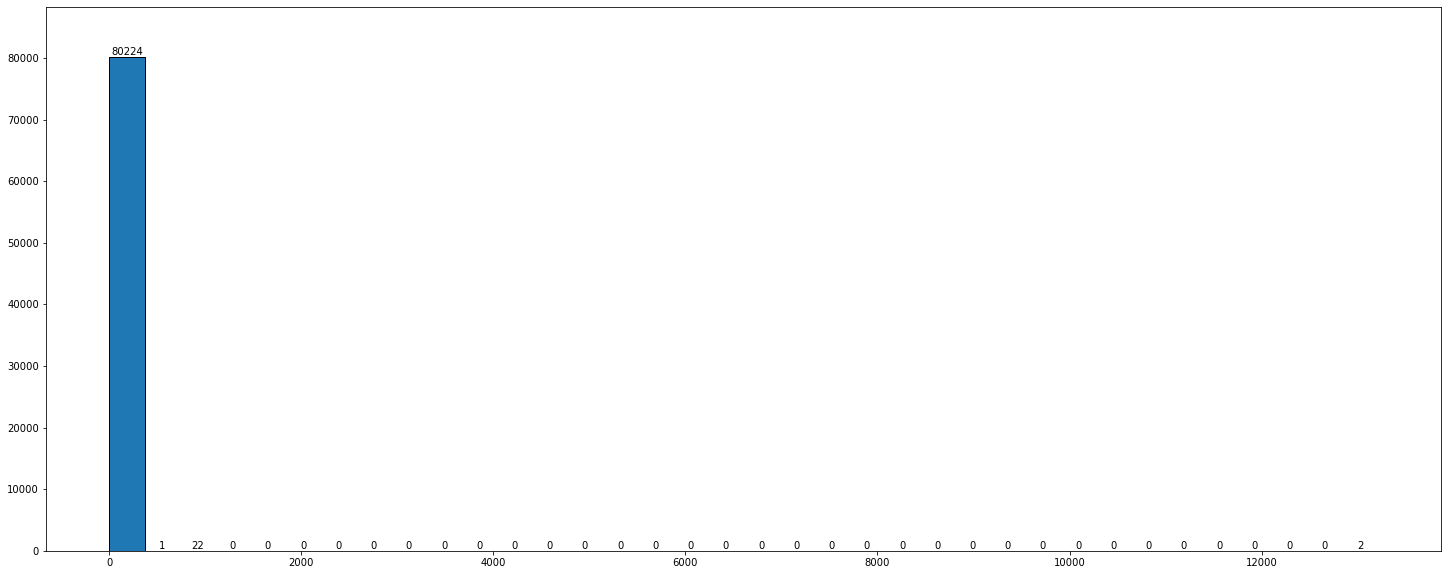

<Figure size 432x288 with 0 Axes>

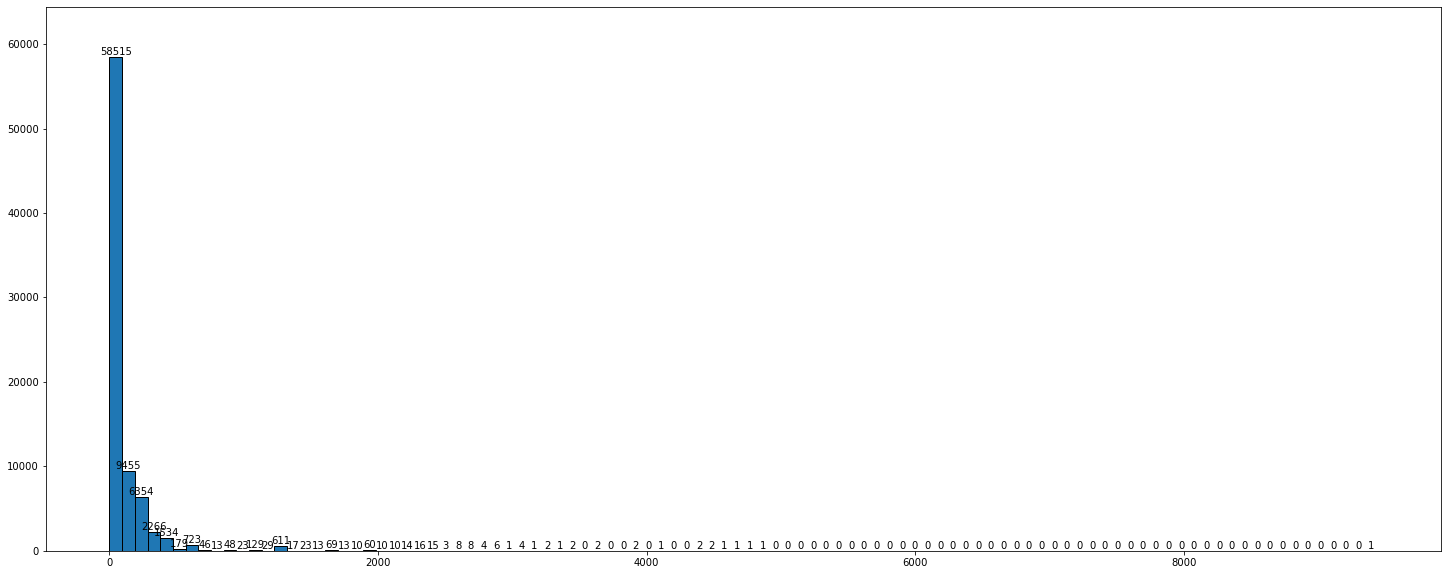

<Figure size 432x288 with 0 Axes>

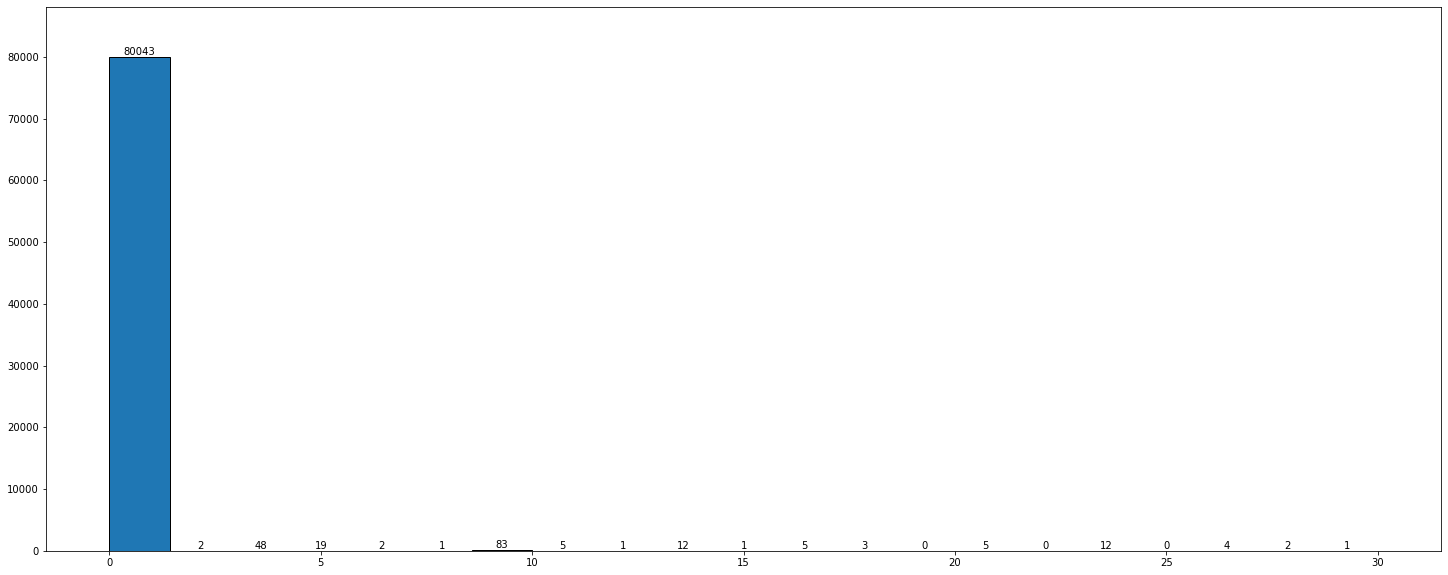

<Figure size 432x288 with 0 Axes>

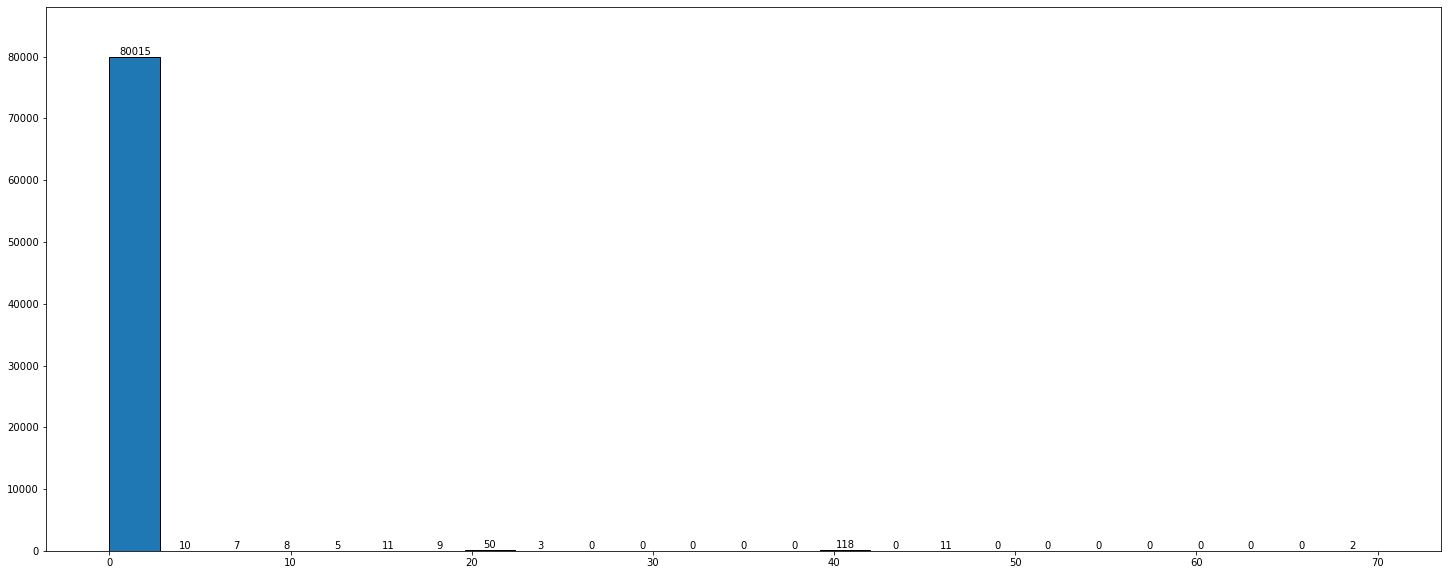

<Figure size 432x288 with 0 Axes>

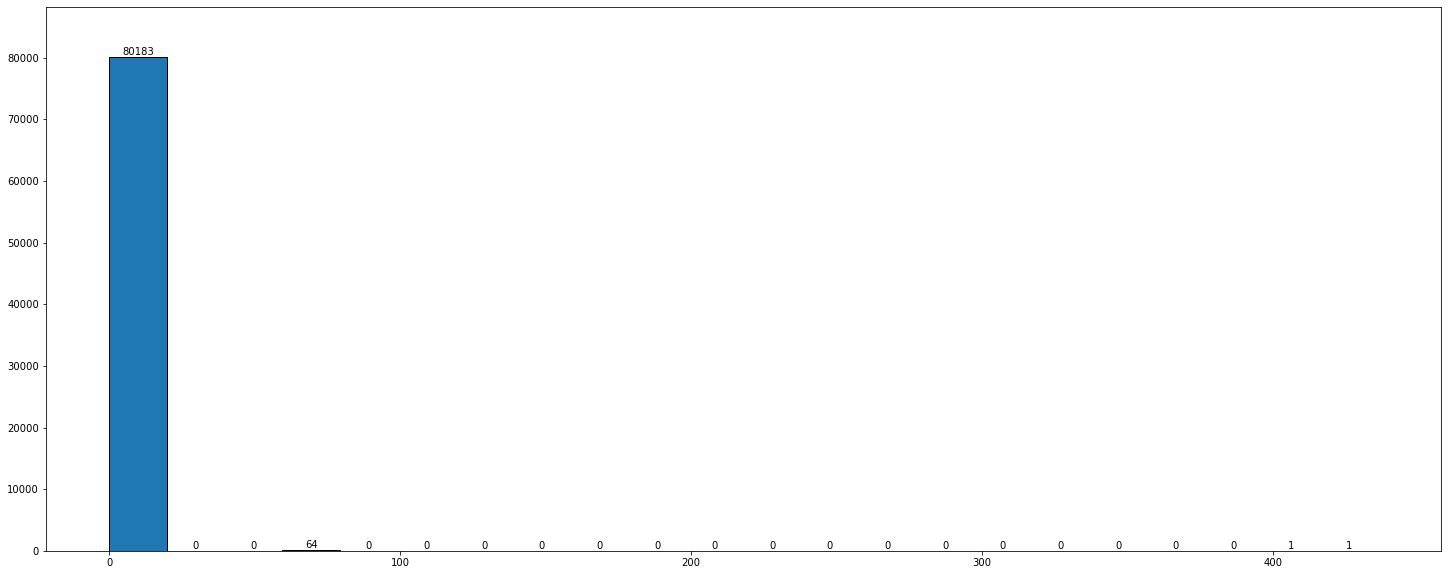

<Figure size 432x288 with 0 Axes>

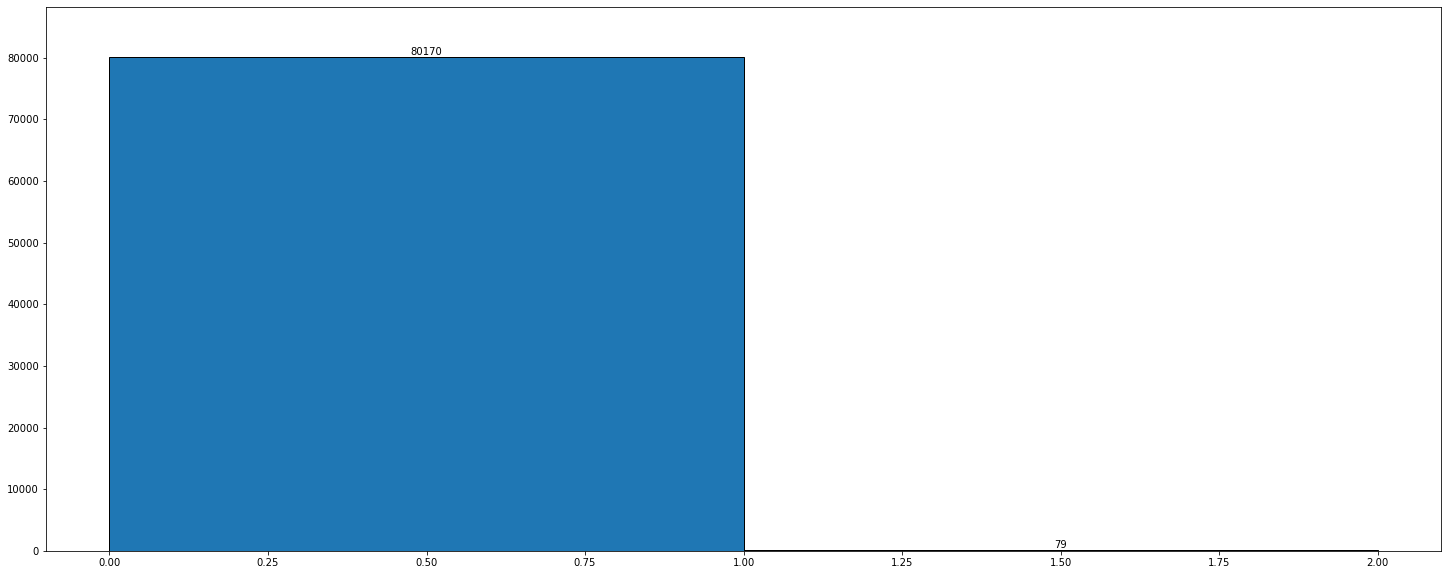

<Figure size 432x288 with 0 Axes>

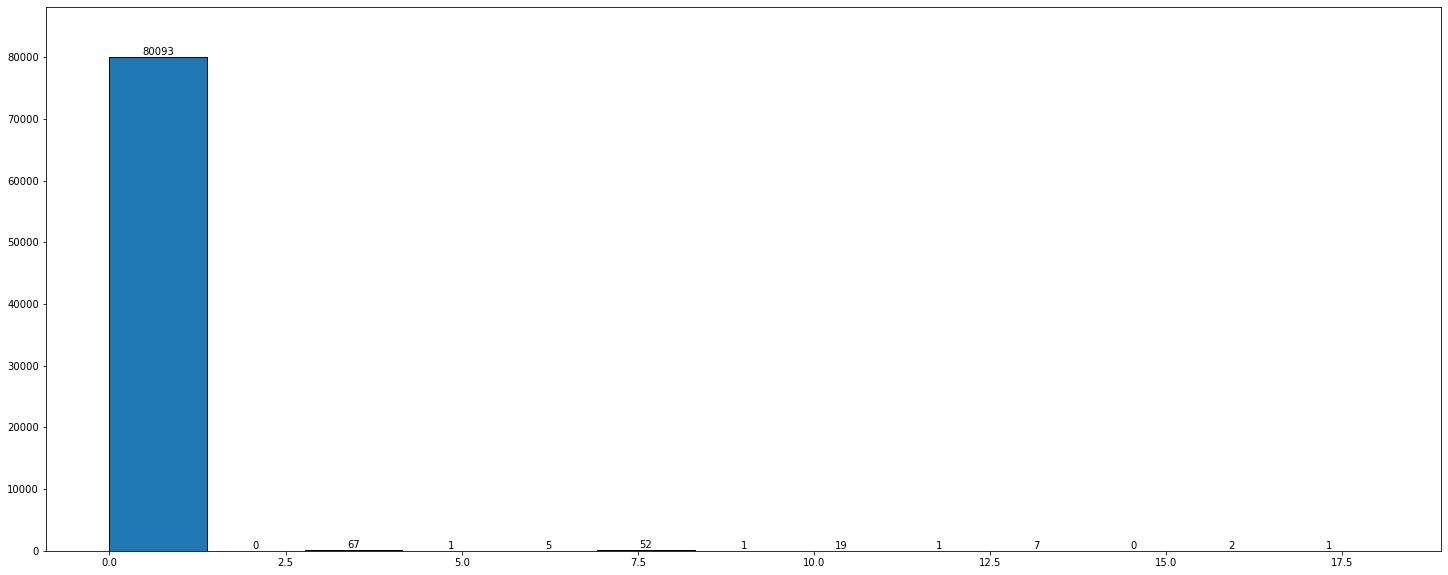

<Figure size 432x288 with 0 Axes>

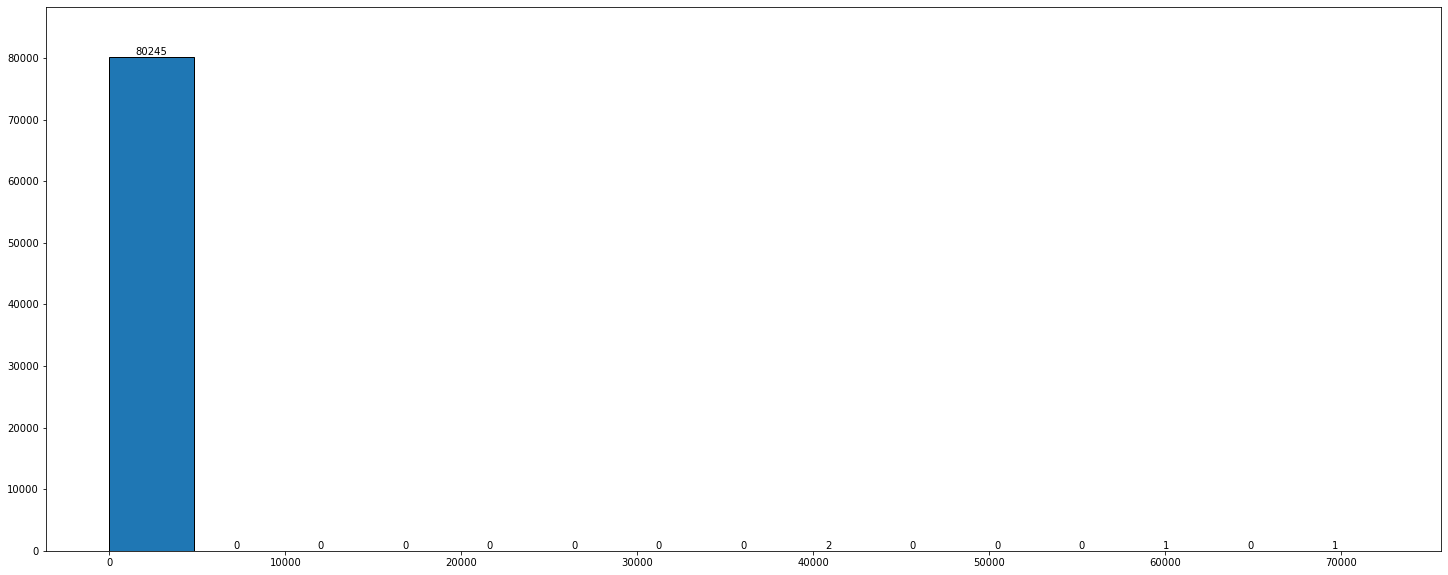

<Figure size 432x288 with 0 Axes>

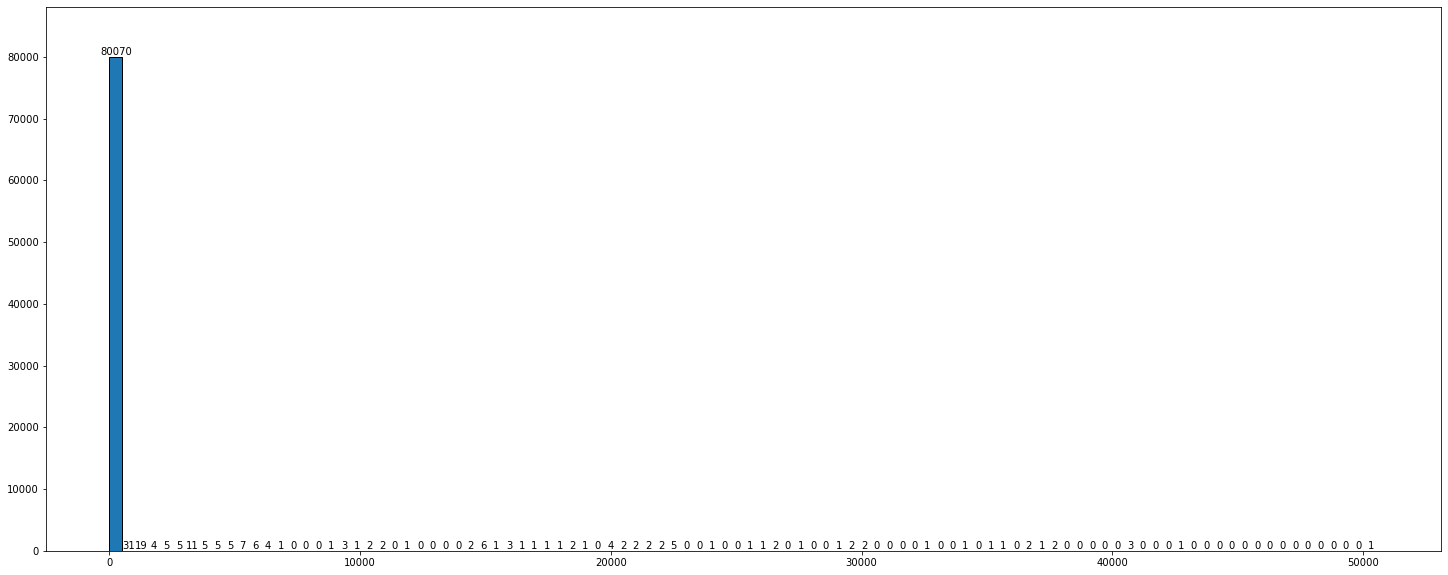

<Figure size 432x288 with 0 Axes>

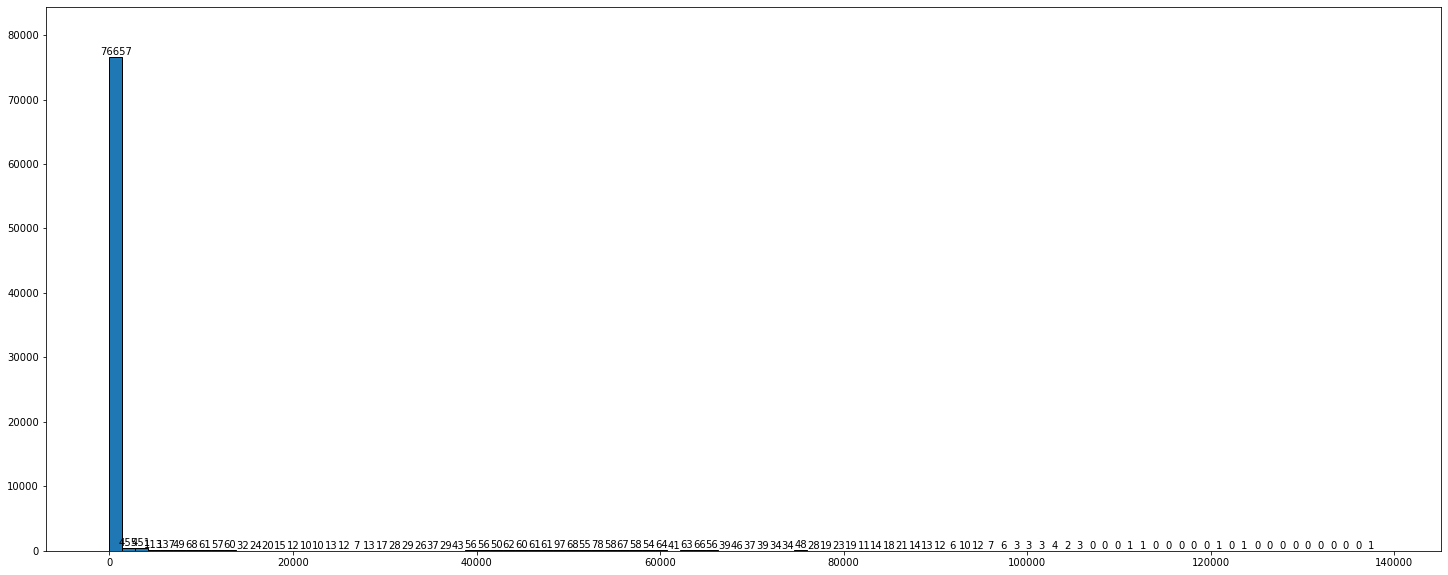

<Figure size 432x288 with 0 Axes>

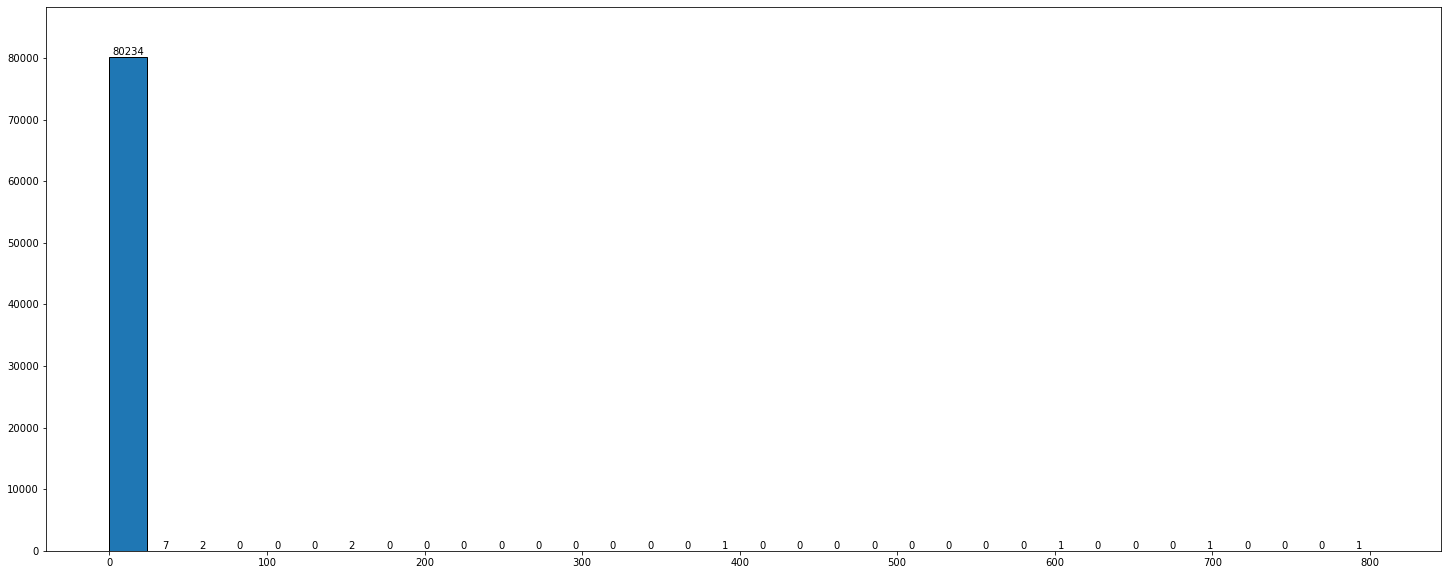

<Figure size 432x288 with 0 Axes>

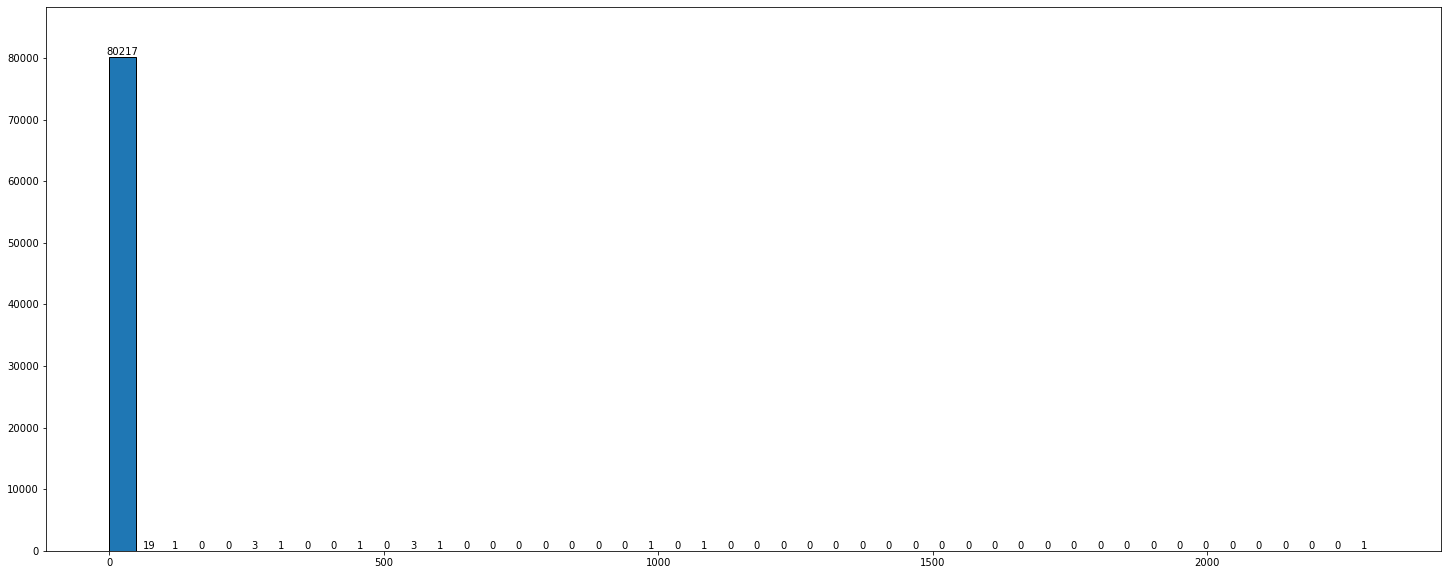

<Figure size 432x288 with 0 Axes>

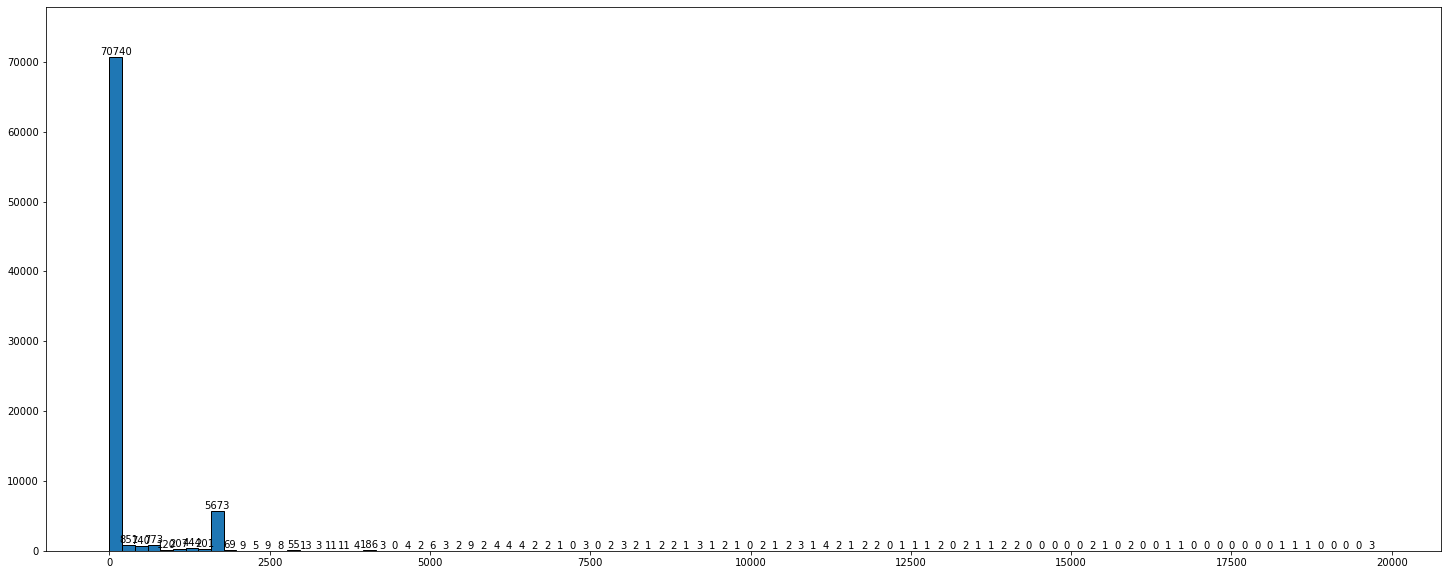

<Figure size 432x288 with 0 Axes>

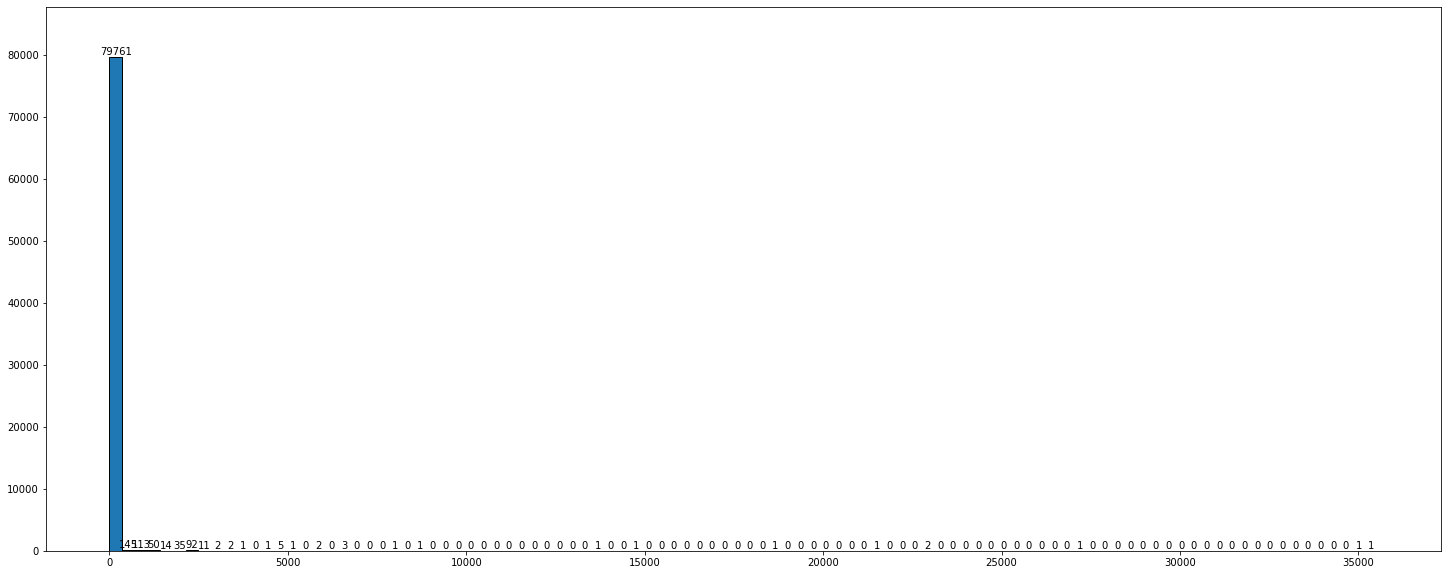

<Figure size 432x288 with 0 Axes>

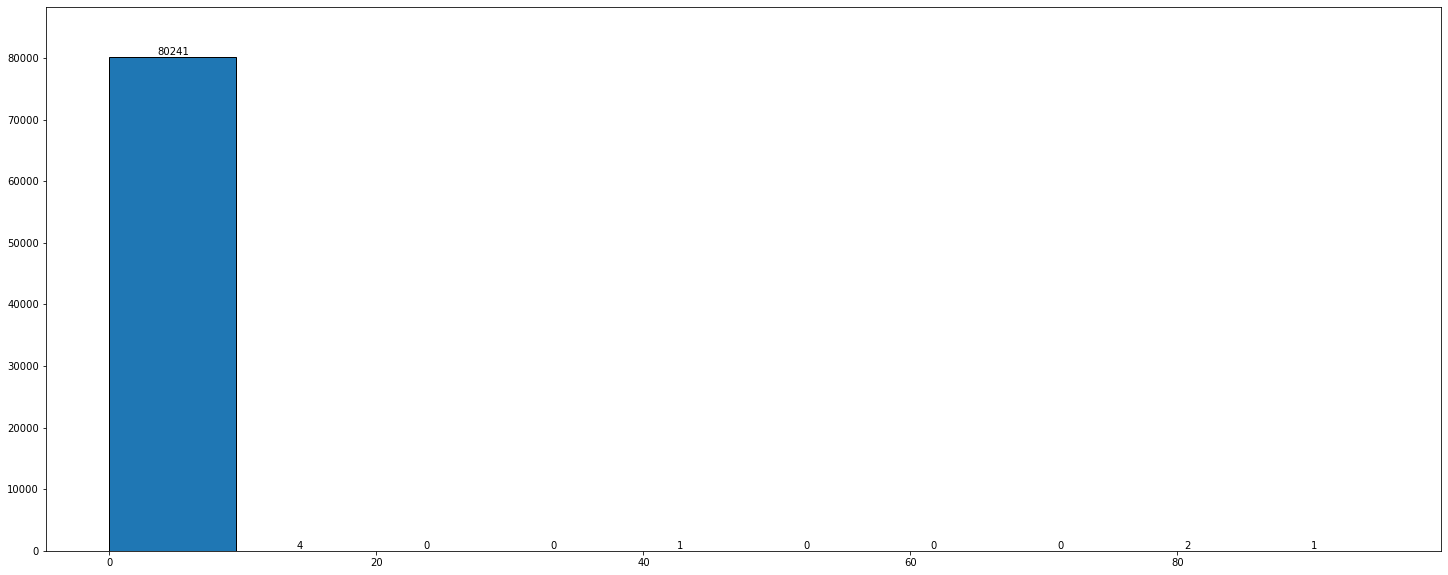

<Figure size 432x288 with 0 Axes>

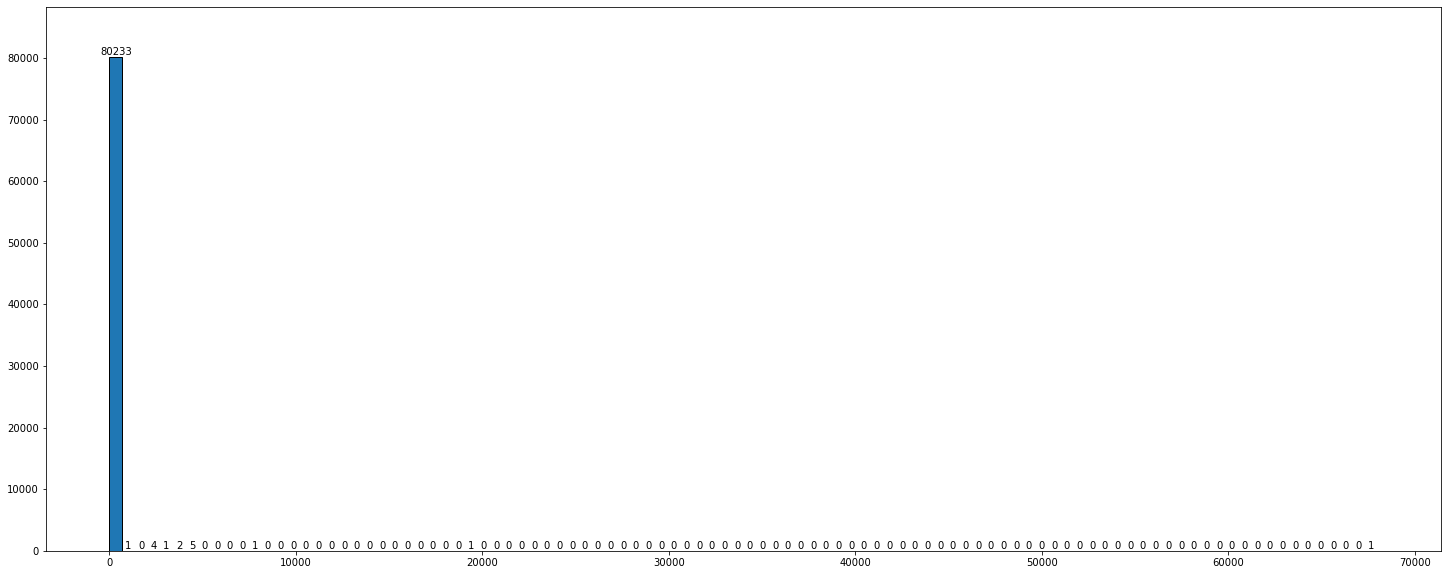

<Figure size 432x288 with 0 Axes>

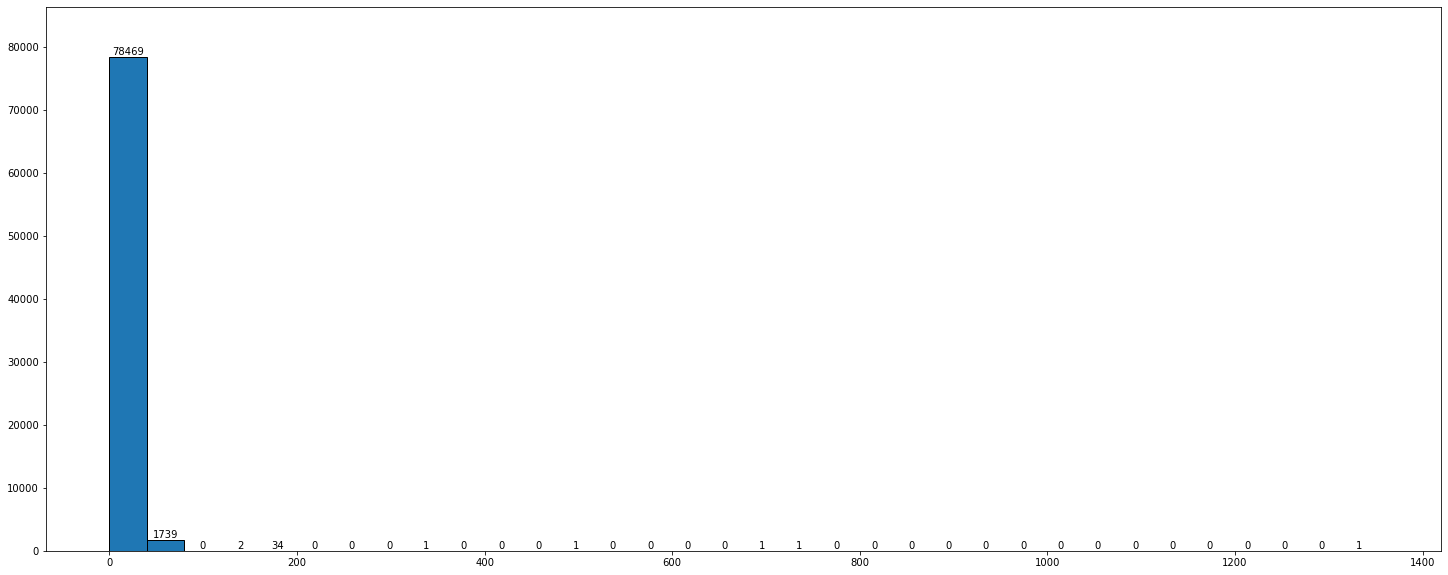

<Figure size 432x288 with 0 Axes>

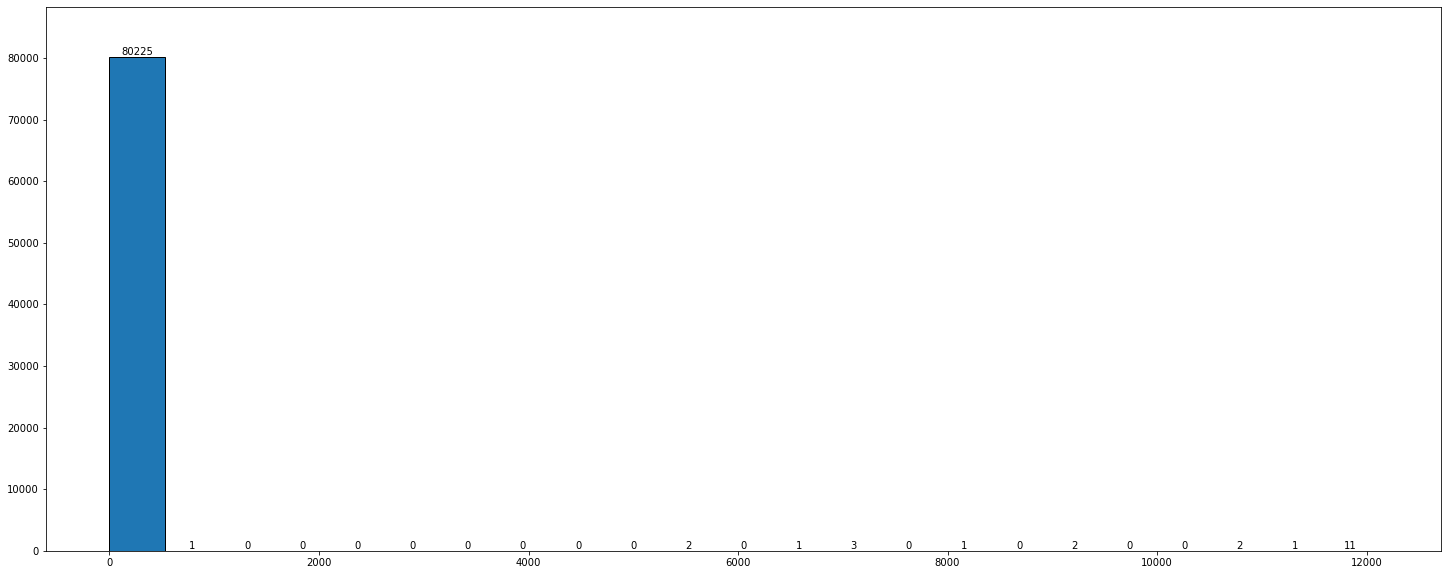

<Figure size 432x288 with 0 Axes>

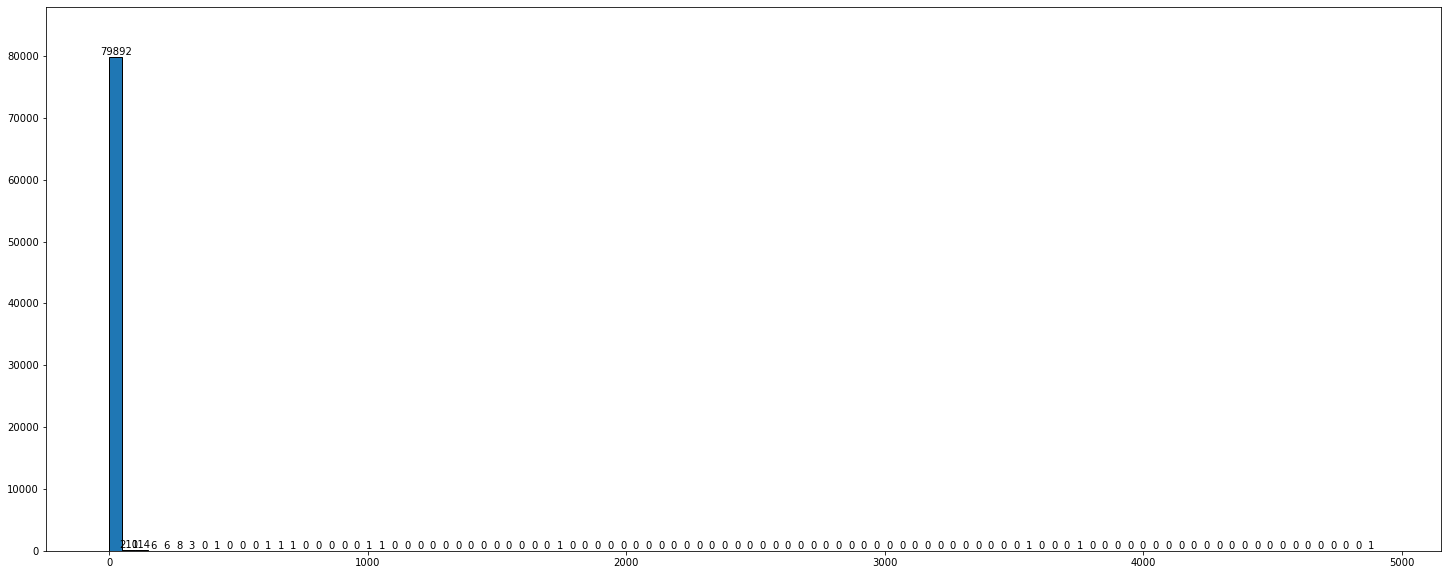

<Figure size 432x288 with 0 Axes>

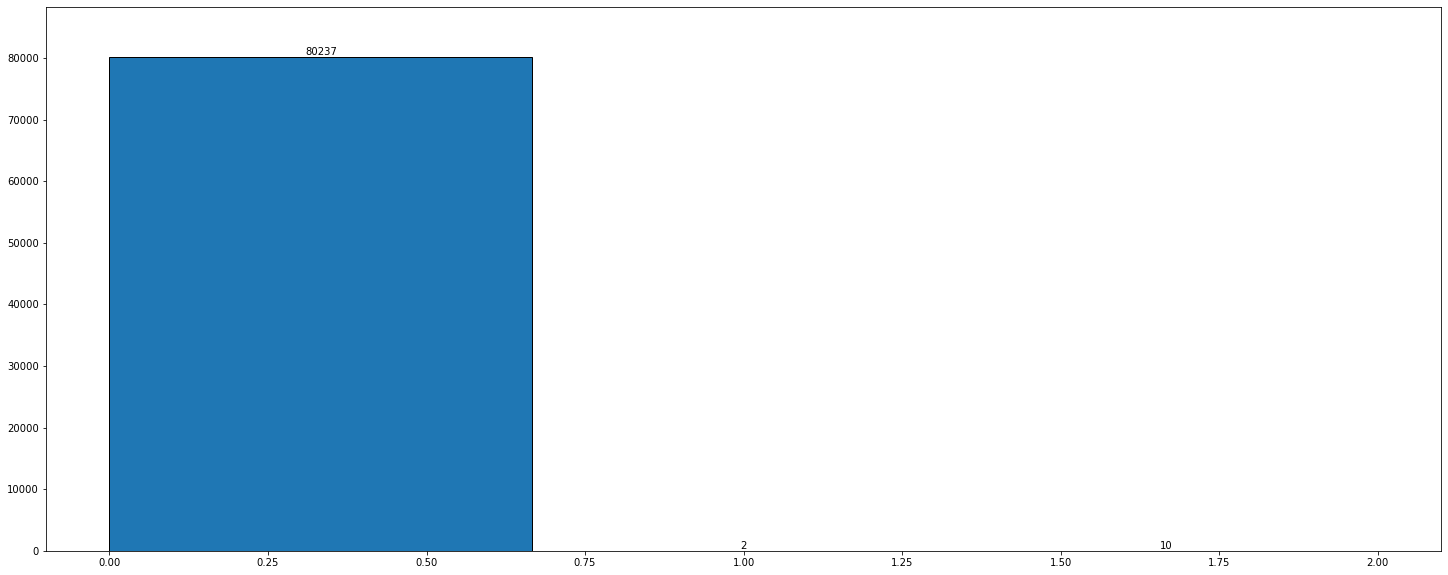

<Figure size 432x288 with 0 Axes>

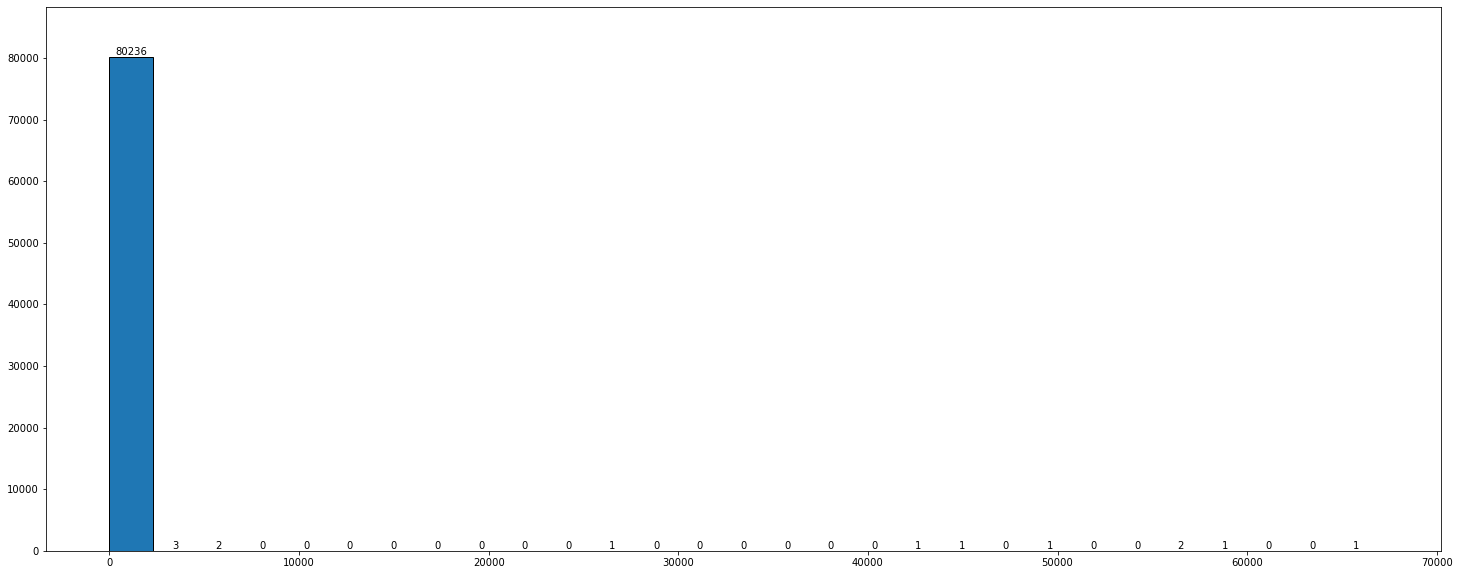

<Figure size 432x288 with 0 Axes>

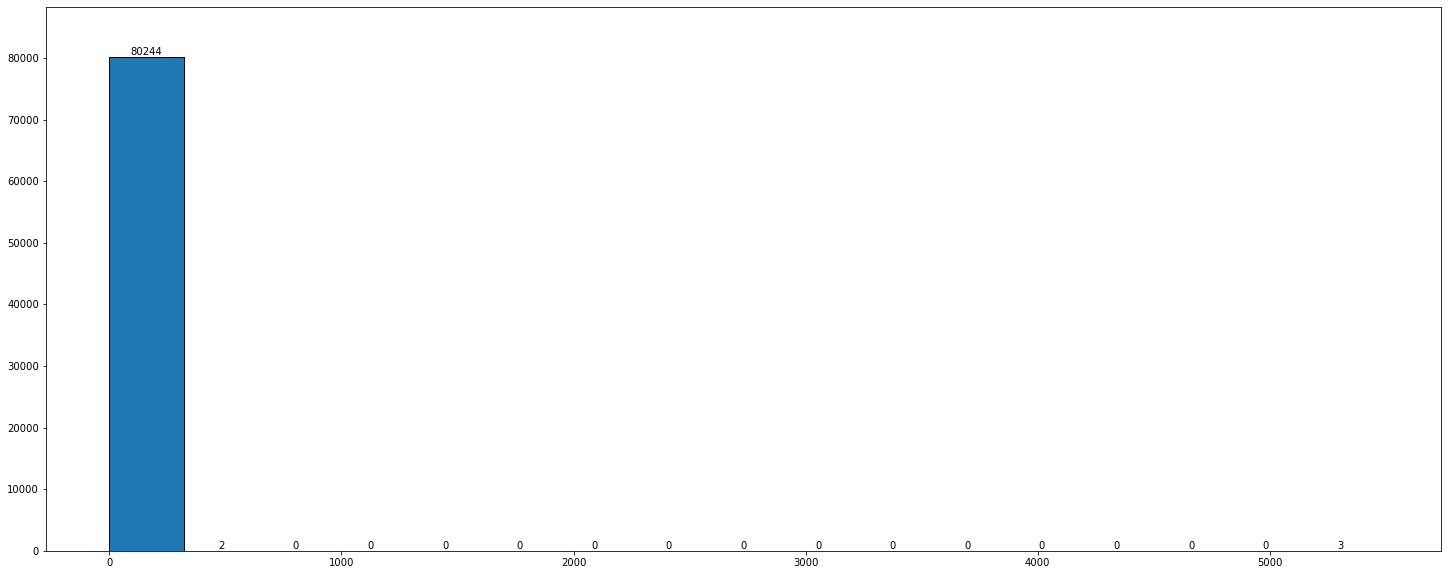

<Figure size 432x288 with 0 Axes>

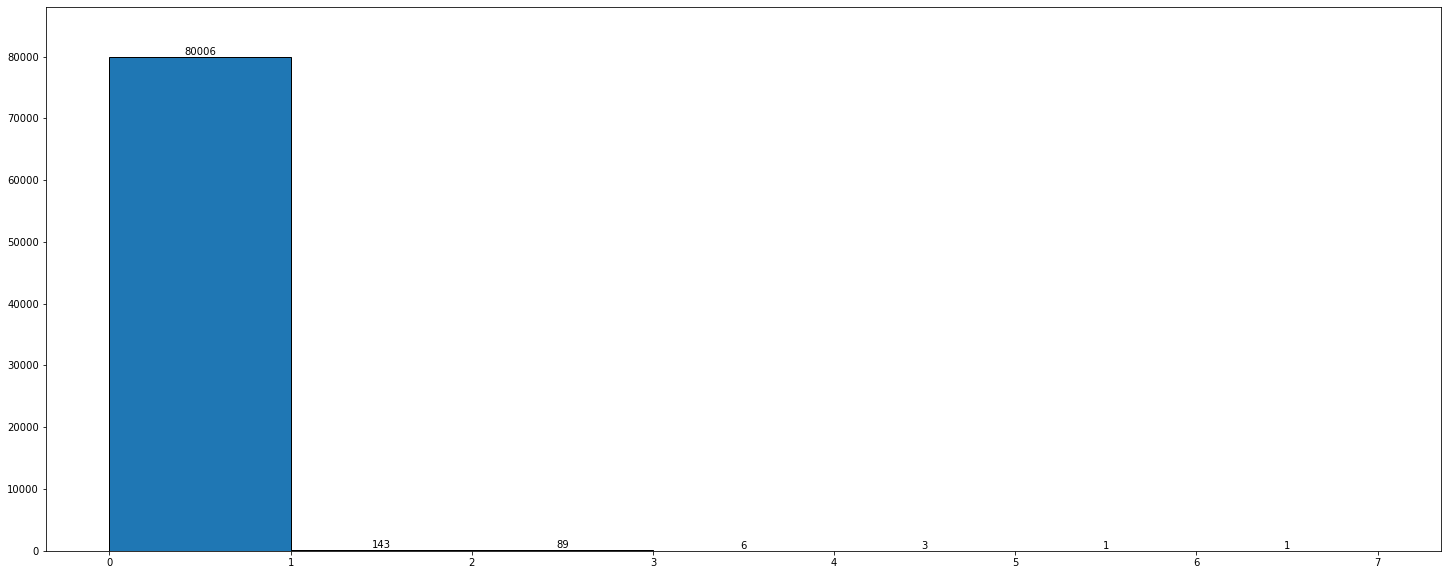

<Figure size 432x288 with 0 Axes>

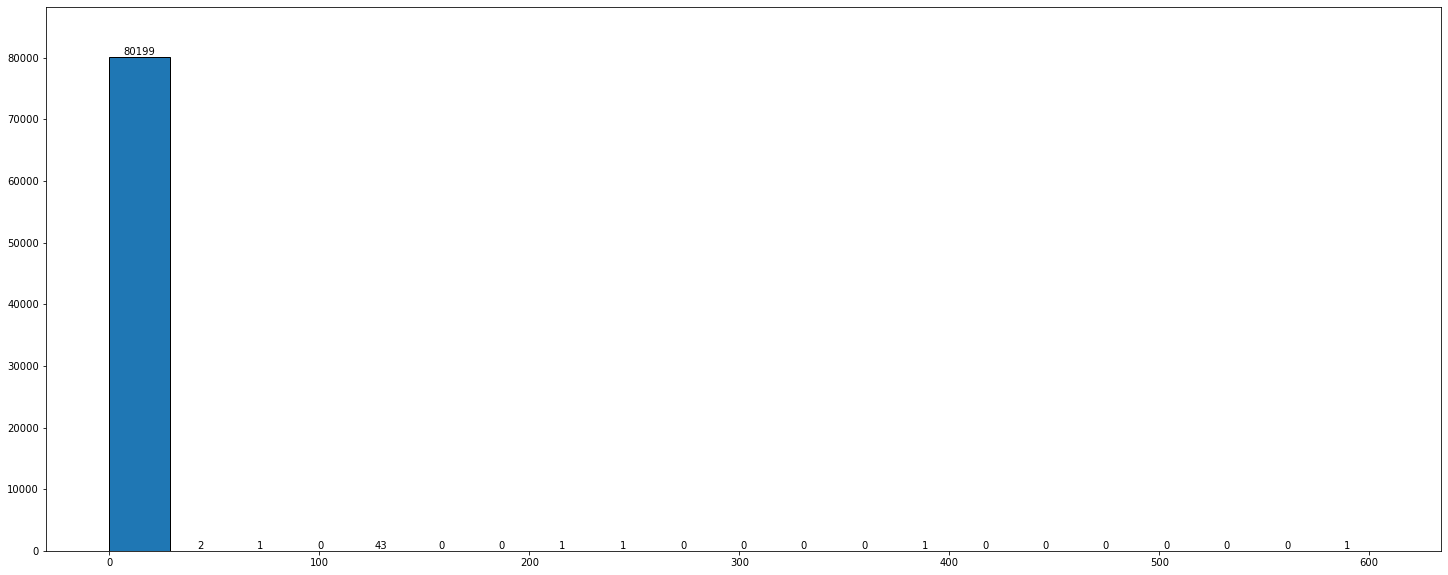

<Figure size 432x288 with 0 Axes>

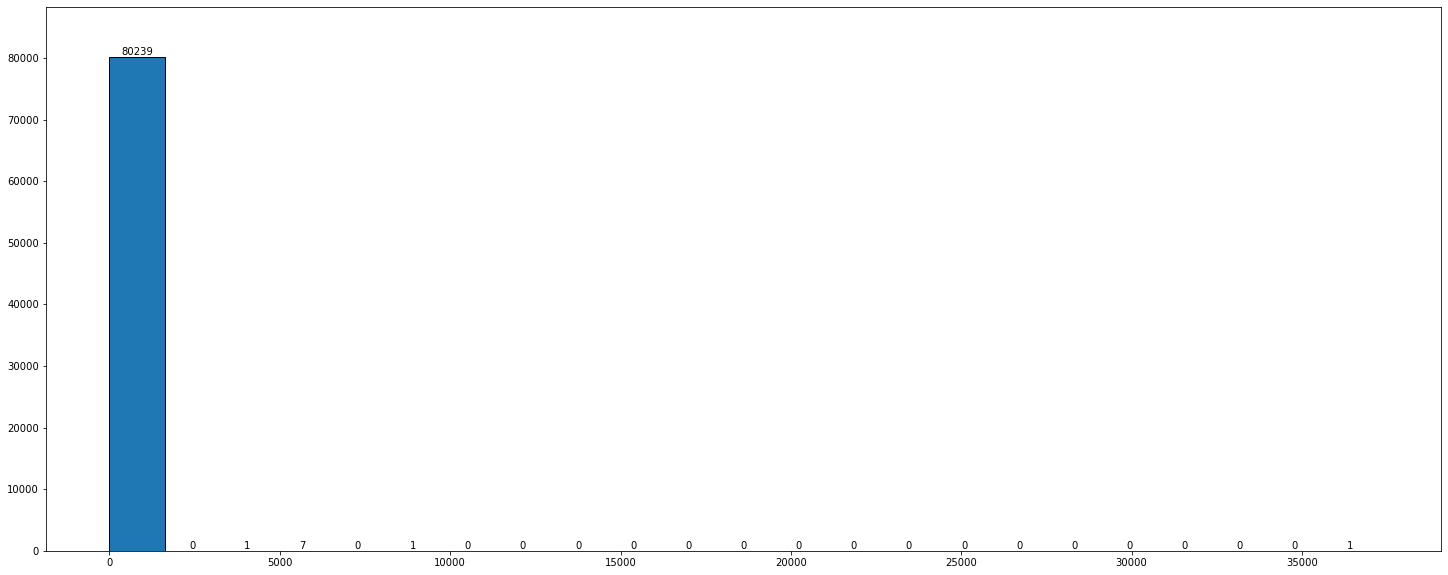

<Figure size 432x288 with 0 Axes>

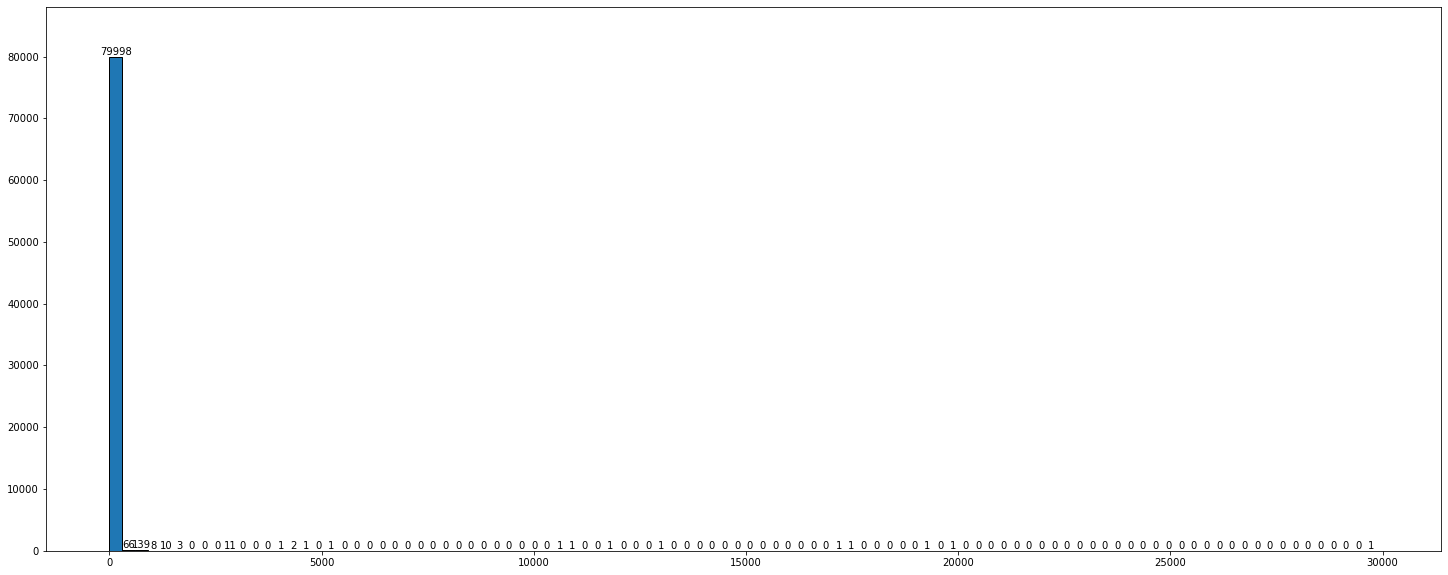

<Figure size 432x288 with 0 Axes>

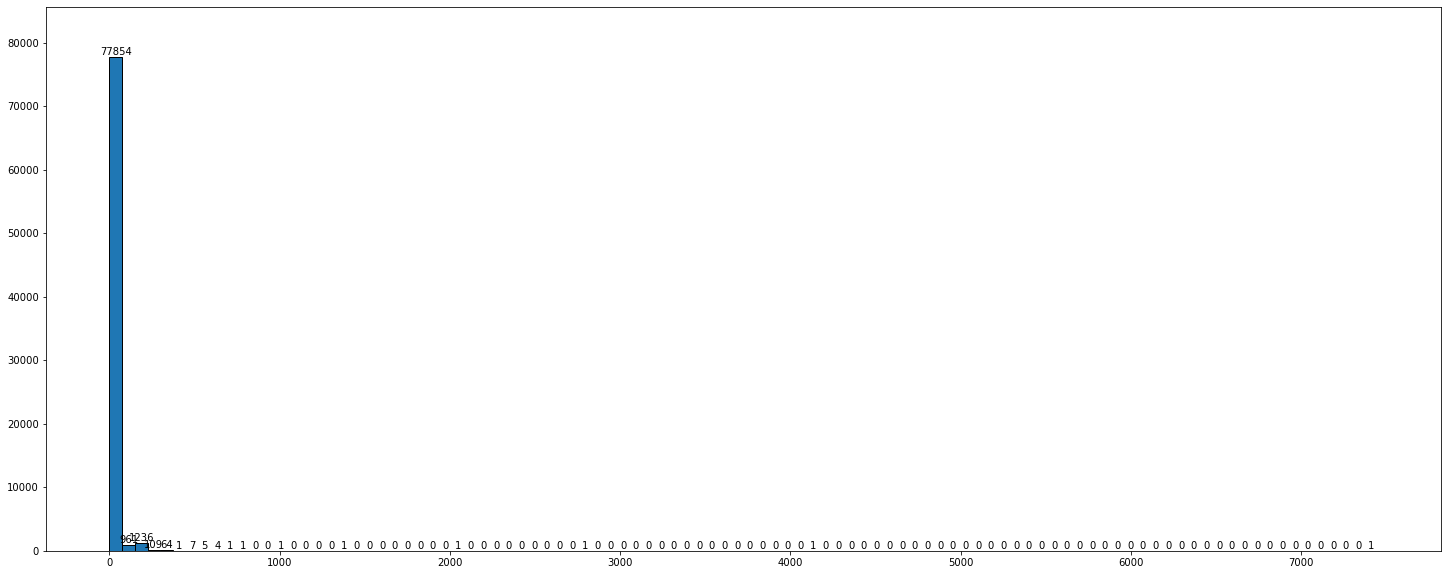

<Figure size 432x288 with 0 Axes>

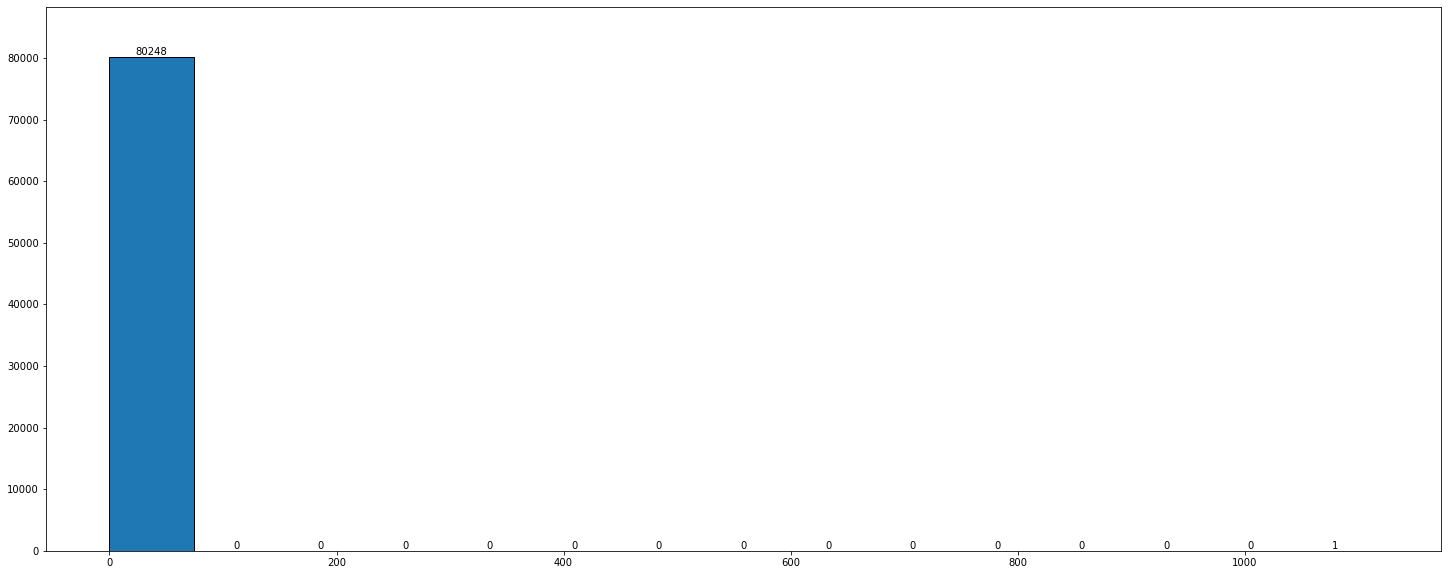

<Figure size 432x288 with 0 Axes>

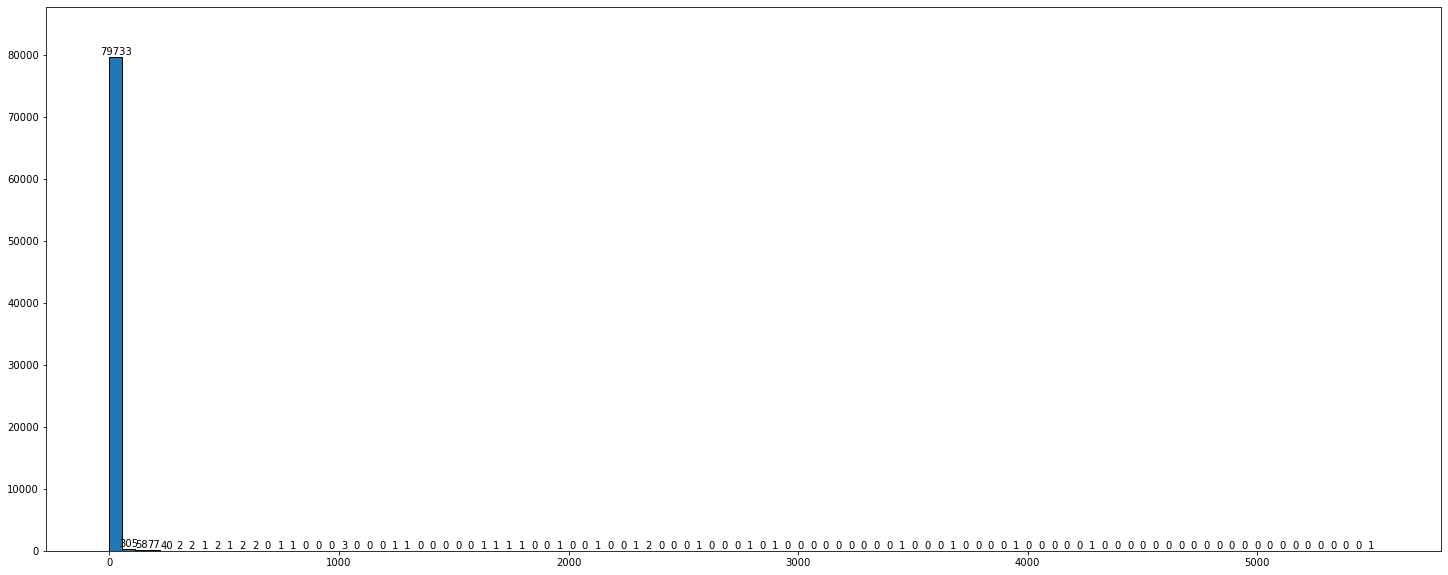

<Figure size 432x288 with 0 Axes>

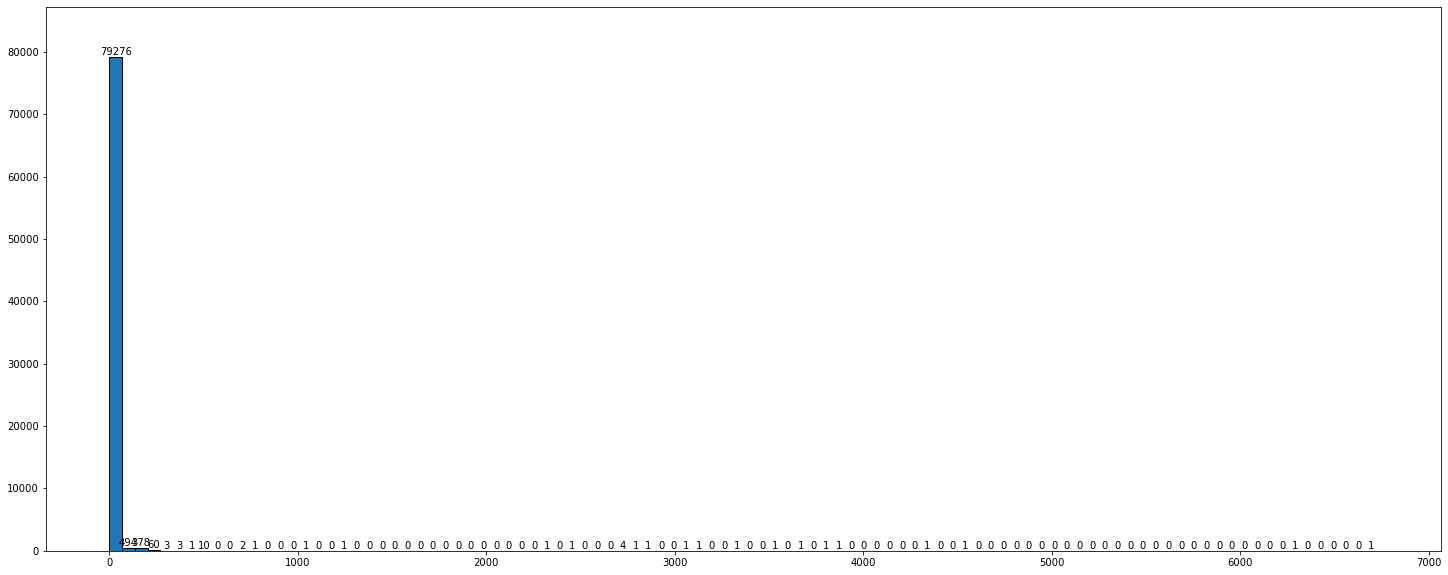

<Figure size 432x288 with 0 Axes>

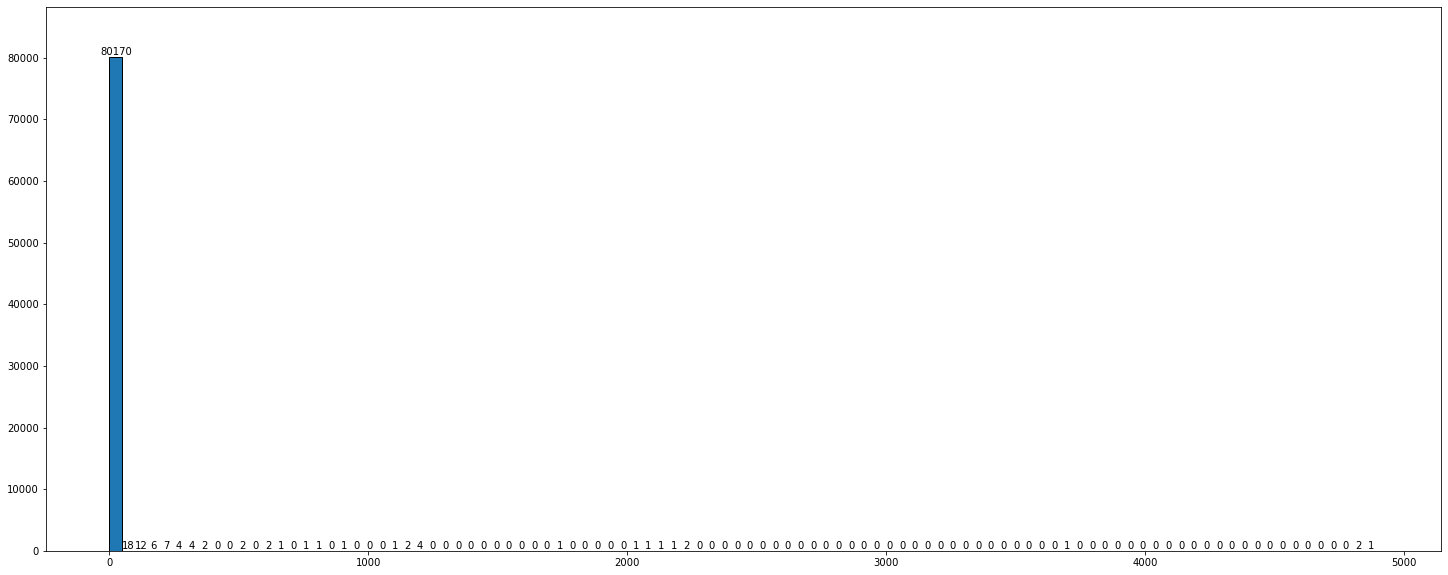

<Figure size 432x288 with 0 Axes>

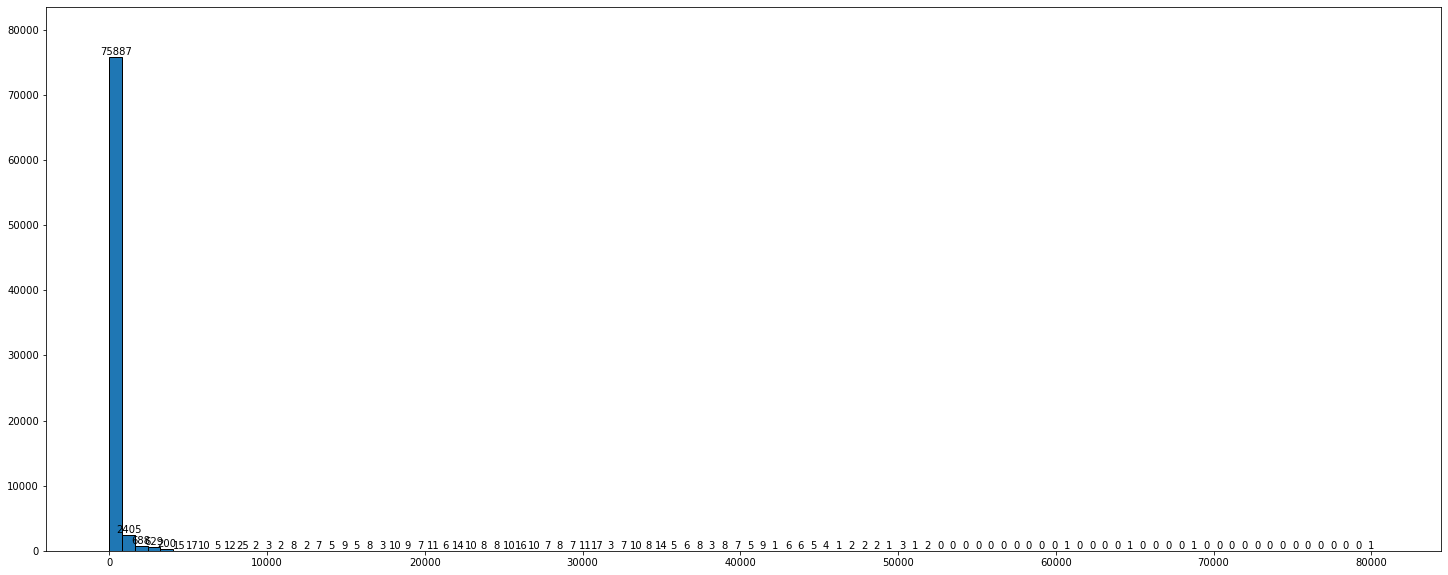

<Figure size 432x288 with 0 Axes>

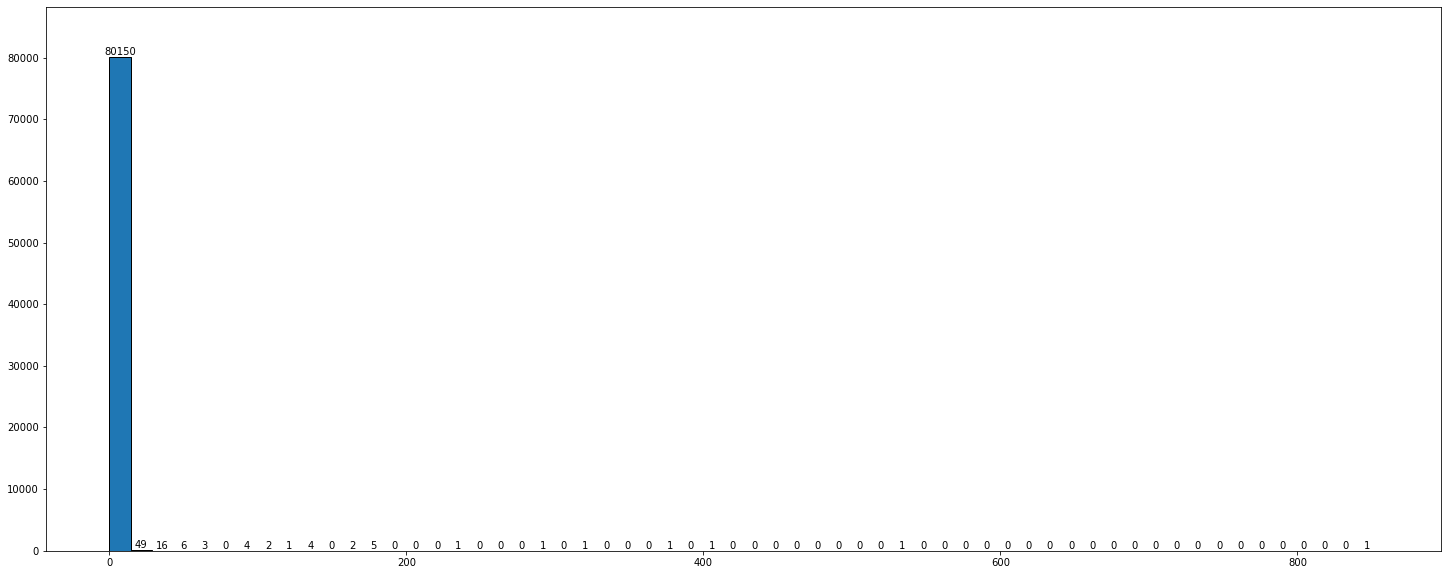

<Figure size 432x288 with 0 Axes>

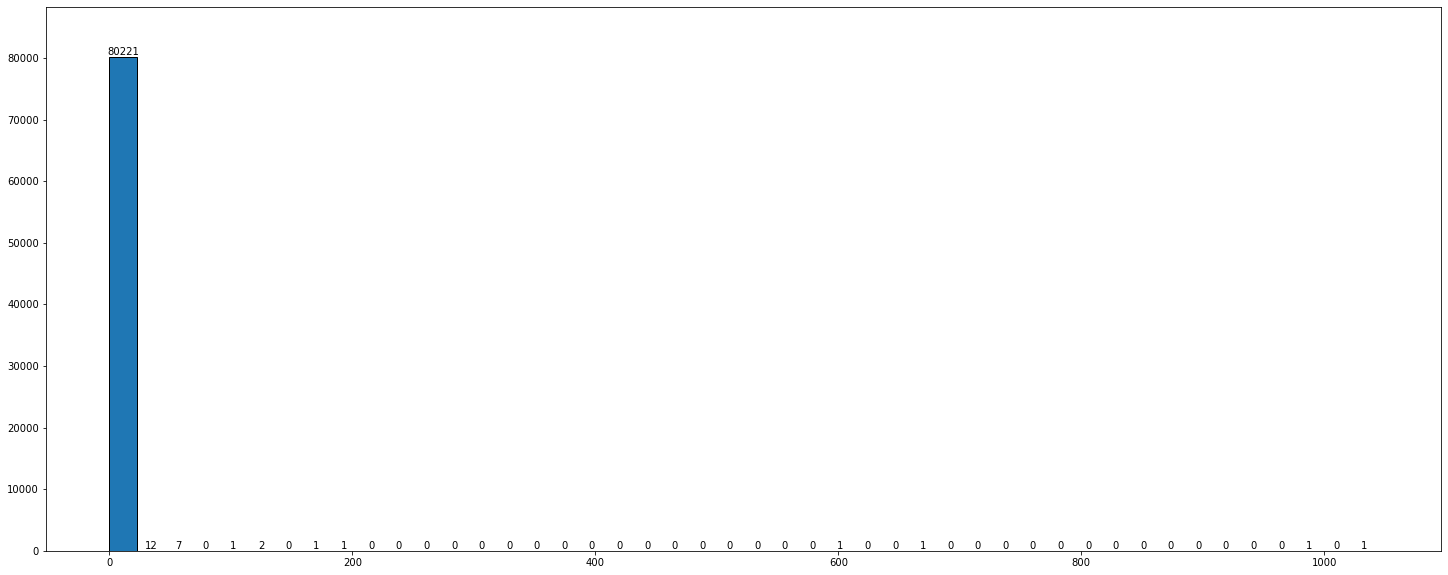

<Figure size 432x288 with 0 Axes>

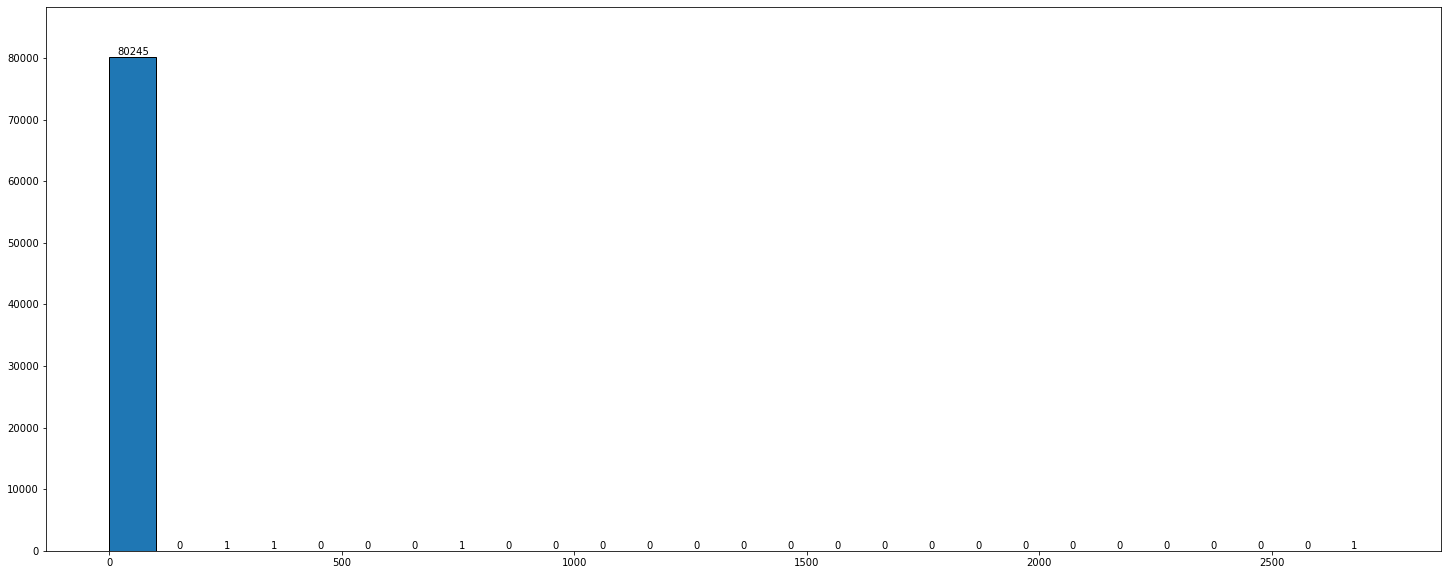

<Figure size 432x288 with 0 Axes>

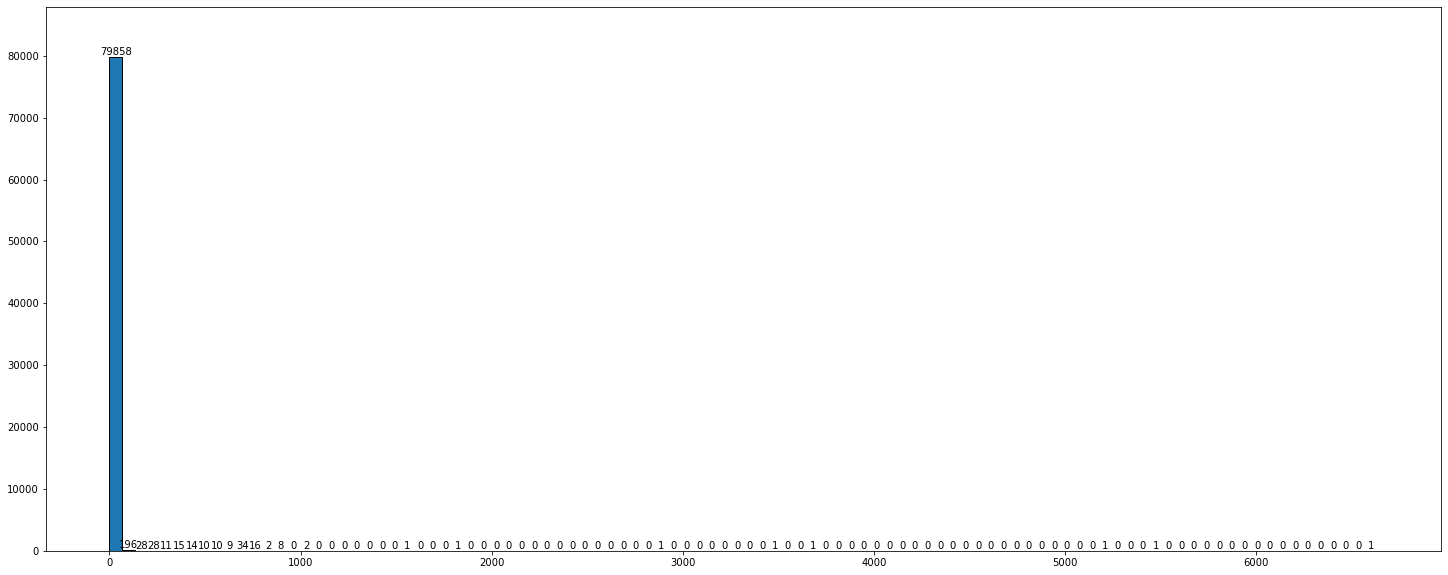

<Figure size 432x288 with 0 Axes>

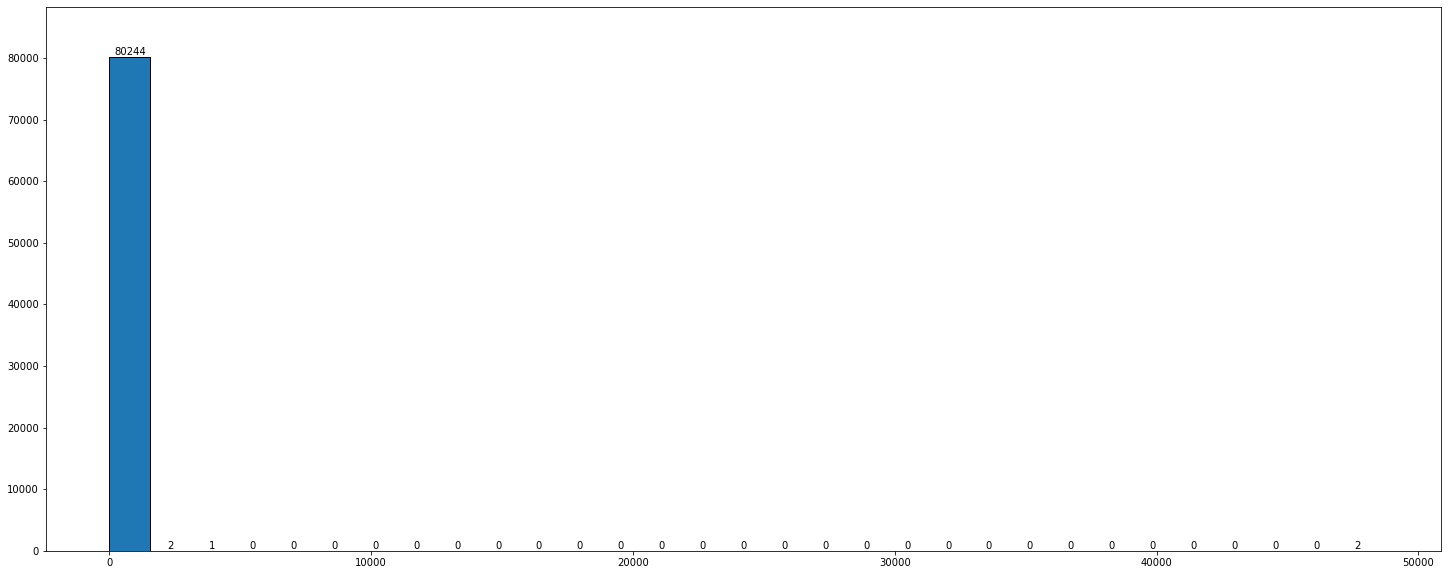

<Figure size 432x288 with 0 Axes>

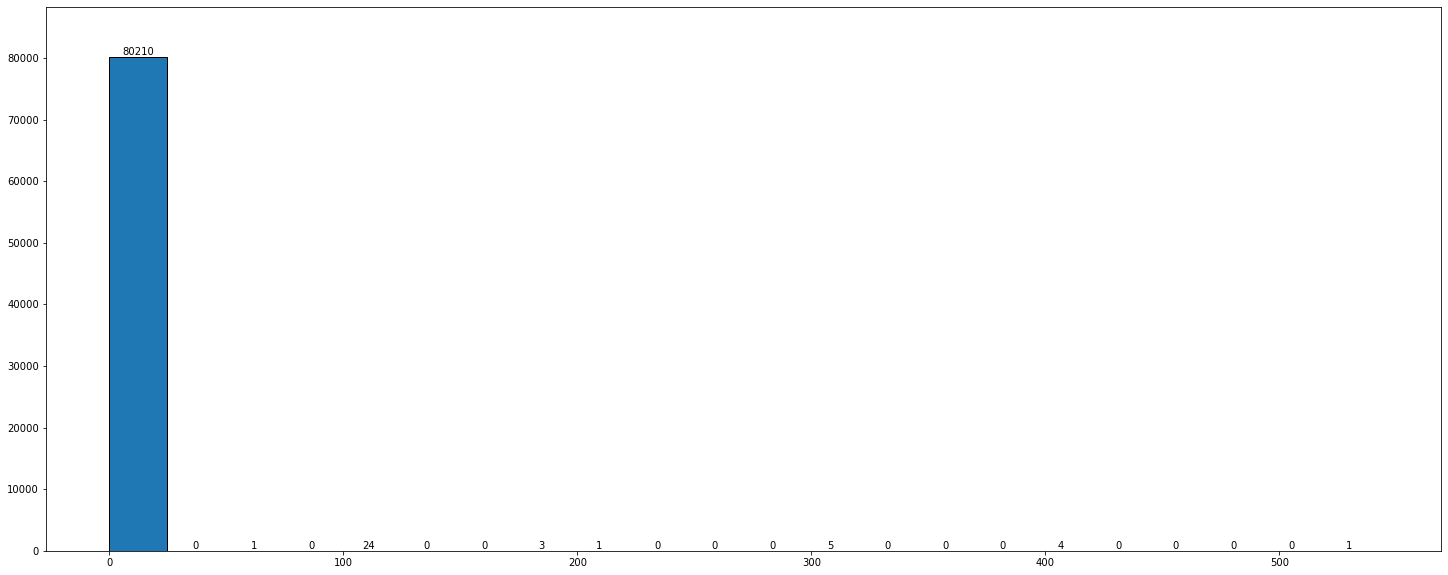

<Figure size 432x288 with 0 Axes>

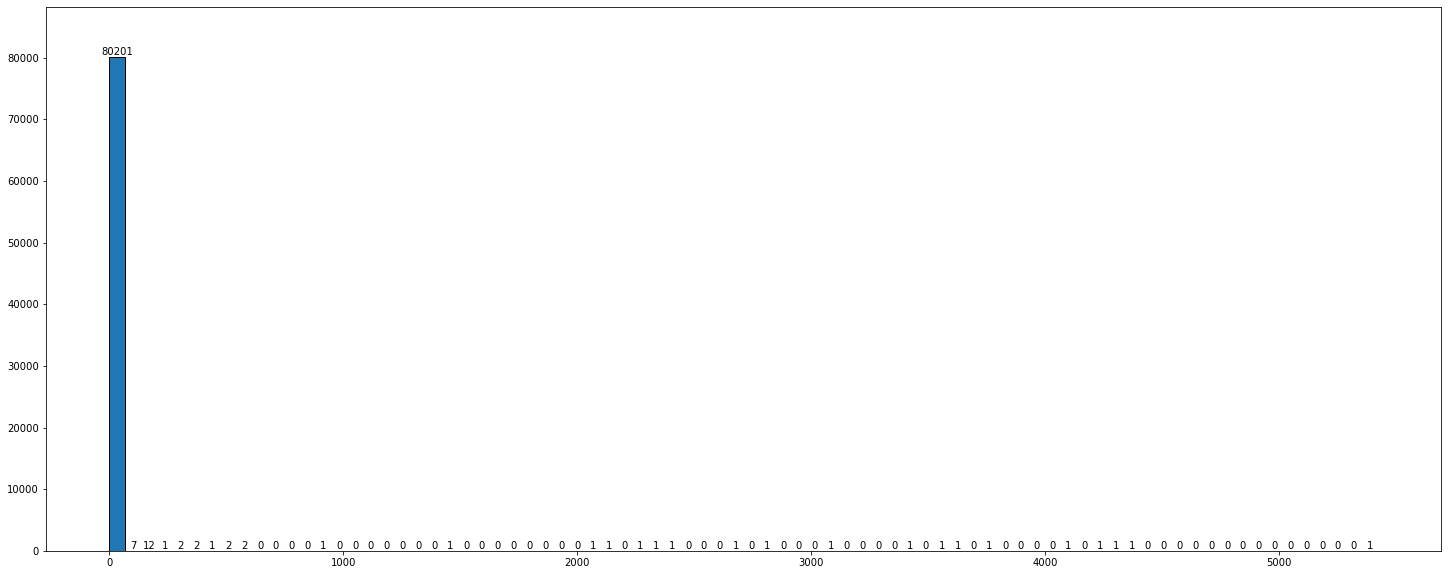

<Figure size 432x288 with 0 Axes>

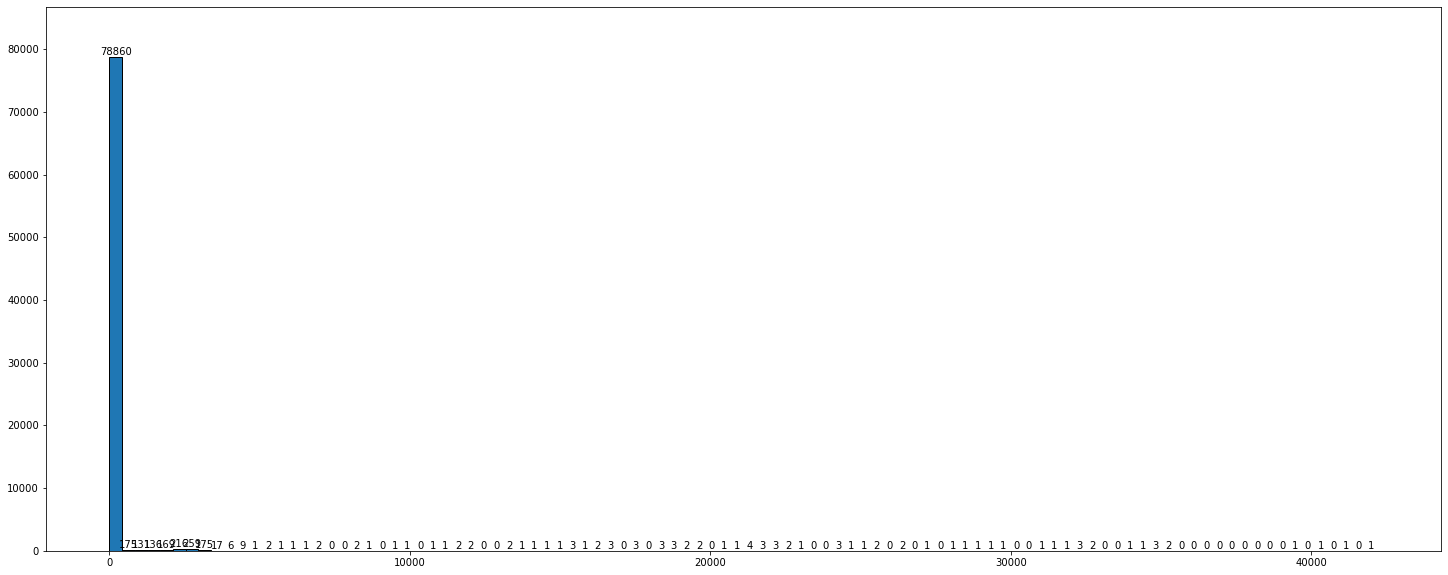

<Figure size 432x288 with 0 Axes>

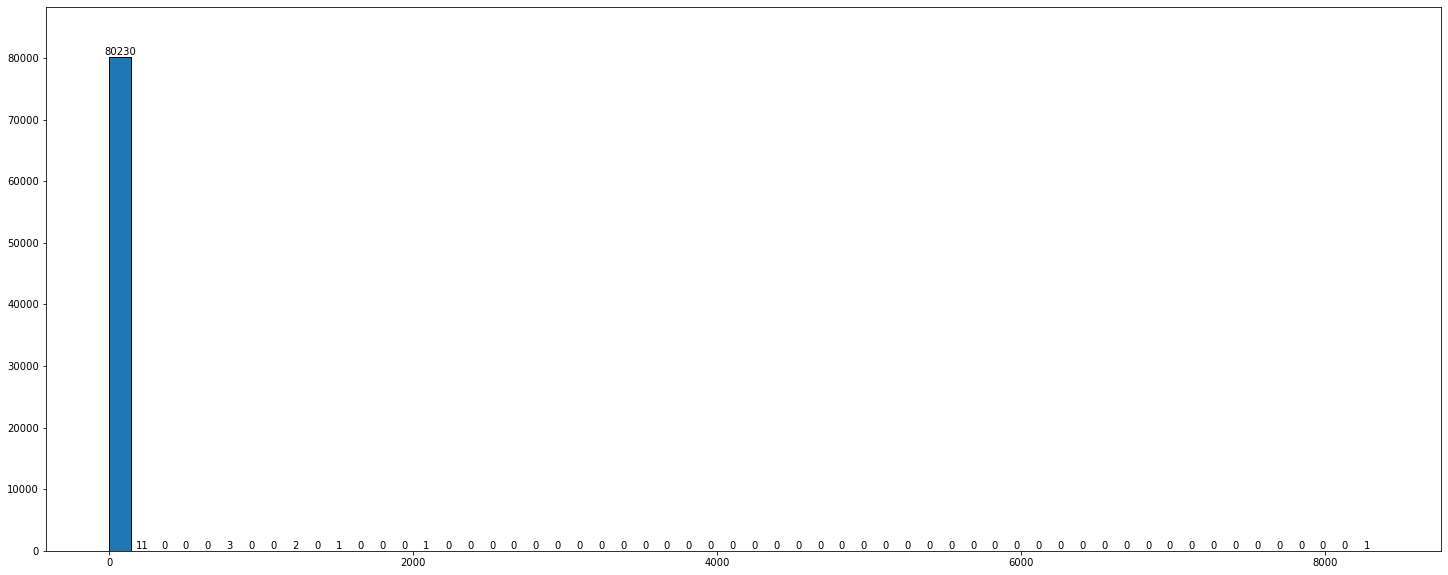

<Figure size 432x288 with 0 Axes>

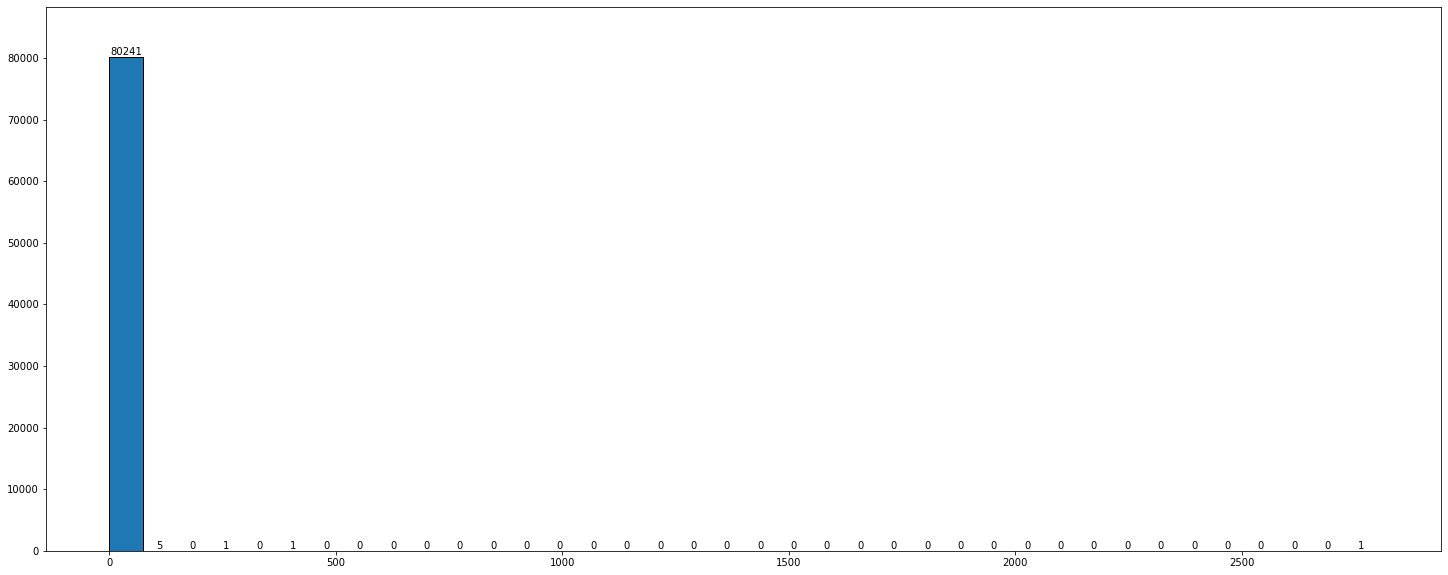

<Figure size 432x288 with 0 Axes>

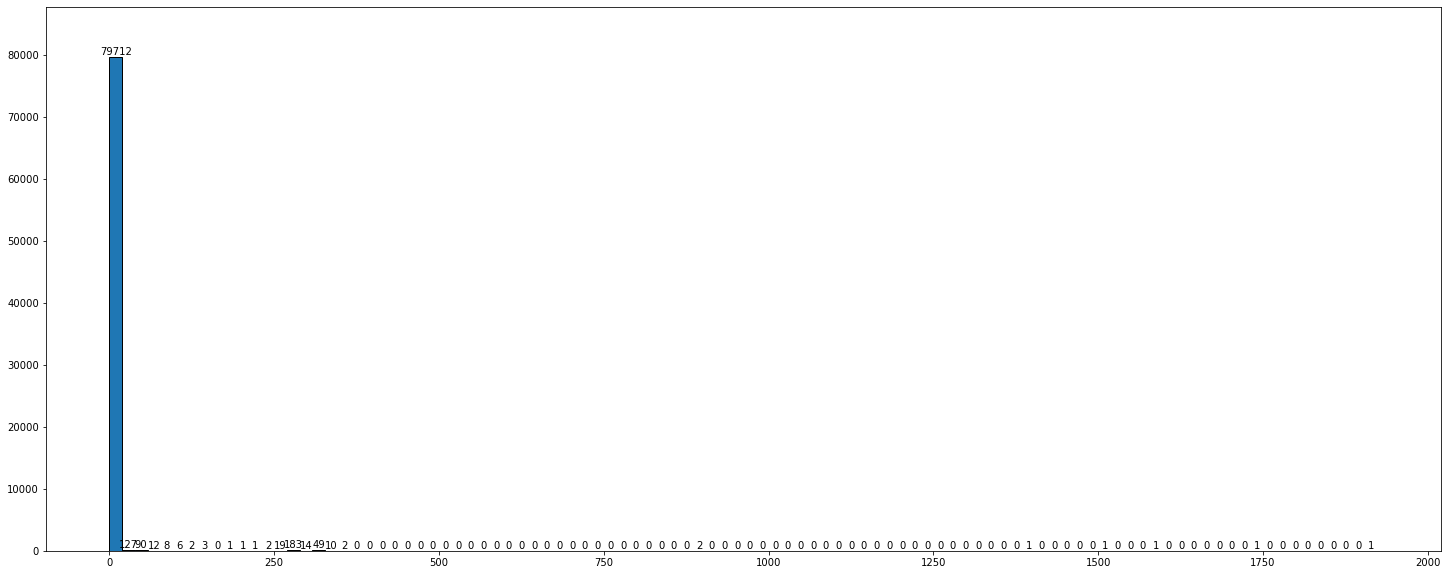

<Figure size 432x288 with 0 Axes>

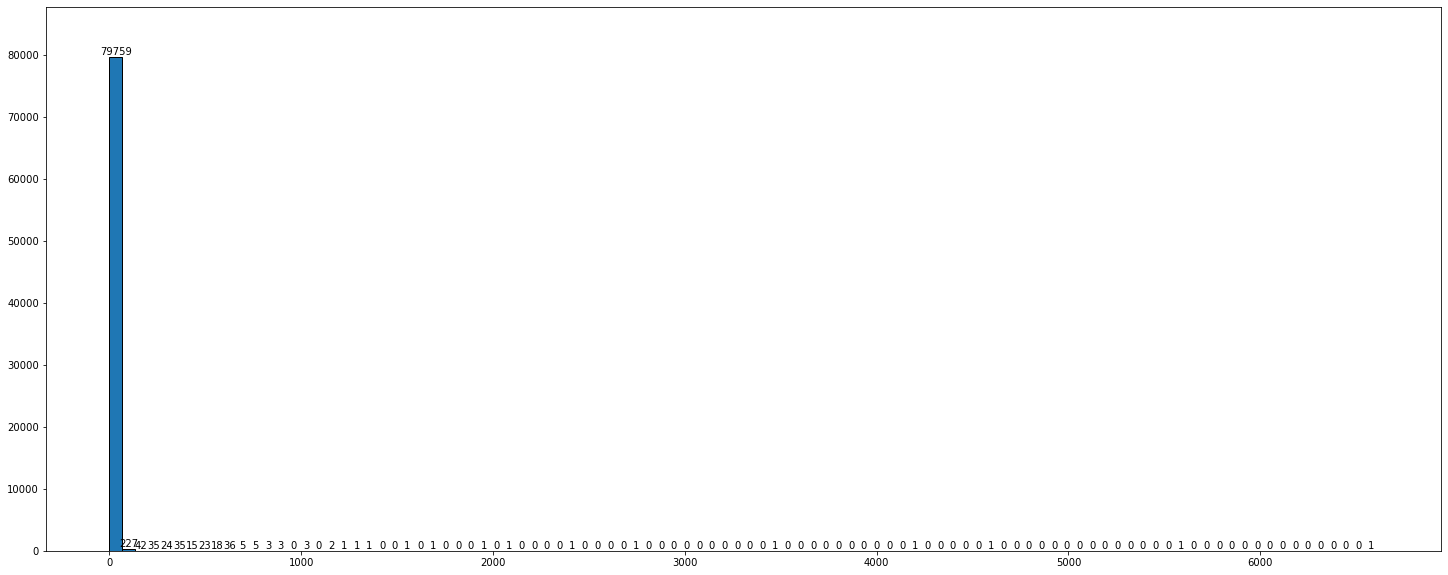

<Figure size 432x288 with 0 Axes>

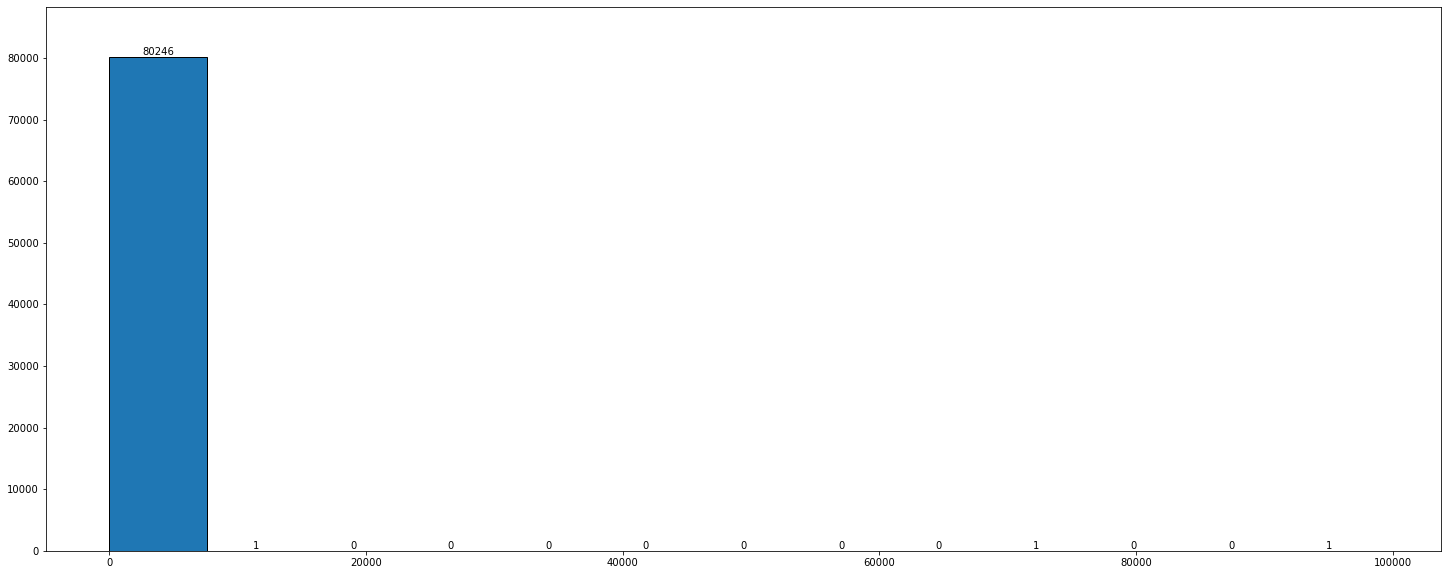

<Figure size 432x288 with 0 Axes>

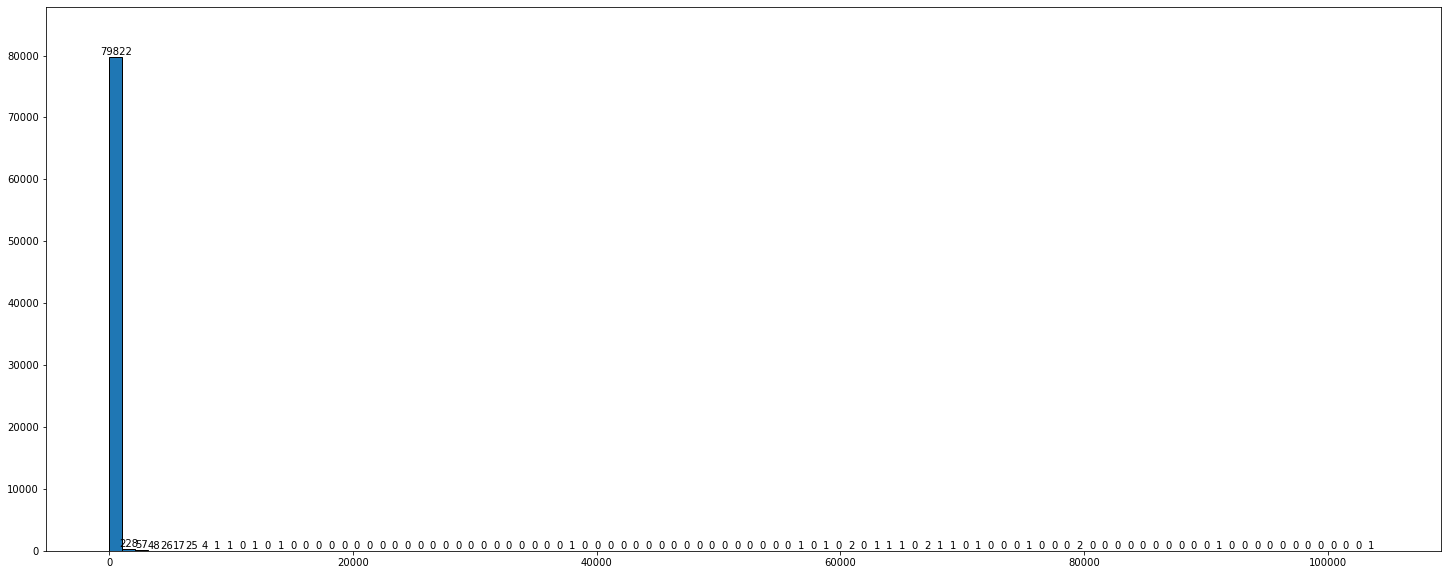

<Figure size 432x288 with 0 Axes>

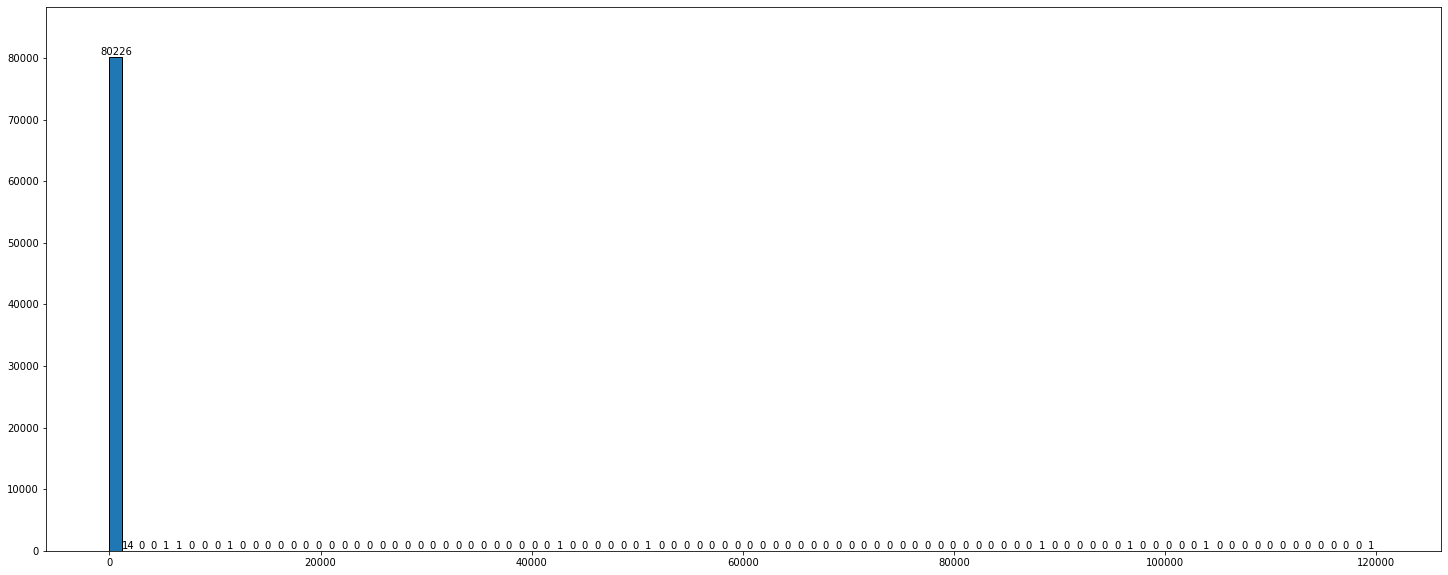

<Figure size 432x288 with 0 Axes>

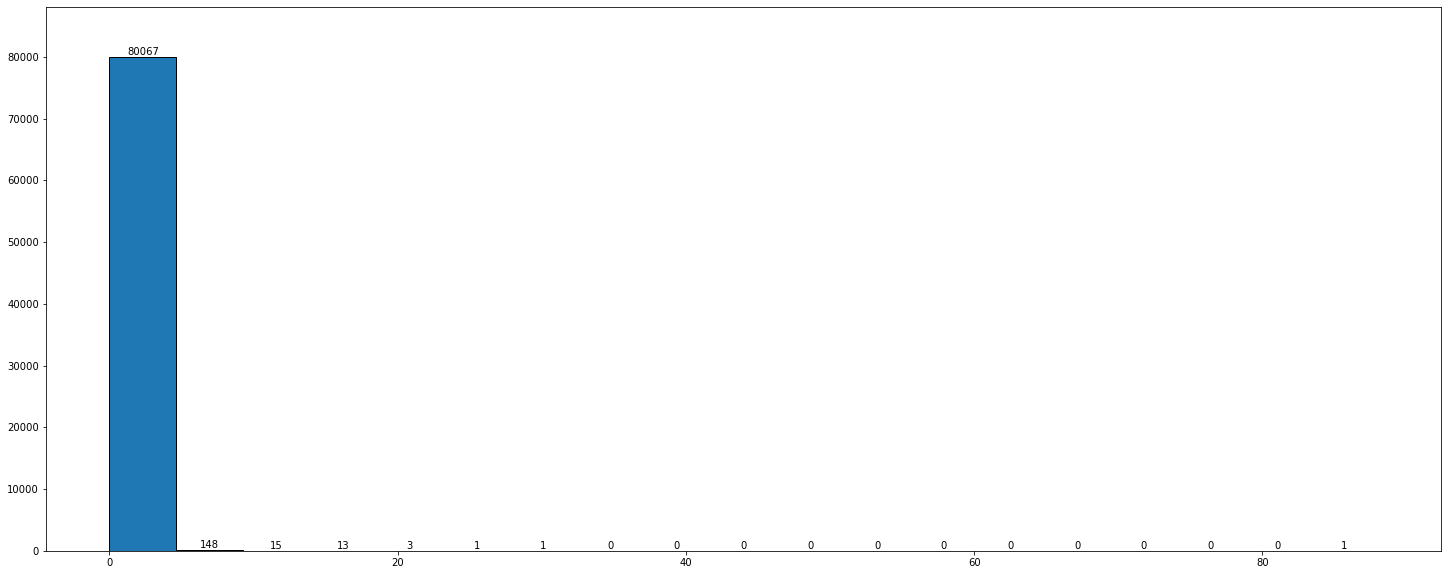

<Figure size 432x288 with 0 Axes>

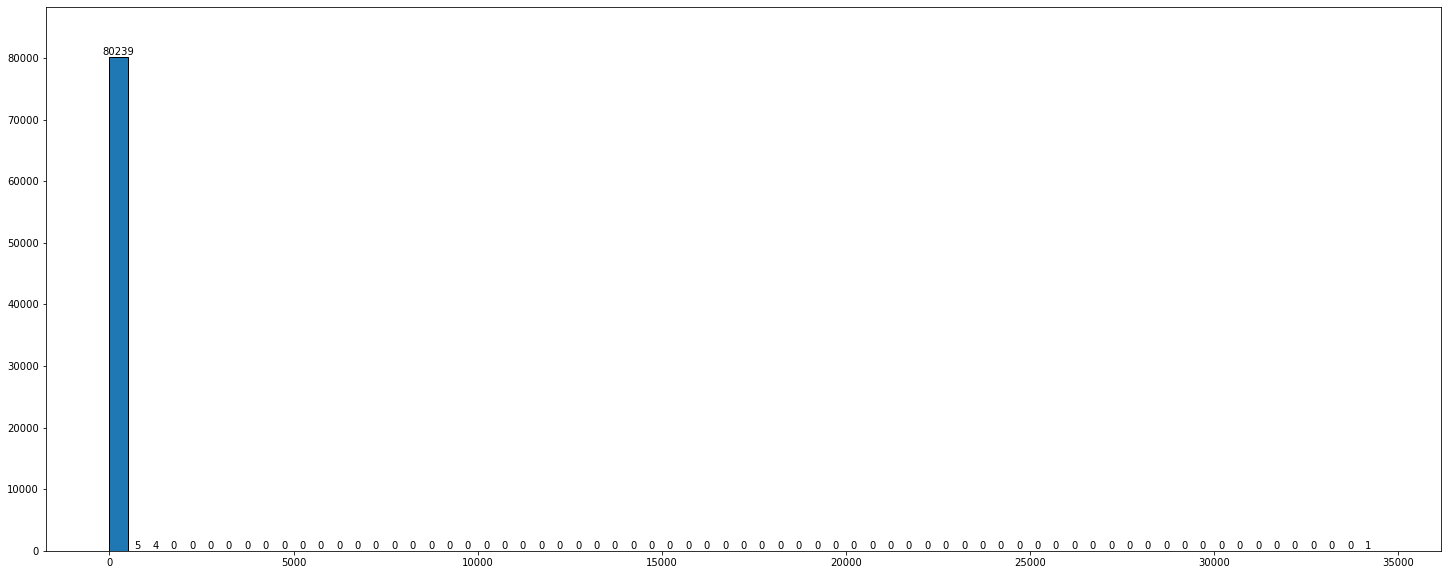

<Figure size 432x288 with 0 Axes>

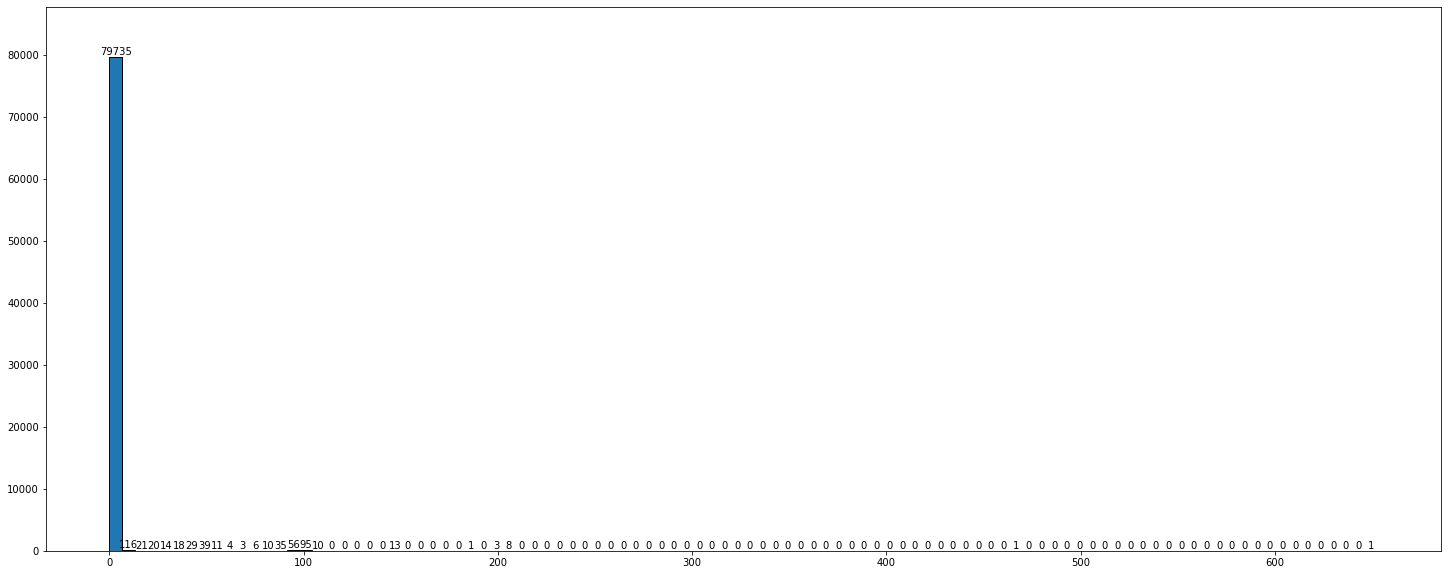

<Figure size 432x288 with 0 Axes>

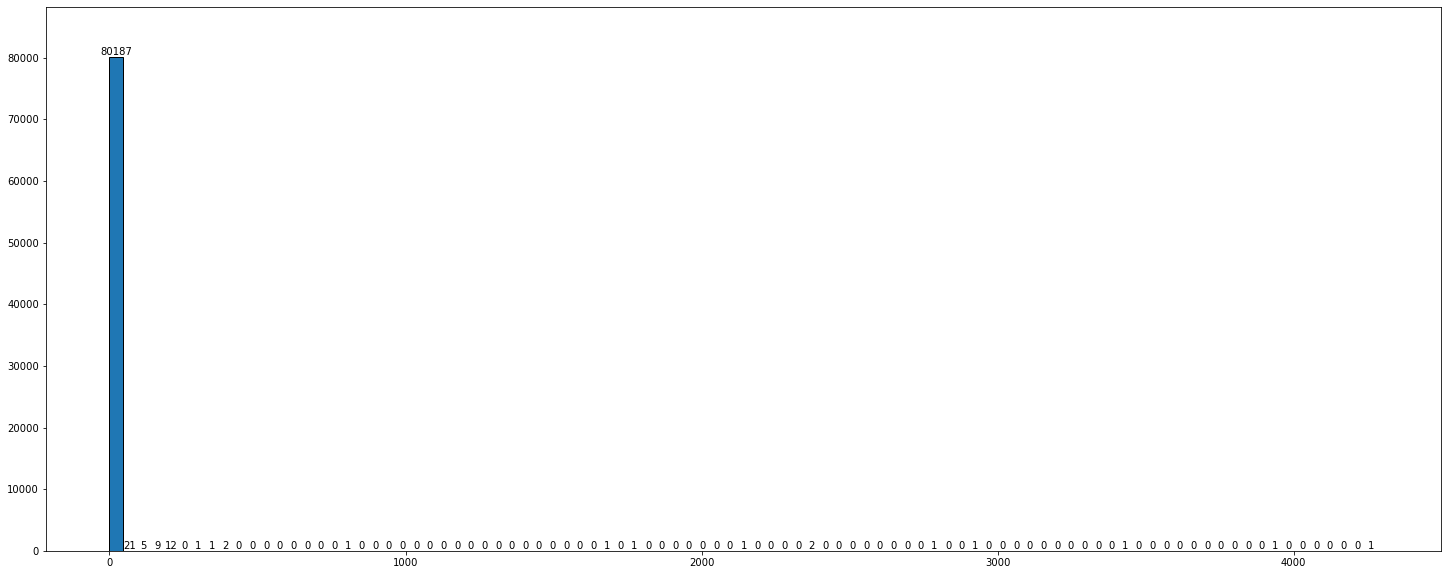

<Figure size 432x288 with 0 Axes>

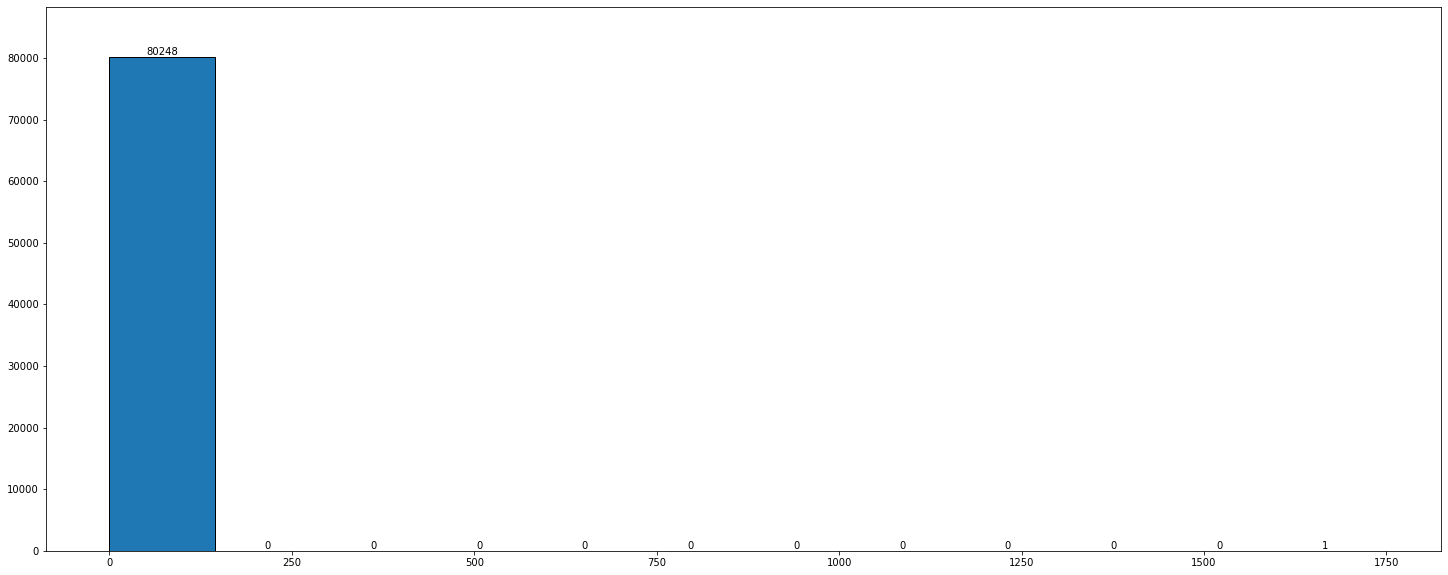

<Figure size 432x288 with 0 Axes>

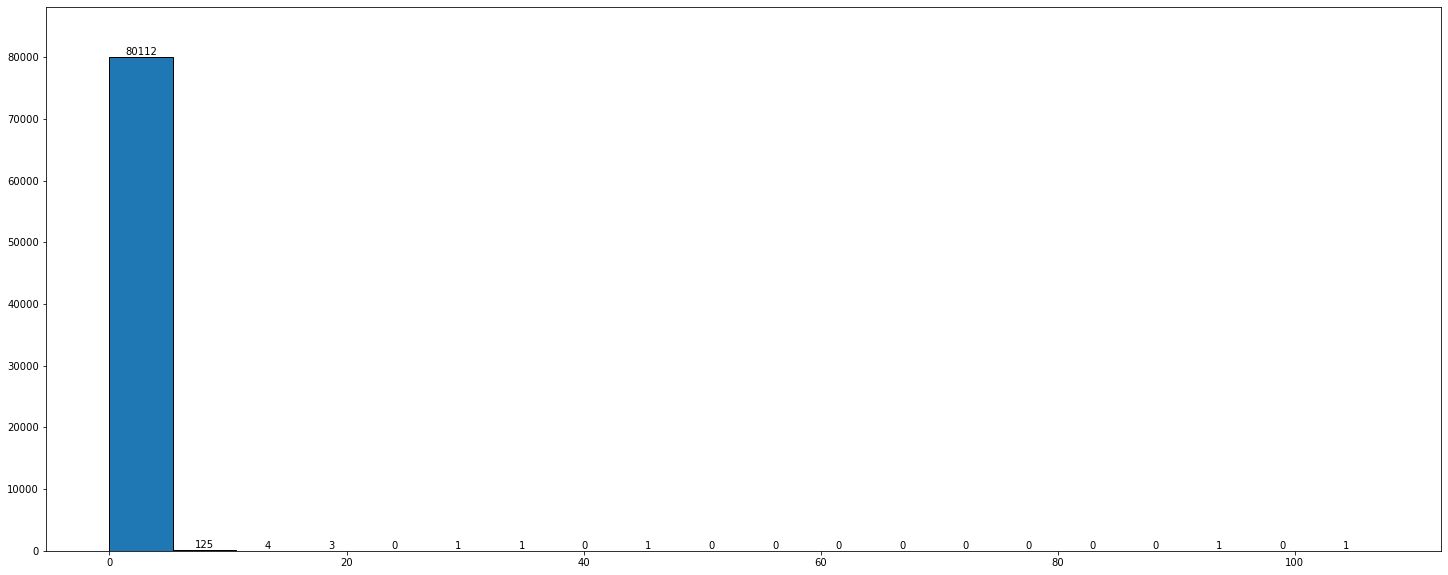

<Figure size 432x288 with 0 Axes>

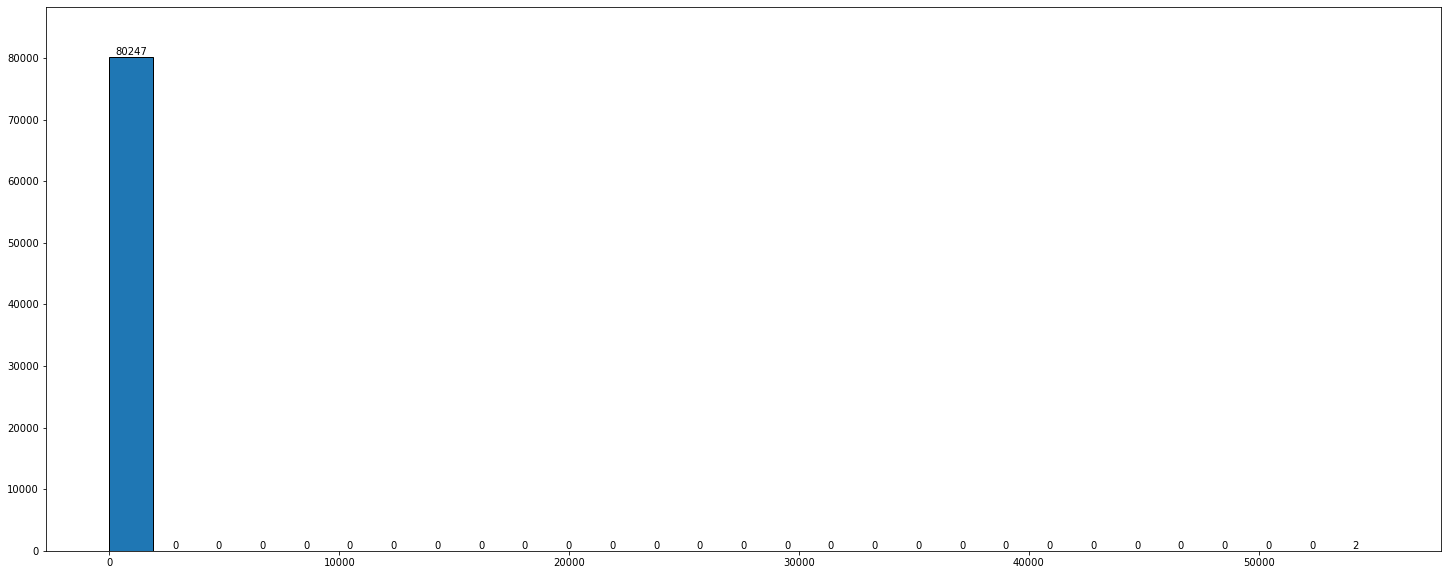

<Figure size 432x288 with 0 Axes>

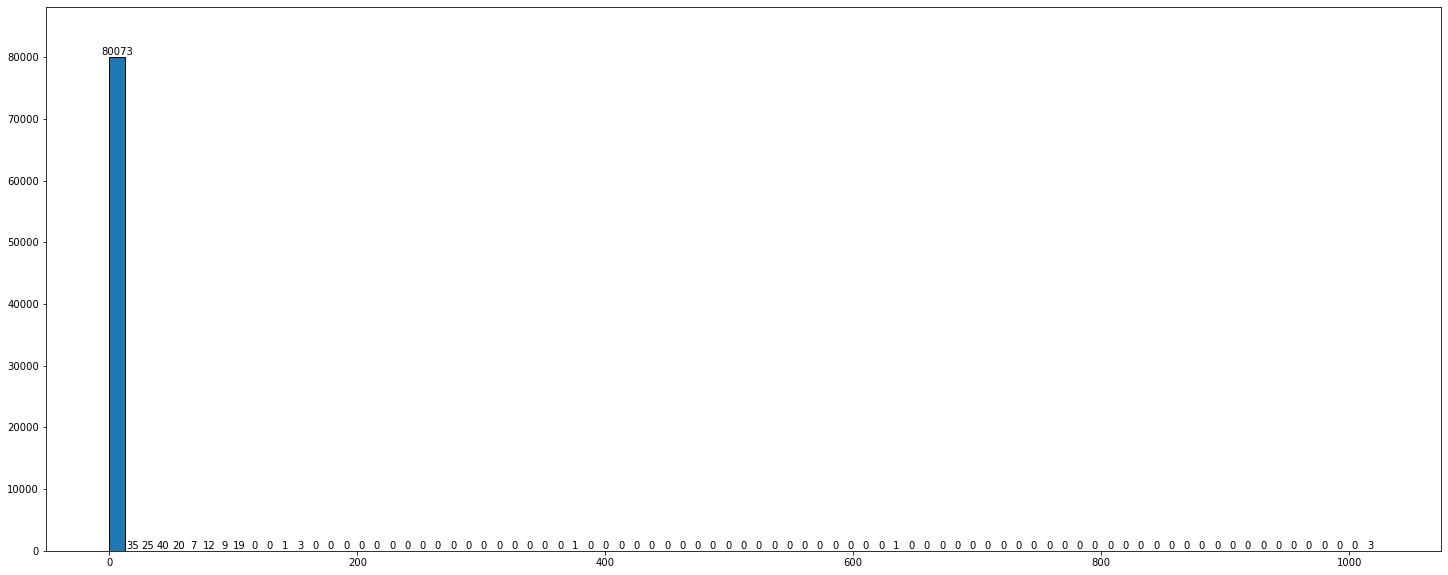

<Figure size 432x288 with 0 Axes>

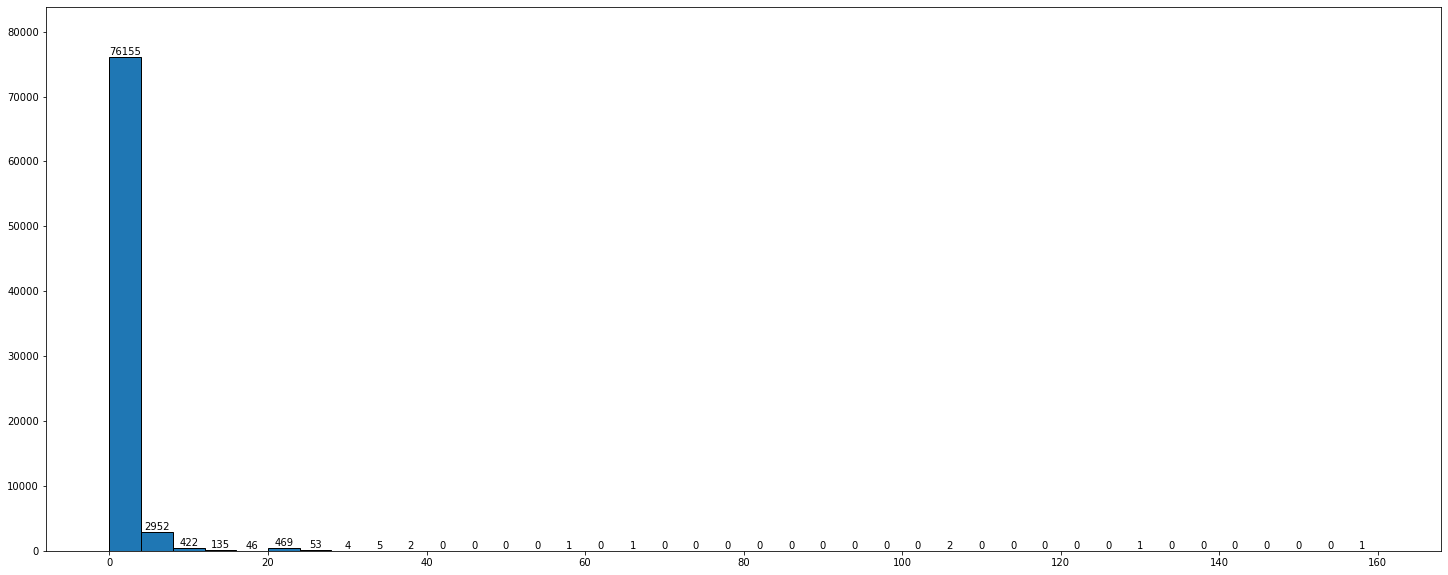

<Figure size 432x288 with 0 Axes>

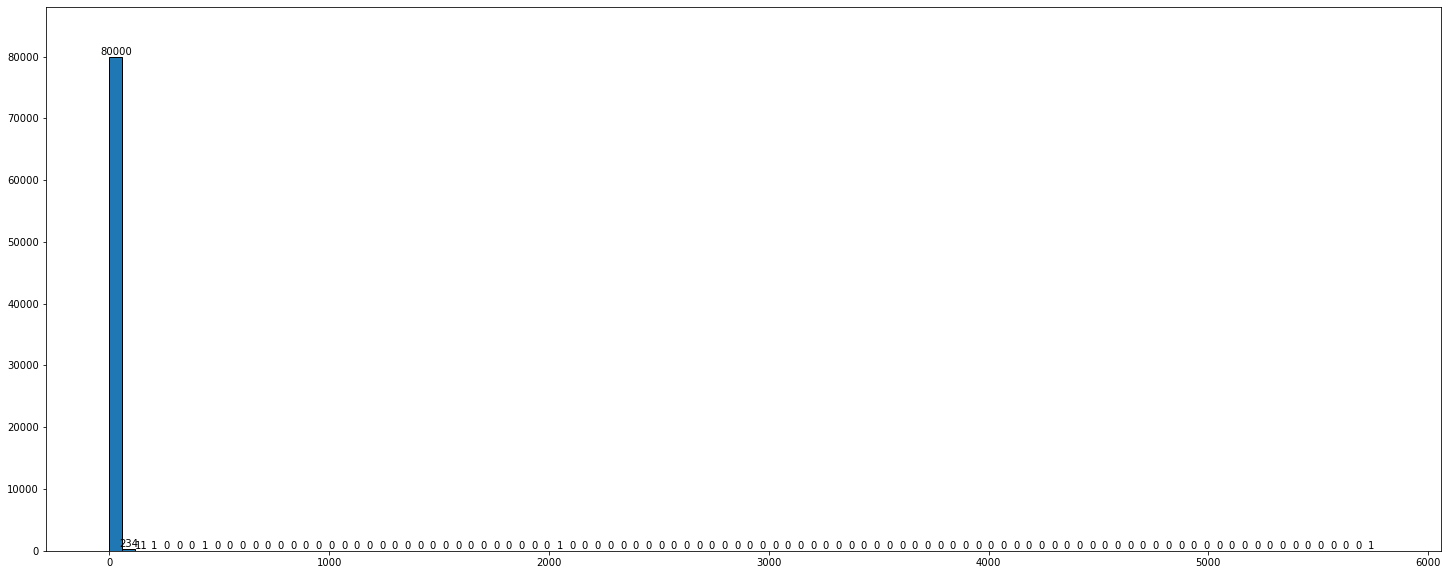

<Figure size 432x288 with 0 Axes>

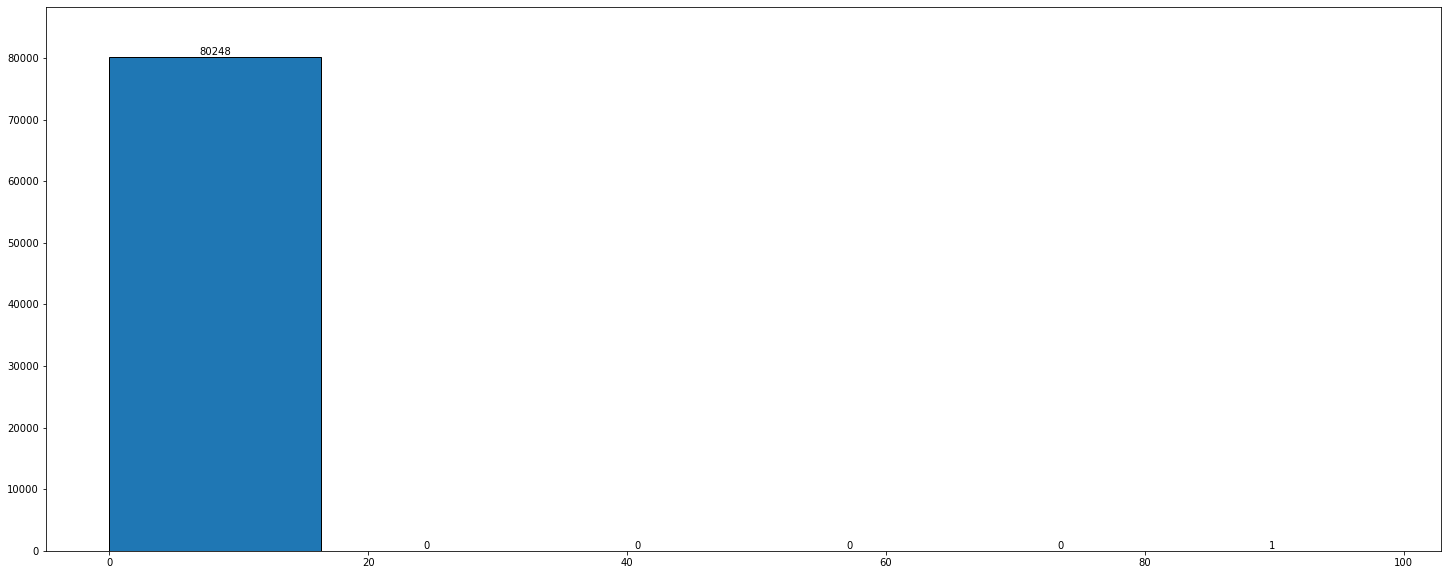

<Figure size 432x288 with 0 Axes>

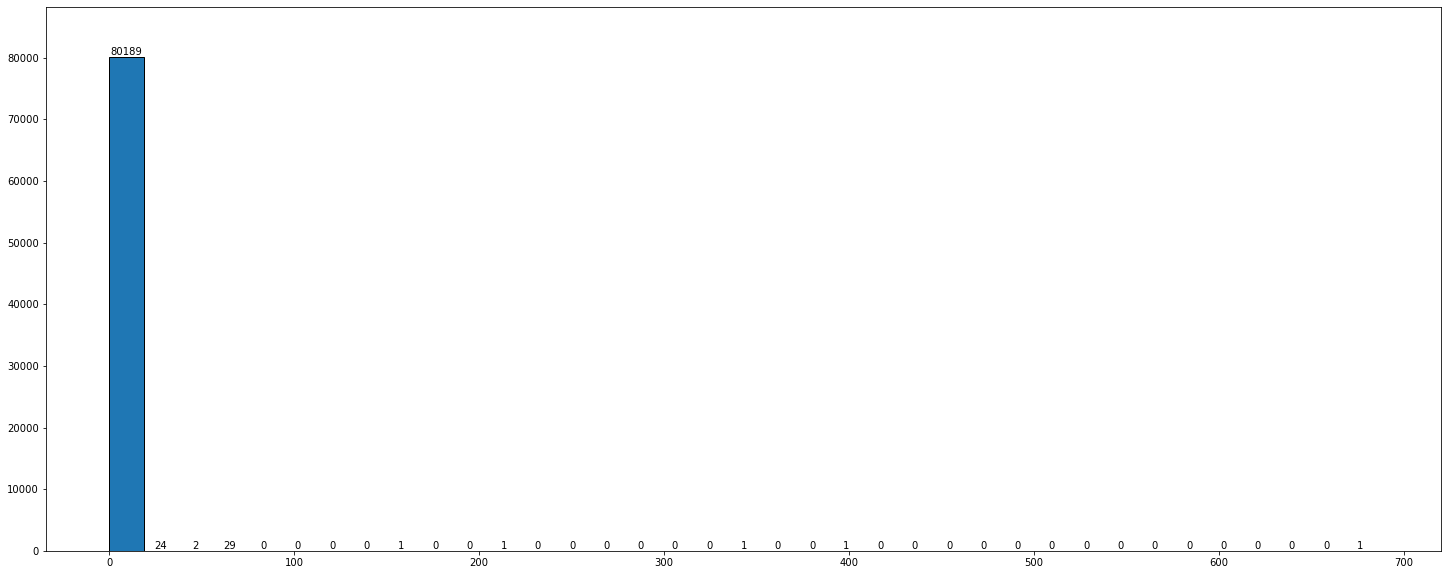

<Figure size 432x288 with 0 Axes>

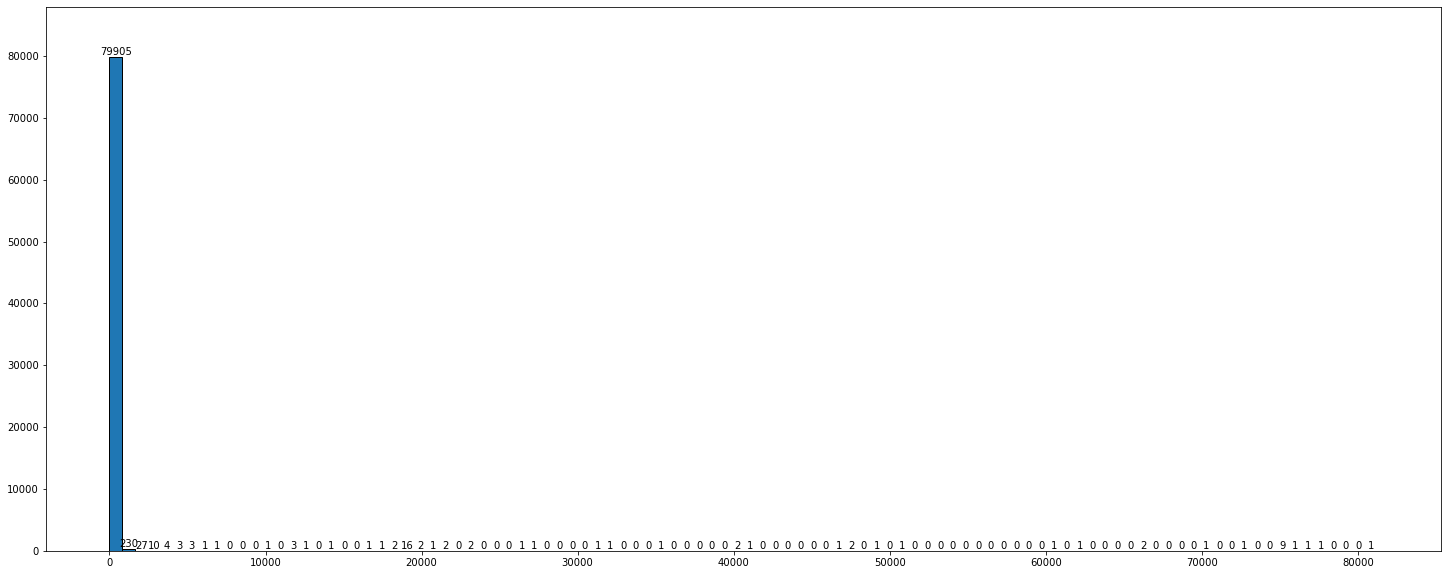

<Figure size 432x288 with 0 Axes>

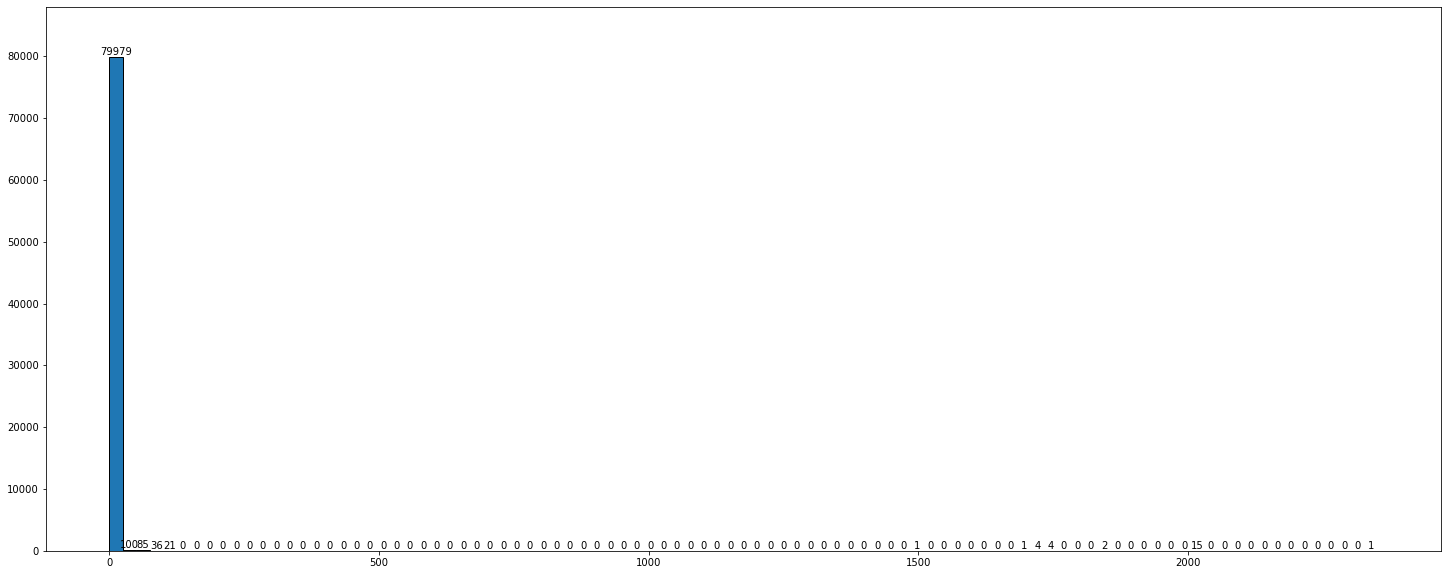

<Figure size 432x288 with 0 Axes>

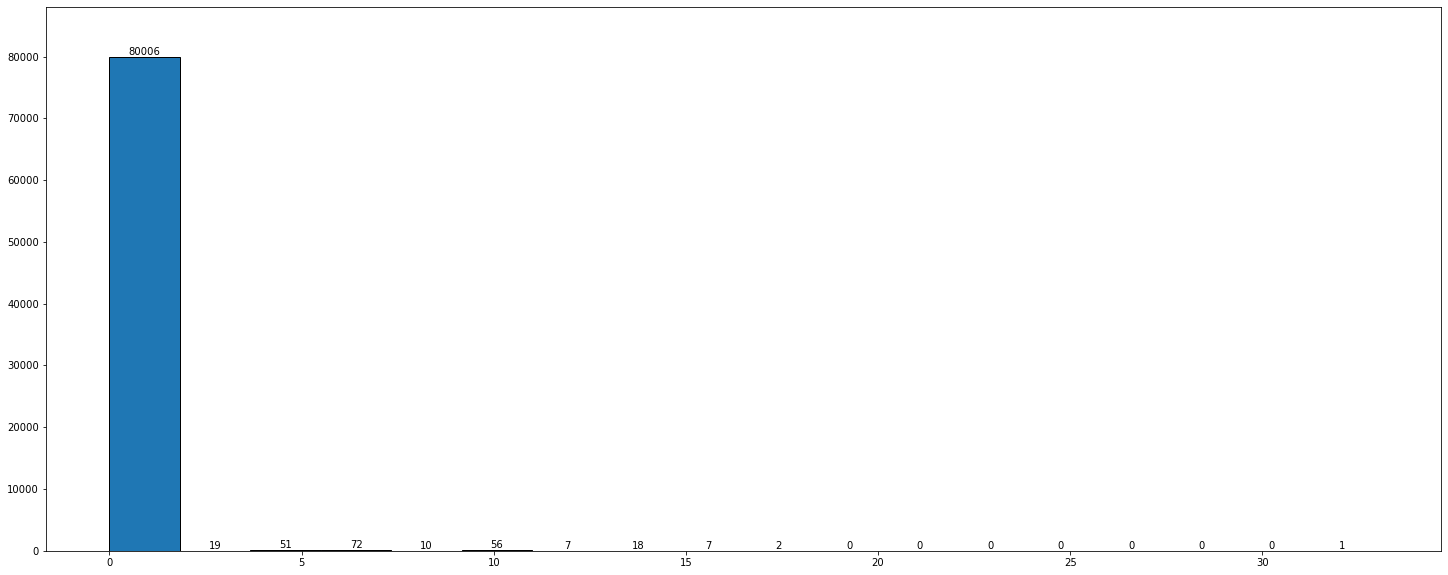

<Figure size 432x288 with 0 Axes>

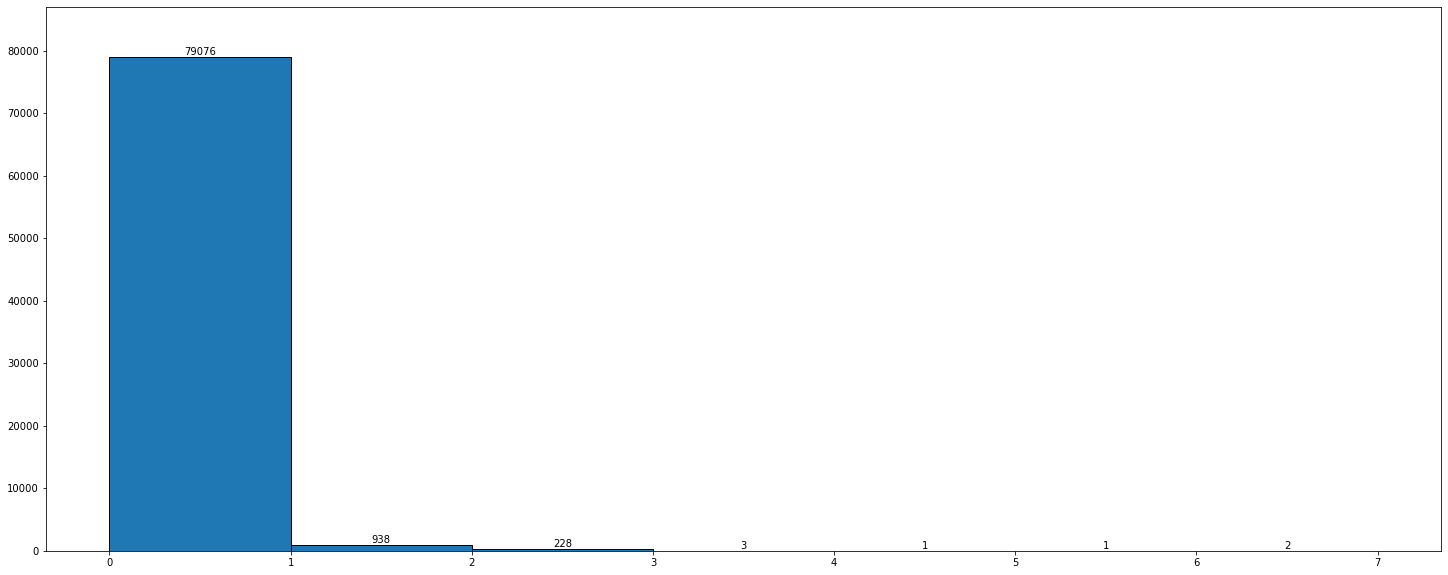

<Figure size 432x288 with 0 Axes>

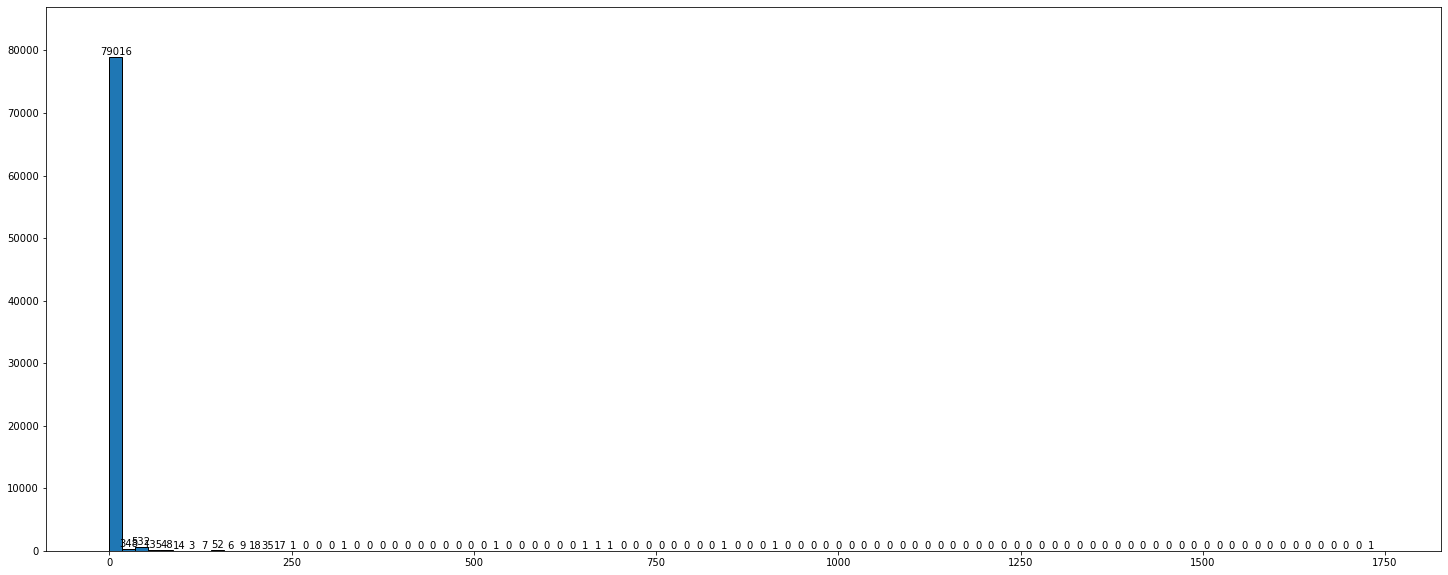

<Figure size 432x288 with 0 Axes>

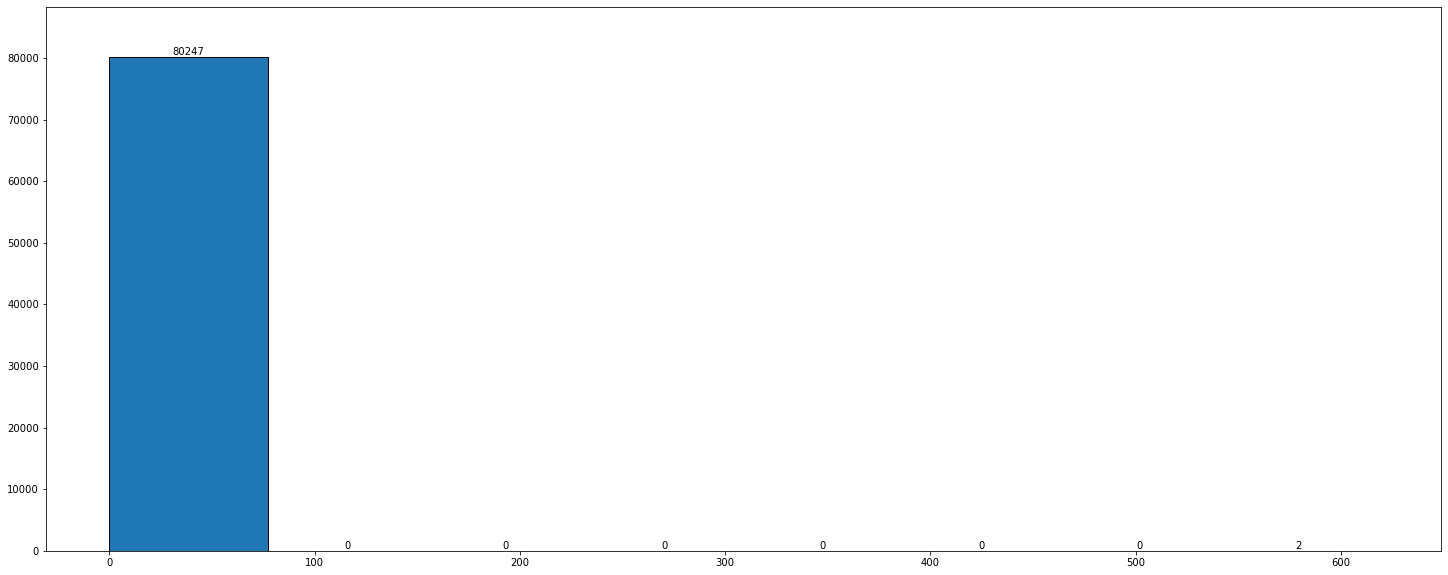

<Figure size 432x288 with 0 Axes>

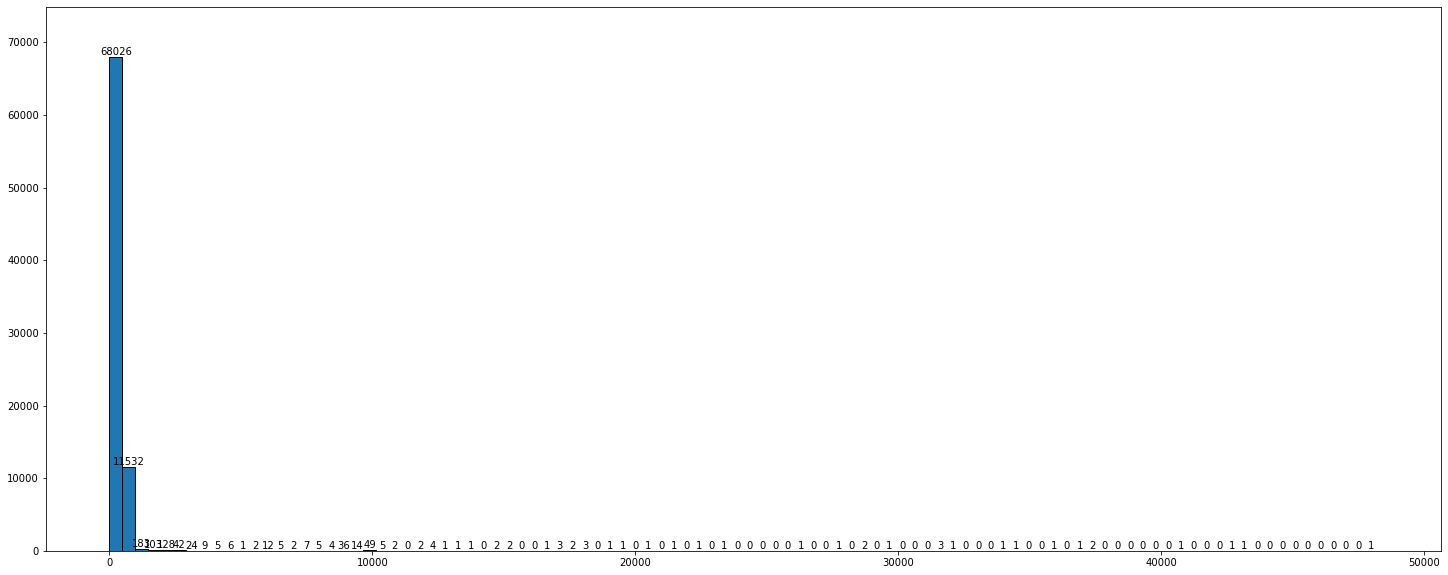

<Figure size 432x288 with 0 Axes>

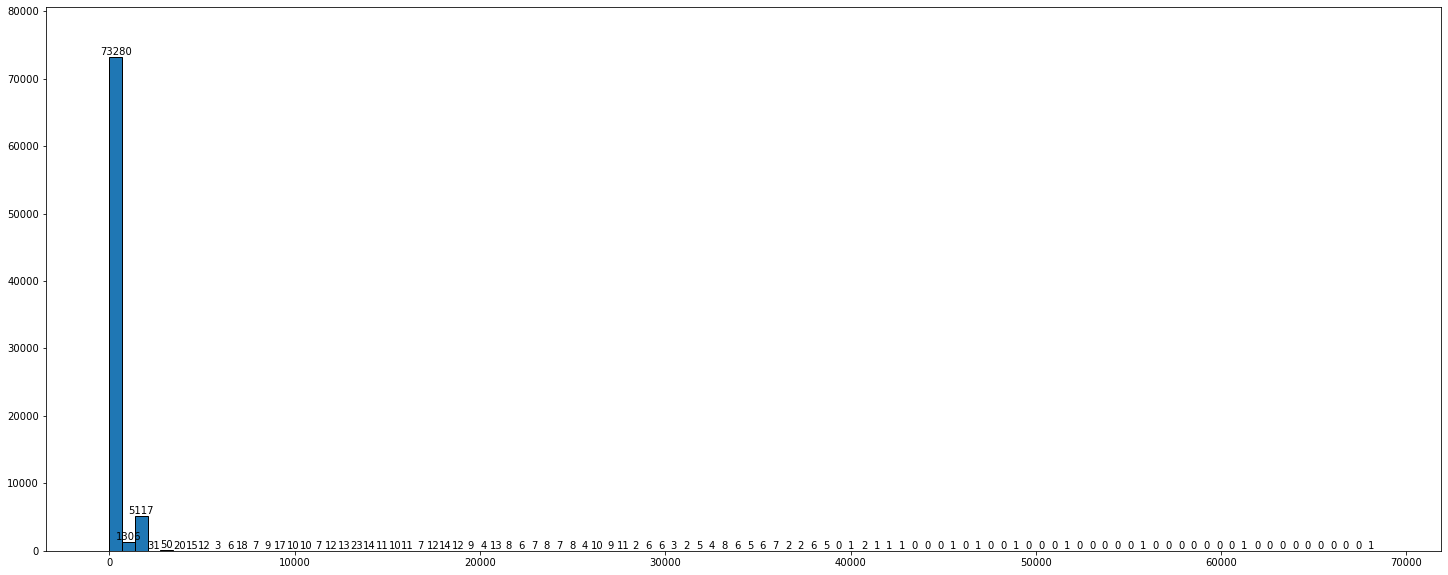

<Figure size 432x288 with 0 Axes>

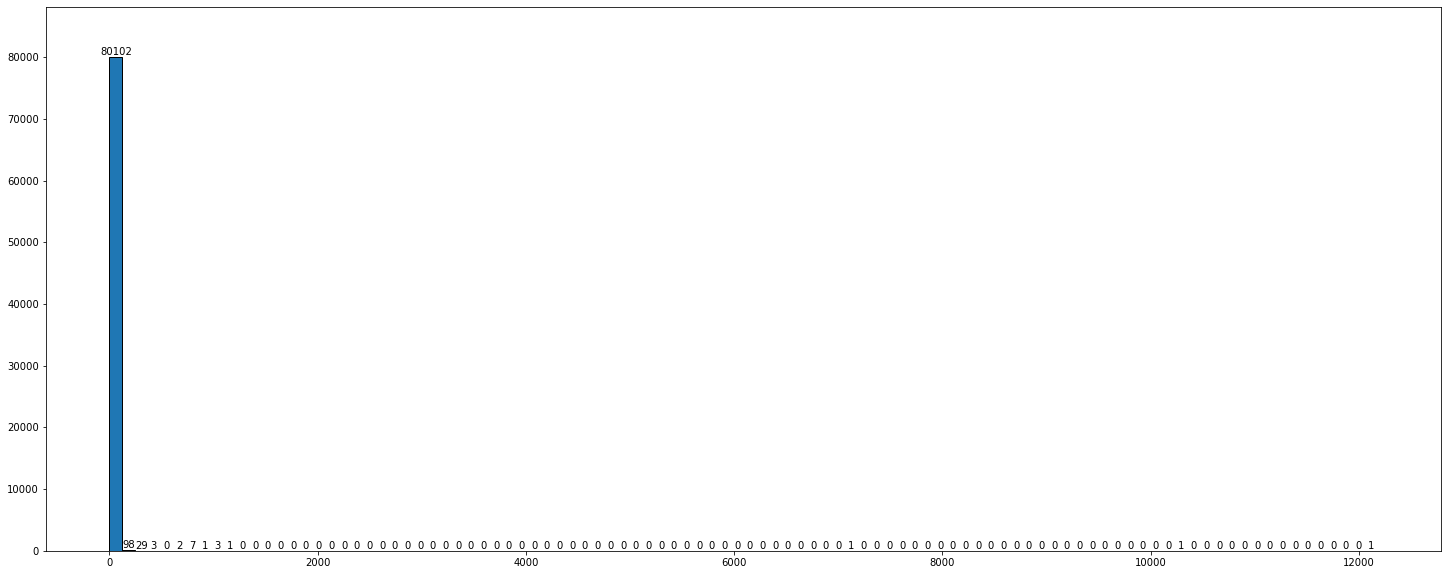

<Figure size 432x288 with 0 Axes>

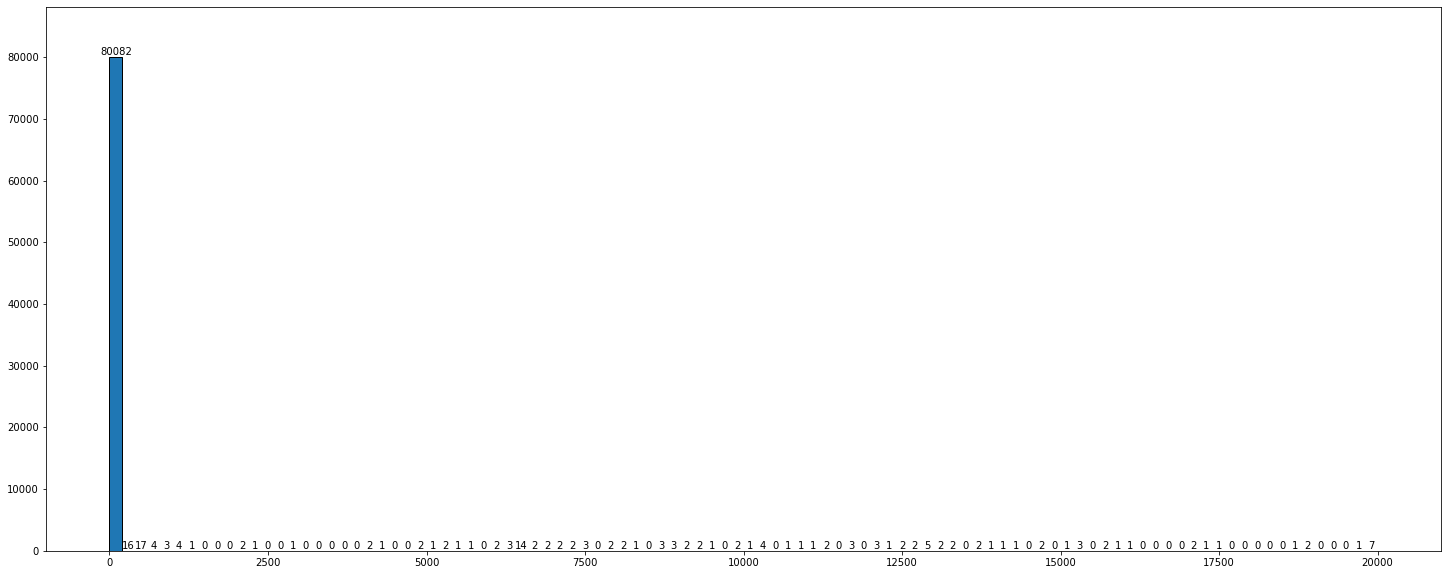

<Figure size 432x288 with 0 Axes>

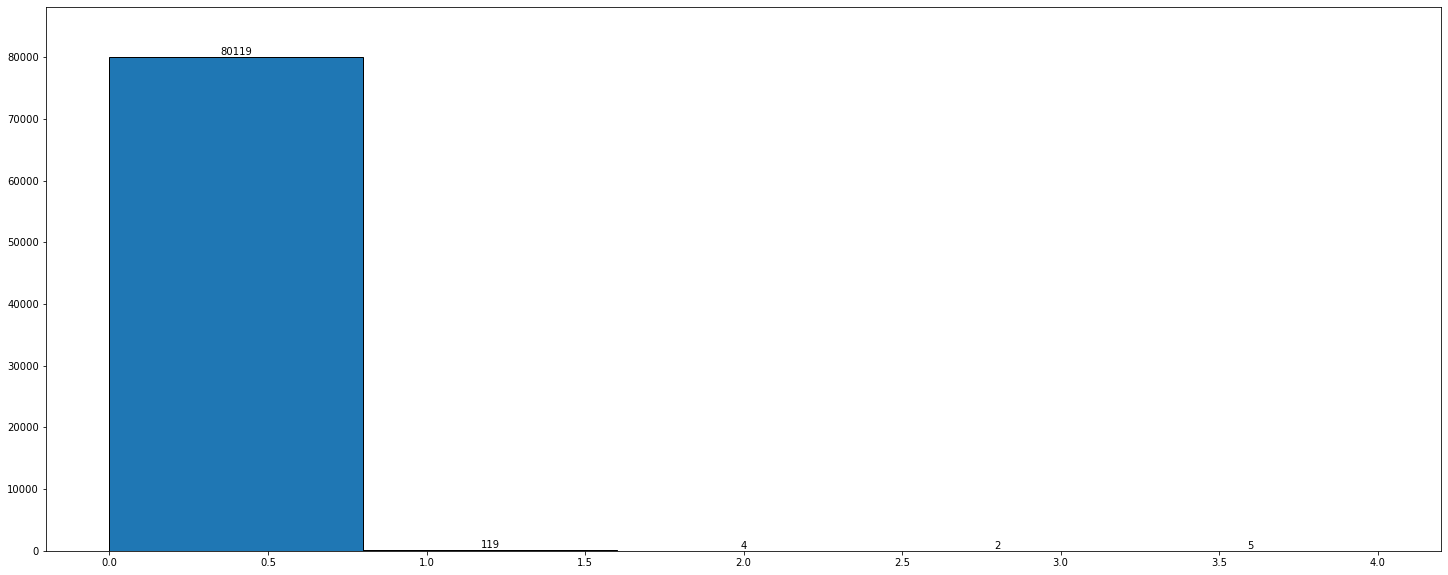

<Figure size 432x288 with 0 Axes>

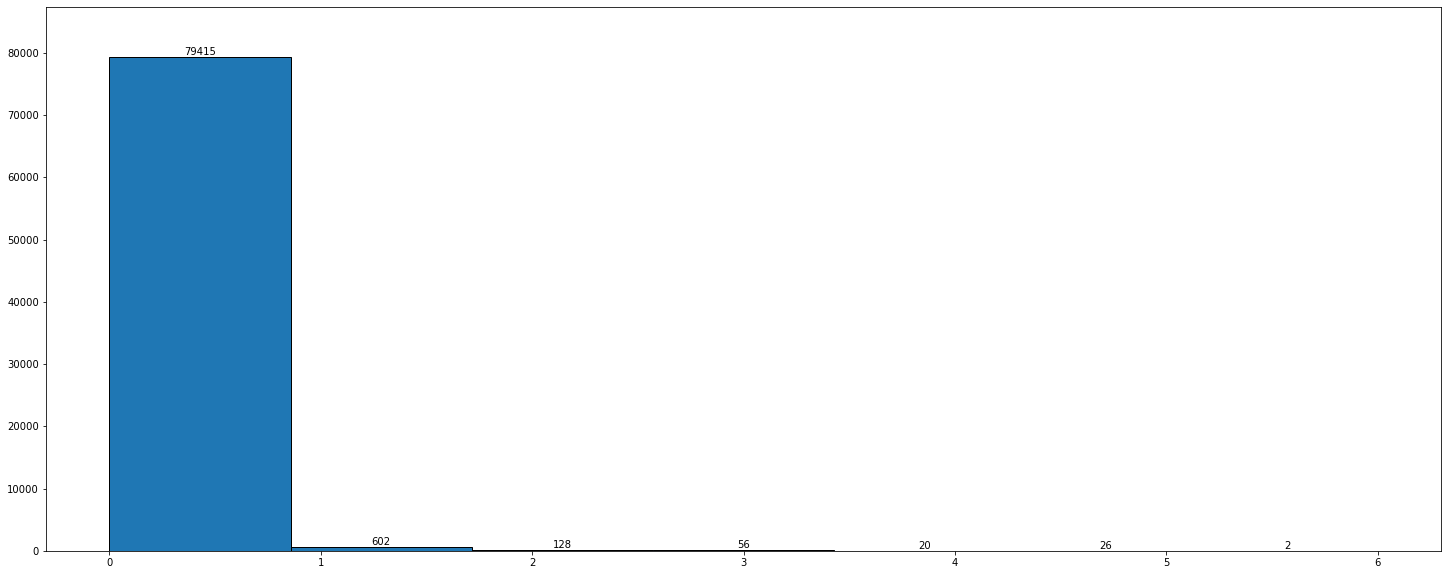

<Figure size 432x288 with 0 Axes>

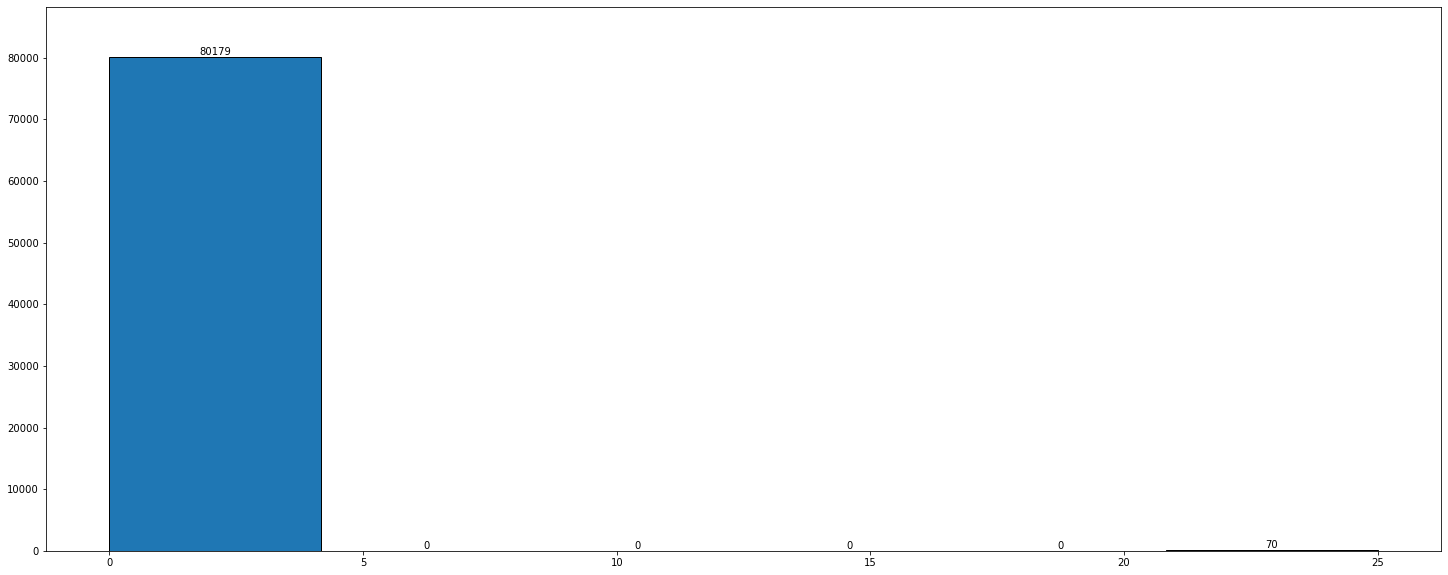

<Figure size 432x288 with 0 Axes>

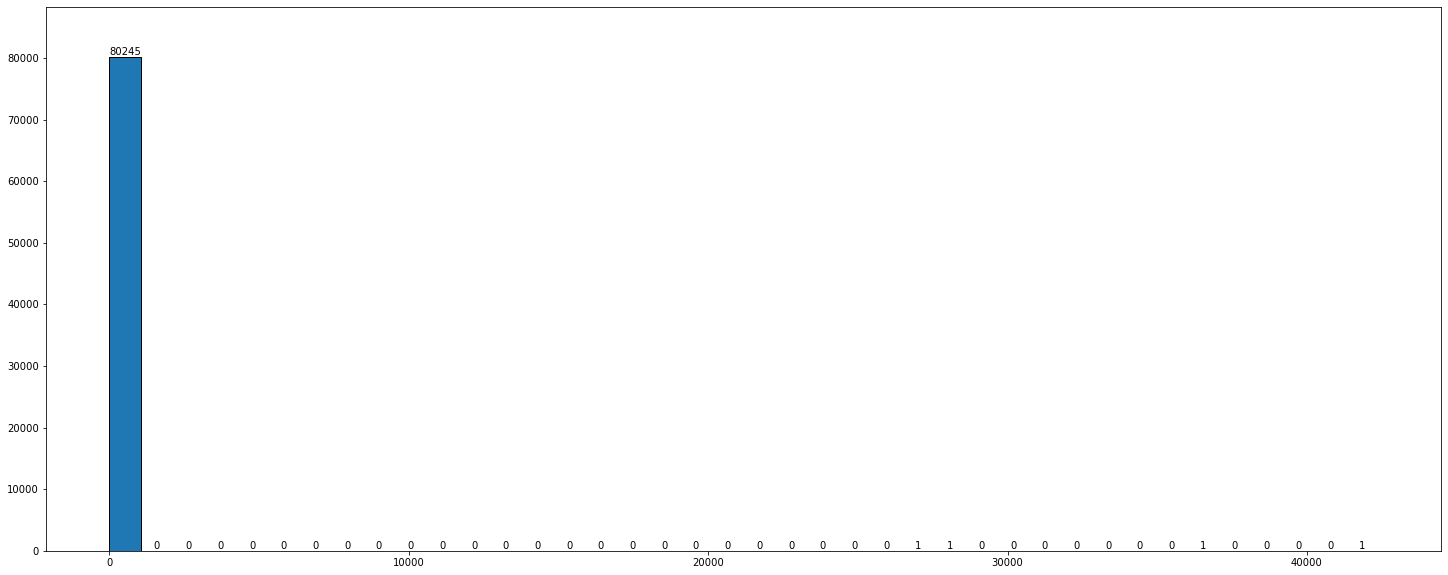

<Figure size 432x288 with 0 Axes>

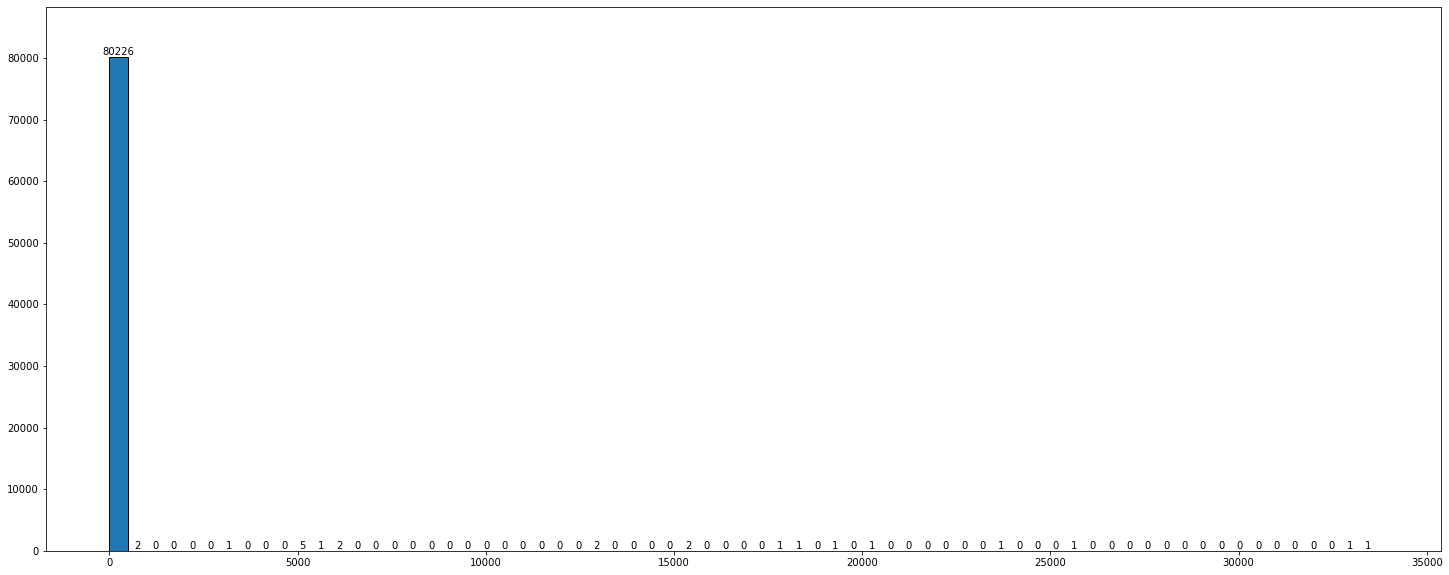

<Figure size 432x288 with 0 Axes>

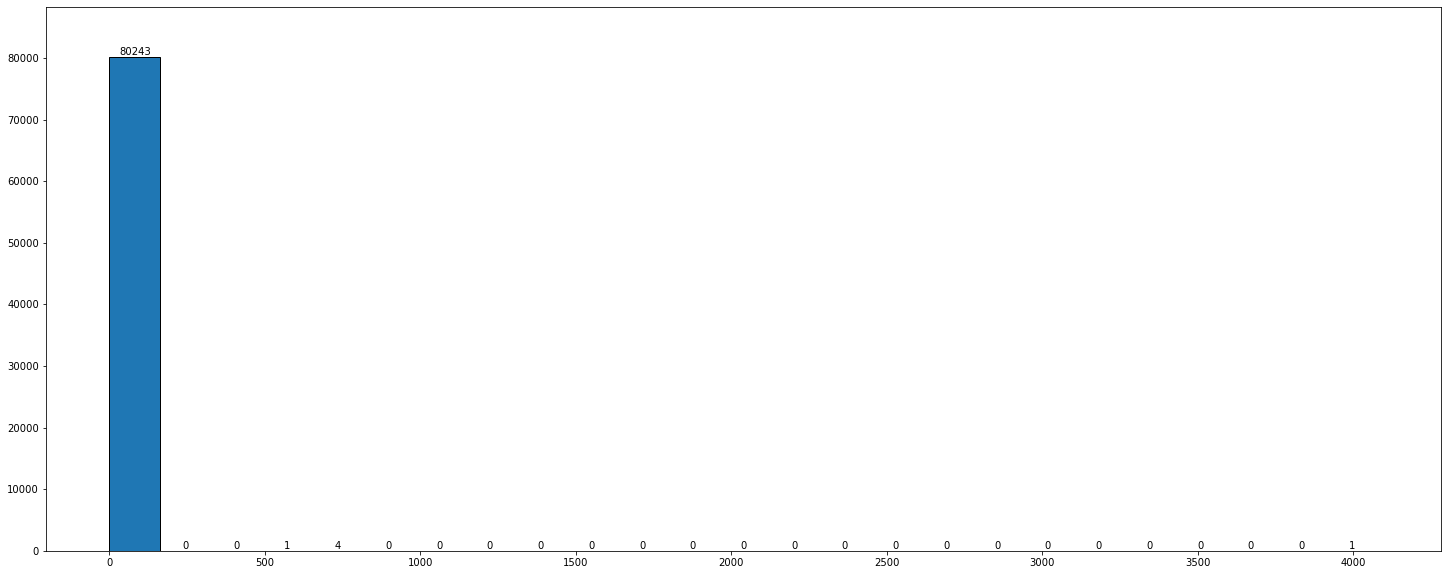

<Figure size 432x288 with 0 Axes>

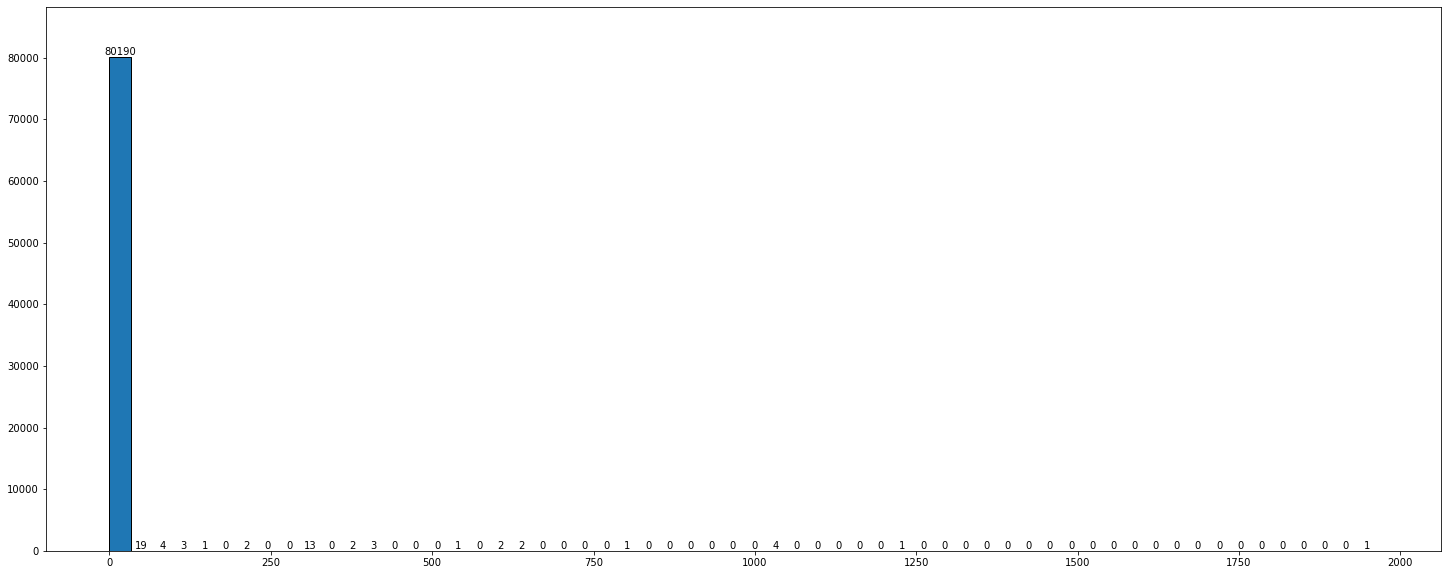

<Figure size 432x288 with 0 Axes>

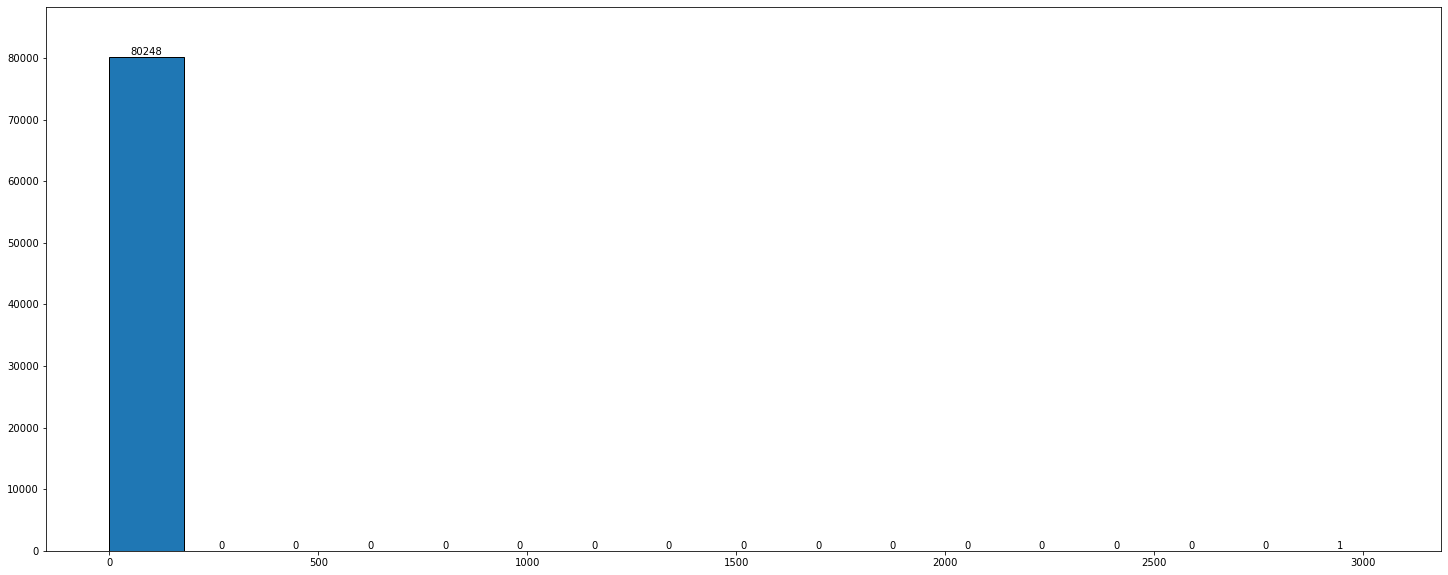

<Figure size 432x288 with 0 Axes>

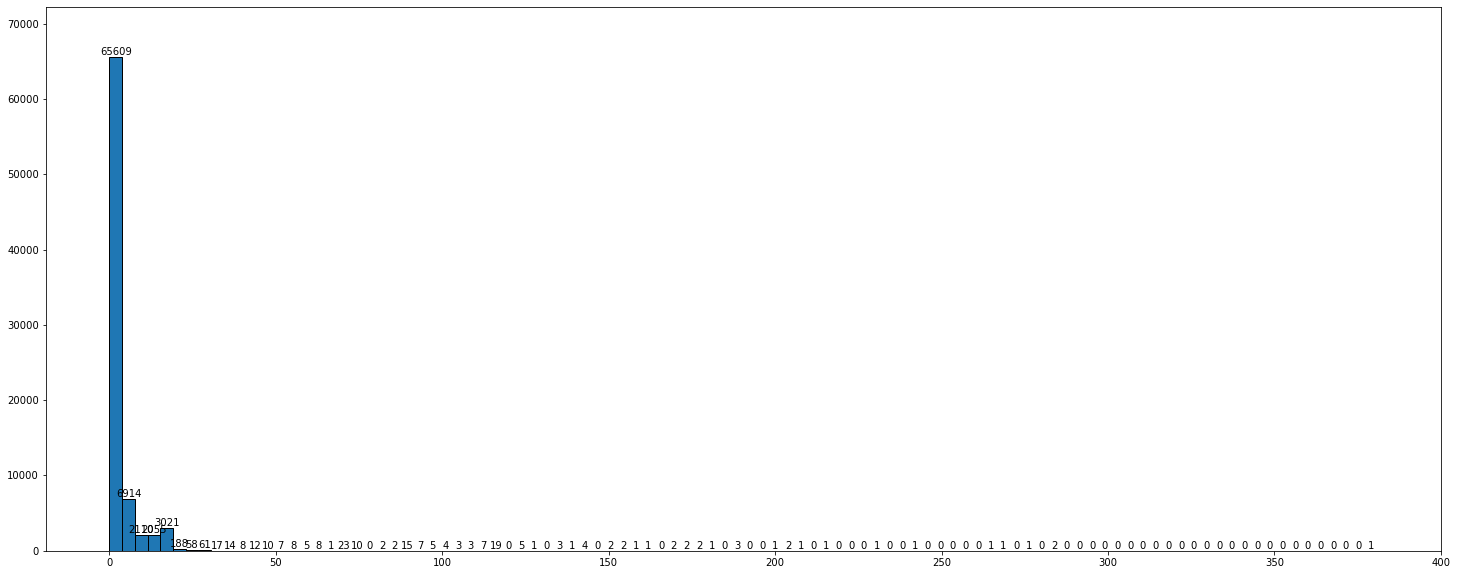

<Figure size 432x288 with 0 Axes>

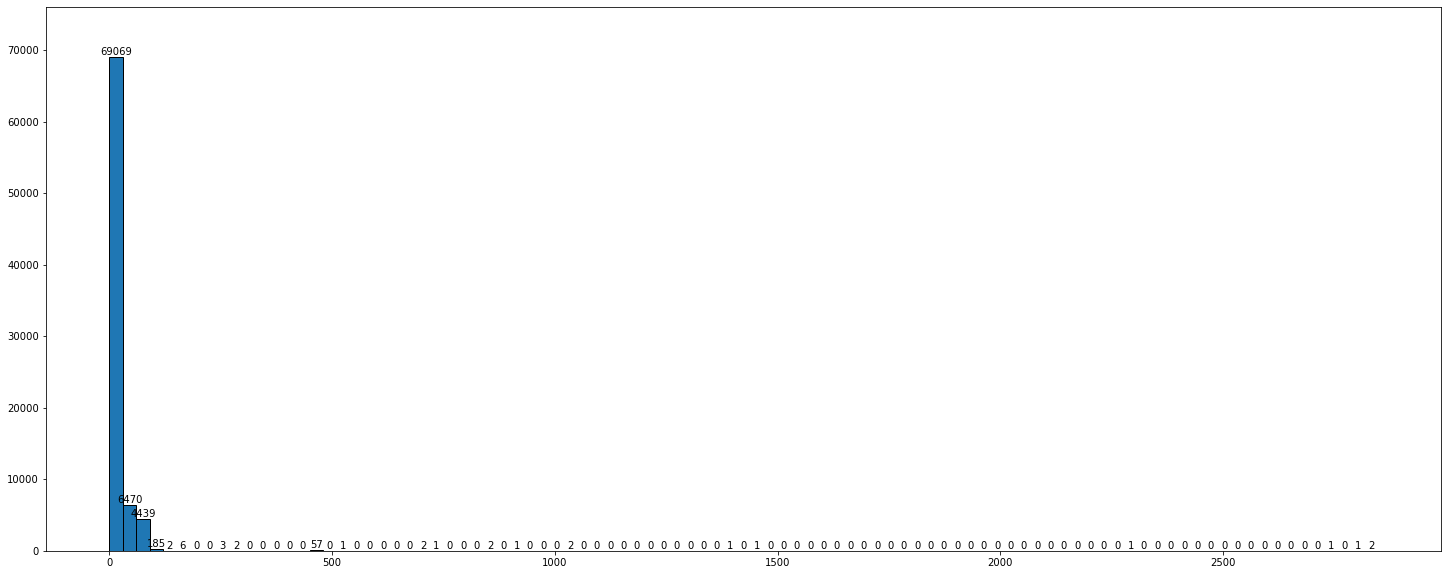

<Figure size 432x288 with 0 Axes>

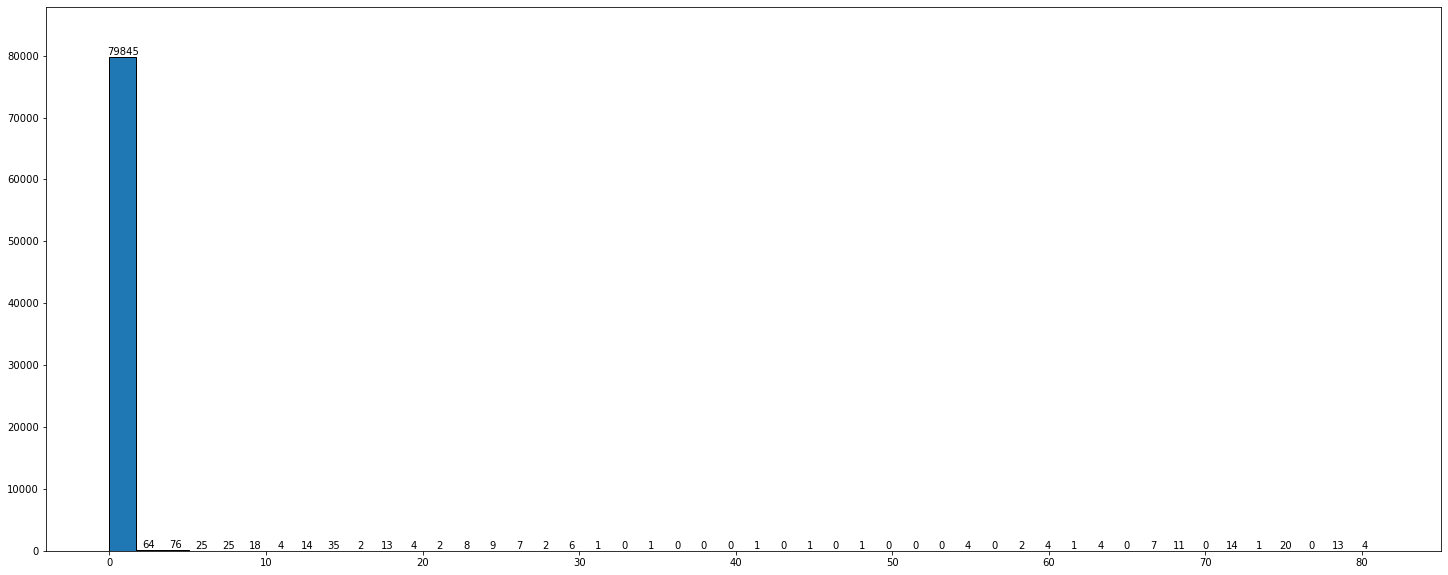

<Figure size 432x288 with 0 Axes>

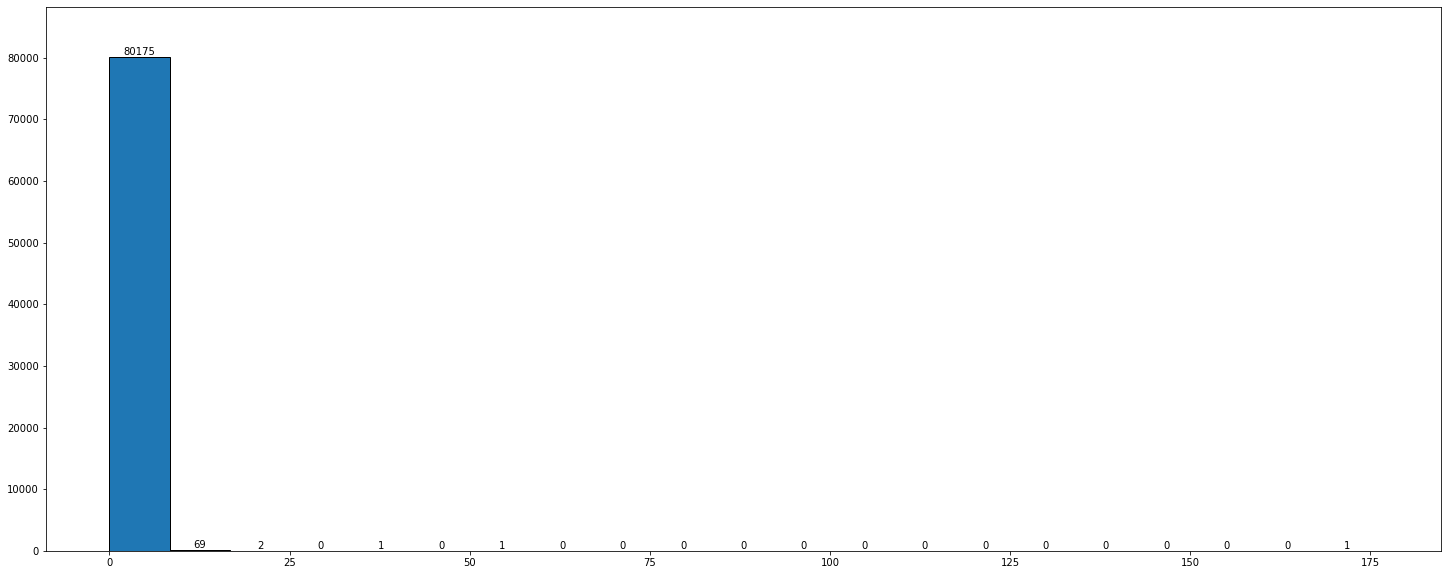

<Figure size 432x288 with 0 Axes>

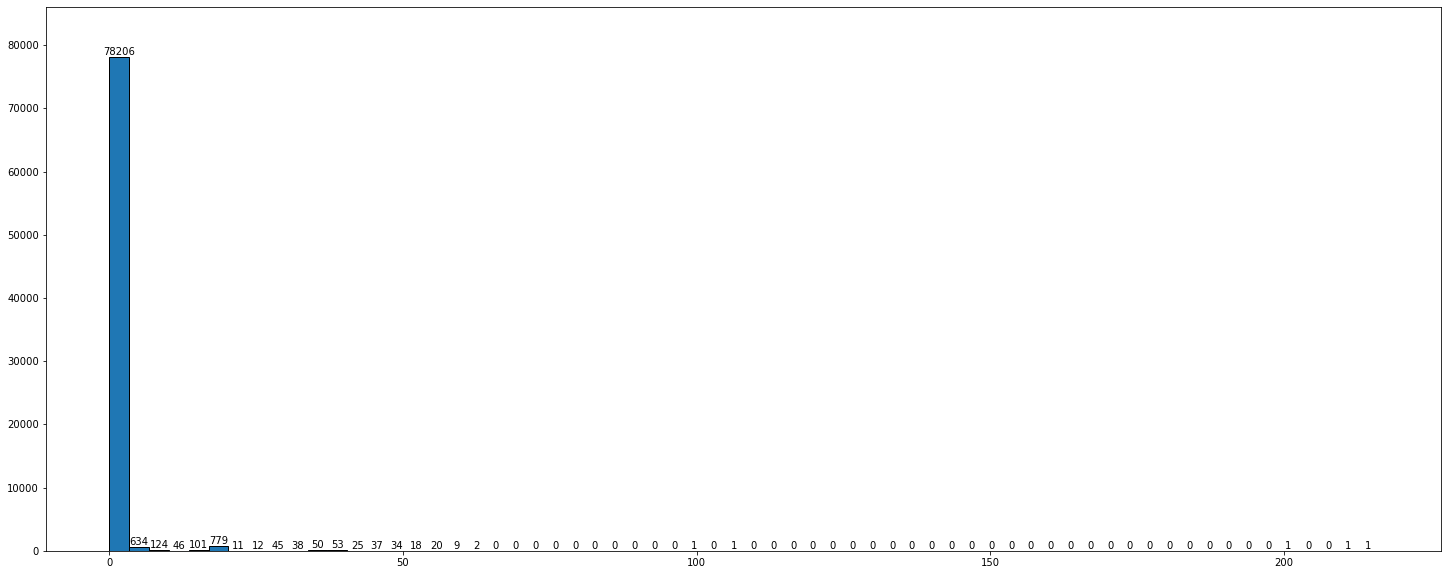

<Figure size 432x288 with 0 Axes>

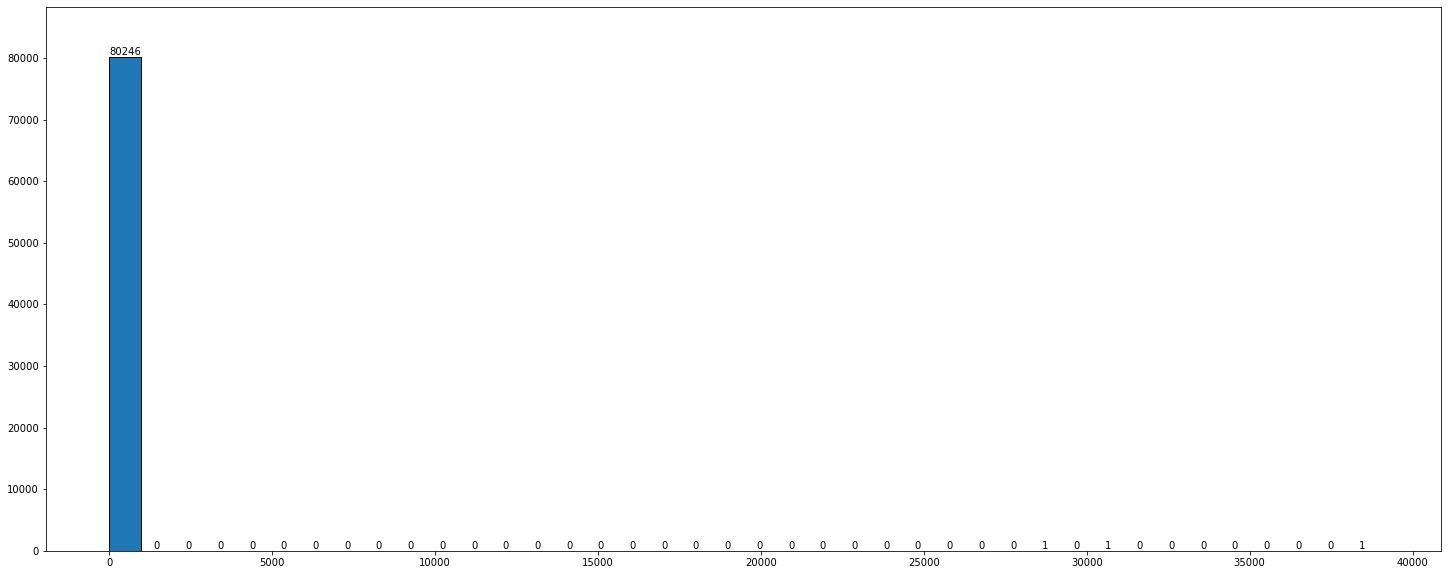

<Figure size 432x288 with 0 Axes>

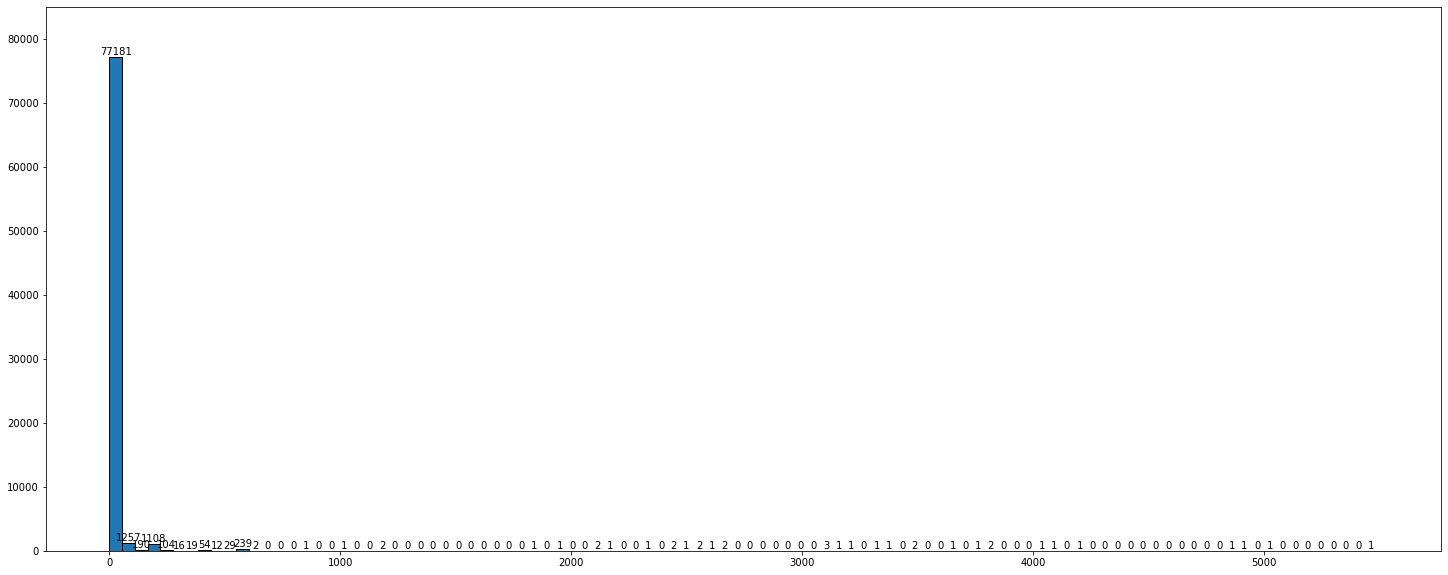

<Figure size 432x288 with 0 Axes>

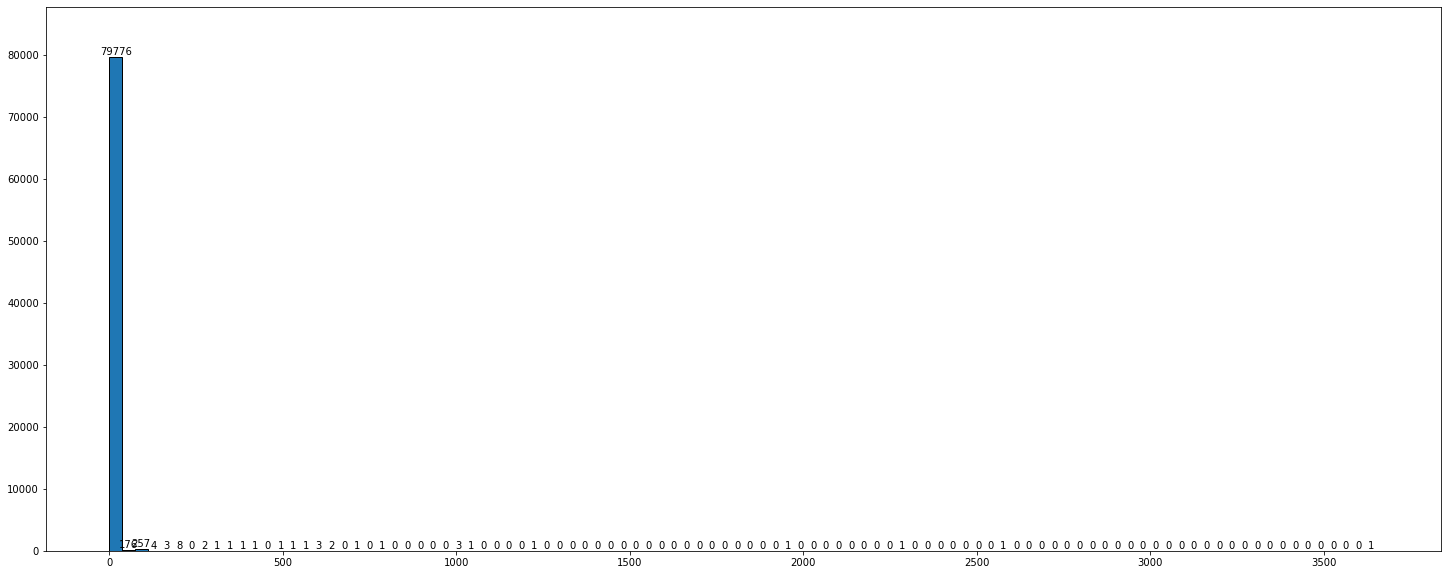

<Figure size 432x288 with 0 Axes>

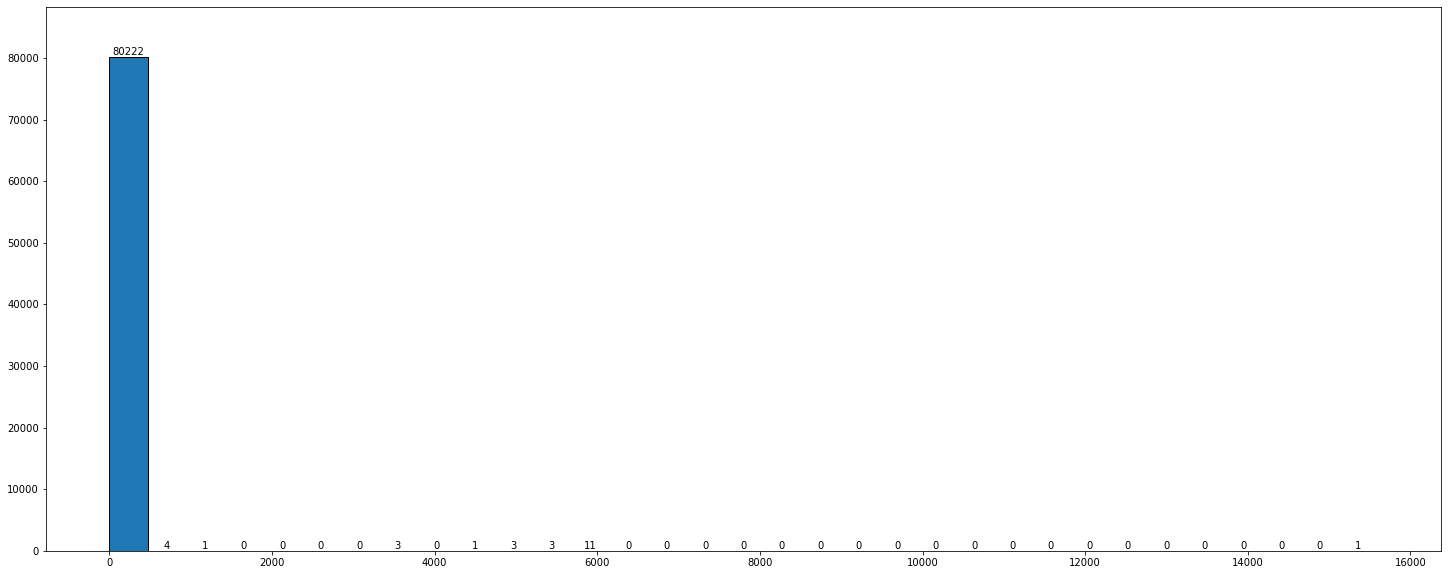

<Figure size 432x288 with 0 Axes>

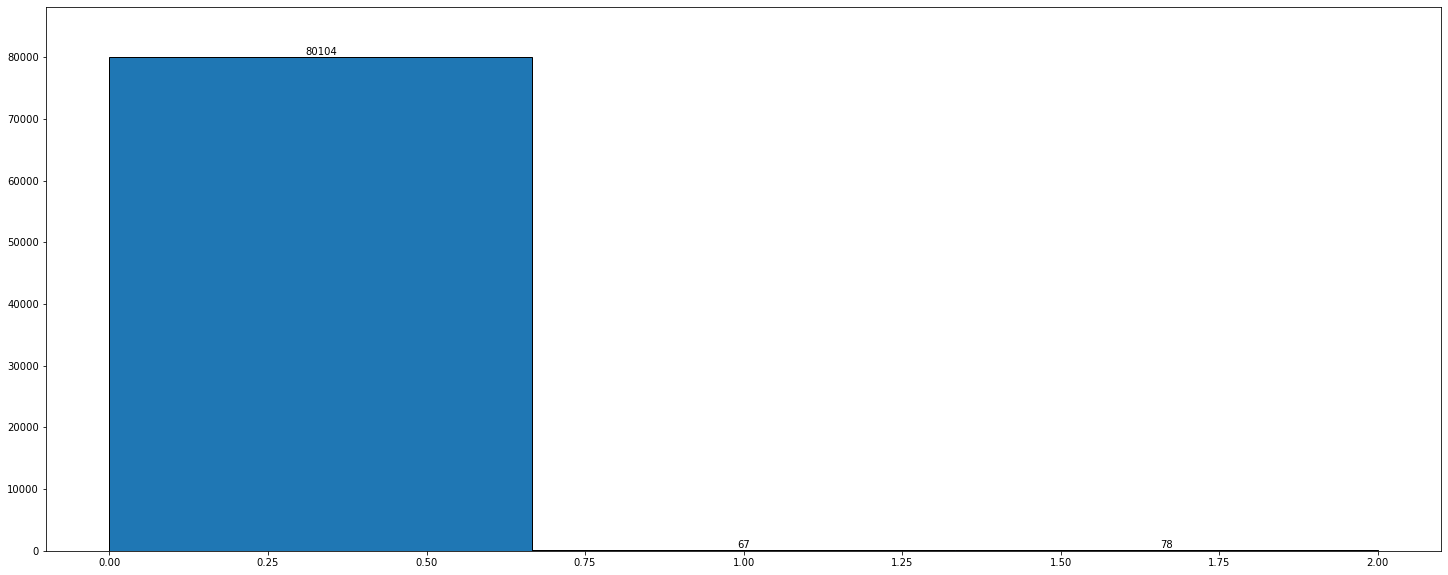

<Figure size 432x288 with 0 Axes>

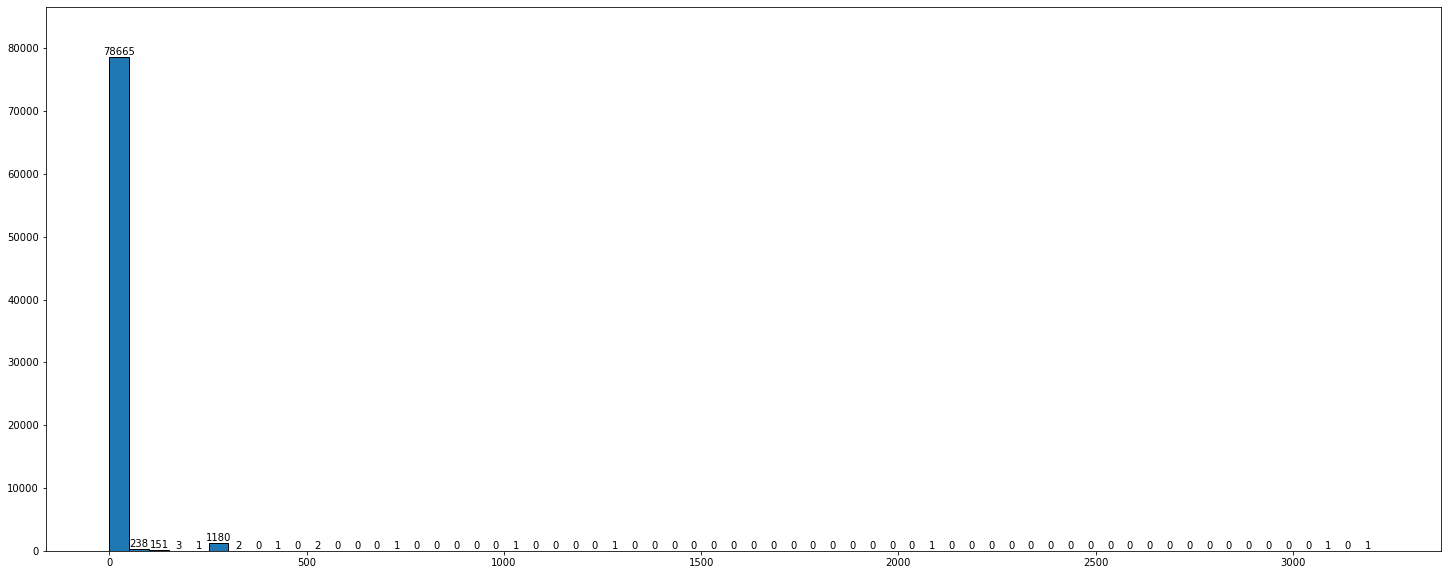

<Figure size 432x288 with 0 Axes>

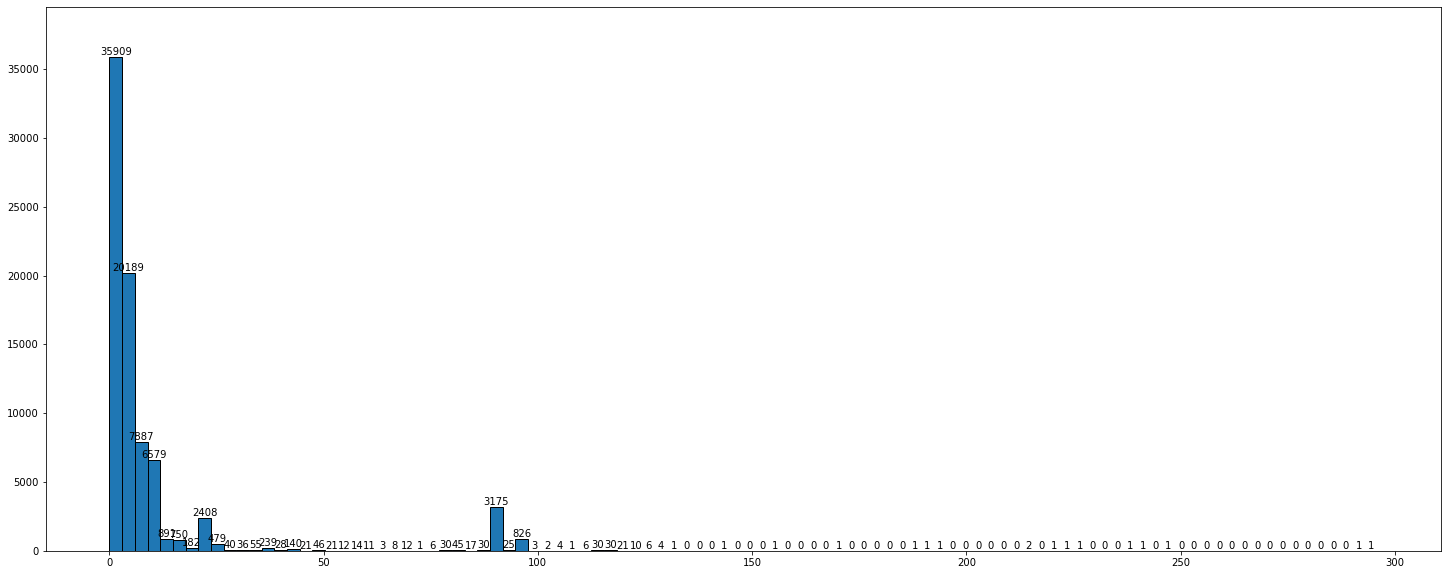

<Figure size 432x288 with 0 Axes>

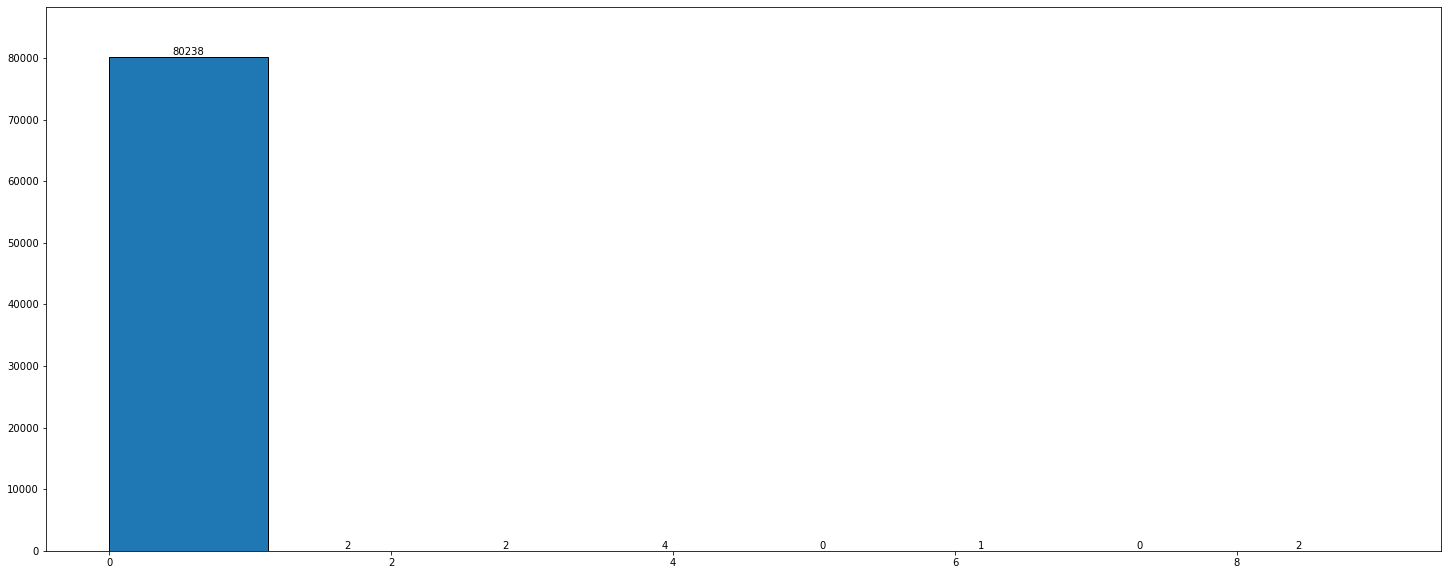

<Figure size 432x288 with 0 Axes>

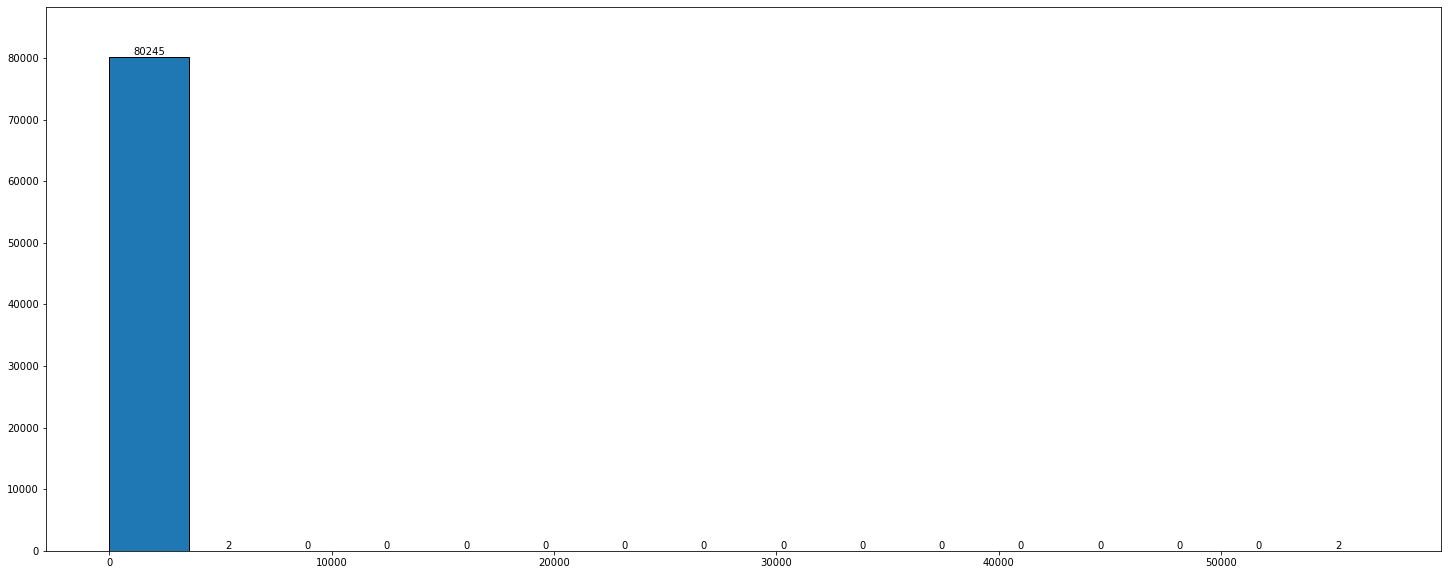

<Figure size 432x288 with 0 Axes>

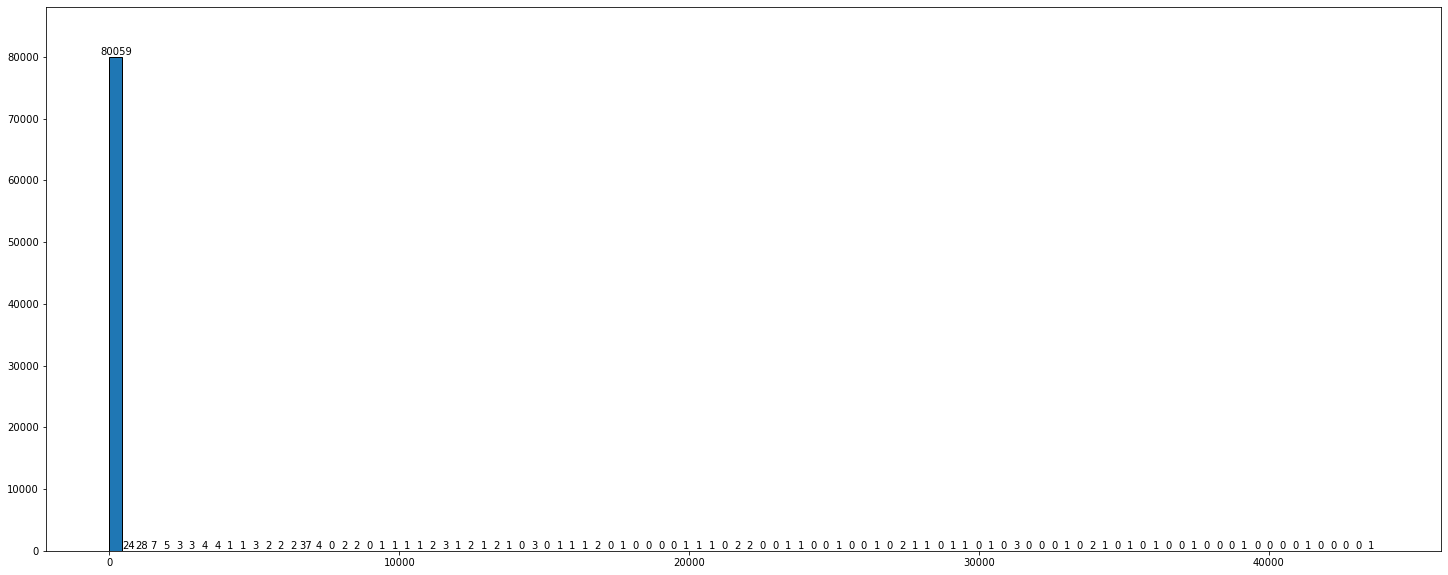

<Figure size 432x288 with 0 Axes>

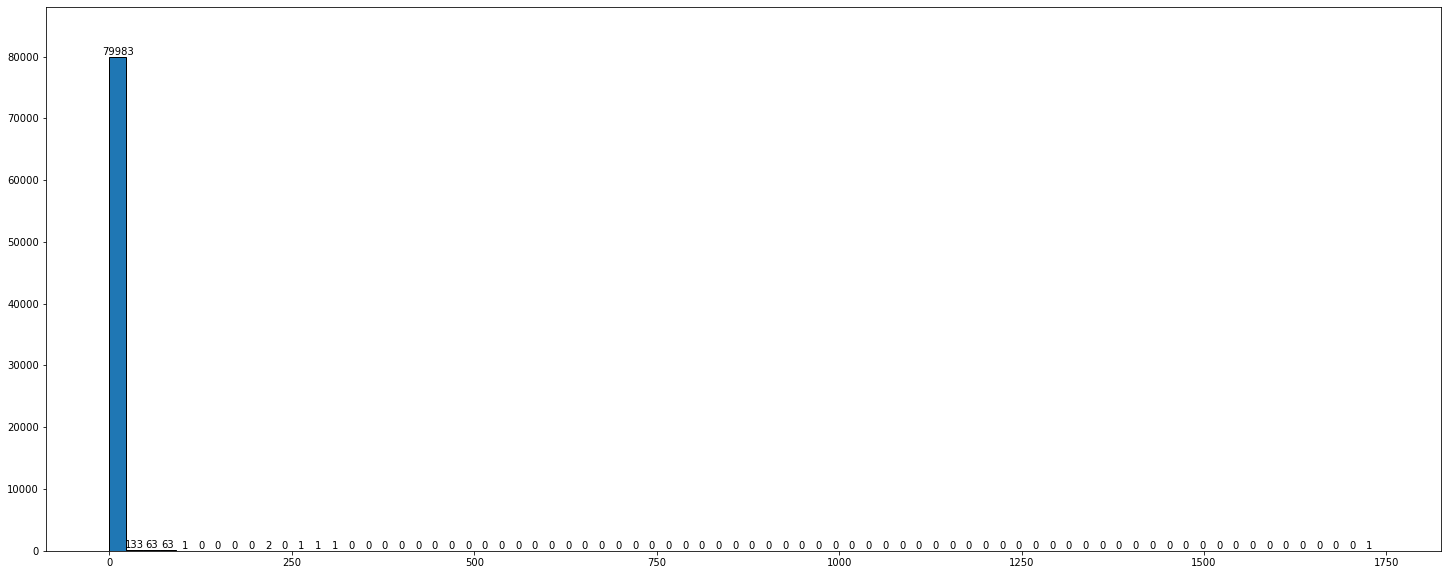

<Figure size 432x288 with 0 Axes>

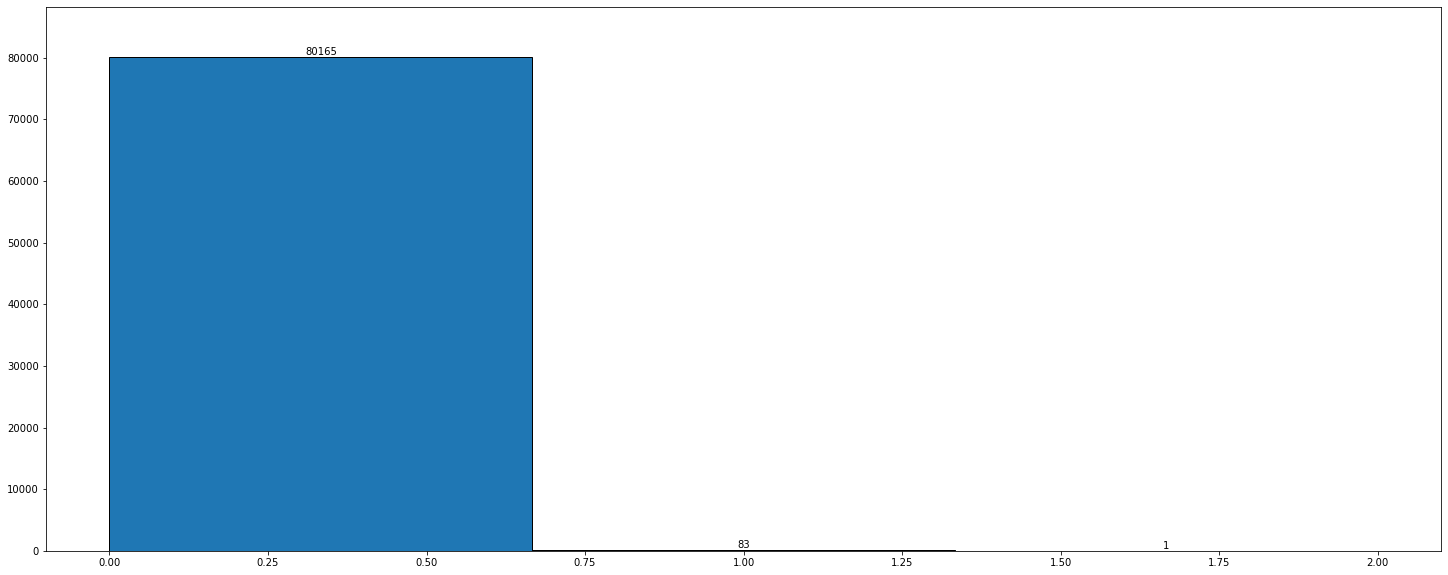

<Figure size 432x288 with 0 Axes>

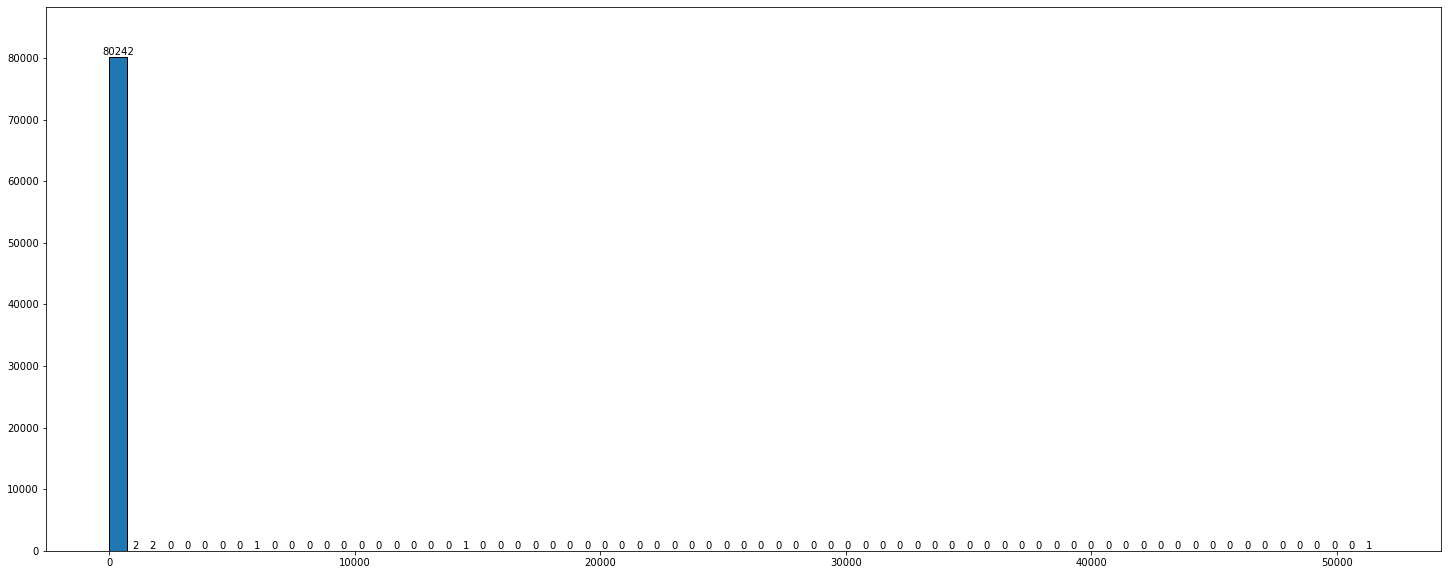

<Figure size 432x288 with 0 Axes>

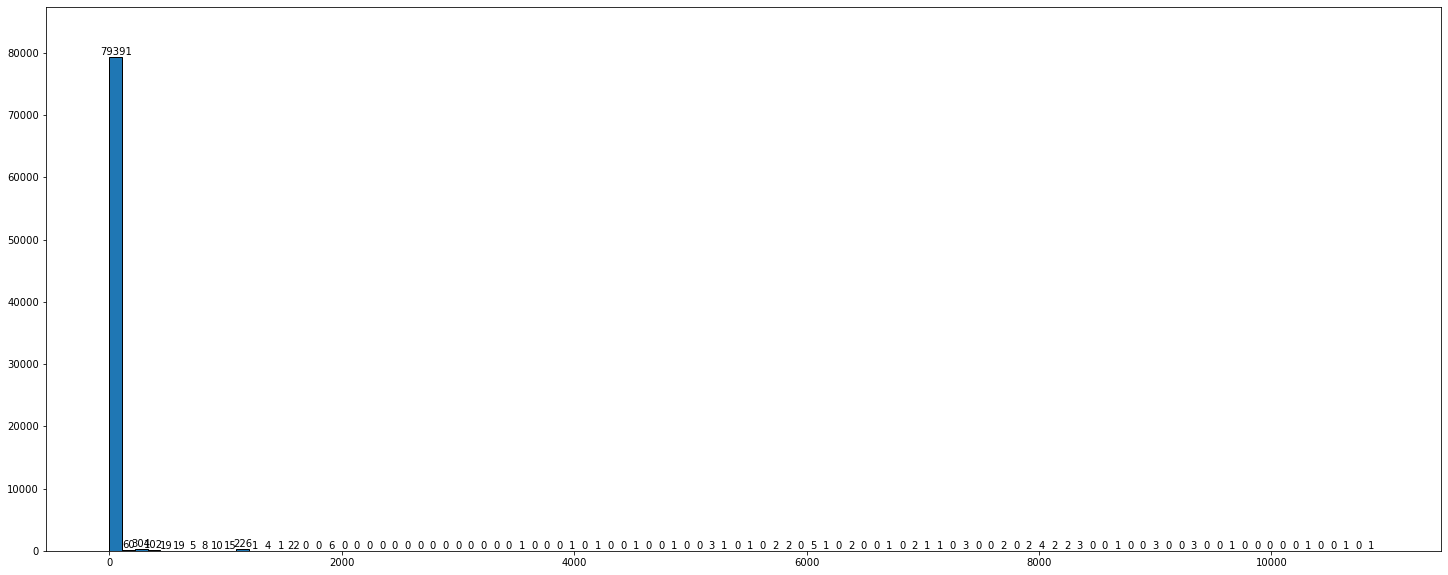

<Figure size 432x288 with 0 Axes>

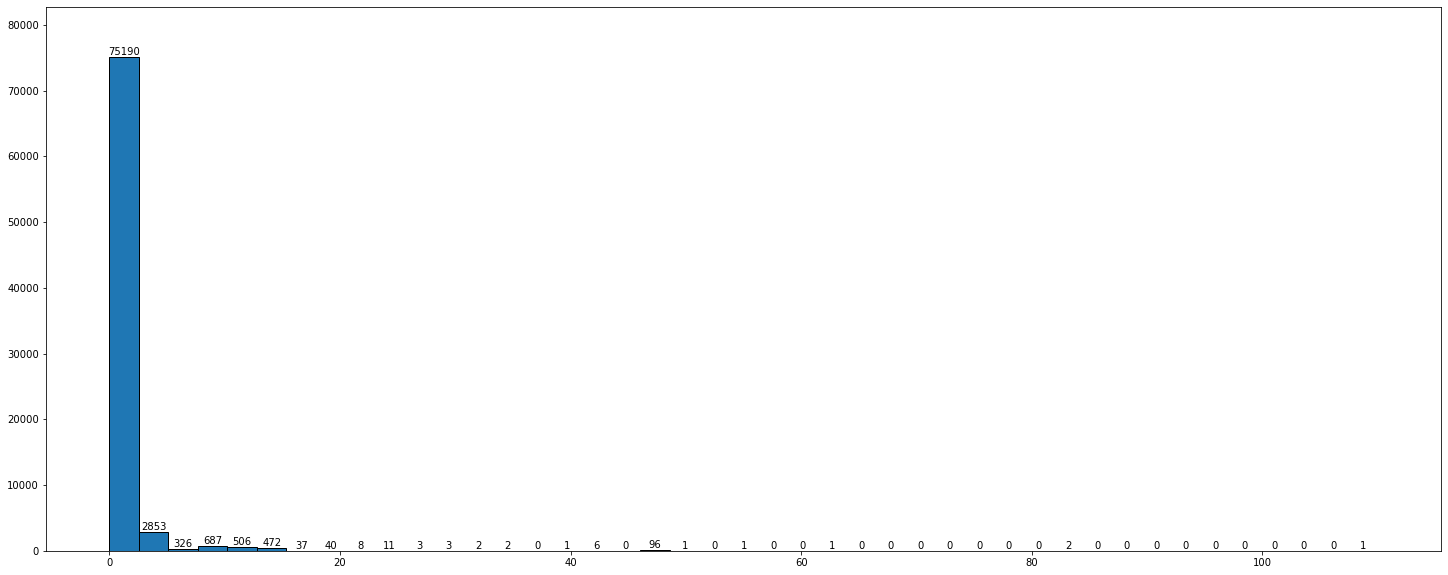

<Figure size 432x288 with 0 Axes>

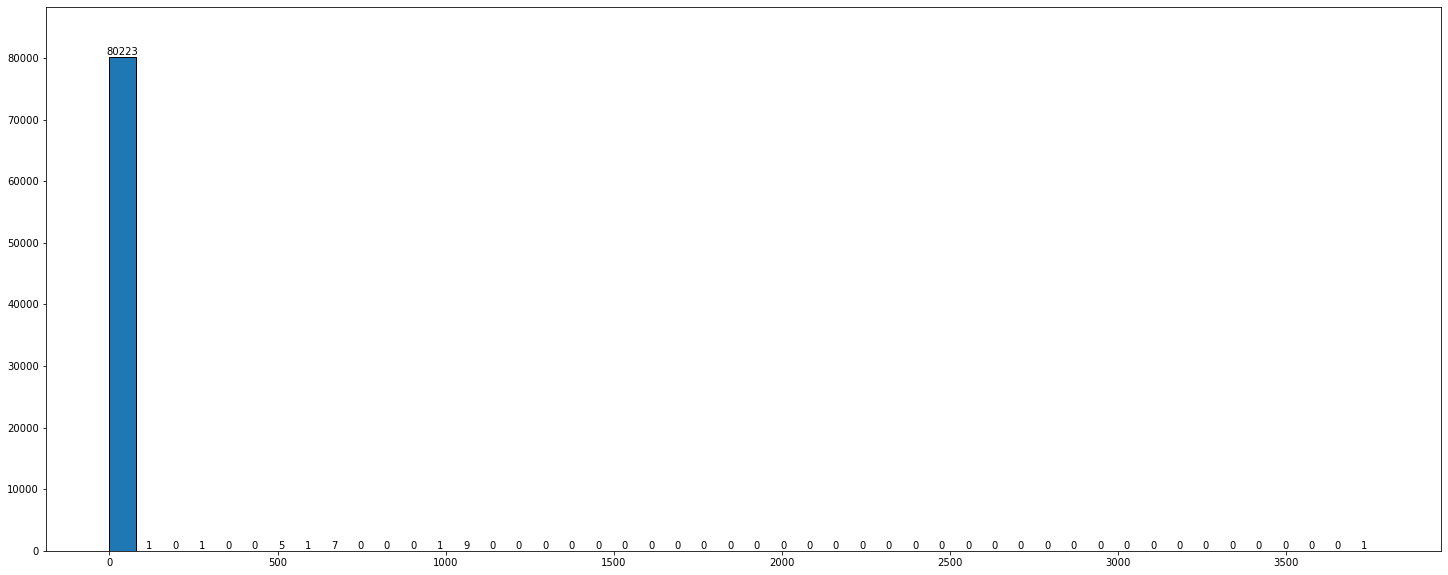

<Figure size 432x288 with 0 Axes>

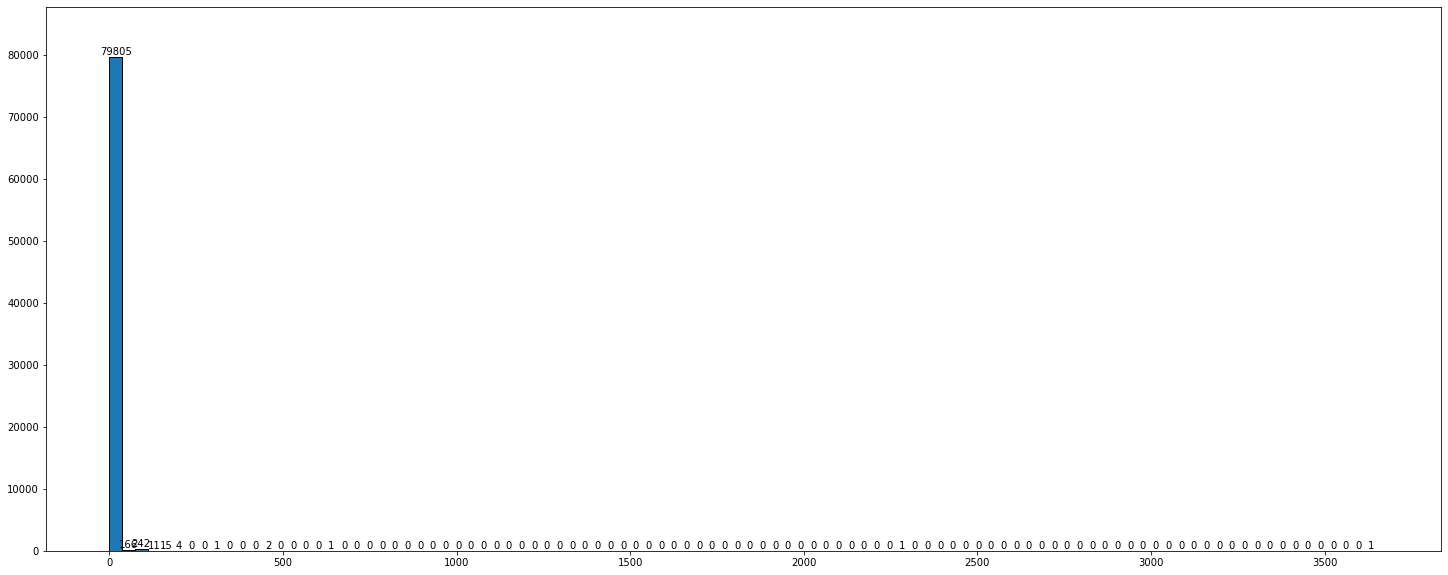

<Figure size 432x288 with 0 Axes>

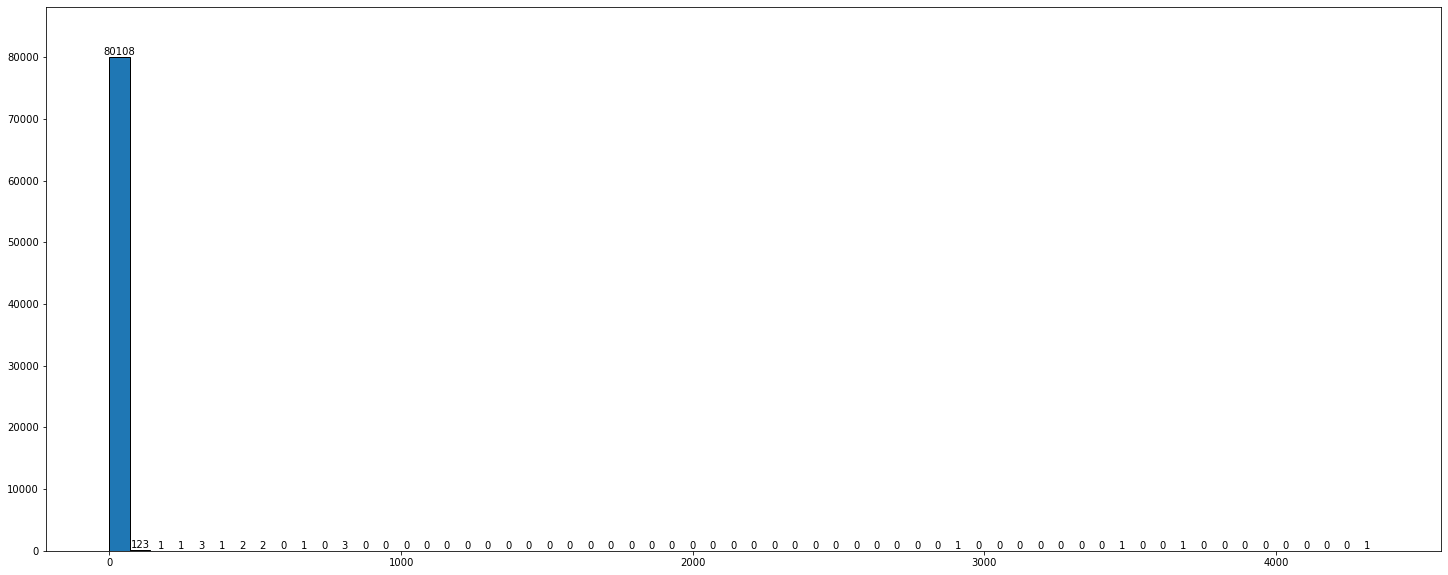

<Figure size 432x288 with 0 Axes>

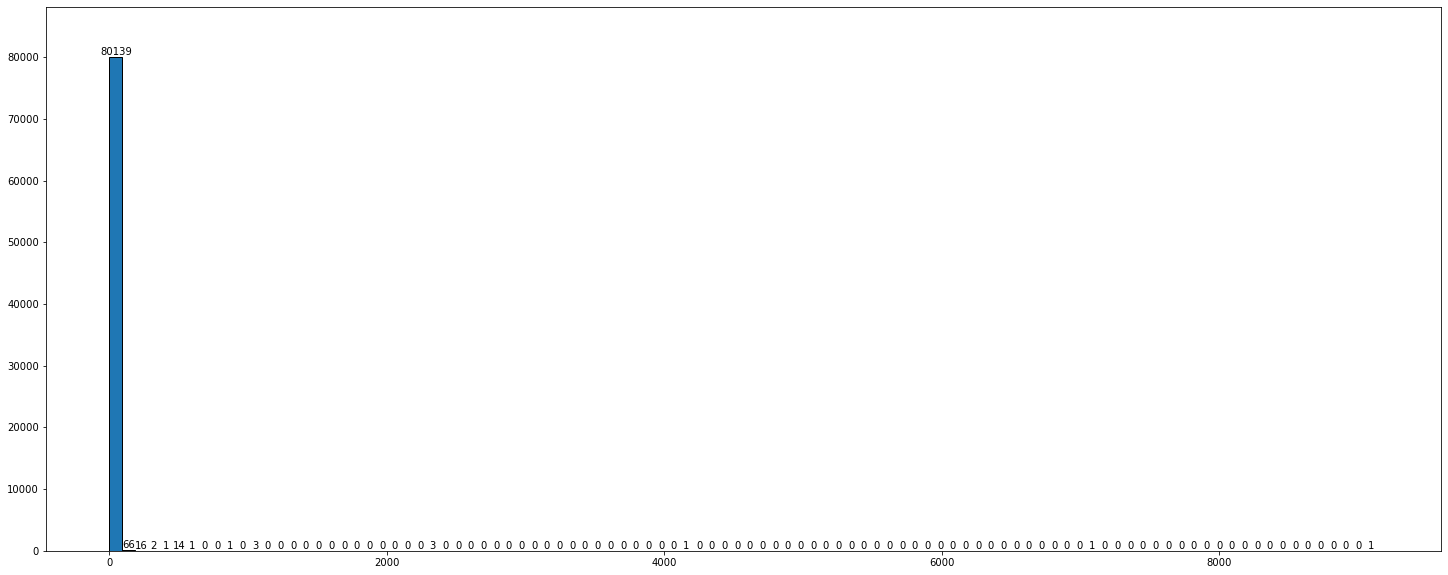

<Figure size 432x288 with 0 Axes>

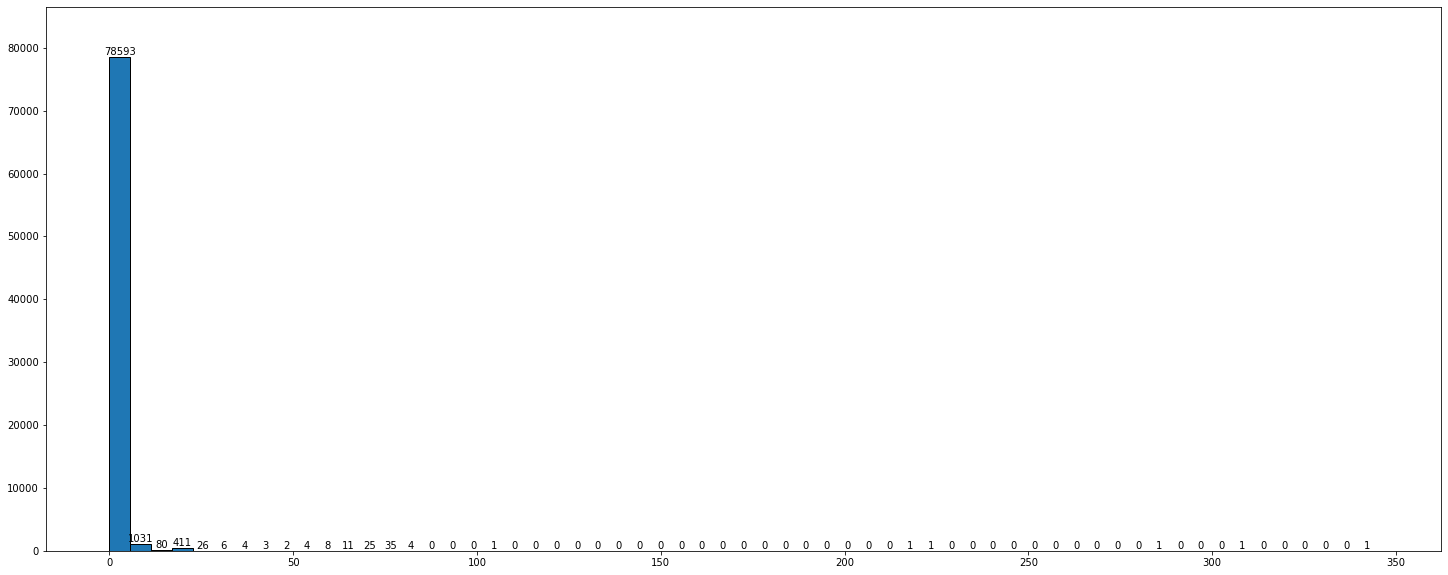

<Figure size 432x288 with 0 Axes>

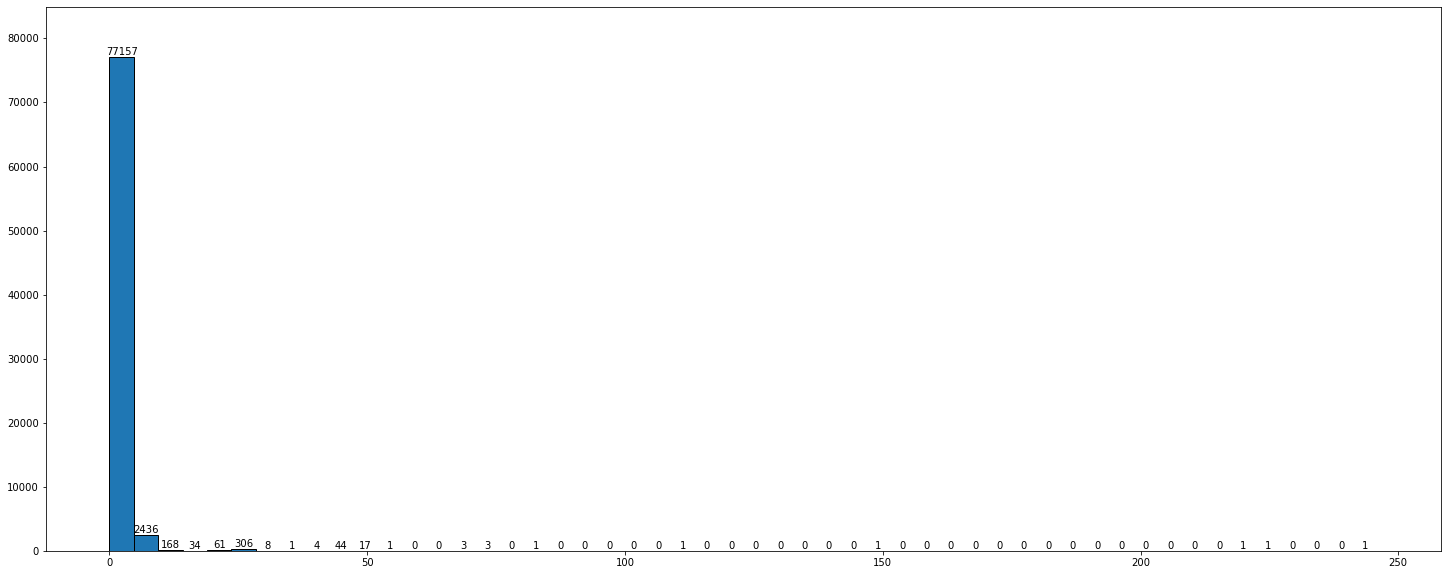

<Figure size 432x288 with 0 Axes>

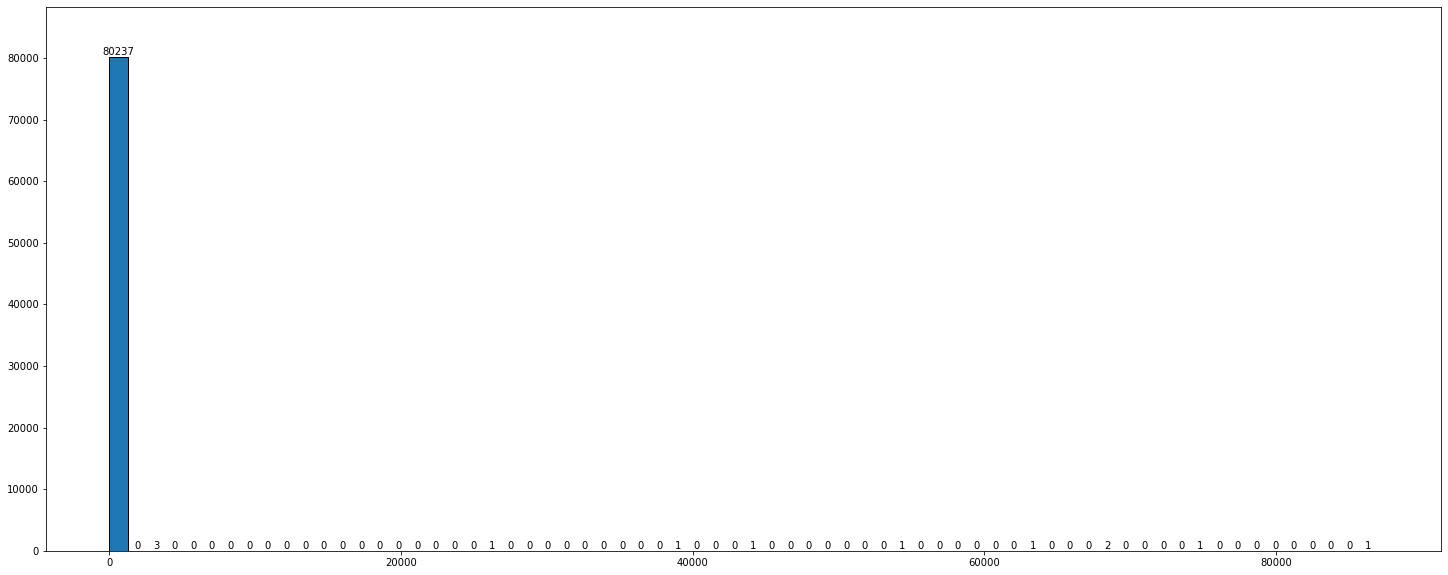

<Figure size 432x288 with 0 Axes>

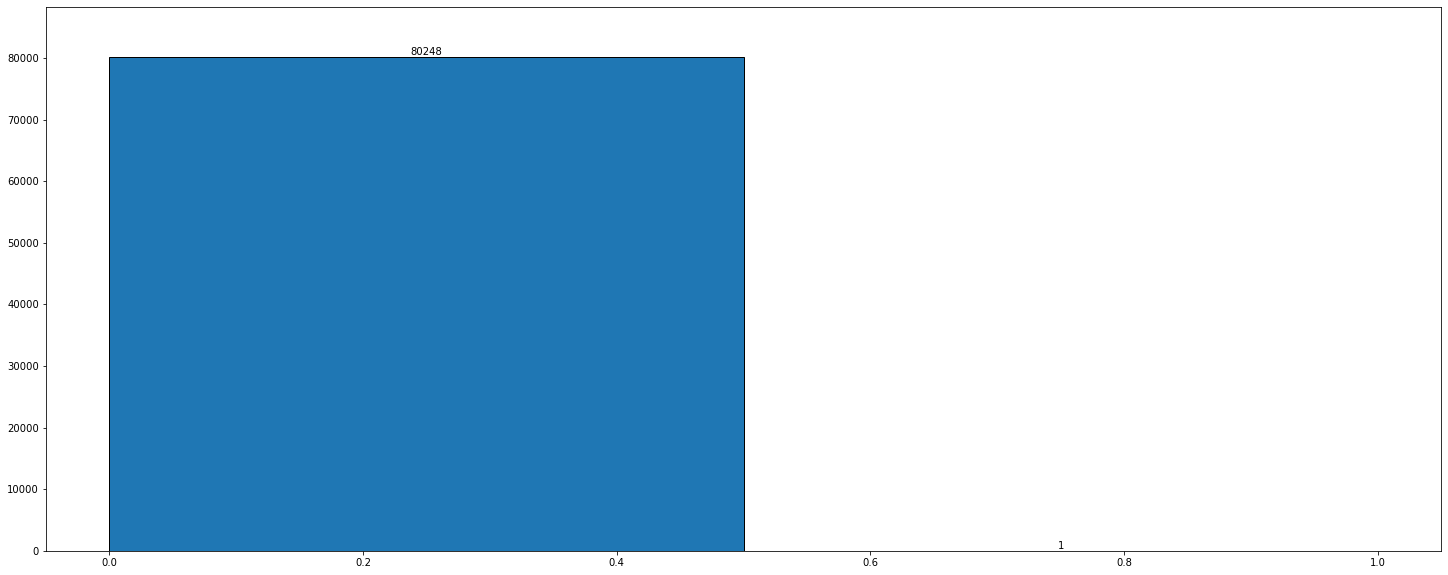

<Figure size 432x288 with 0 Axes>

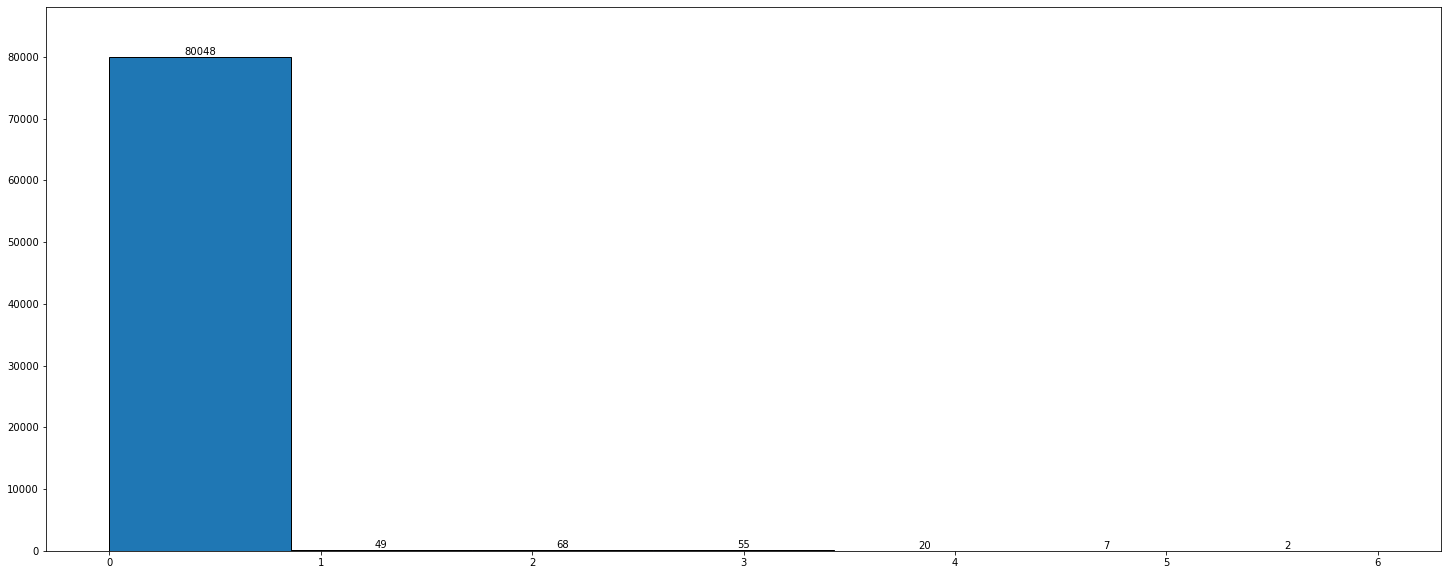

<Figure size 432x288 with 0 Axes>

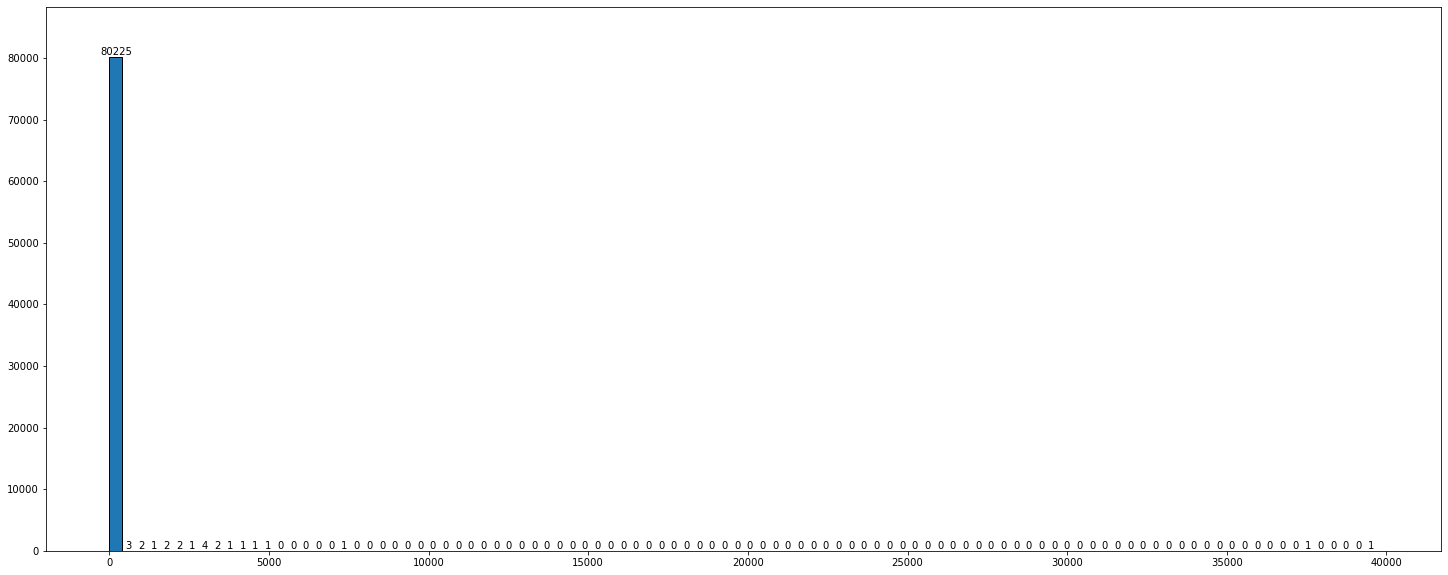

<Figure size 432x288 with 0 Axes>

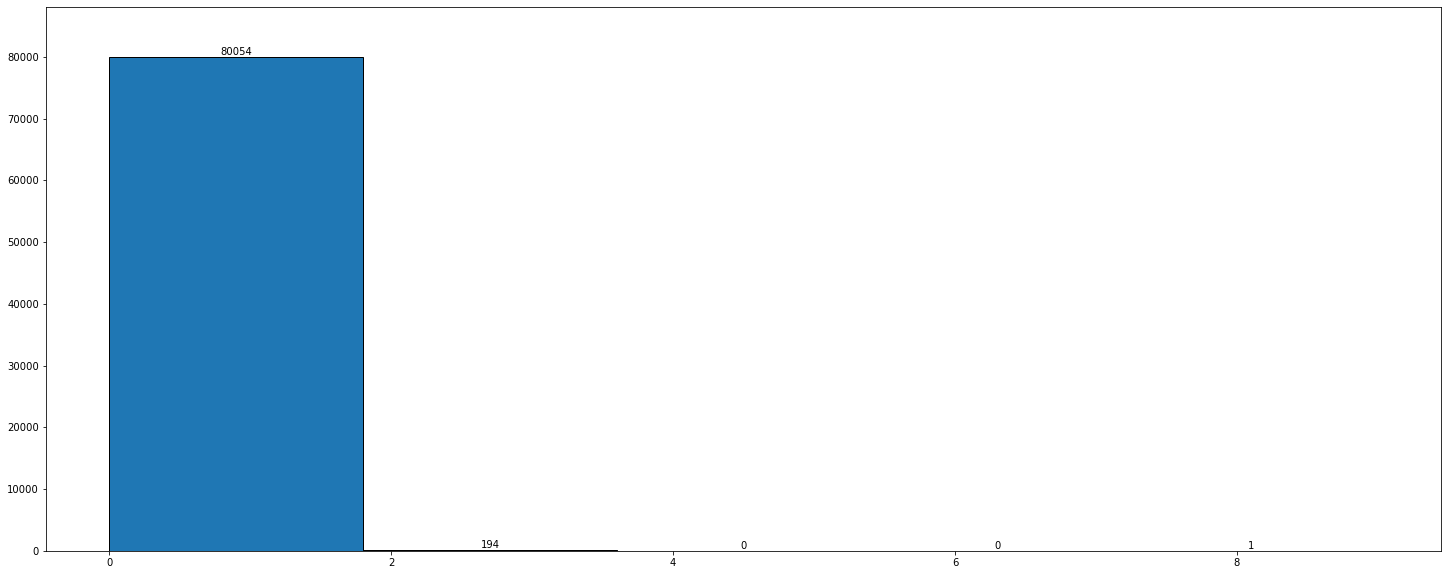

<Figure size 432x288 with 0 Axes>

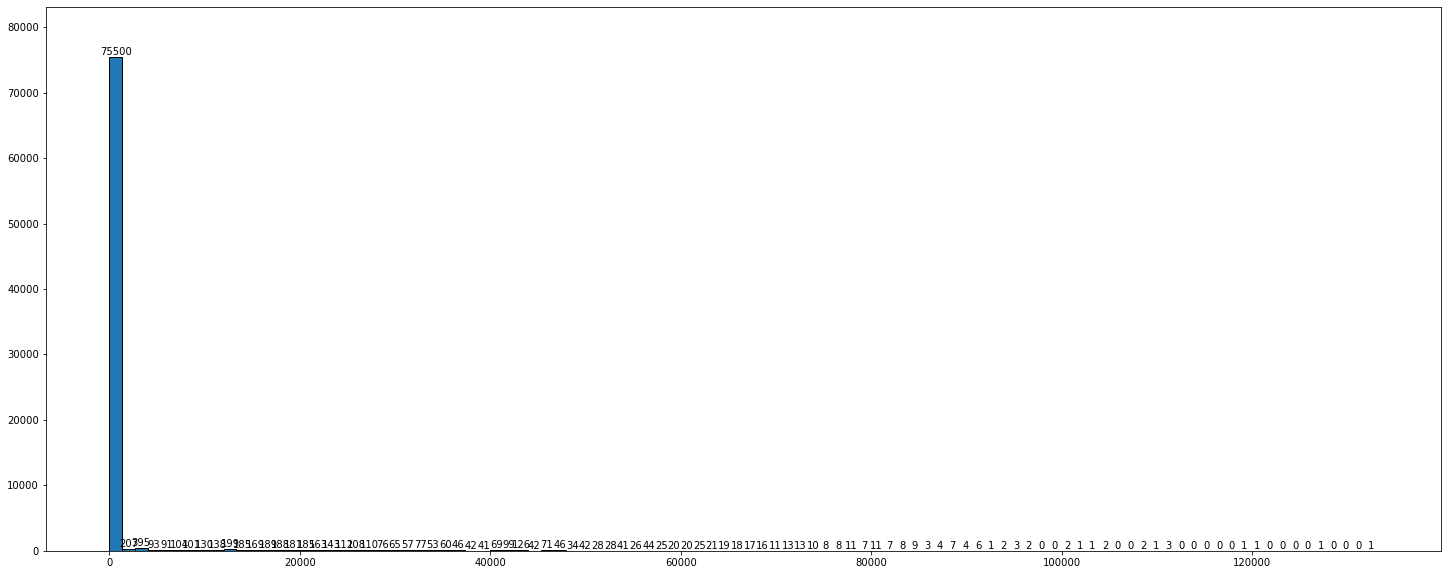

<Figure size 432x288 with 0 Axes>

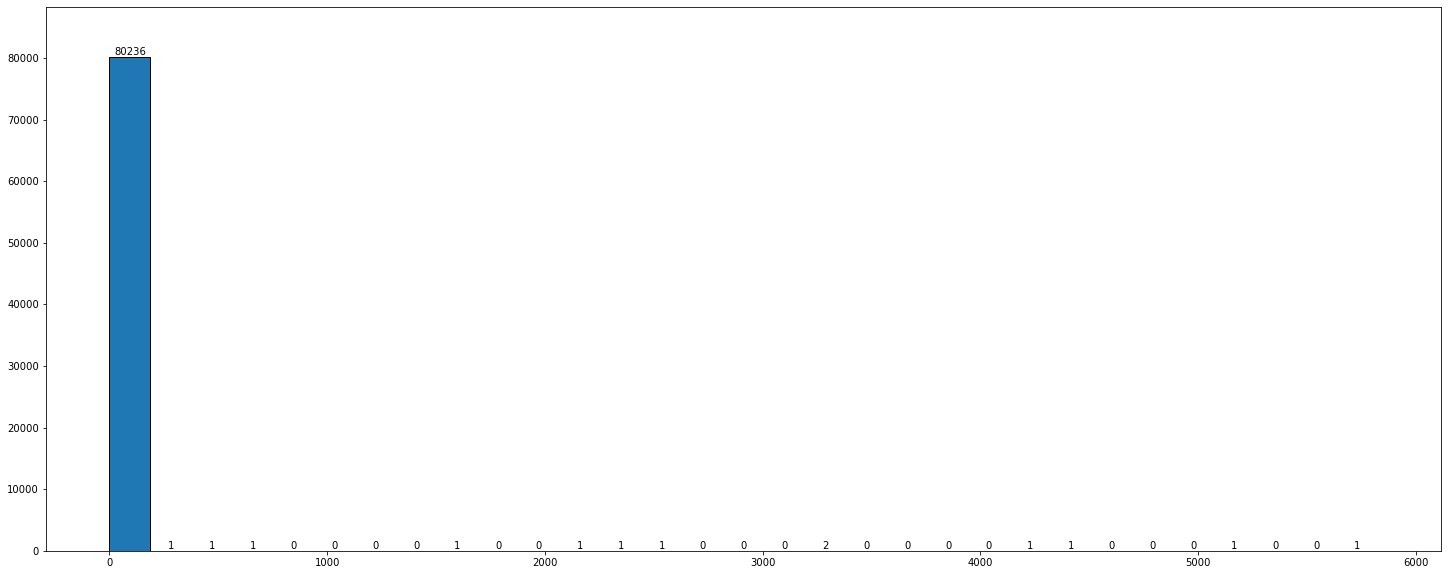

<Figure size 432x288 with 0 Axes>

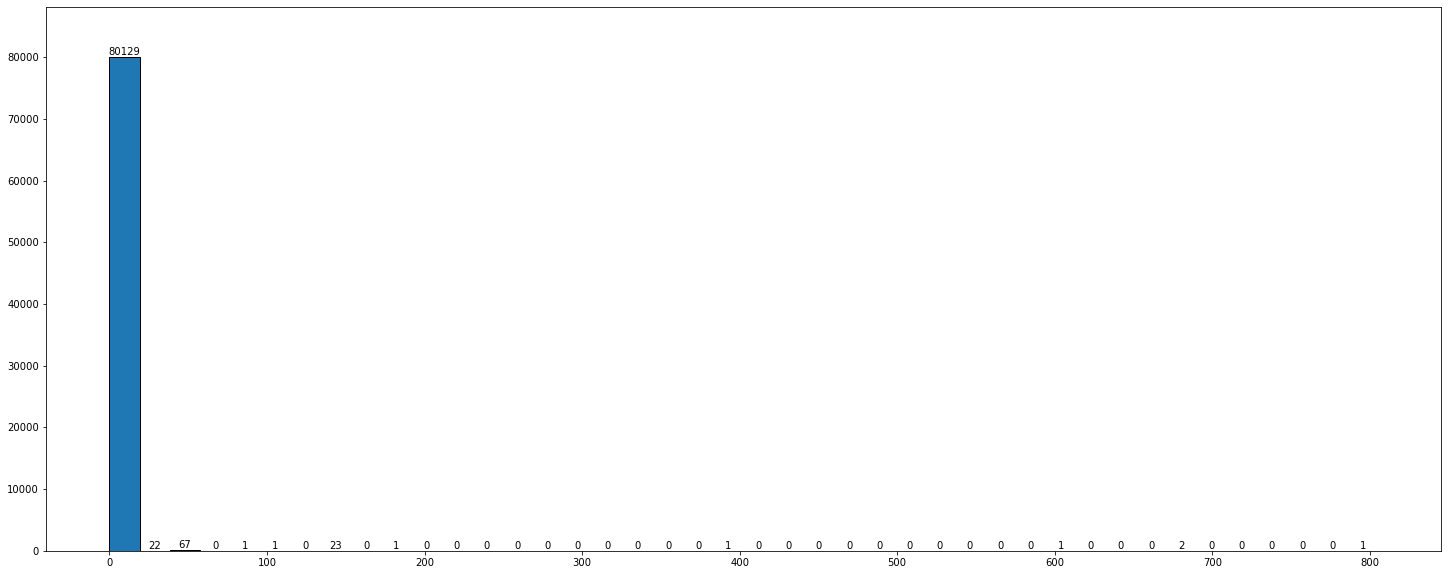

<Figure size 432x288 with 0 Axes>

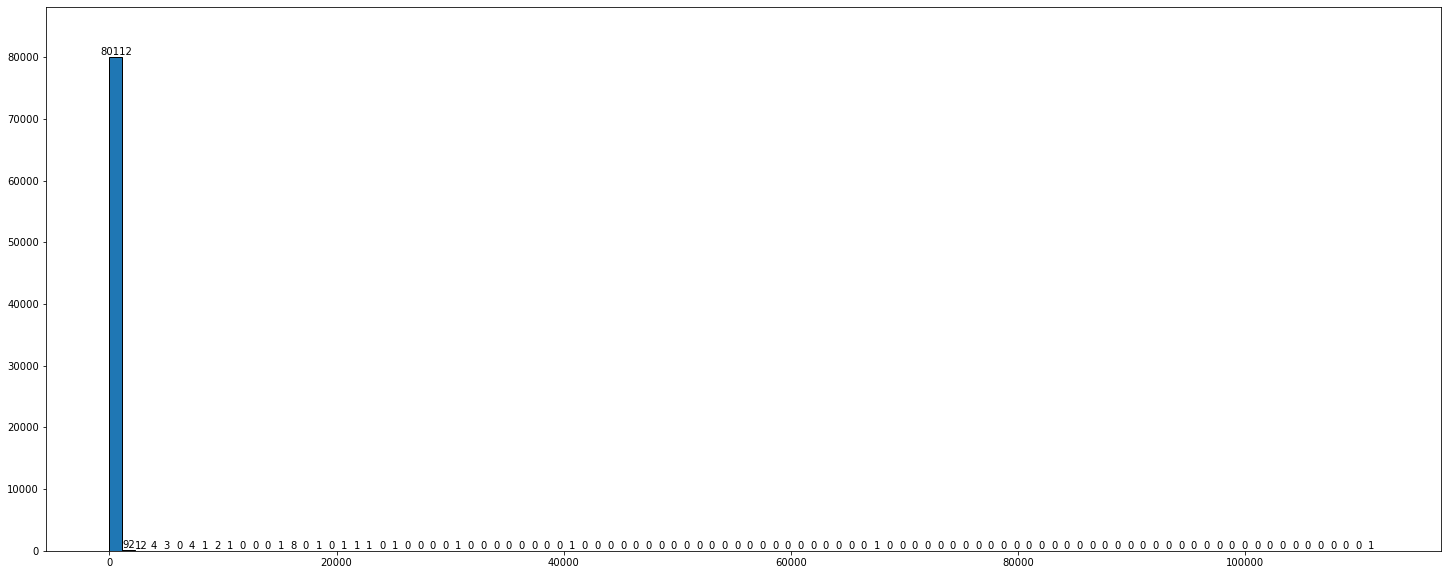

<Figure size 432x288 with 0 Axes>

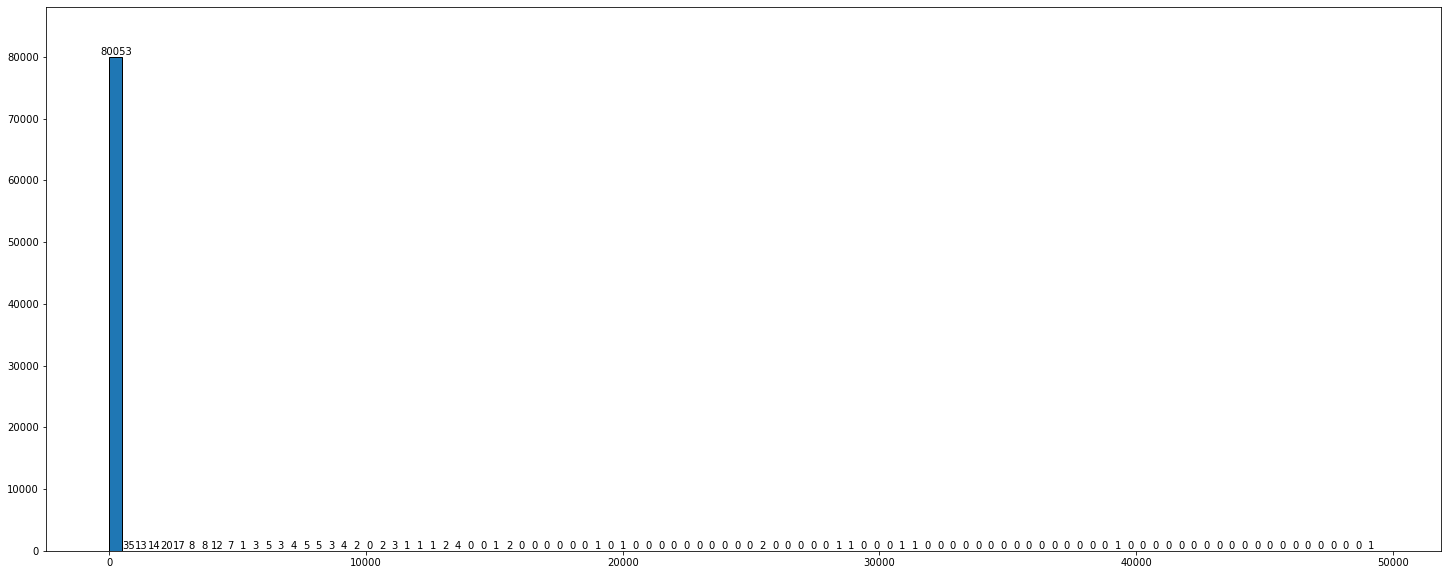

<Figure size 432x288 with 0 Axes>

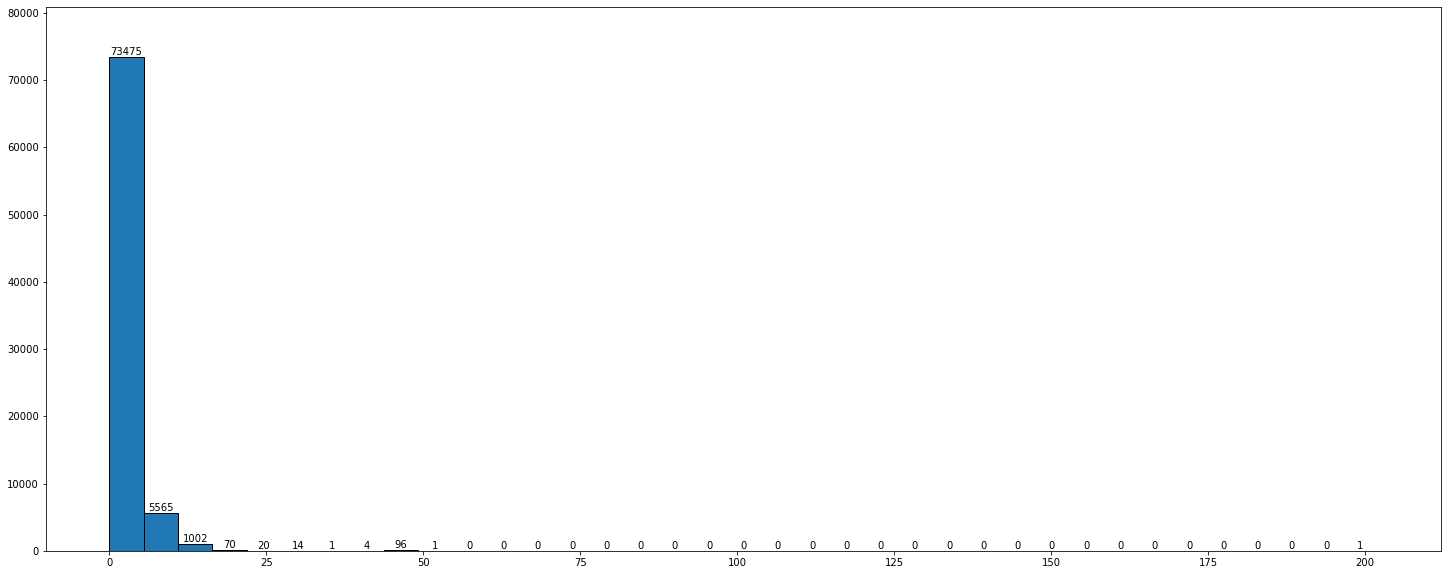

<Figure size 432x288 with 0 Axes>

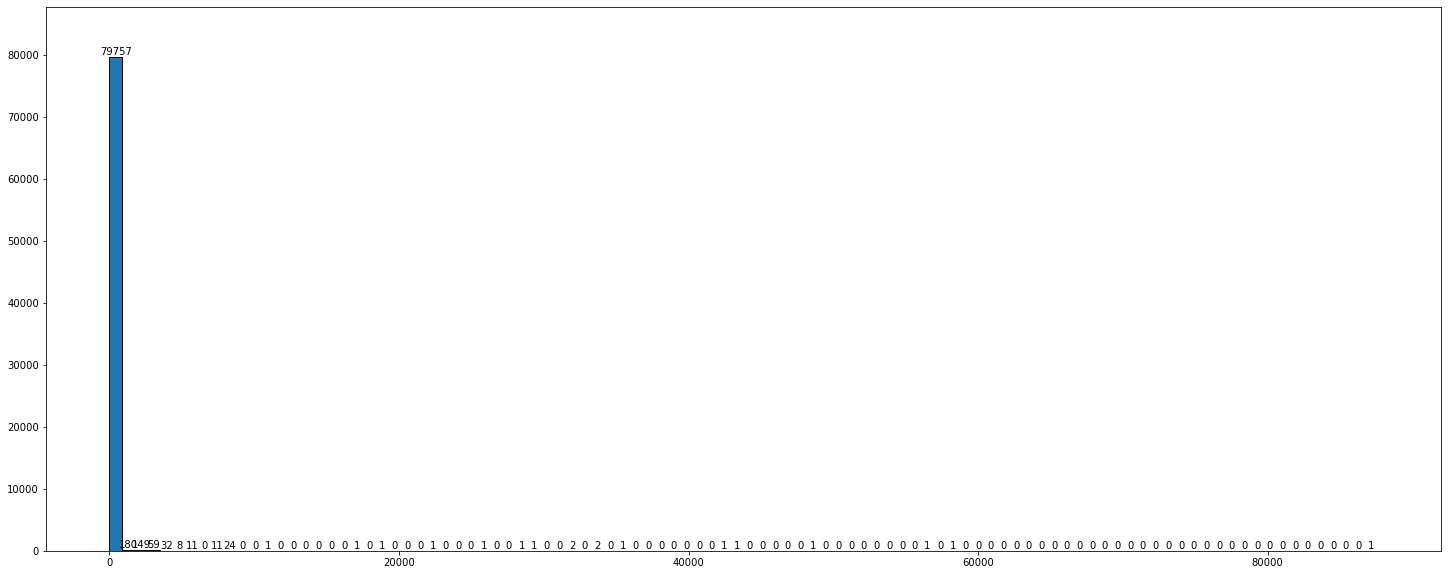

<Figure size 432x288 with 0 Axes>

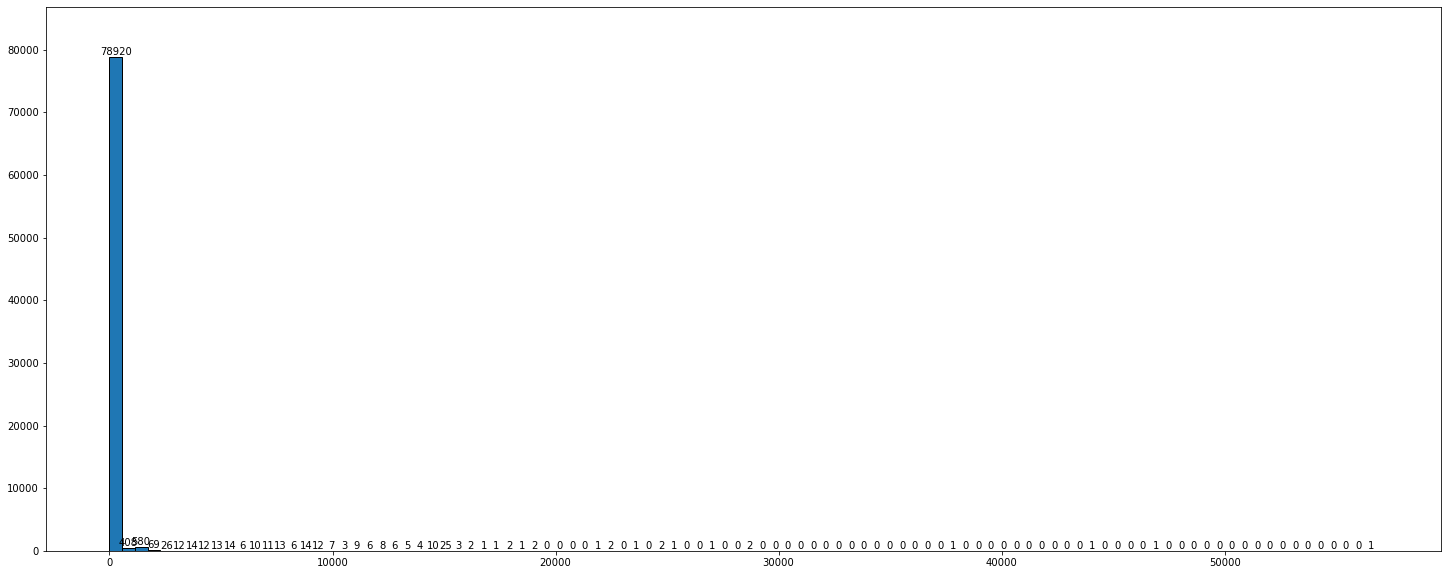

<Figure size 432x288 with 0 Axes>

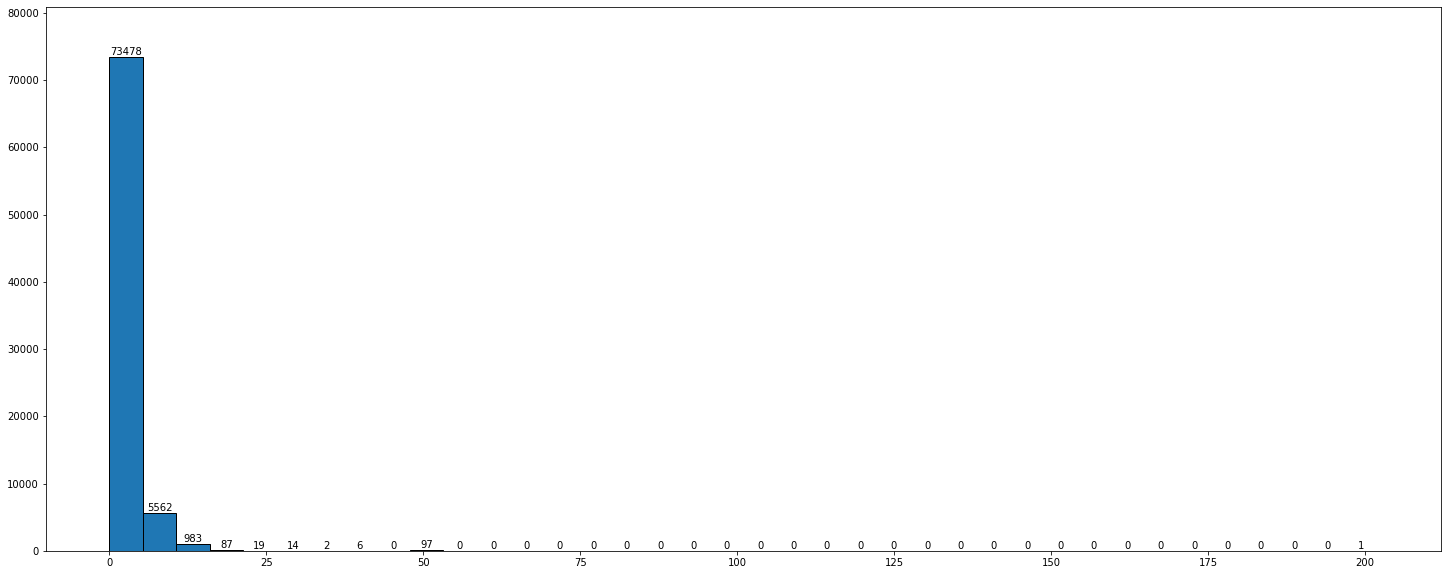

<Figure size 432x288 with 0 Axes>

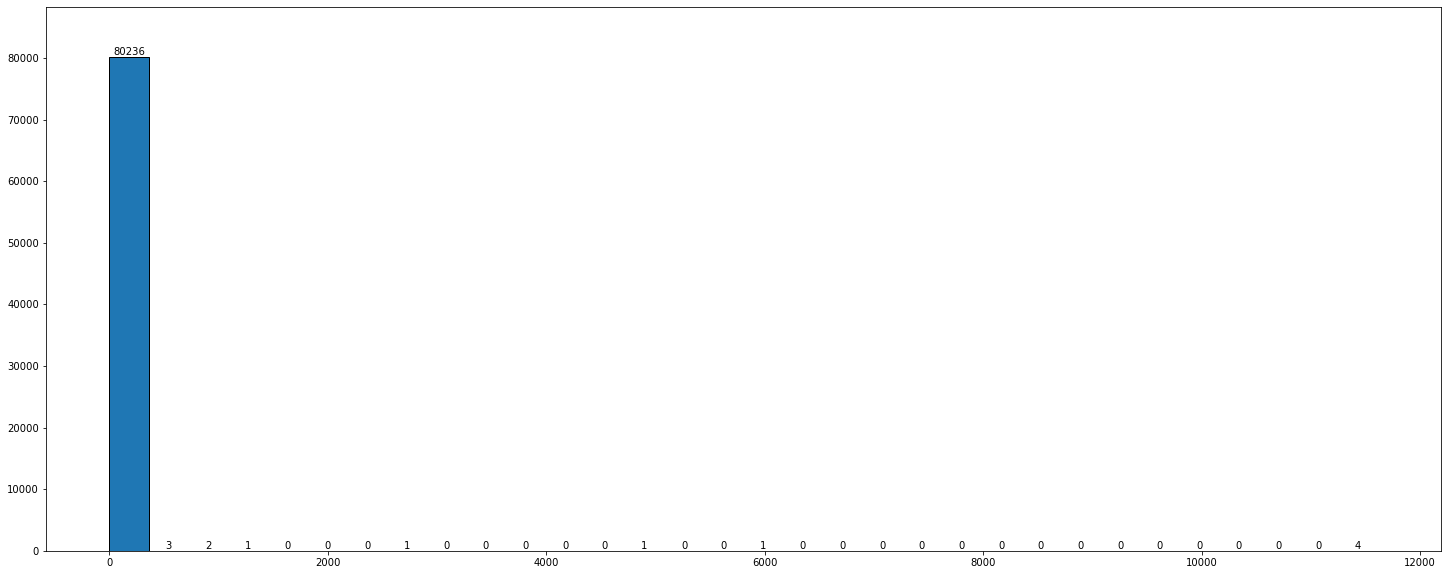

<Figure size 432x288 with 0 Axes>

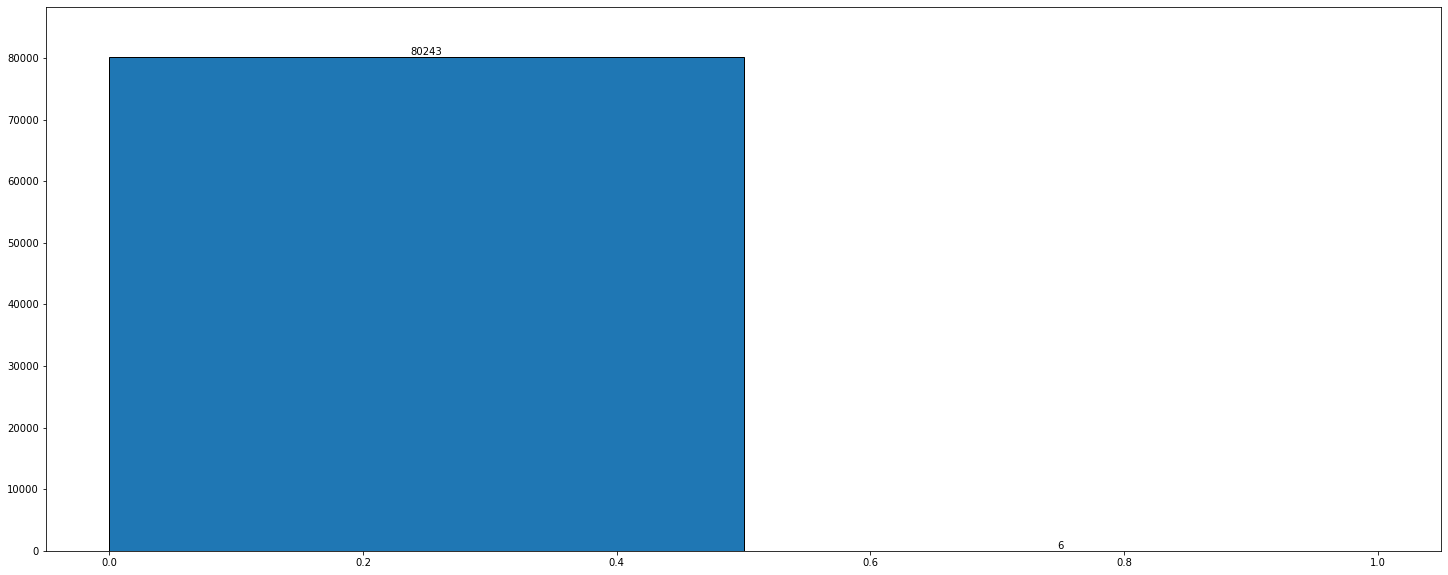

<Figure size 432x288 with 0 Axes>

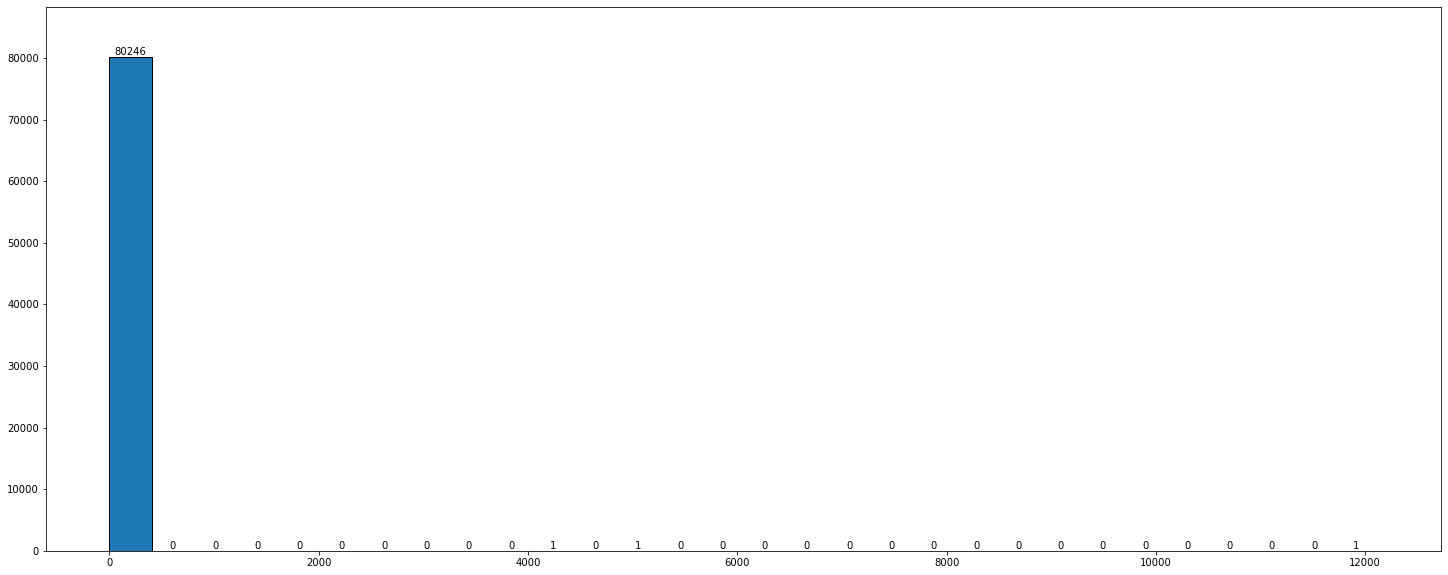

<Figure size 432x288 with 0 Axes>

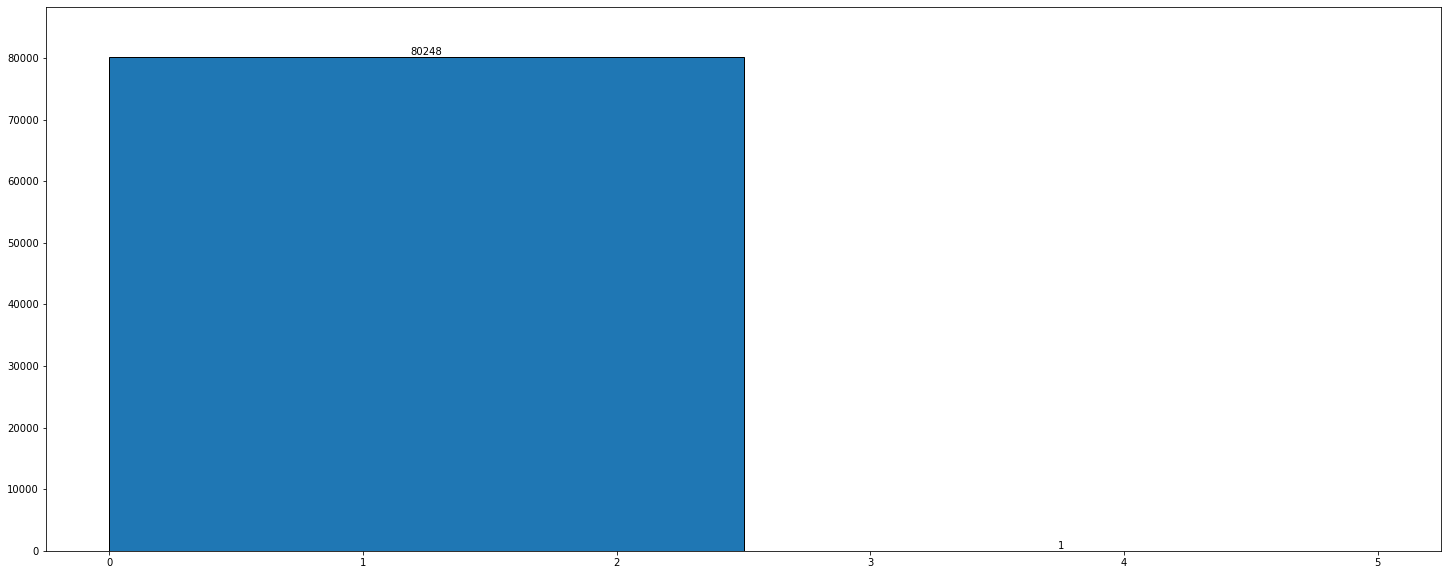

<Figure size 432x288 with 0 Axes>

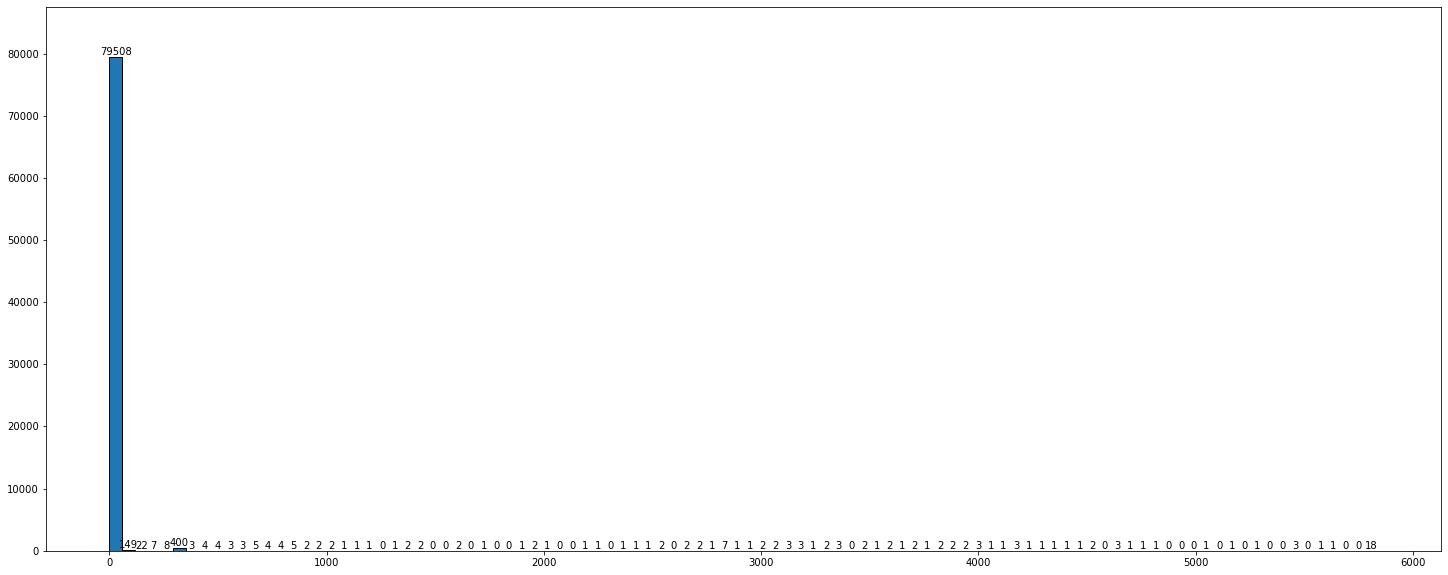

<Figure size 432x288 with 0 Axes>

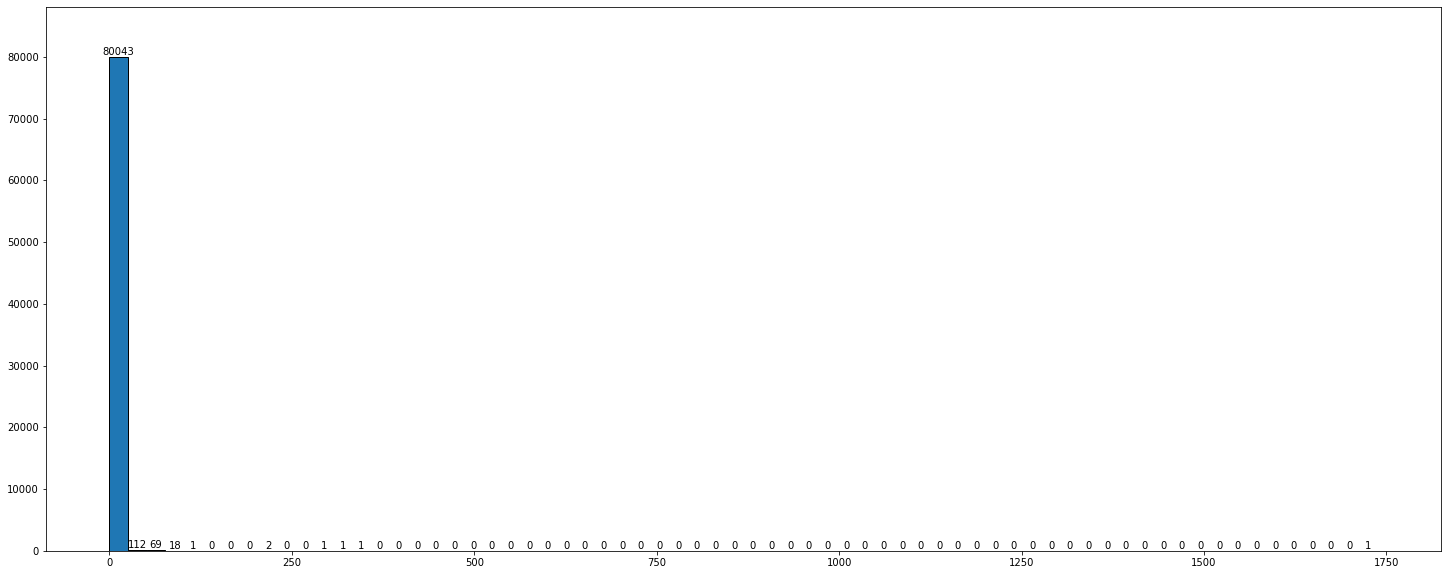

<Figure size 432x288 with 0 Axes>

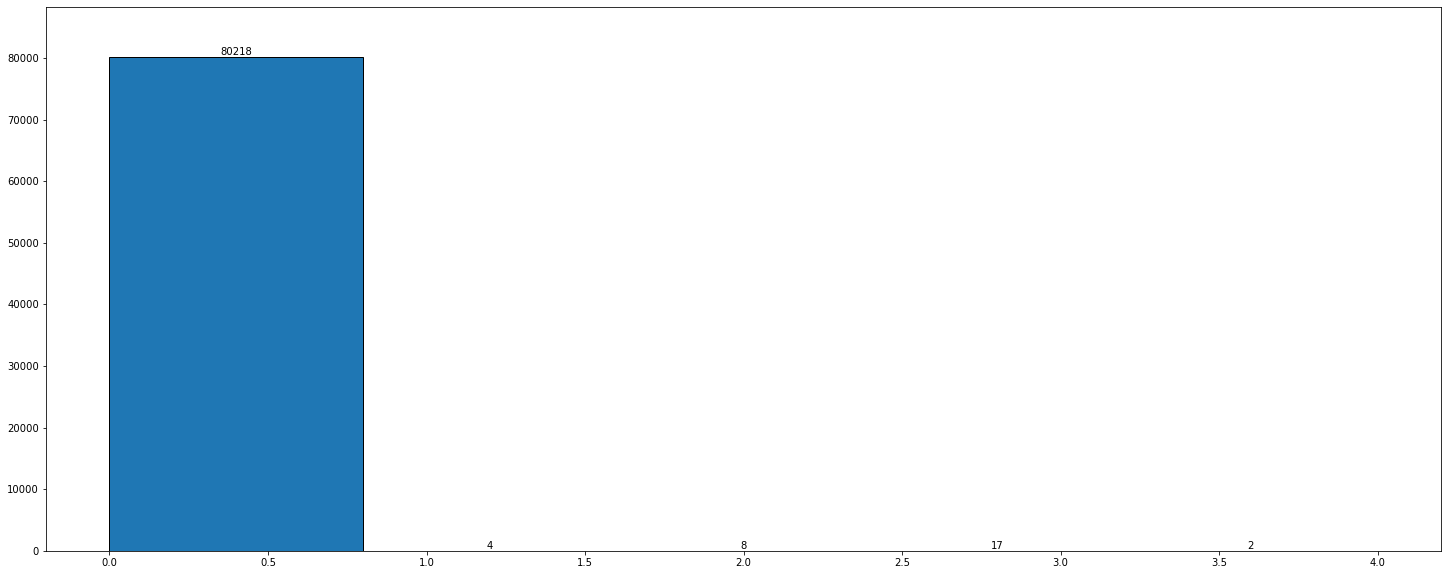

<Figure size 432x288 with 0 Axes>

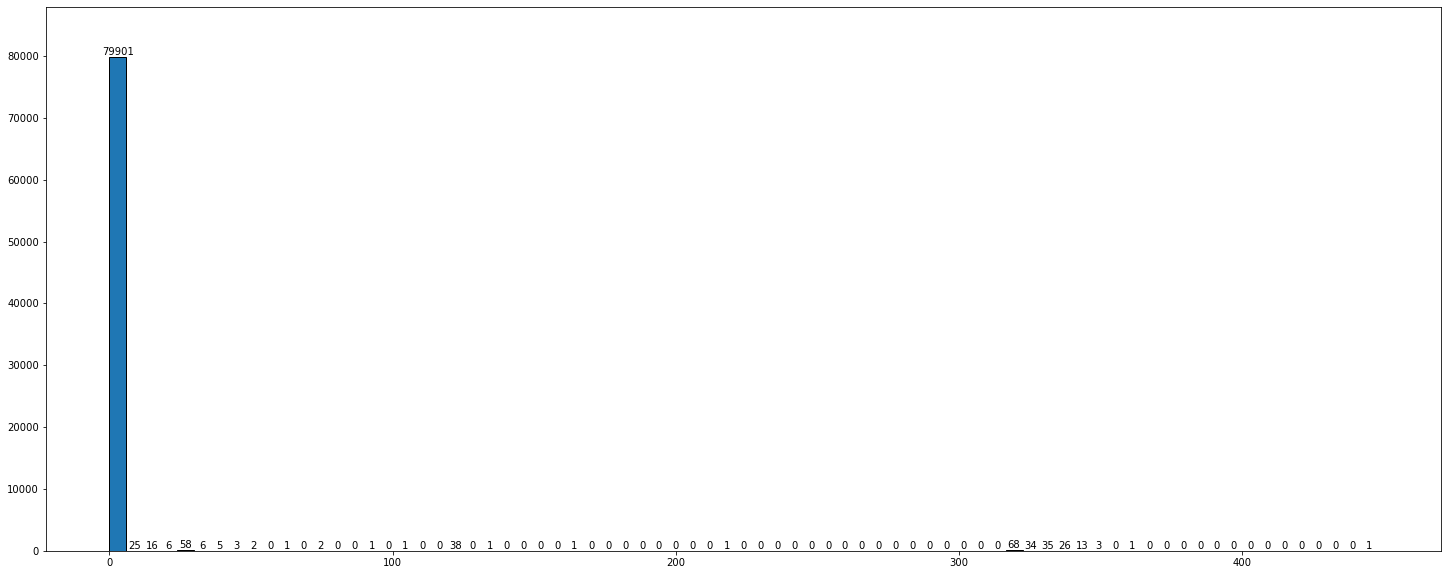

<Figure size 432x288 with 0 Axes>

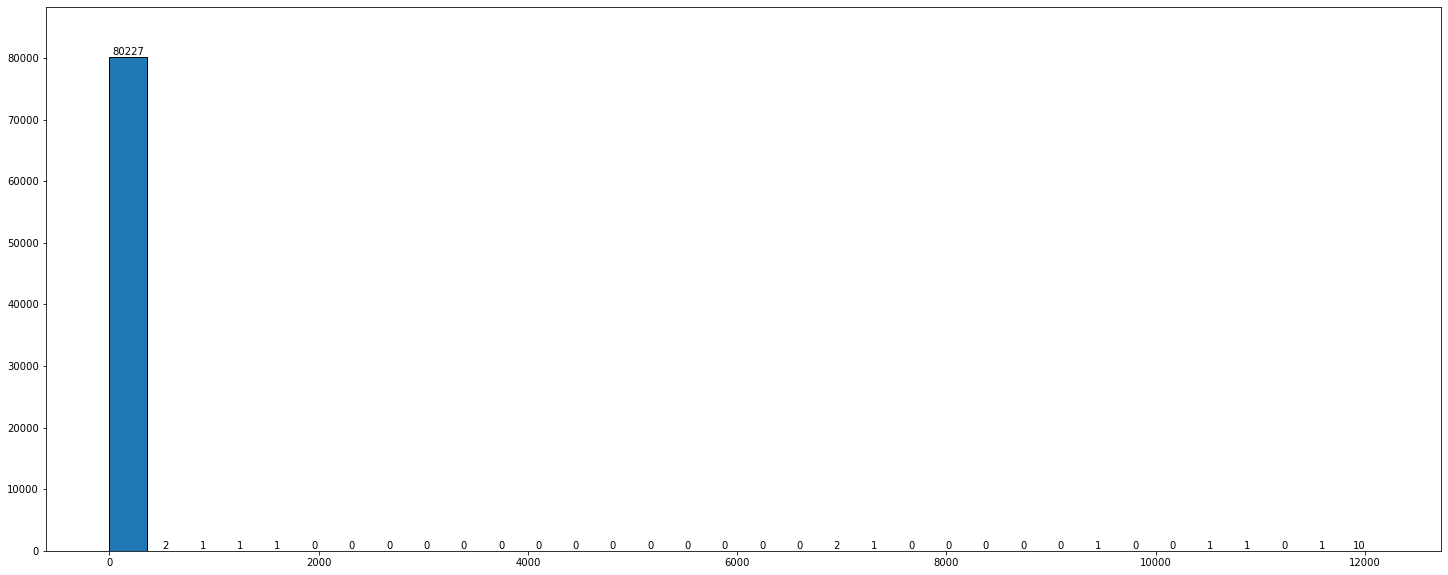

<Figure size 432x288 with 0 Axes>

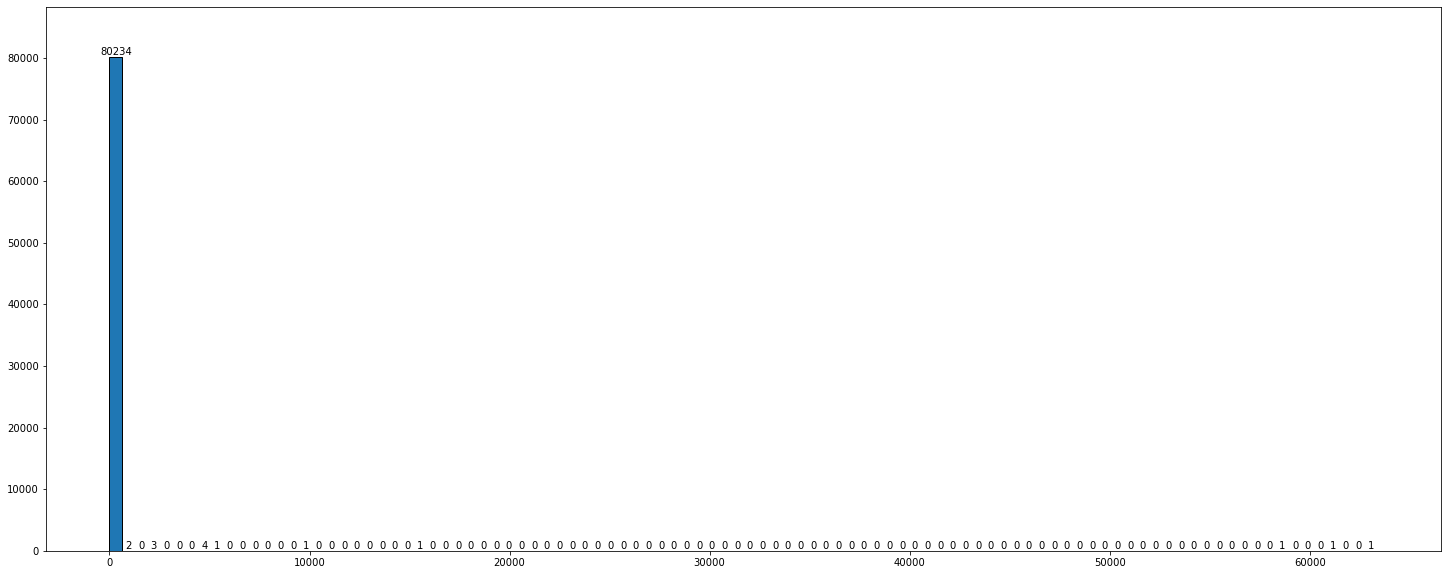

<Figure size 432x288 with 0 Axes>

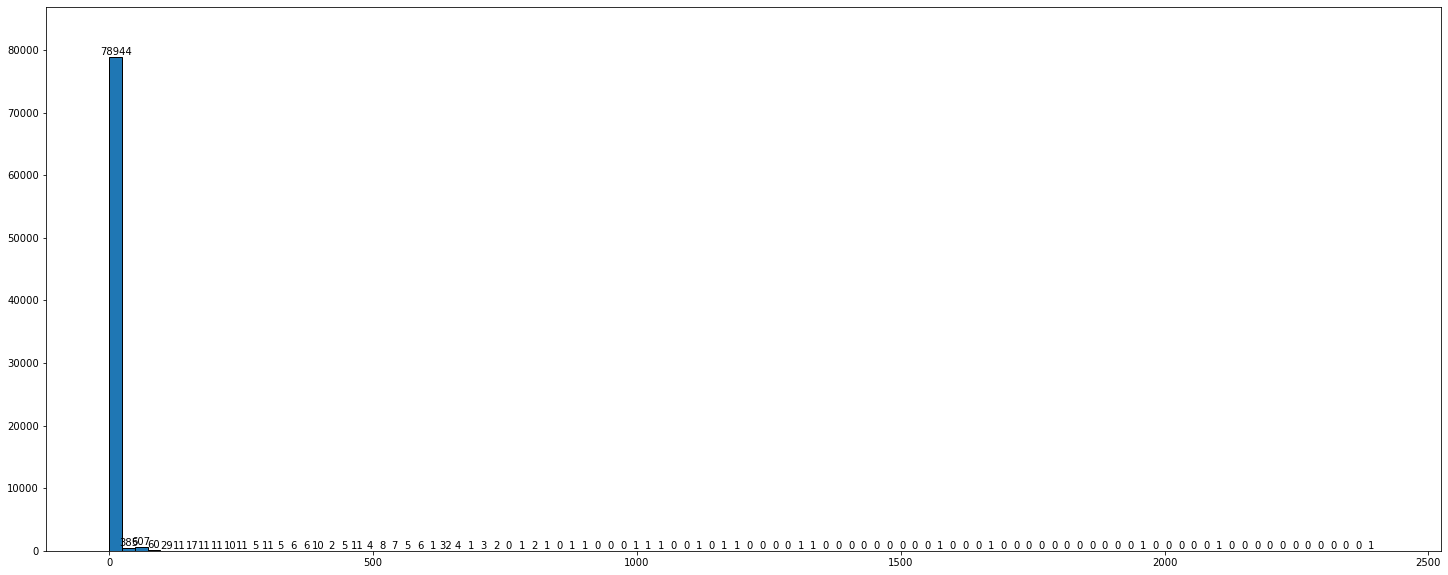

<Figure size 432x288 with 0 Axes>

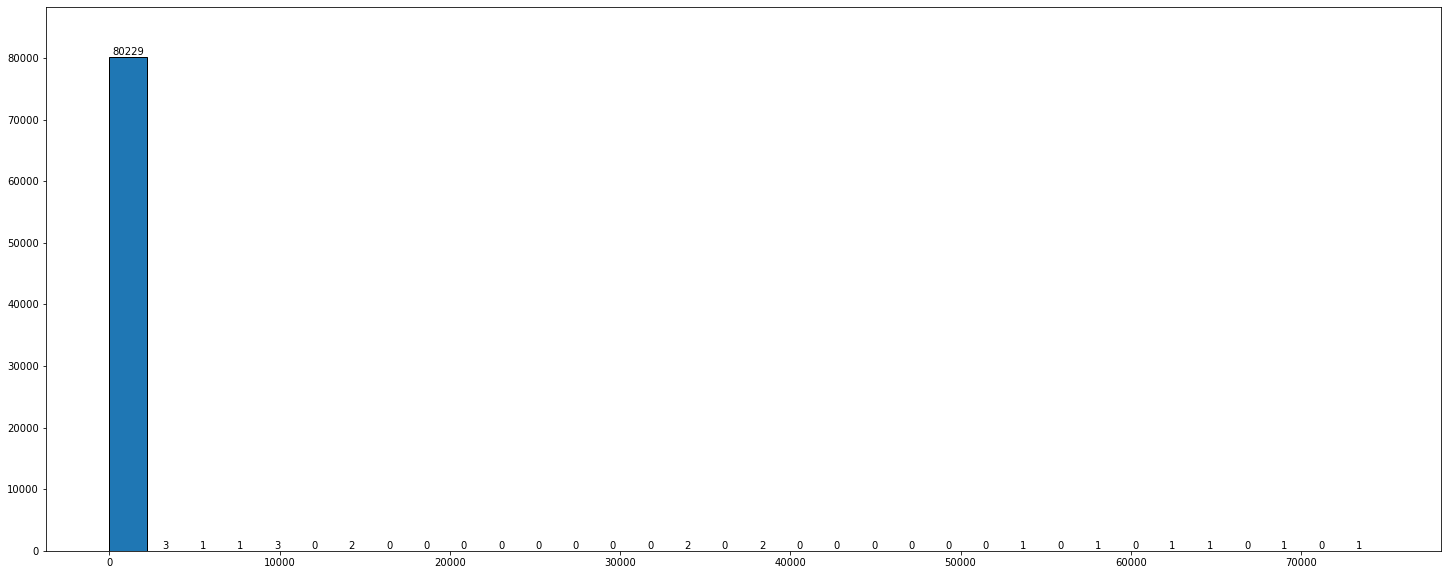

<Figure size 432x288 with 0 Axes>

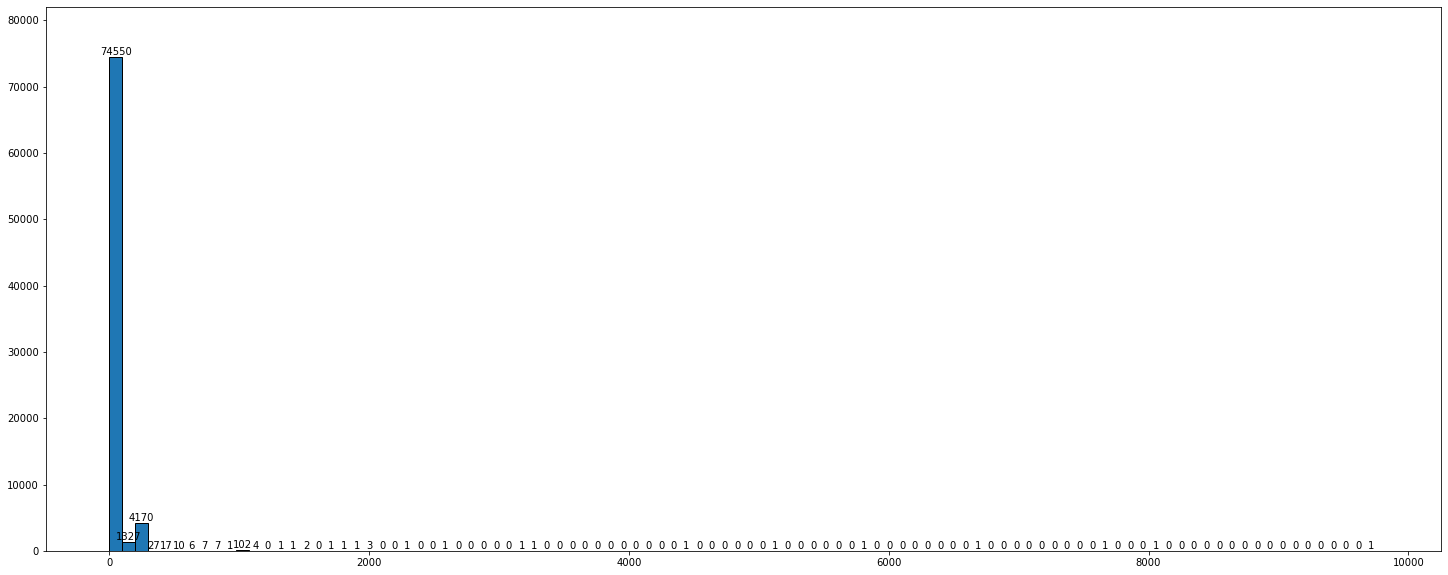

<Figure size 432x288 with 0 Axes>

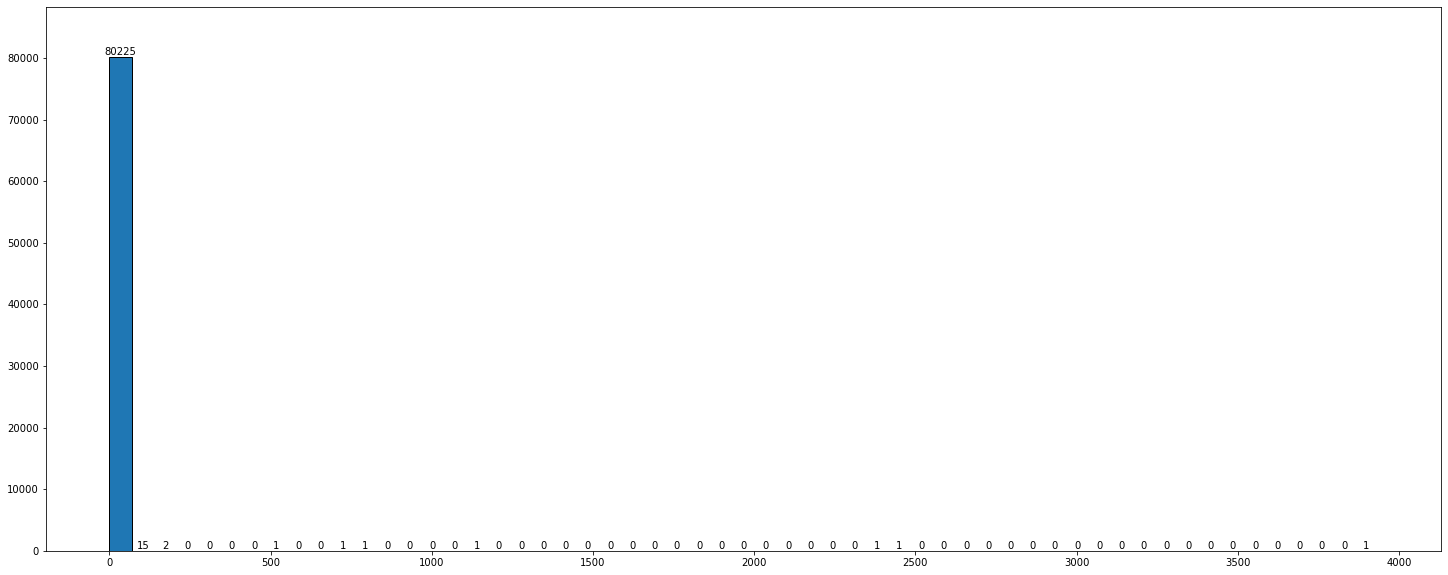

<Figure size 432x288 with 0 Axes>

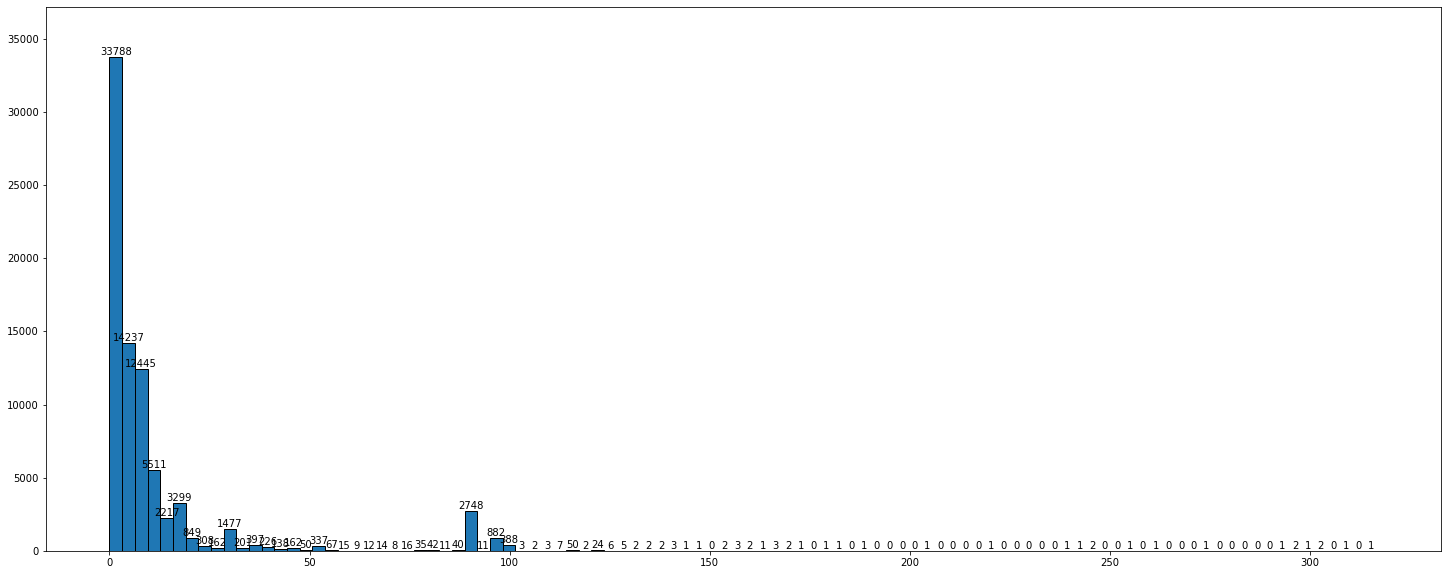

<Figure size 432x288 with 0 Axes>

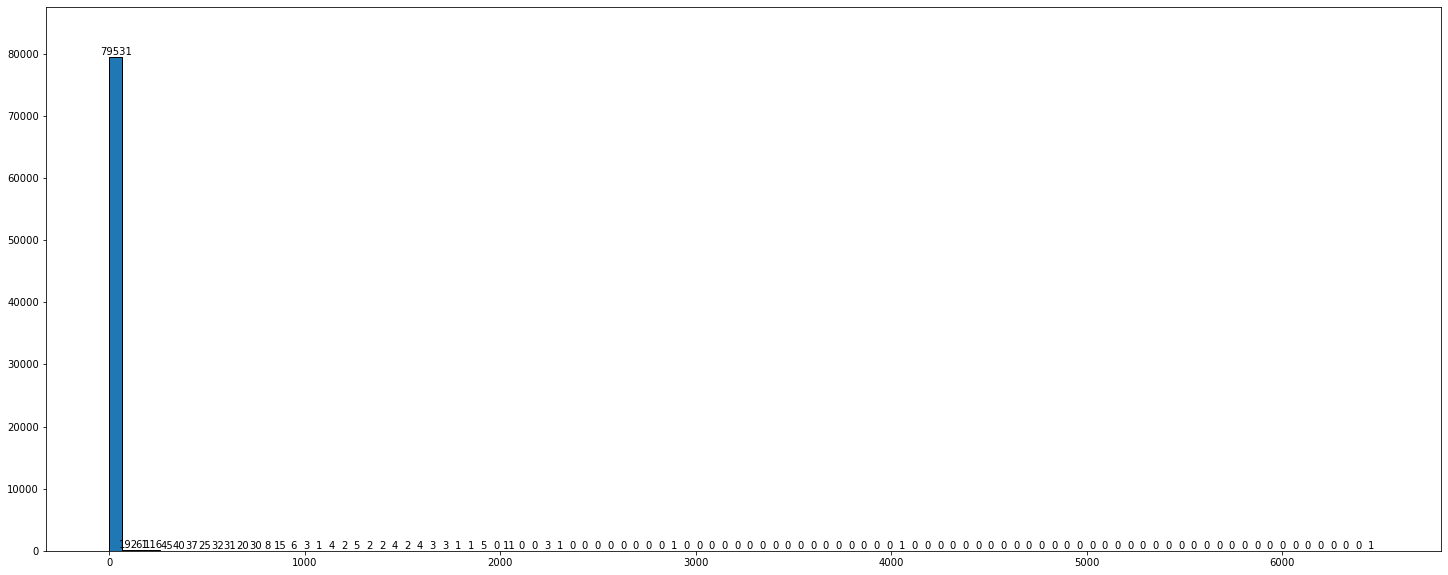

<Figure size 432x288 with 0 Axes>

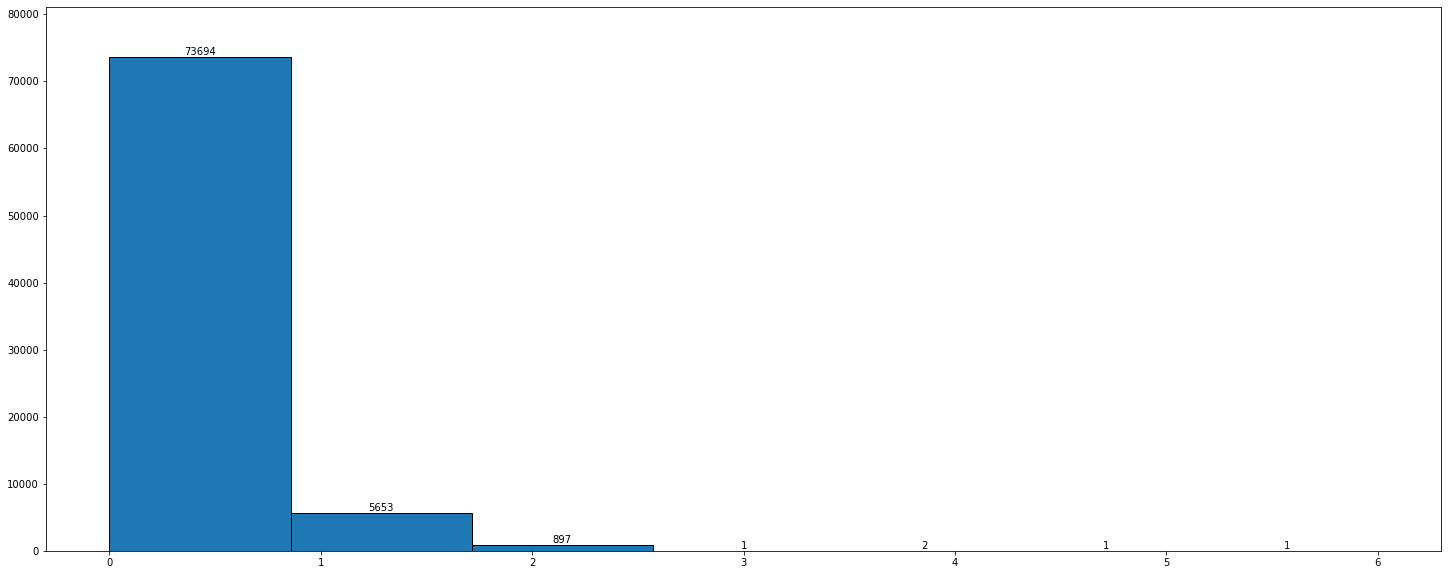

<Figure size 432x288 with 0 Axes>

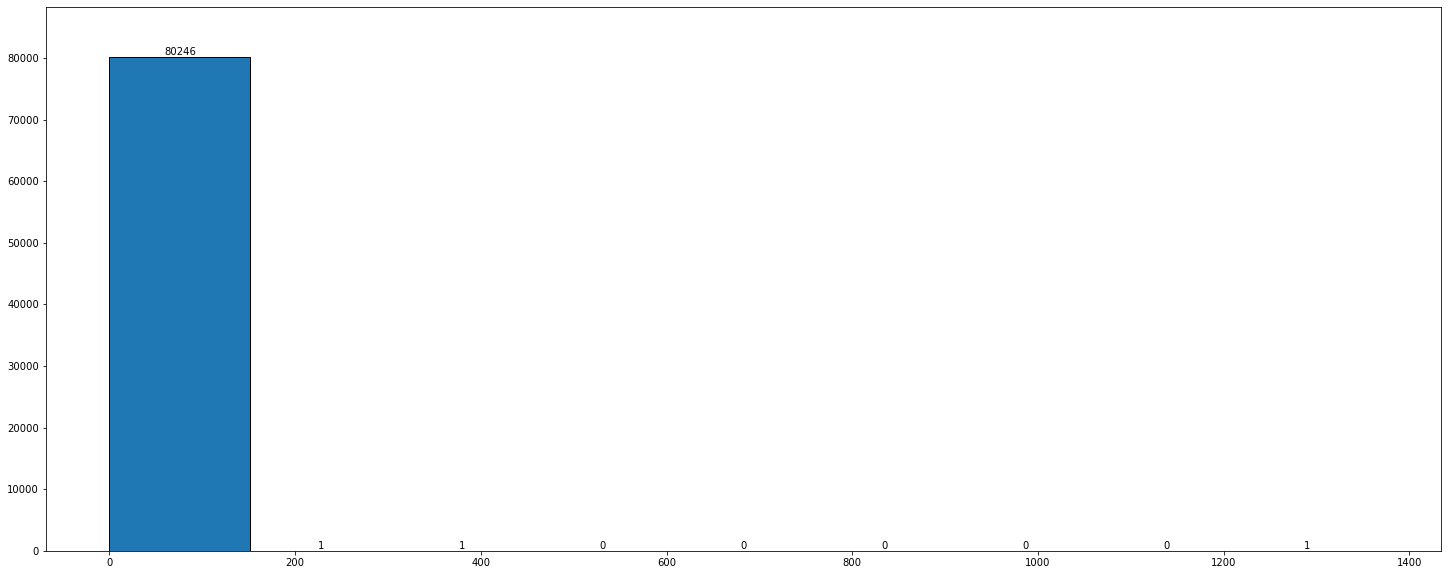

<Figure size 432x288 with 0 Axes>

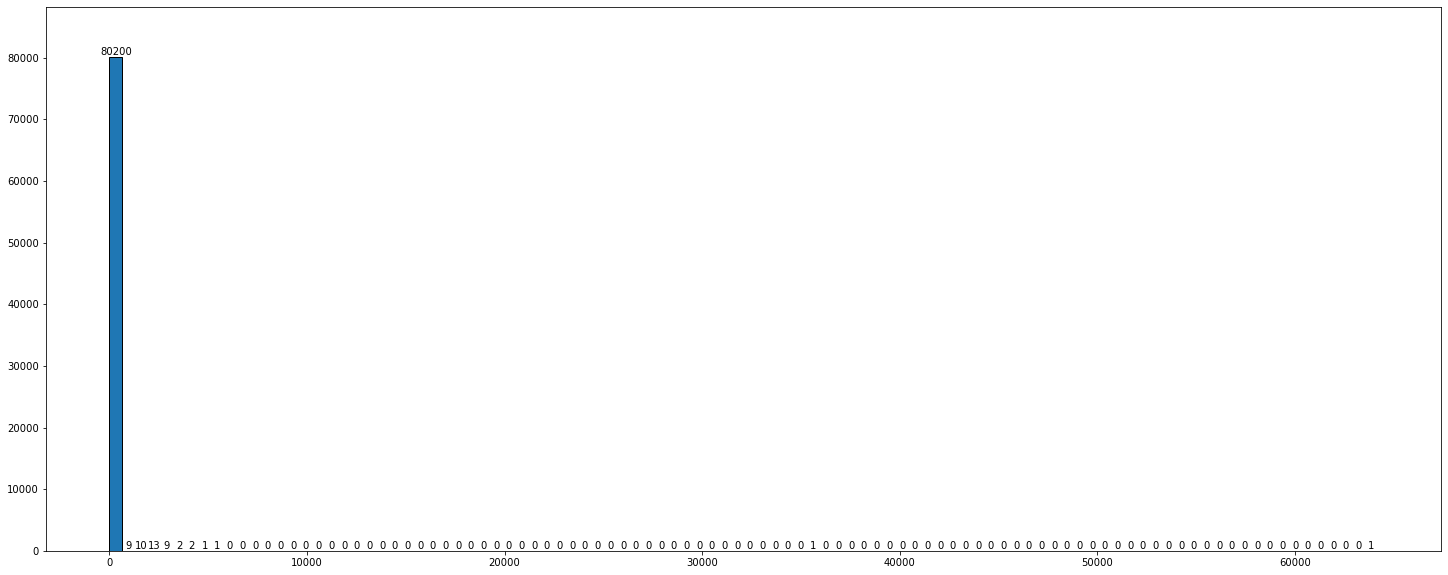

<Figure size 432x288 with 0 Axes>

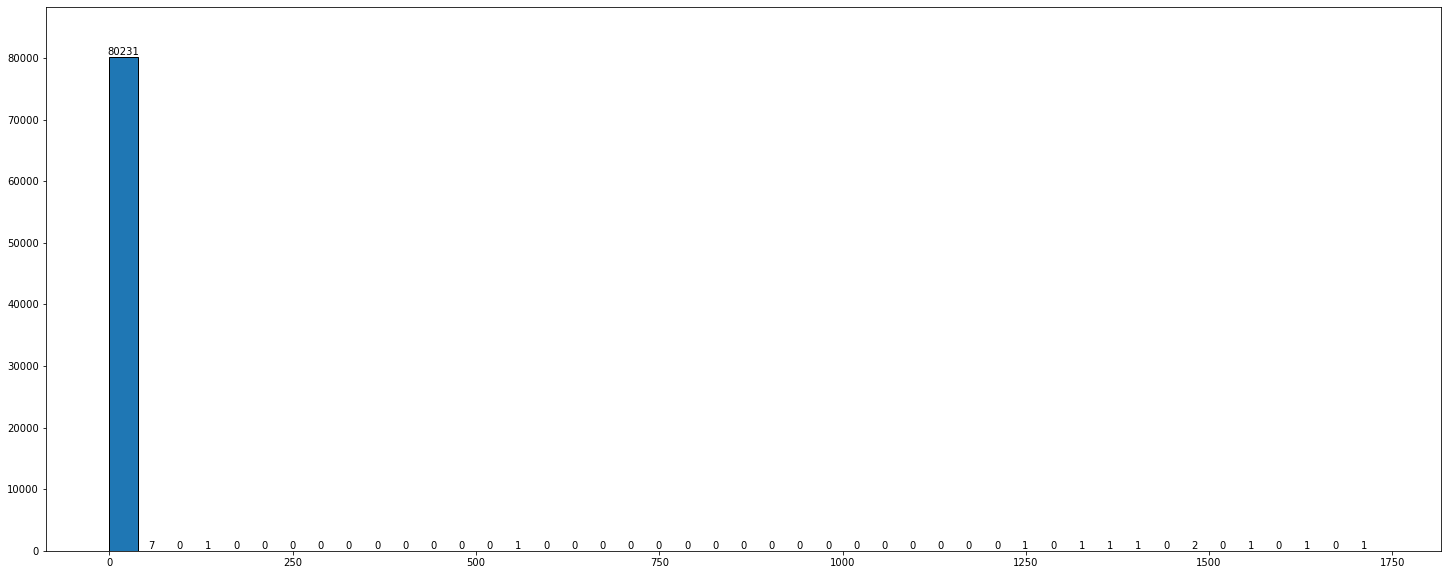

<Figure size 432x288 with 0 Axes>

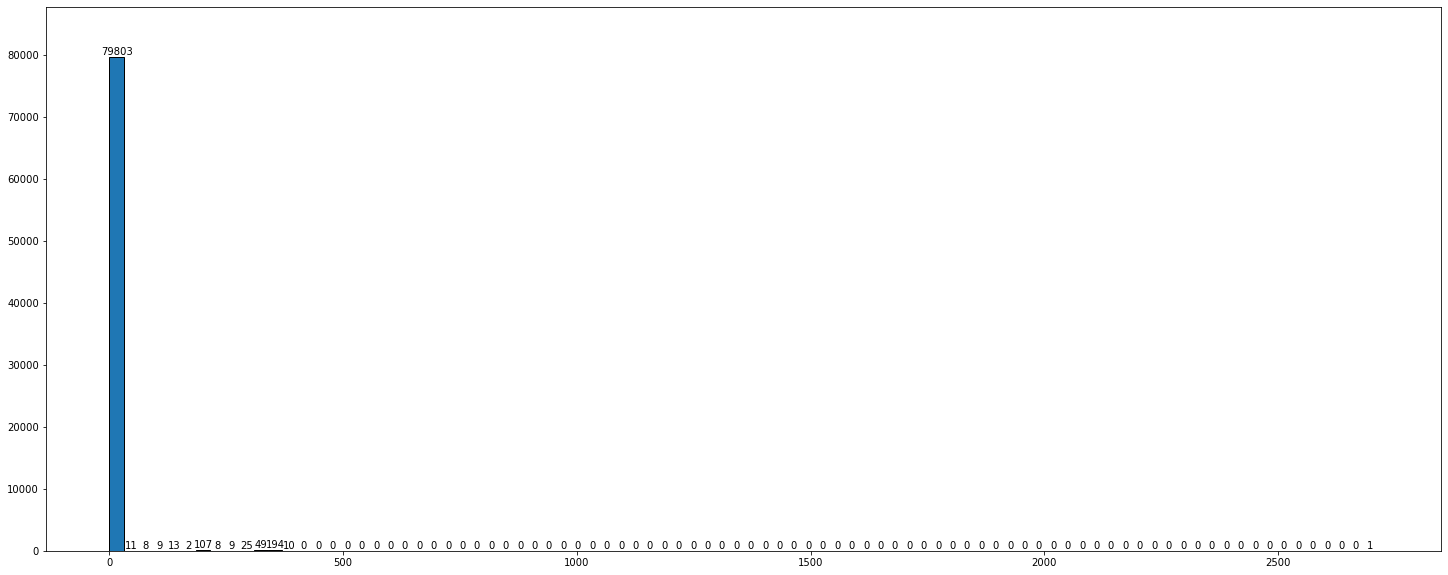

<Figure size 432x288 with 0 Axes>

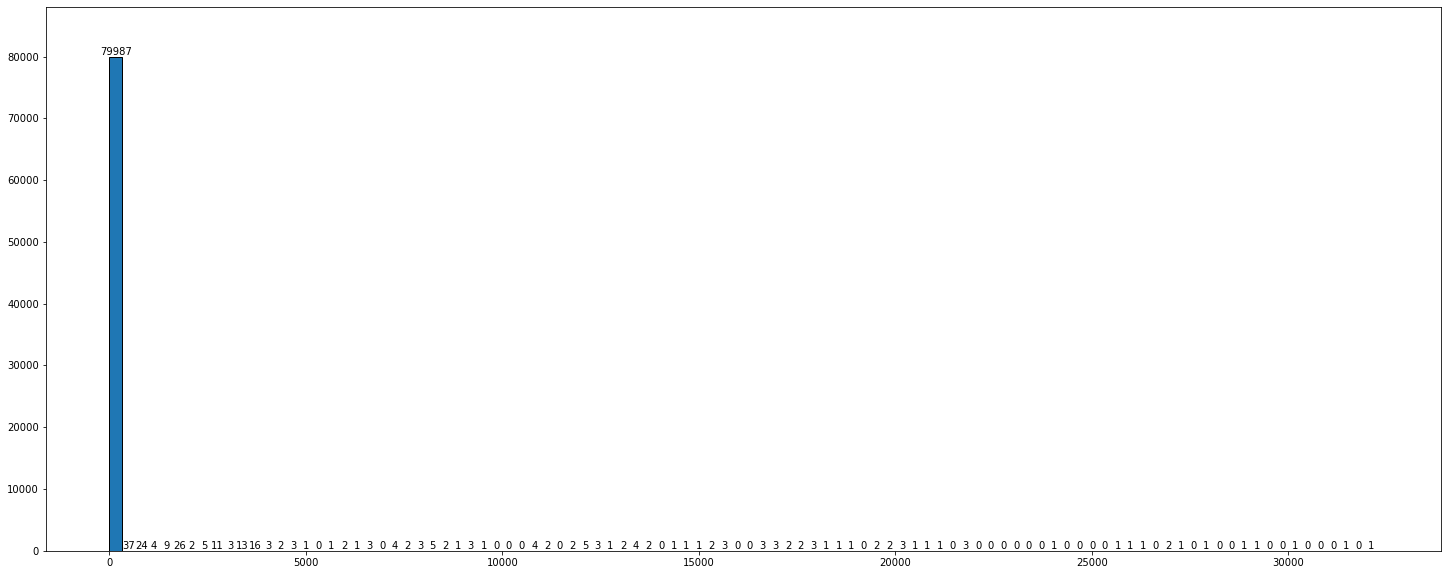

<Figure size 432x288 with 0 Axes>

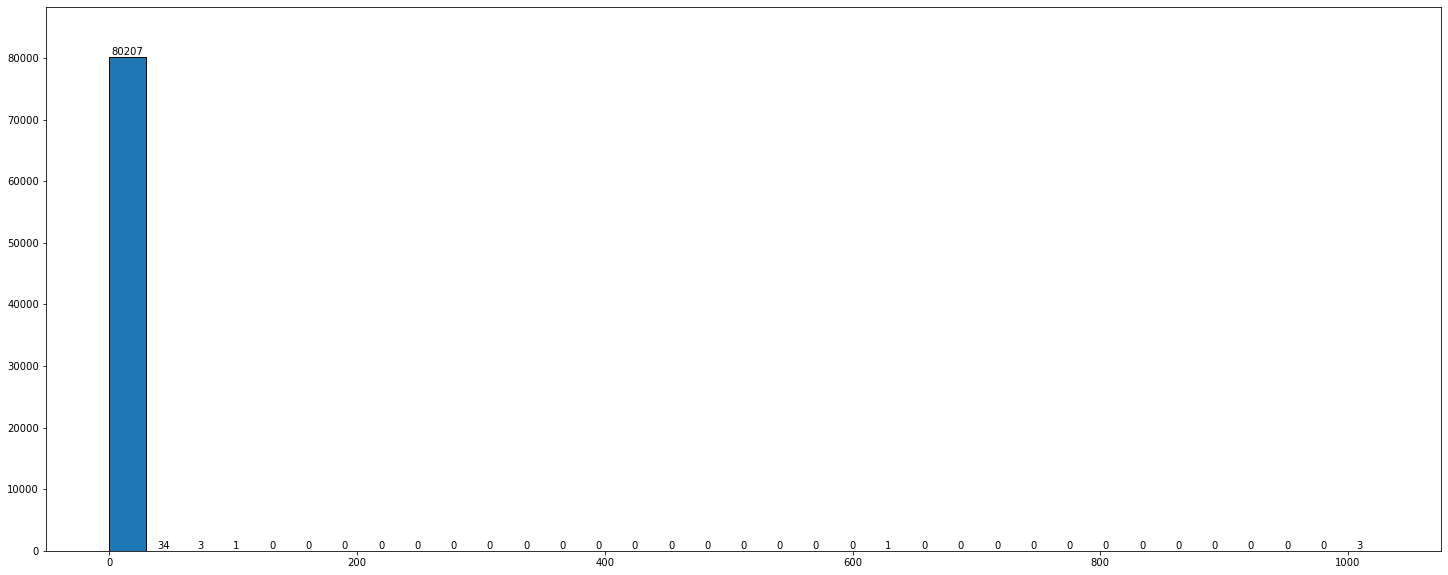

<Figure size 432x288 with 0 Axes>

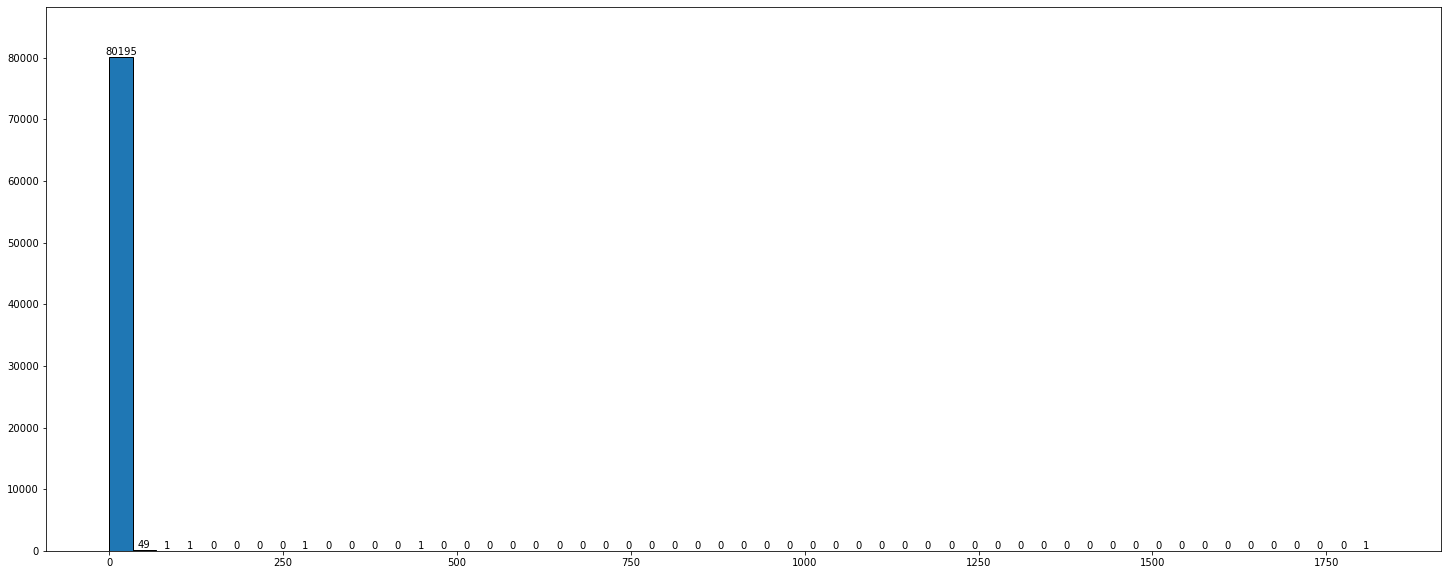

<Figure size 432x288 with 0 Axes>

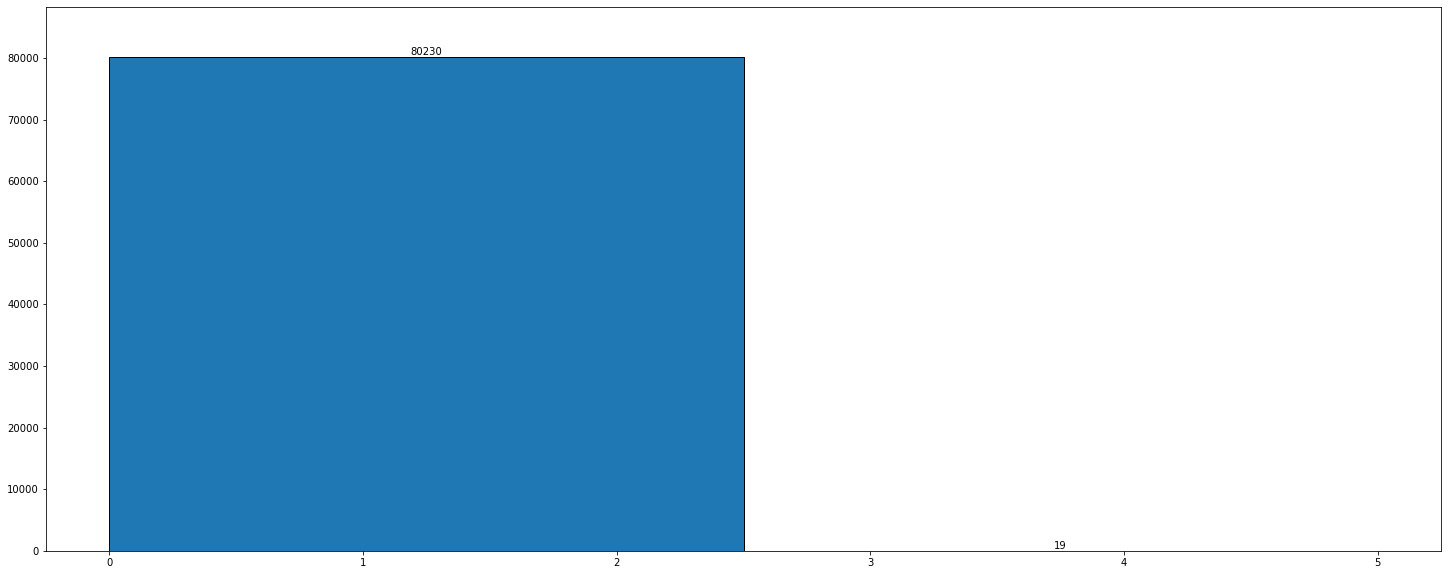

<Figure size 432x288 with 0 Axes>

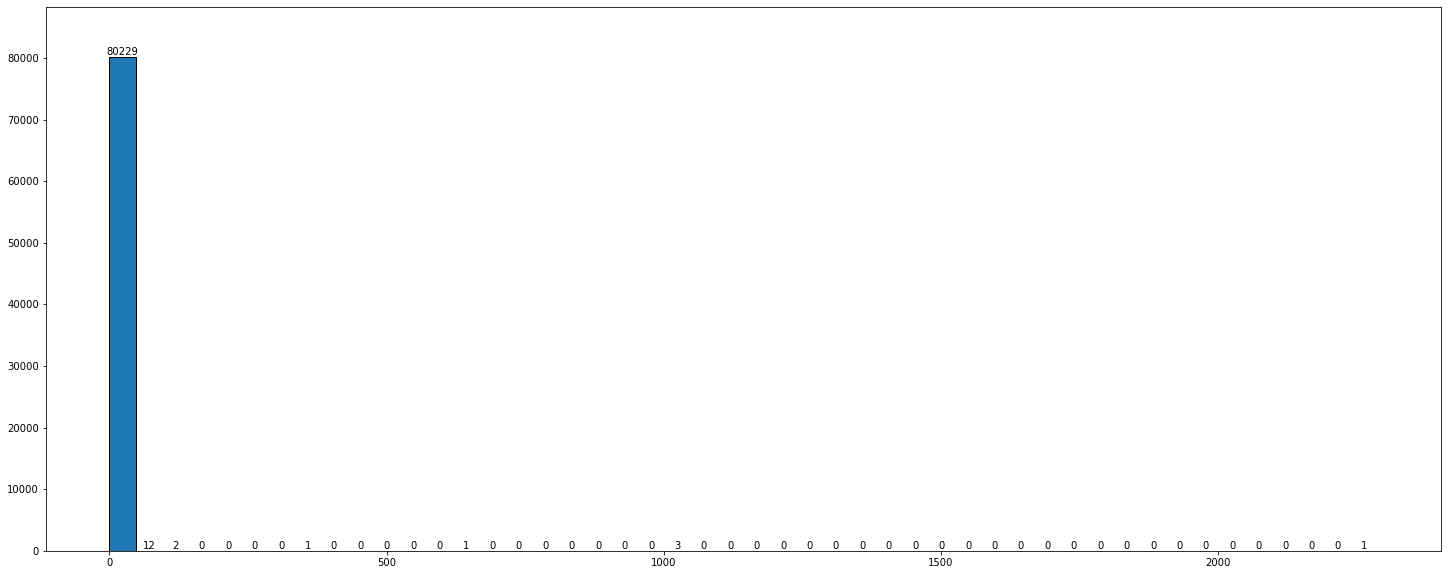

<Figure size 432x288 with 0 Axes>

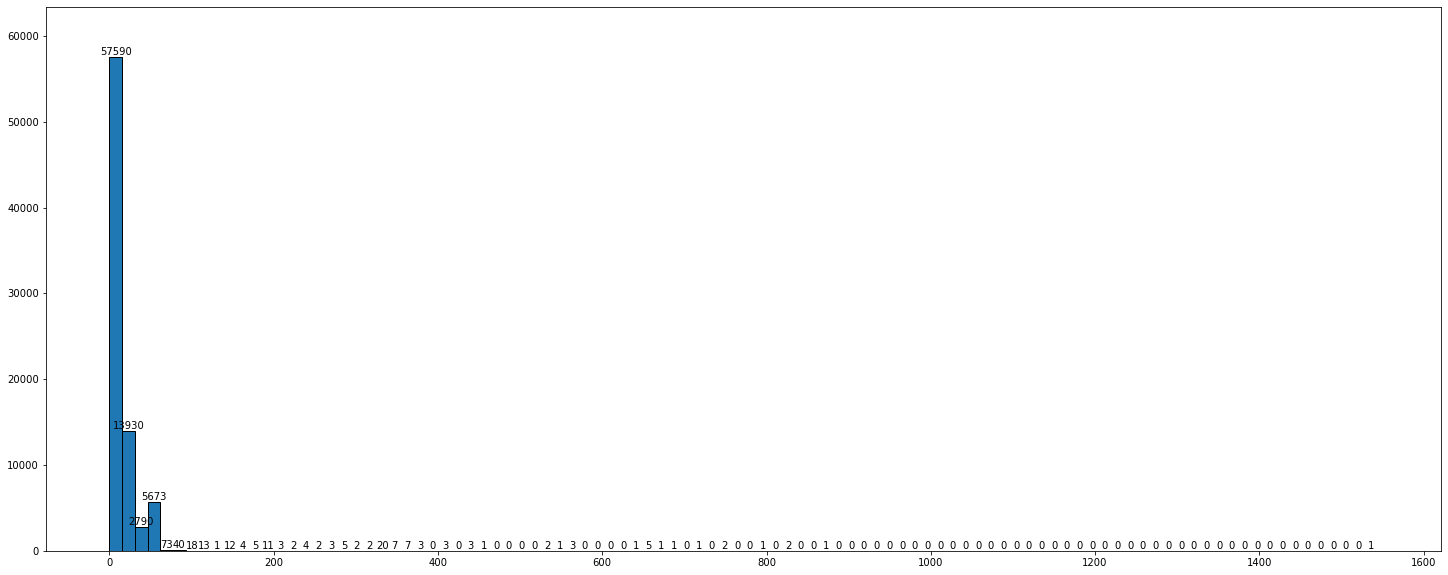

<Figure size 432x288 with 0 Axes>

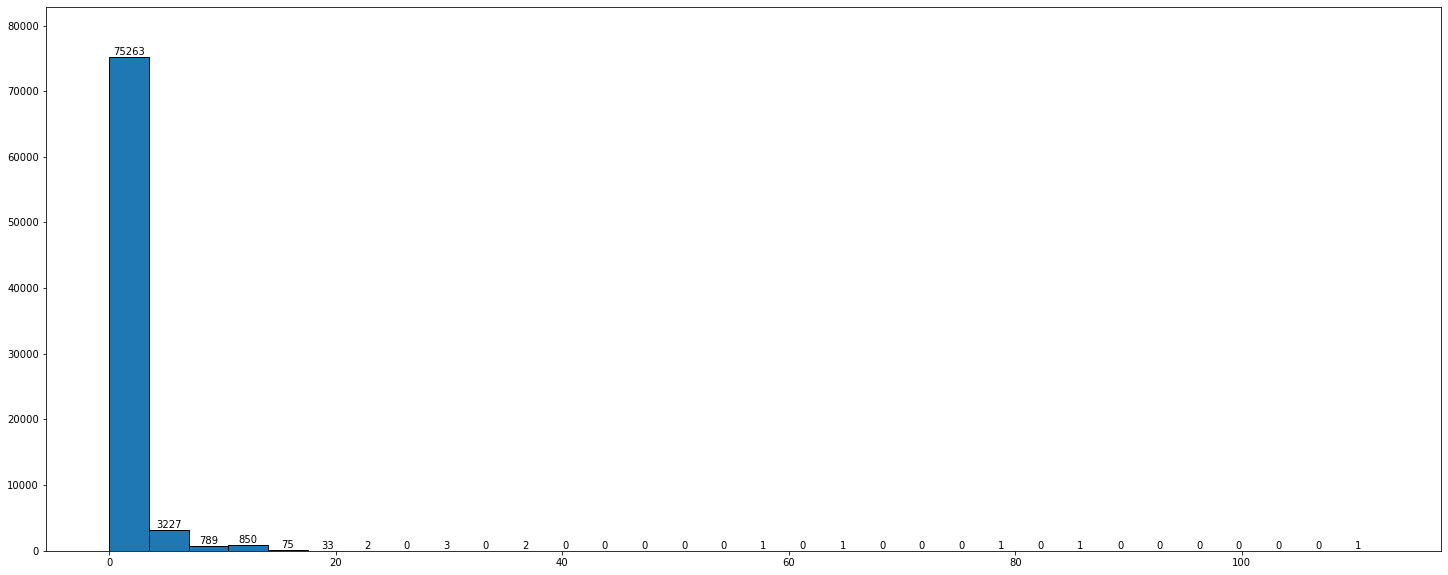

<Figure size 432x288 with 0 Axes>

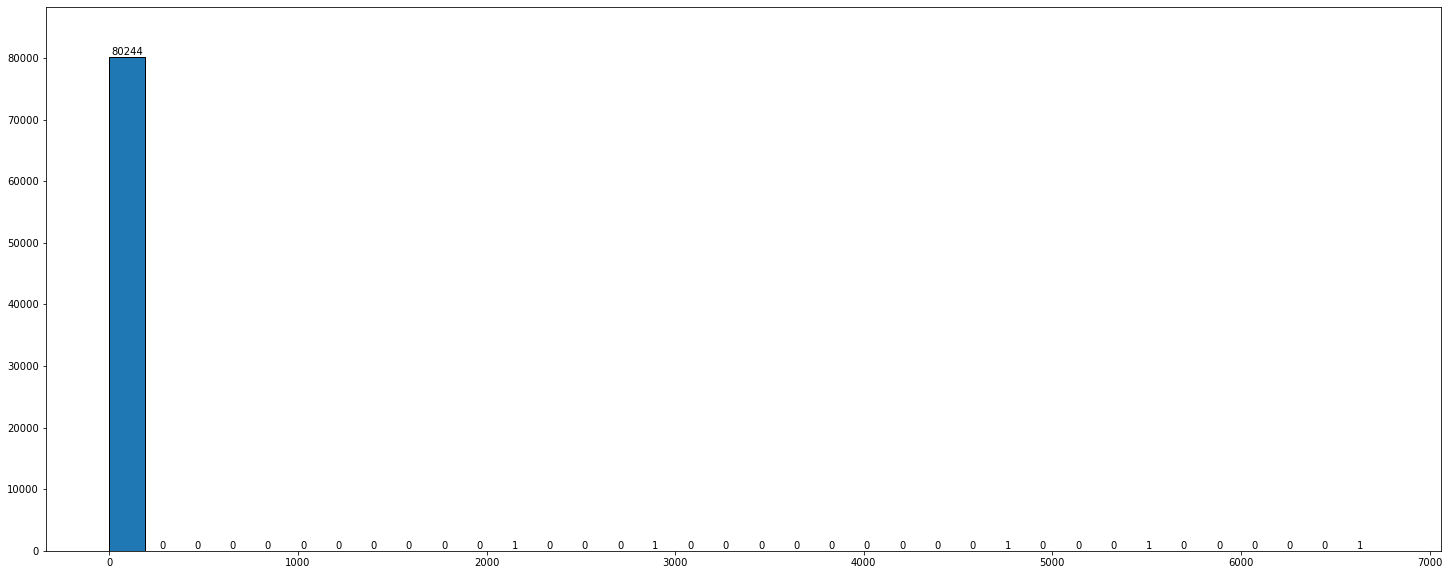

<Figure size 432x288 with 0 Axes>

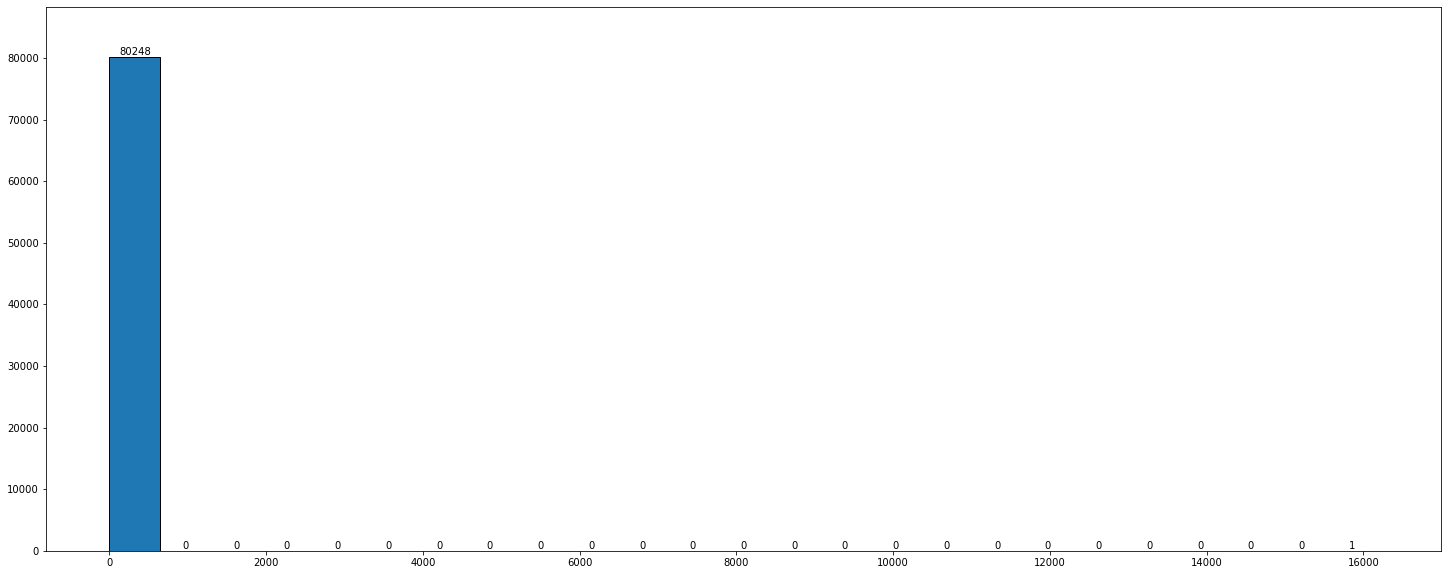

<Figure size 432x288 with 0 Axes>

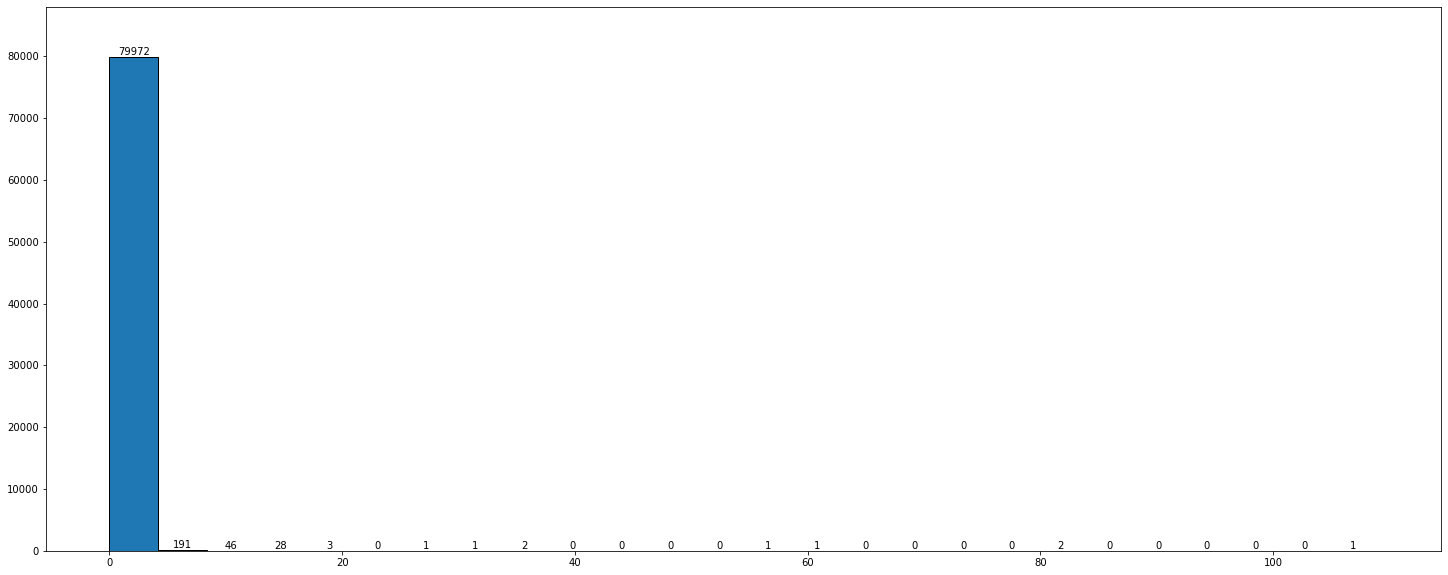

<Figure size 432x288 with 0 Axes>

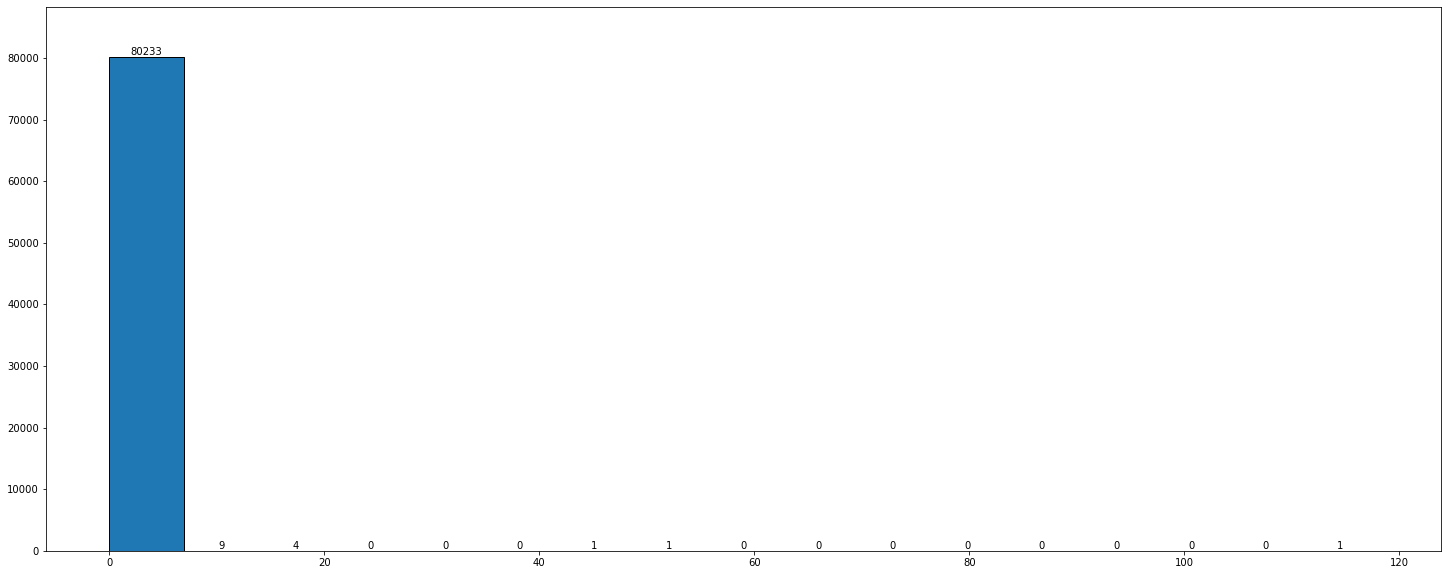

<Figure size 432x288 with 0 Axes>

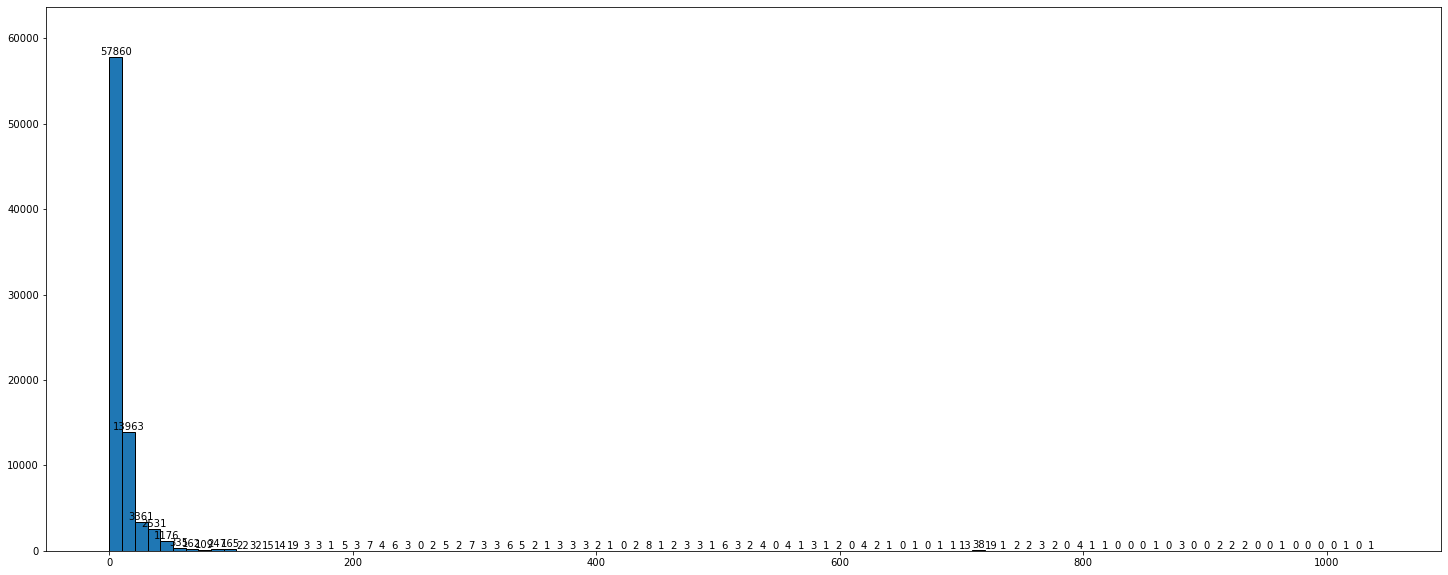

<Figure size 432x288 with 0 Axes>

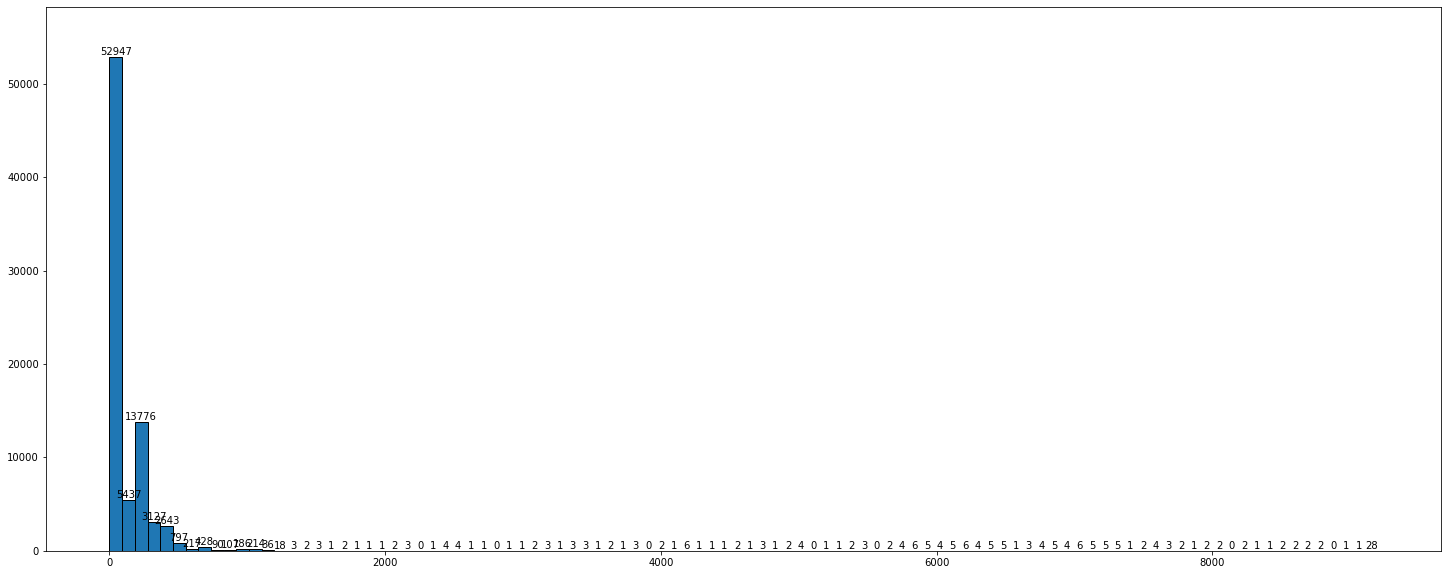

<Figure size 432x288 with 0 Axes>

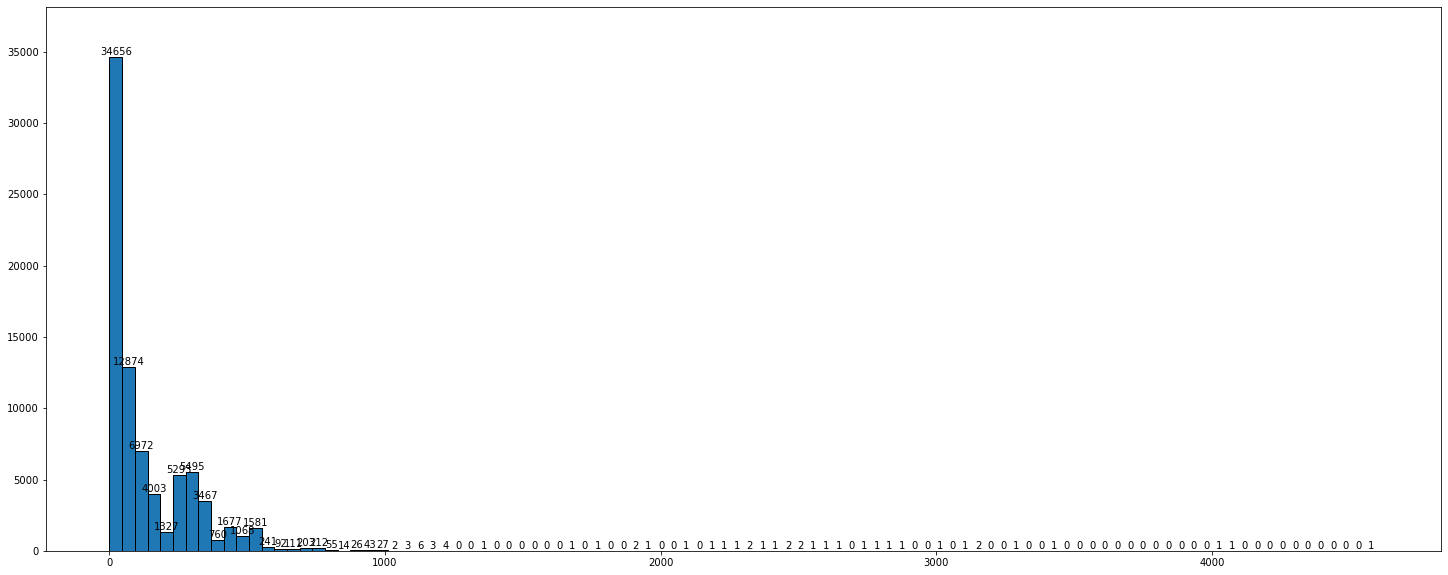

<Figure size 432x288 with 0 Axes>

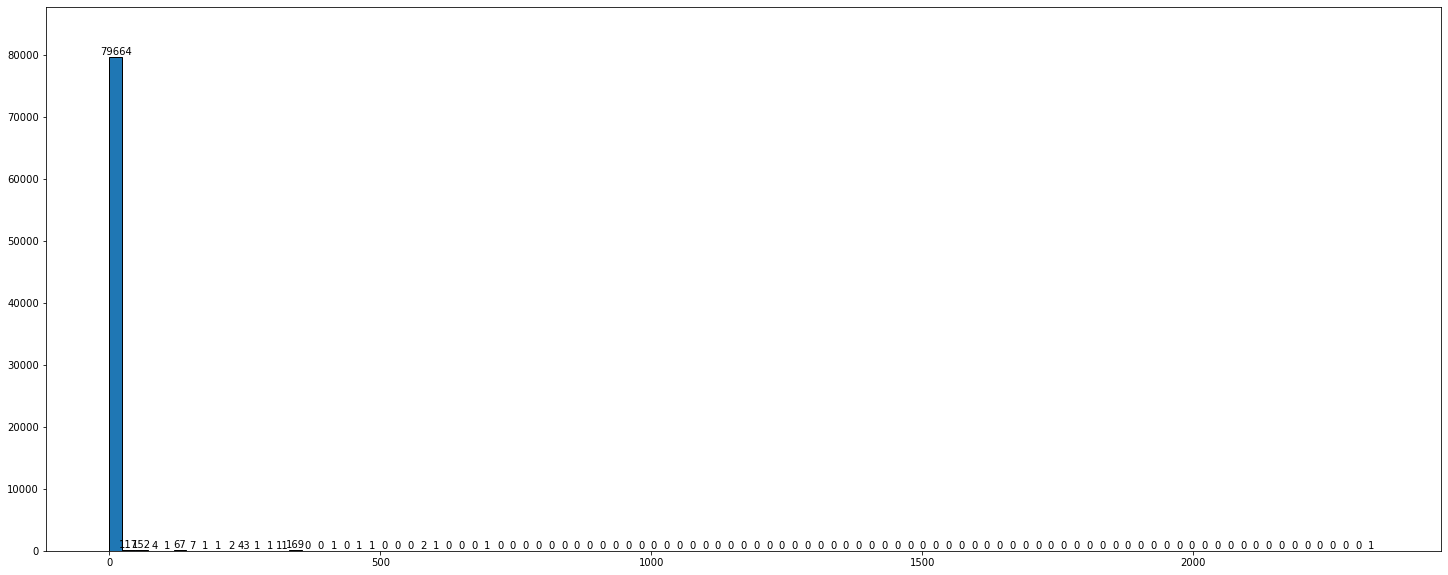

<Figure size 432x288 with 0 Axes>

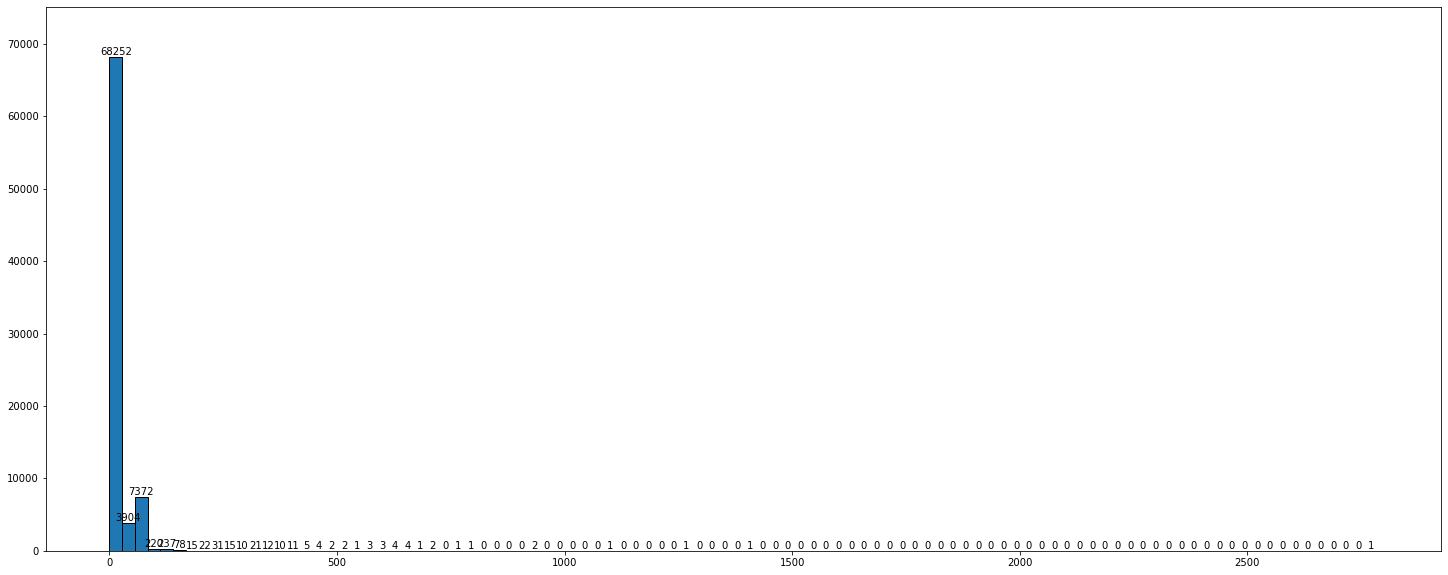

<Figure size 432x288 with 0 Axes>

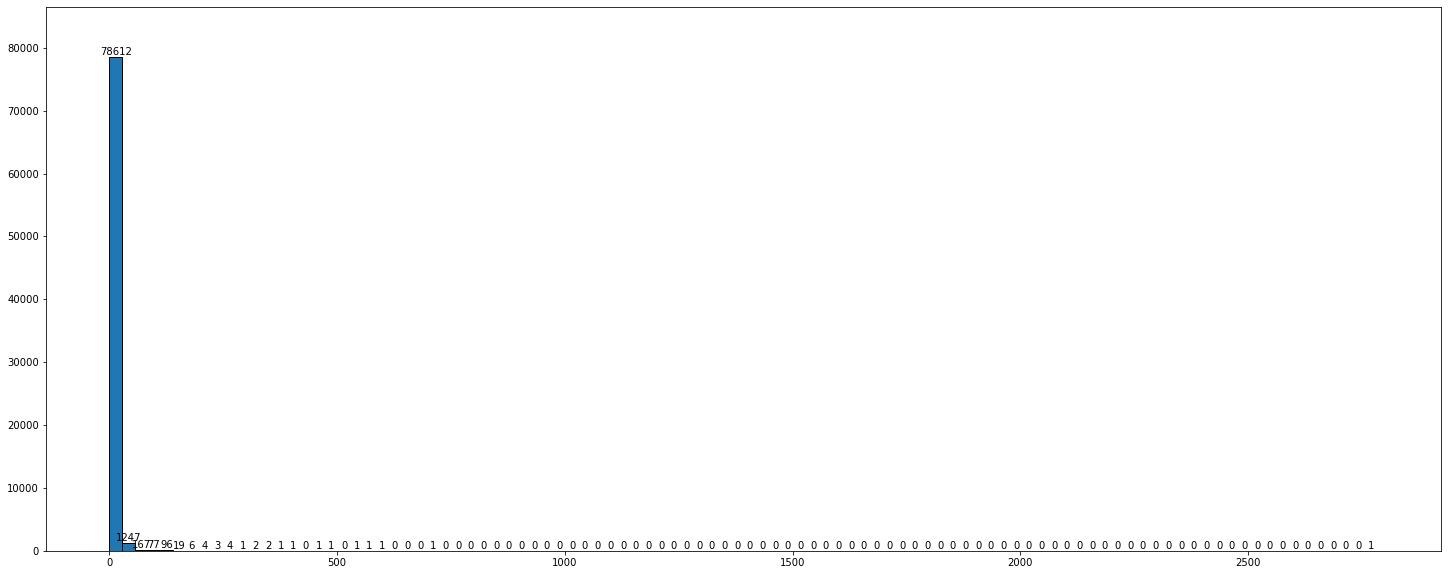

<Figure size 432x288 with 0 Axes>

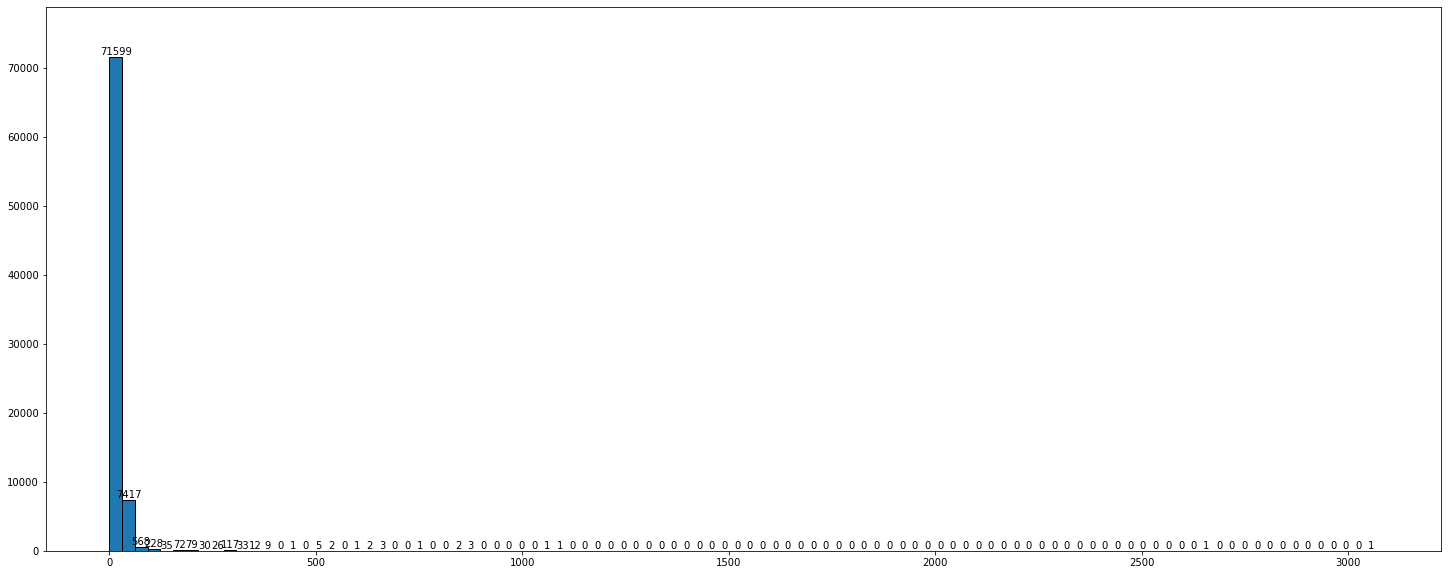

<Figure size 432x288 with 0 Axes>

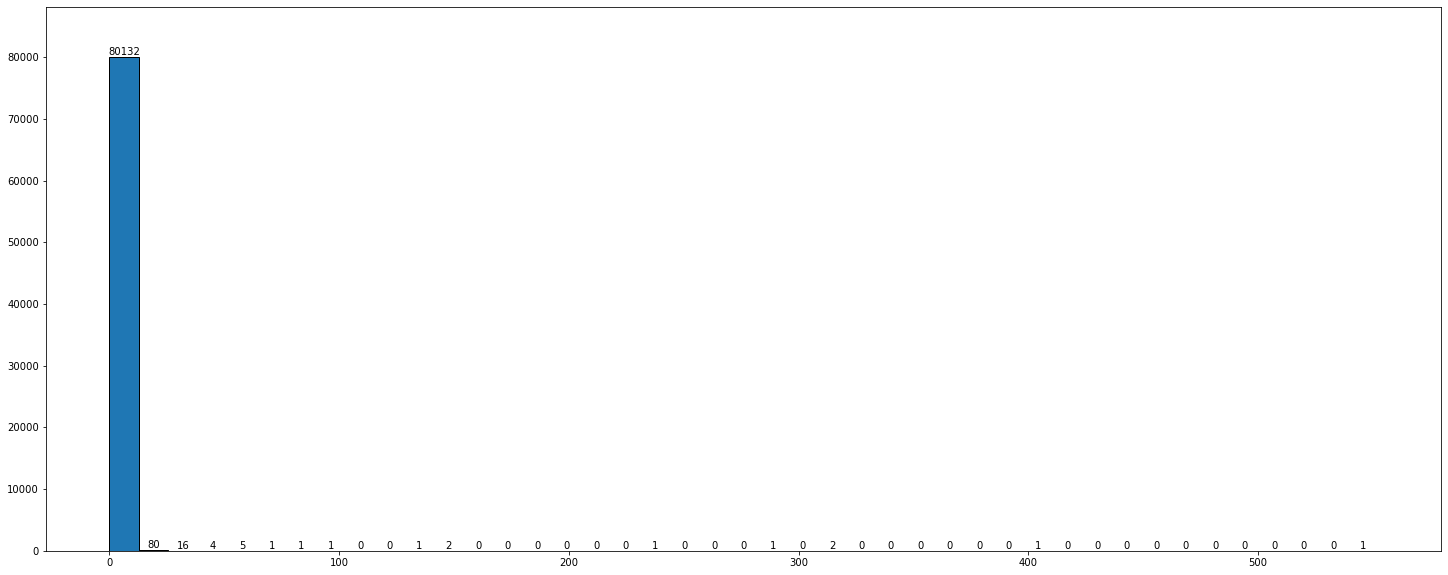

<Figure size 432x288 with 0 Axes>

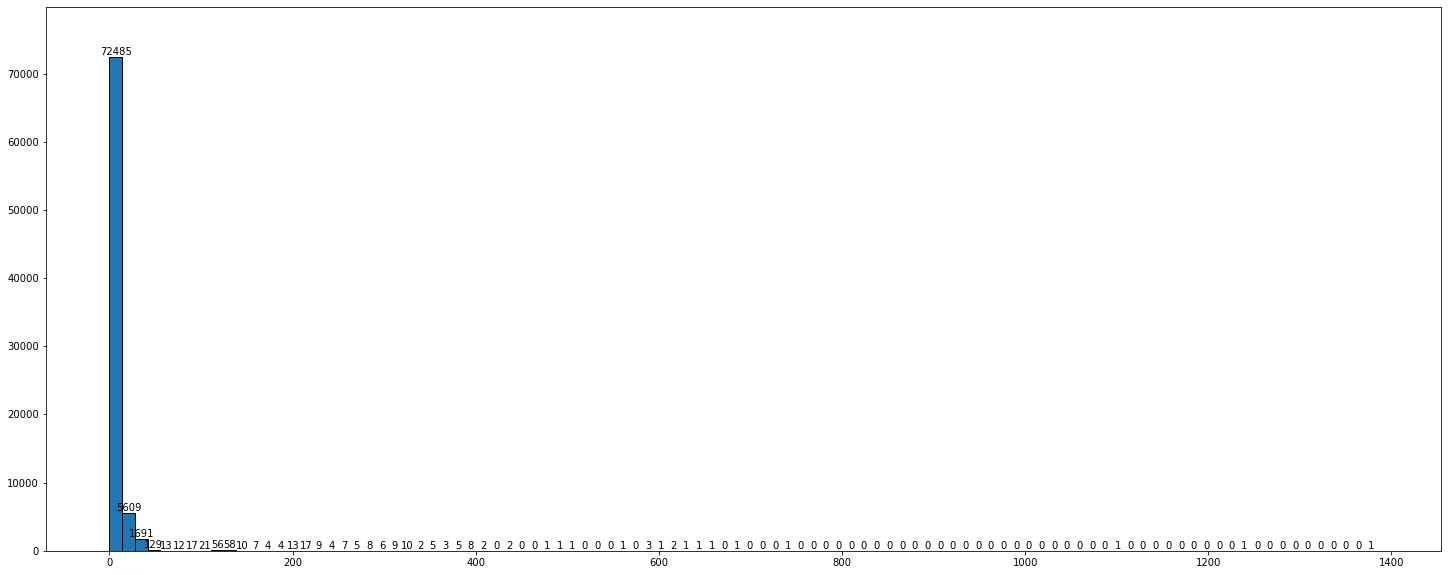

<Figure size 432x288 with 0 Axes>

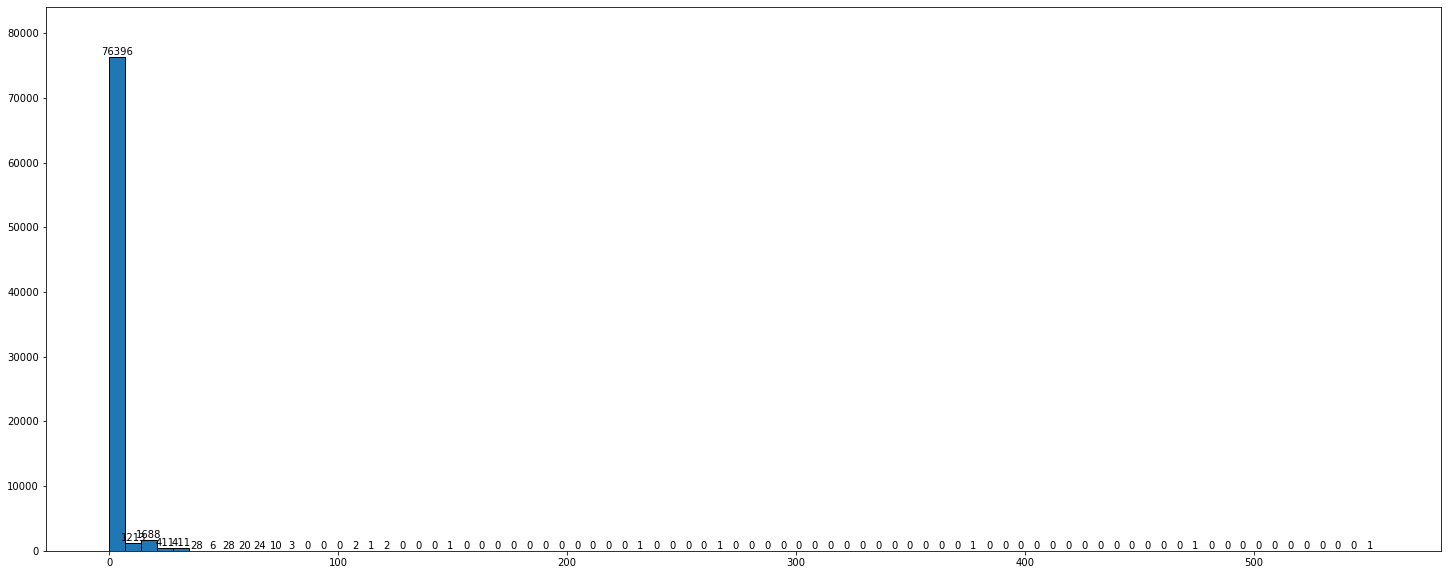

<Figure size 432x288 with 0 Axes>

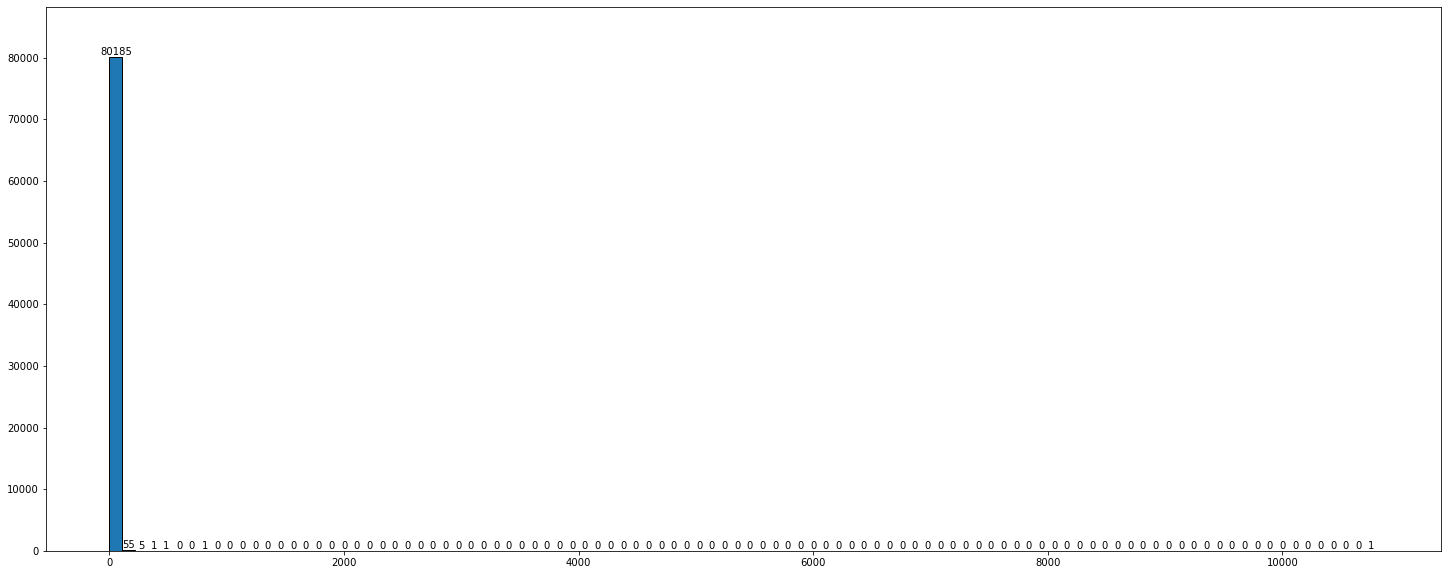

<Figure size 432x288 with 0 Axes>

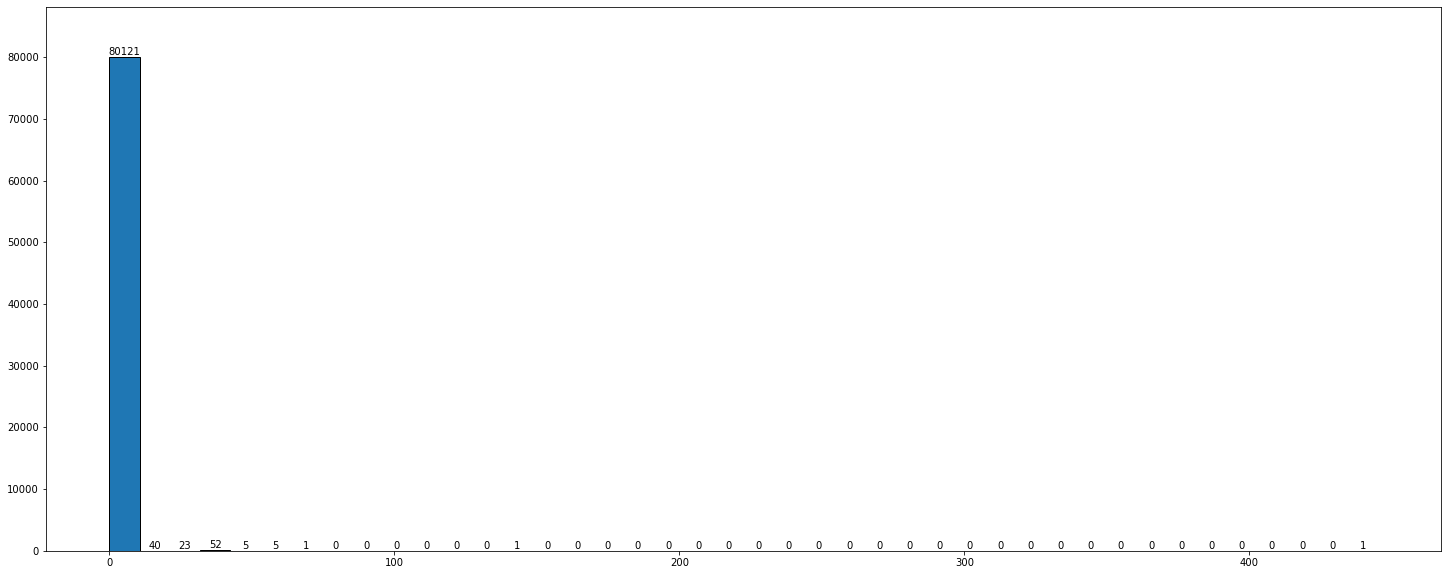

<Figure size 432x288 with 0 Axes>

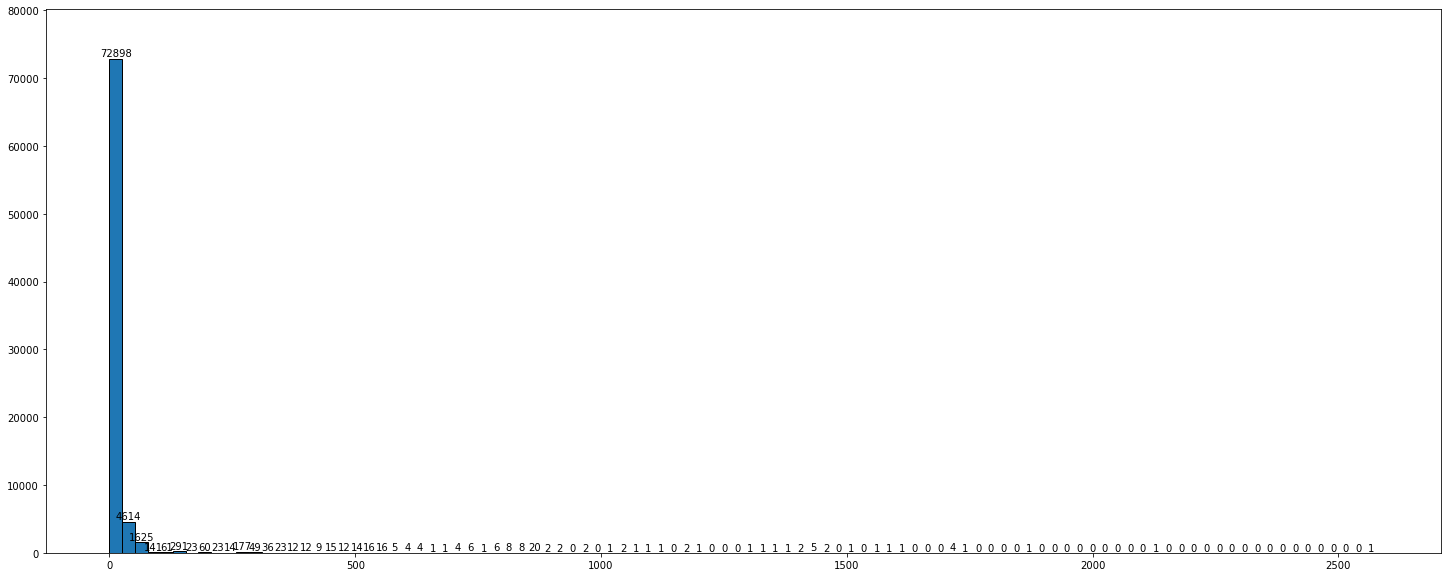

<Figure size 432x288 with 0 Axes>

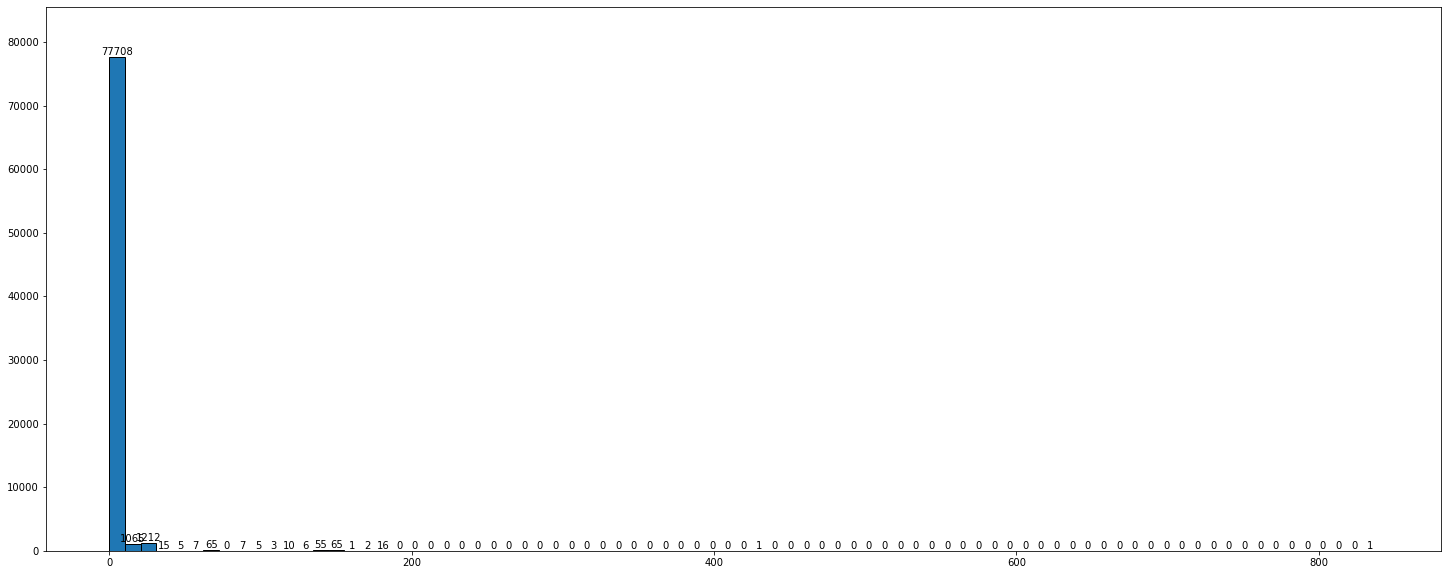

<Figure size 432x288 with 0 Axes>

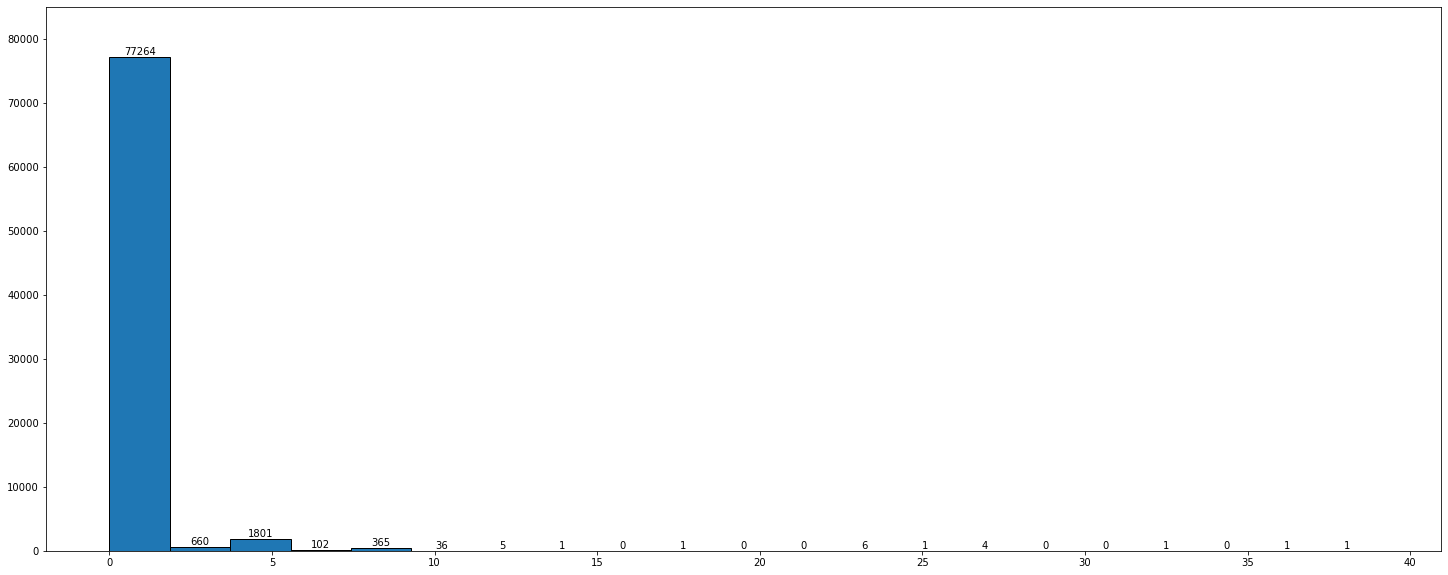

<Figure size 432x288 with 0 Axes>

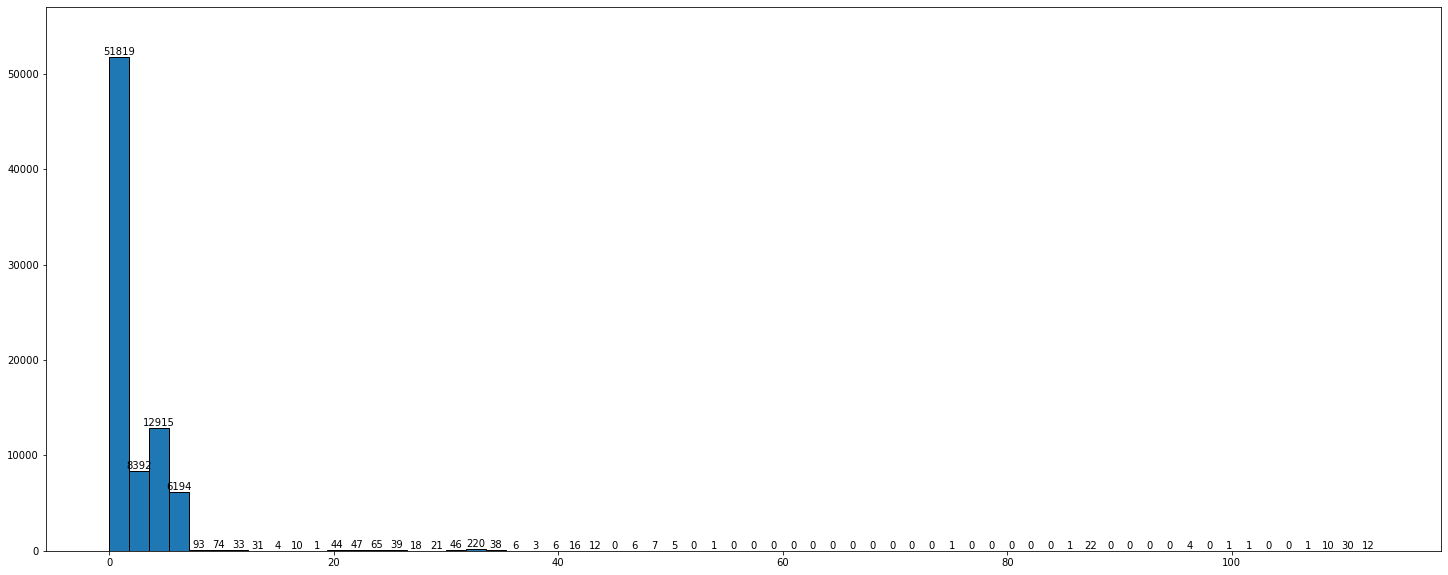

<Figure size 432x288 with 0 Axes>

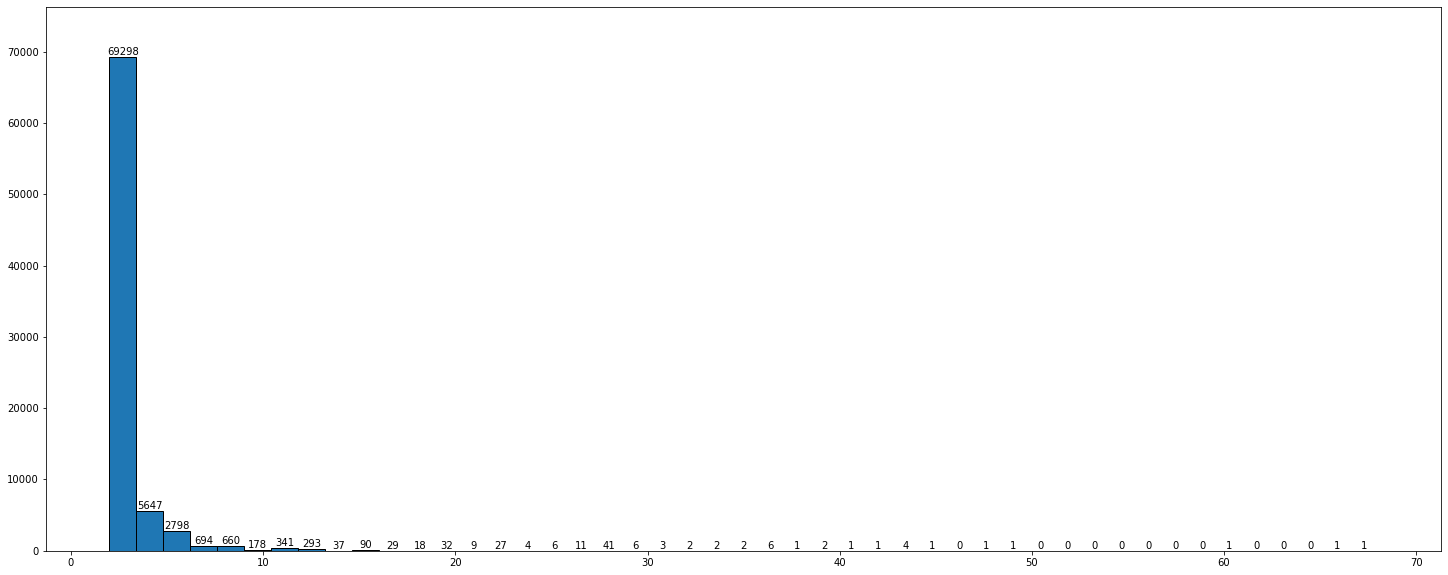

<Figure size 432x288 with 0 Axes>

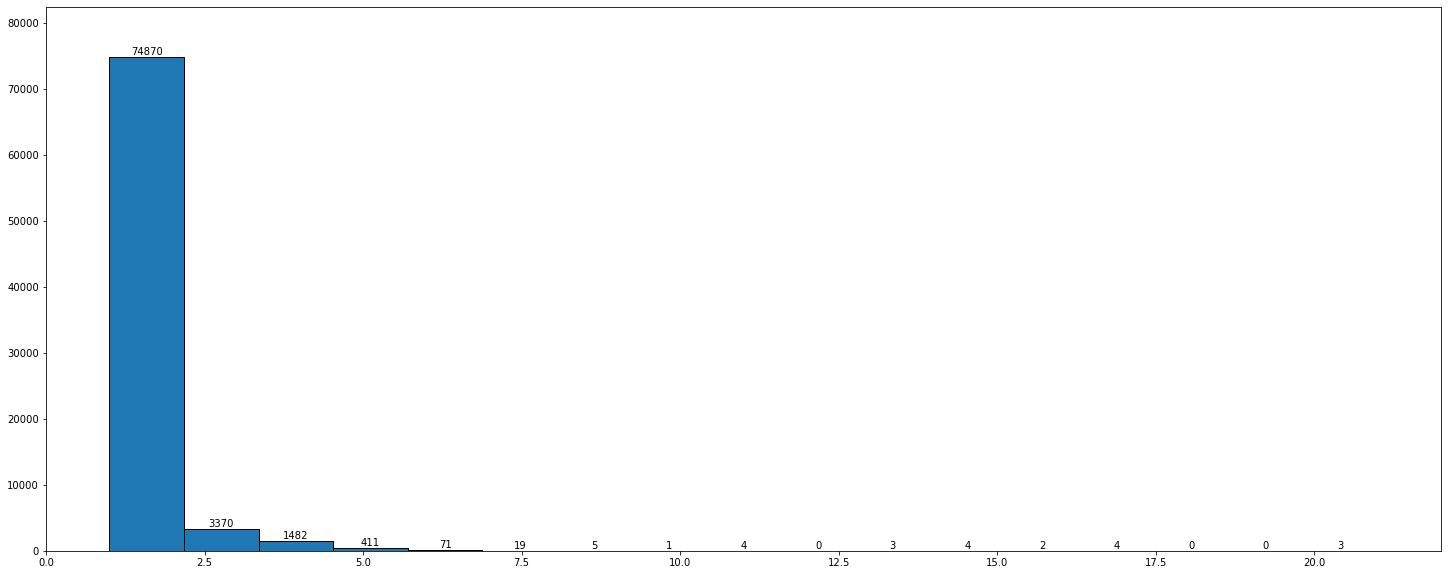

<Figure size 432x288 with 0 Axes>

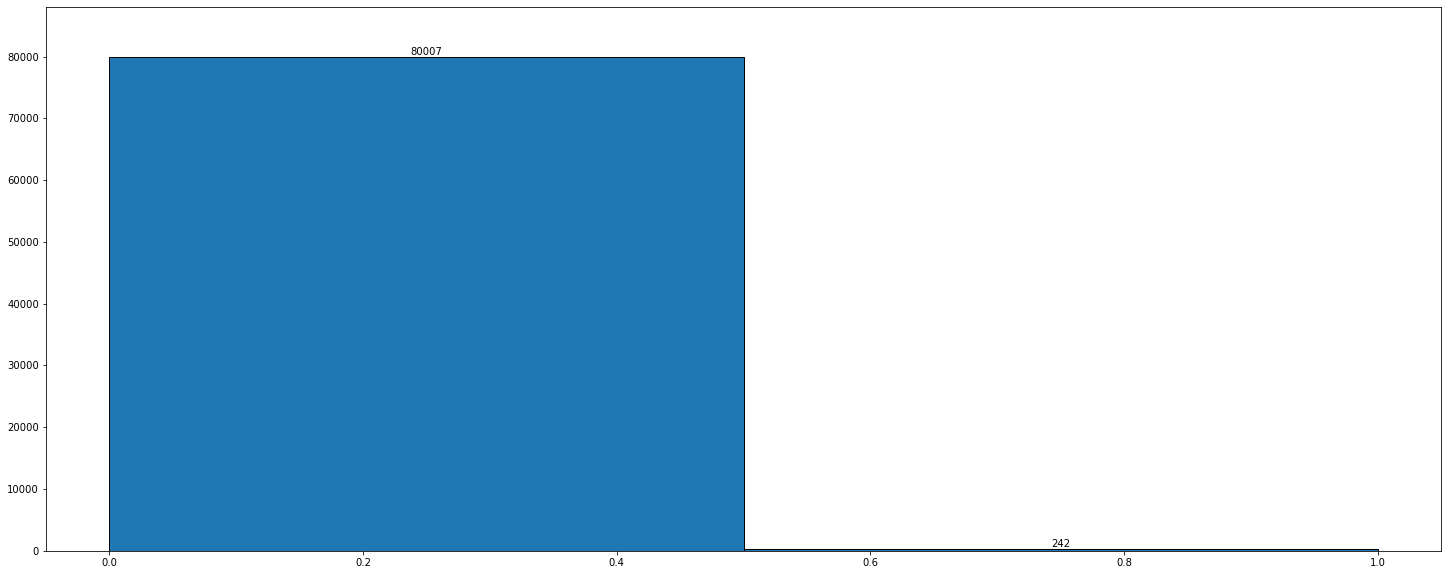

<Figure size 432x288 with 0 Axes>

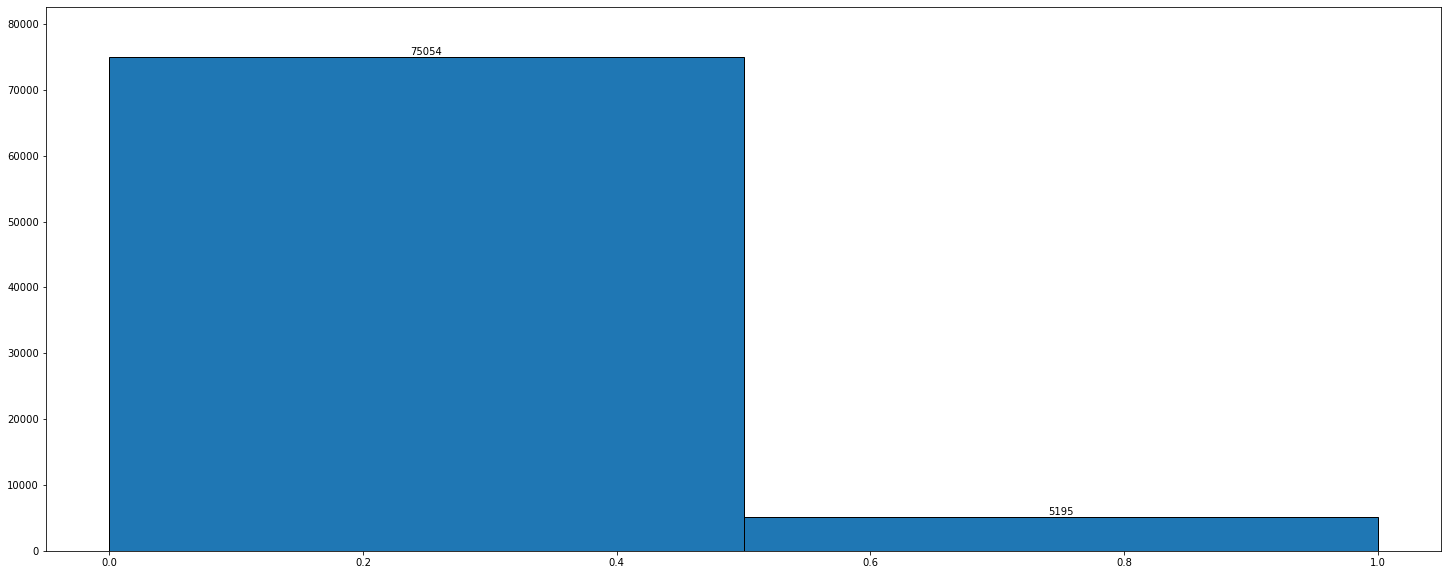

<Figure size 432x288 with 0 Axes>

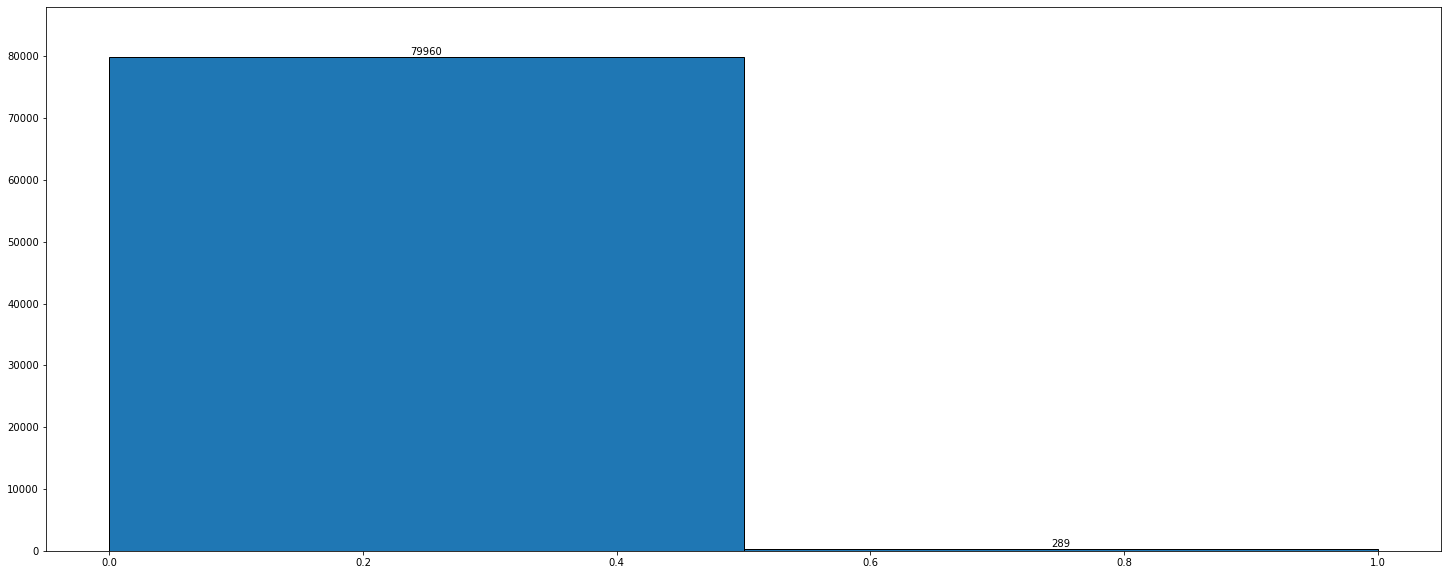

<Figure size 432x288 with 0 Axes>

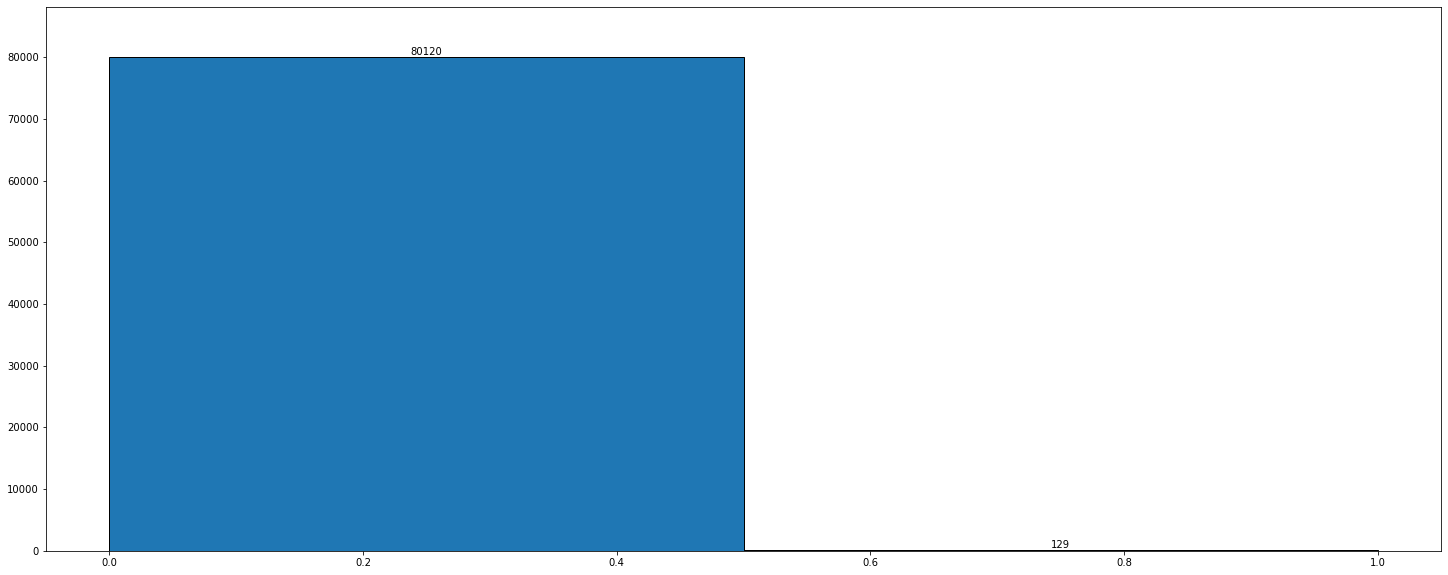

<Figure size 432x288 with 0 Axes>

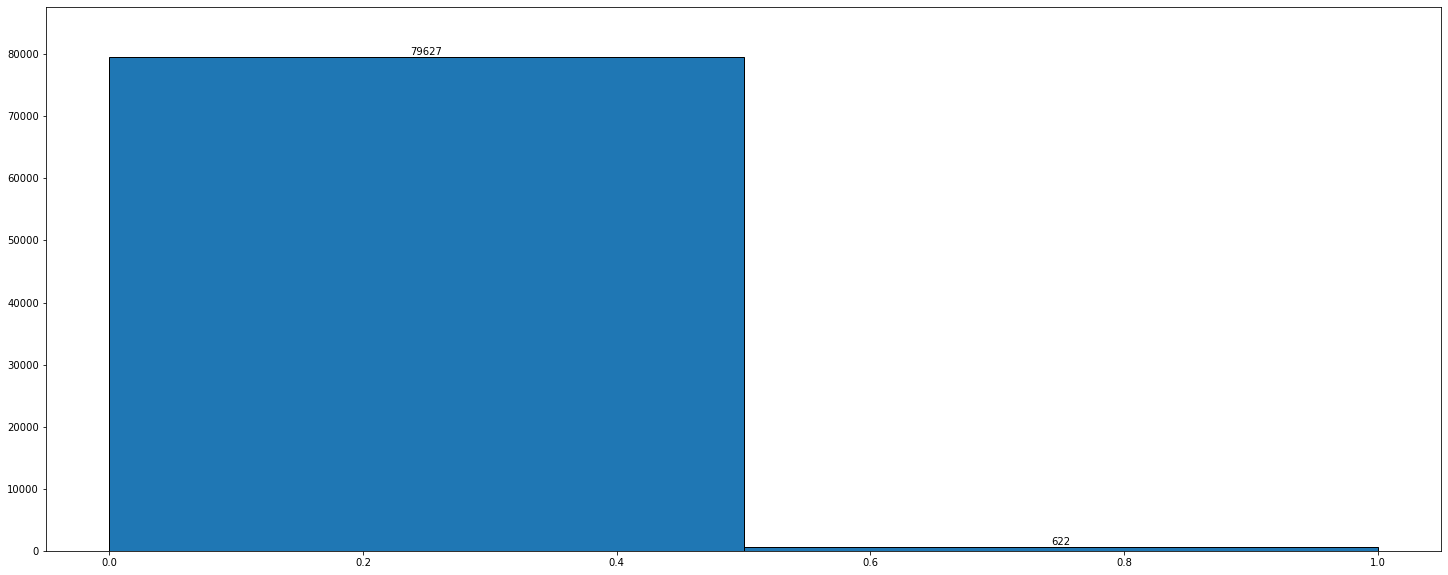

<Figure size 432x288 with 0 Axes>

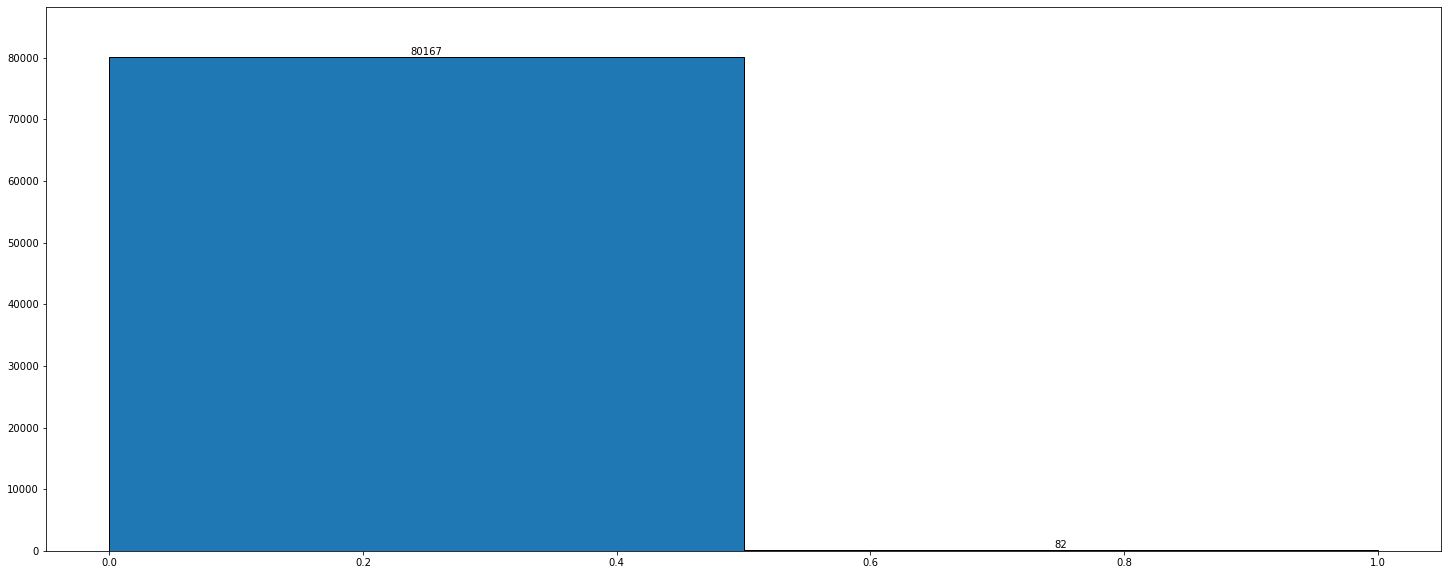

<Figure size 432x288 with 0 Axes>

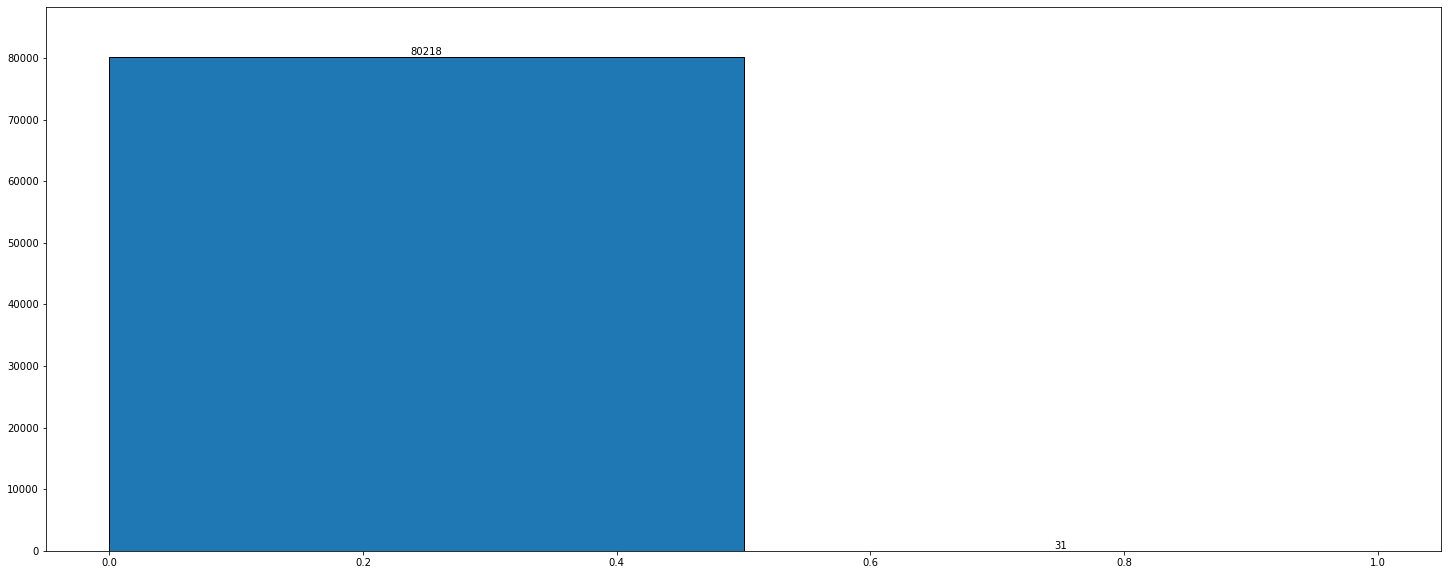

<Figure size 432x288 with 0 Axes>

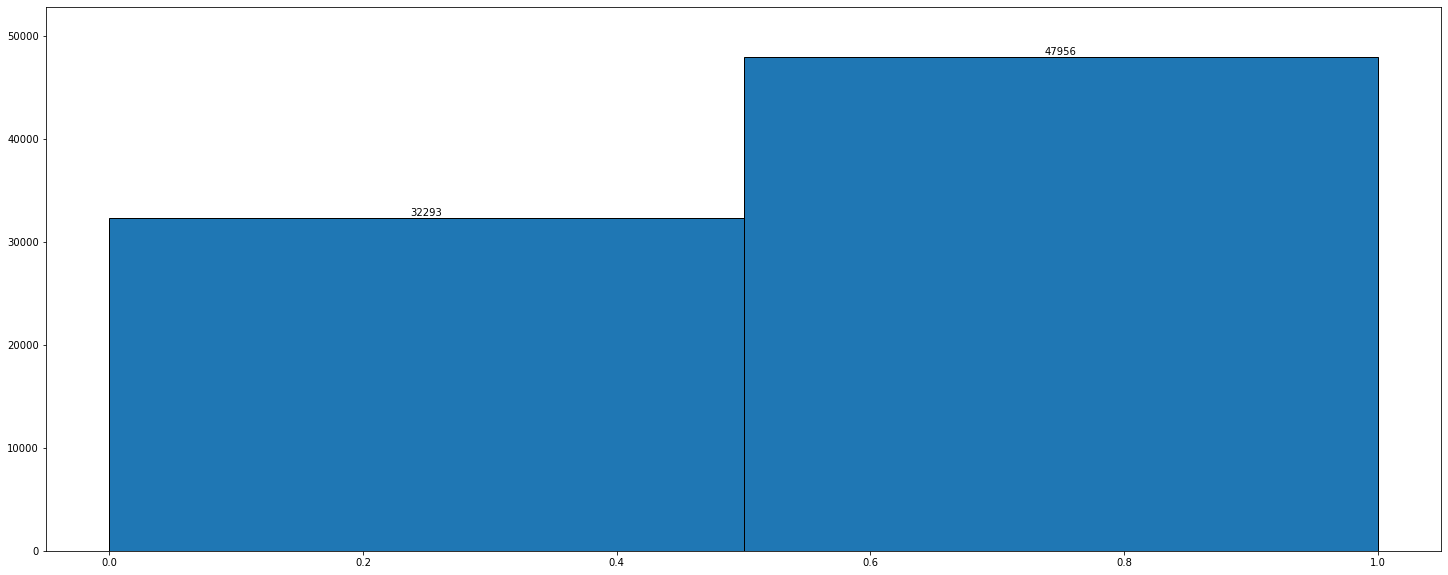

<Figure size 432x288 with 0 Axes>

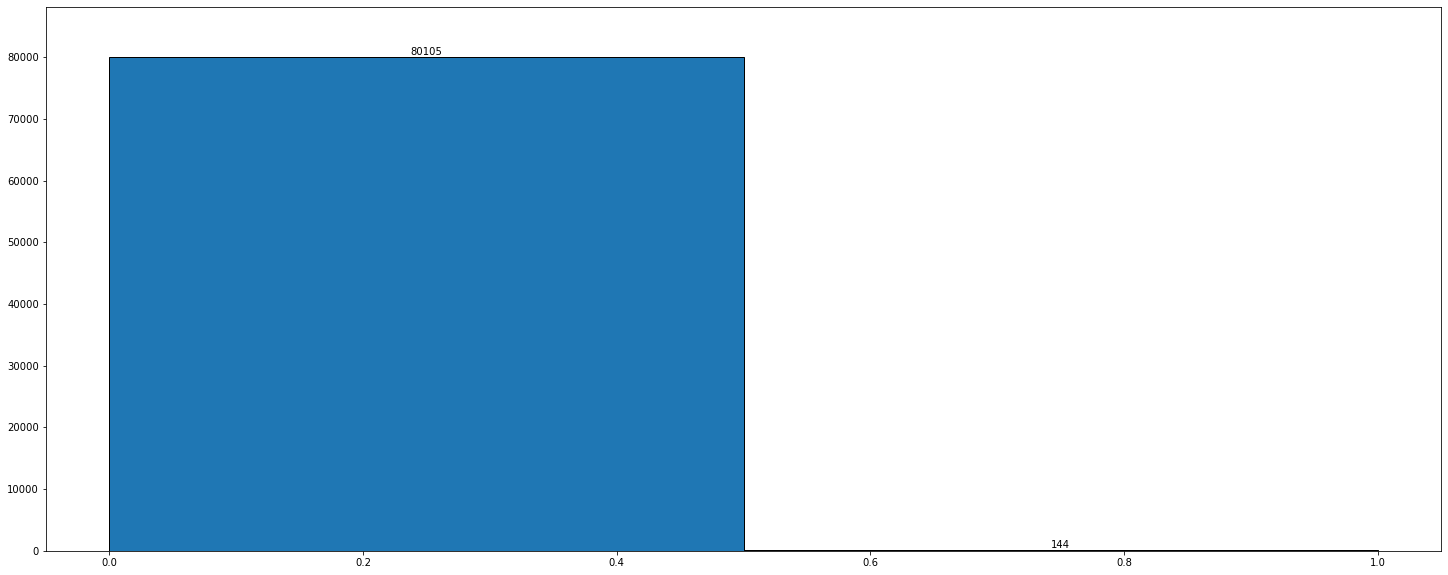

<Figure size 432x288 with 0 Axes>

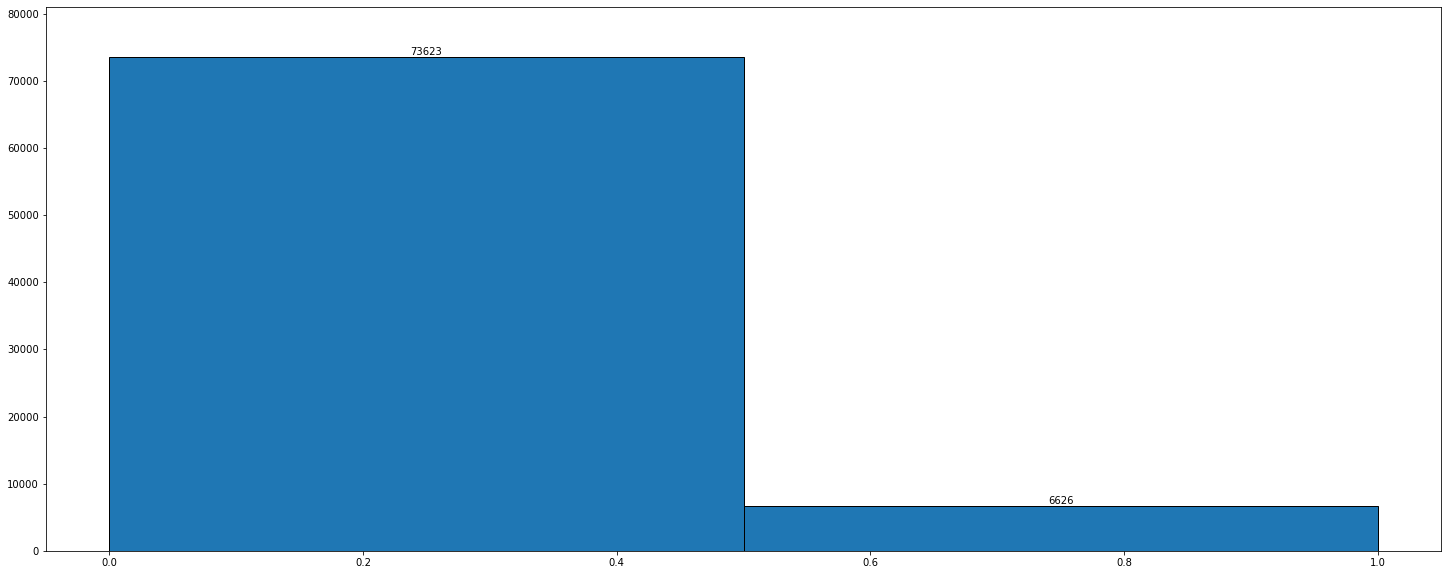

<Figure size 432x288 with 0 Axes>

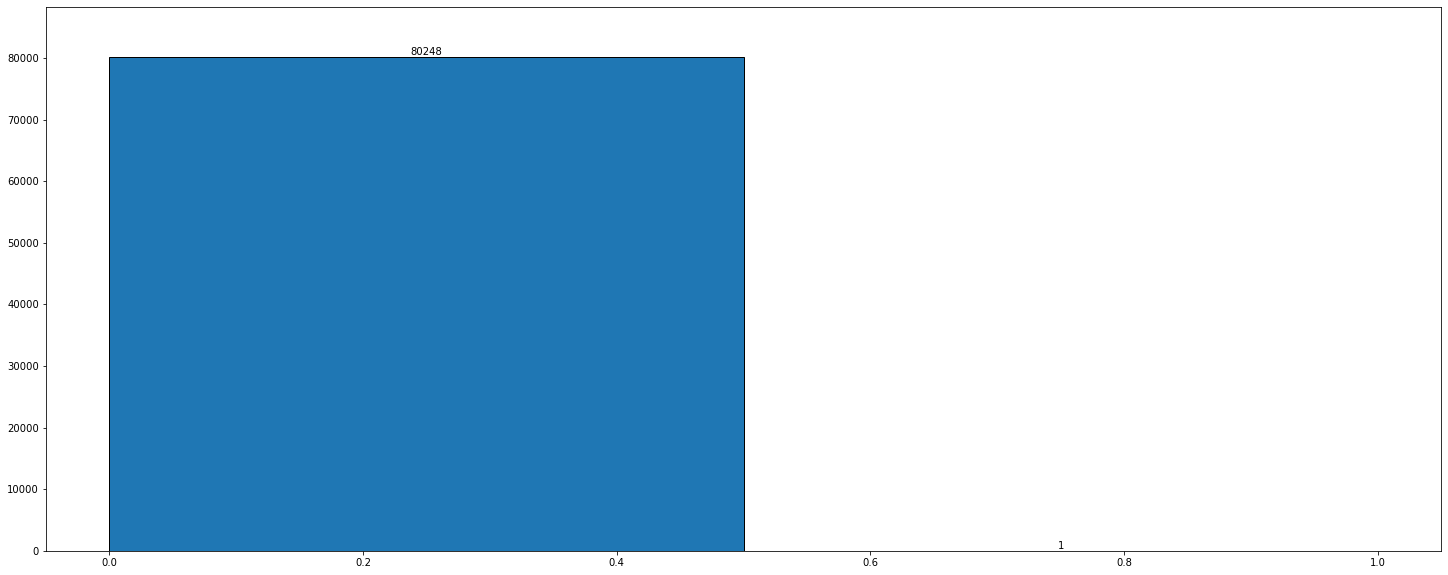

<Figure size 432x288 with 0 Axes>

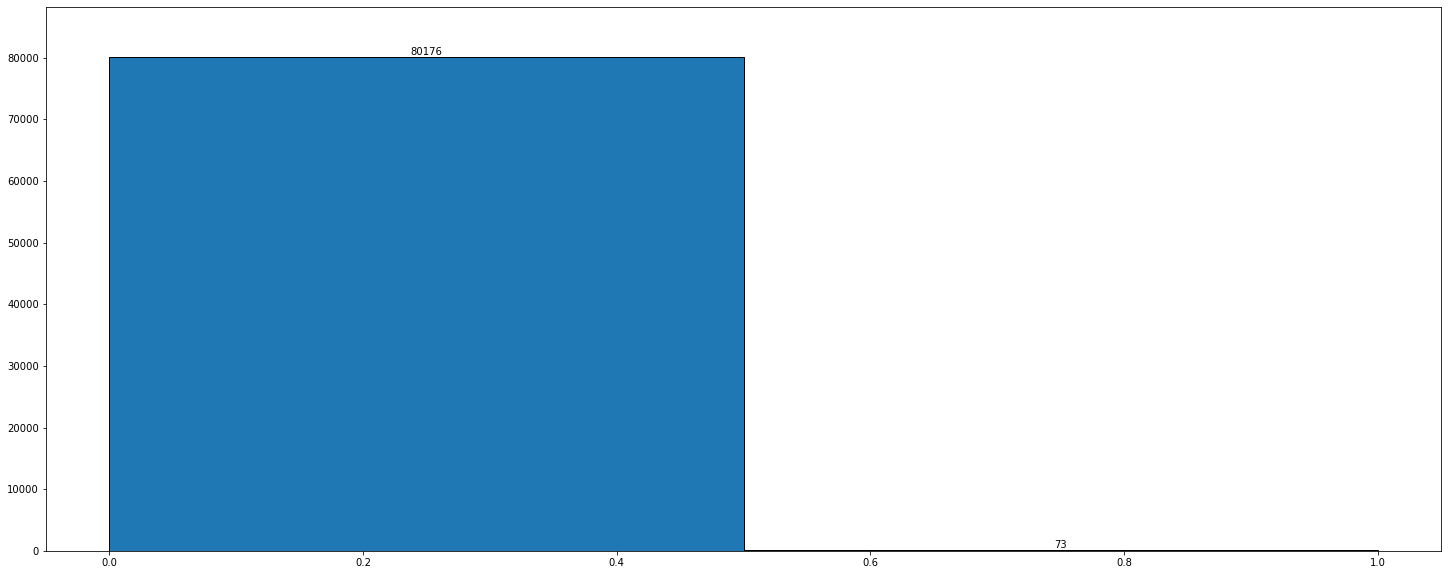

<Figure size 432x288 with 0 Axes>

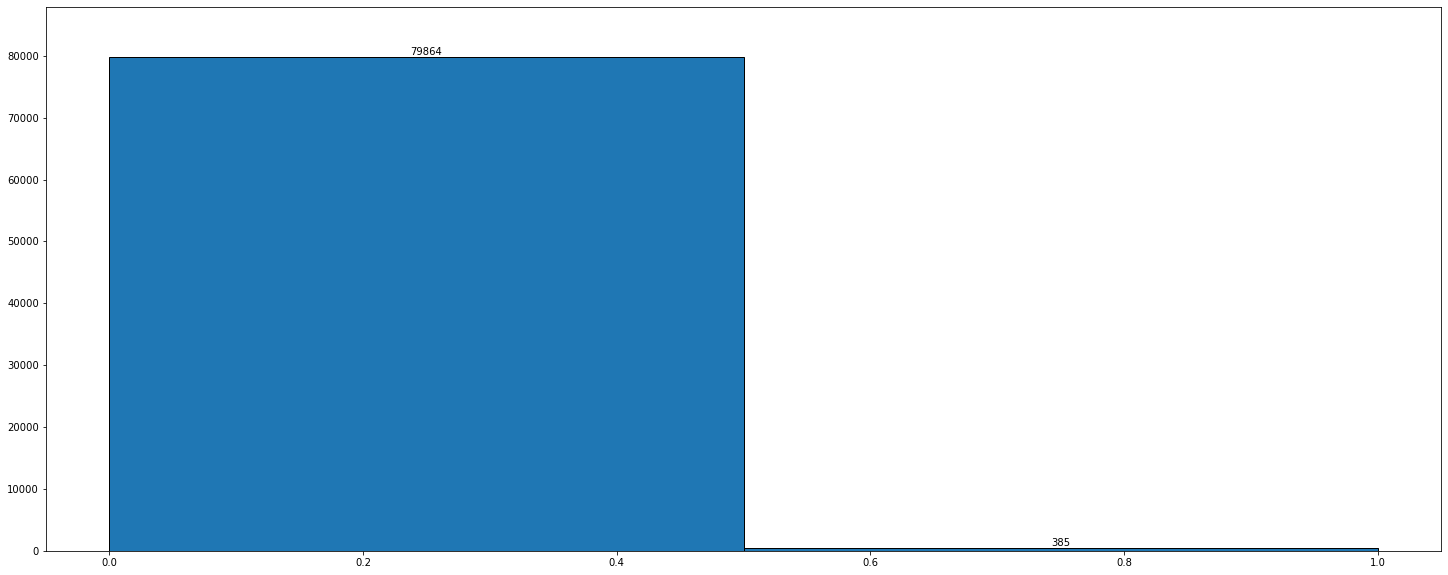

<Figure size 432x288 with 0 Axes>

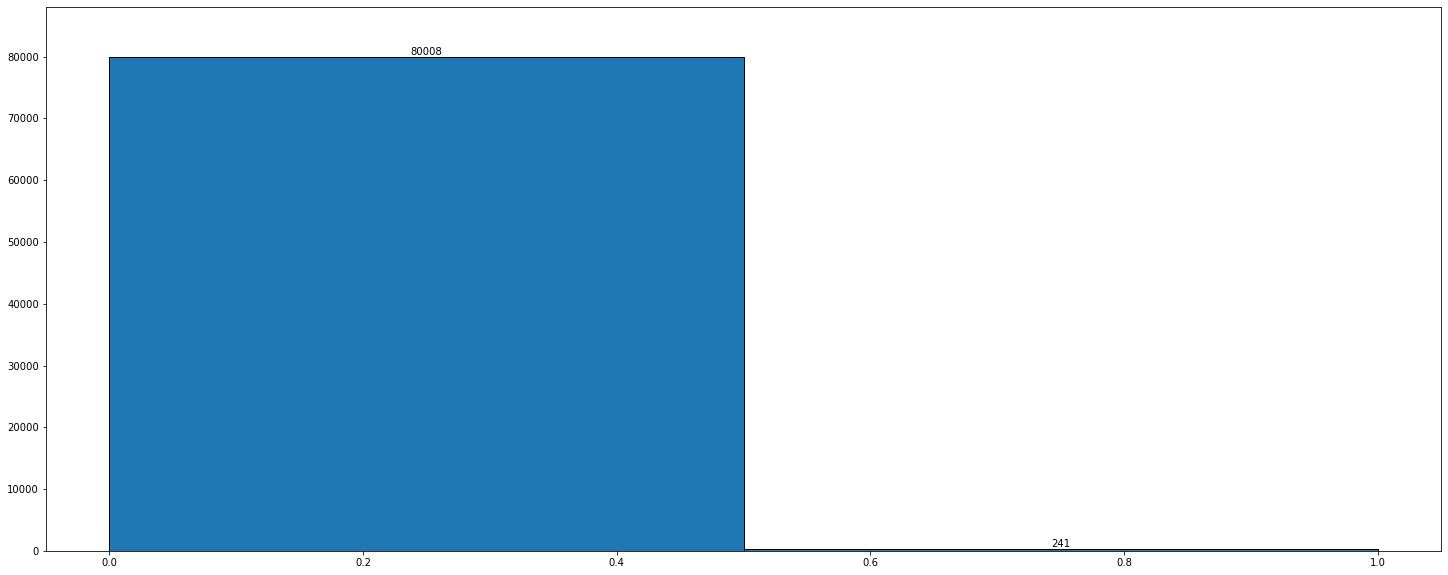

<Figure size 432x288 with 0 Axes>

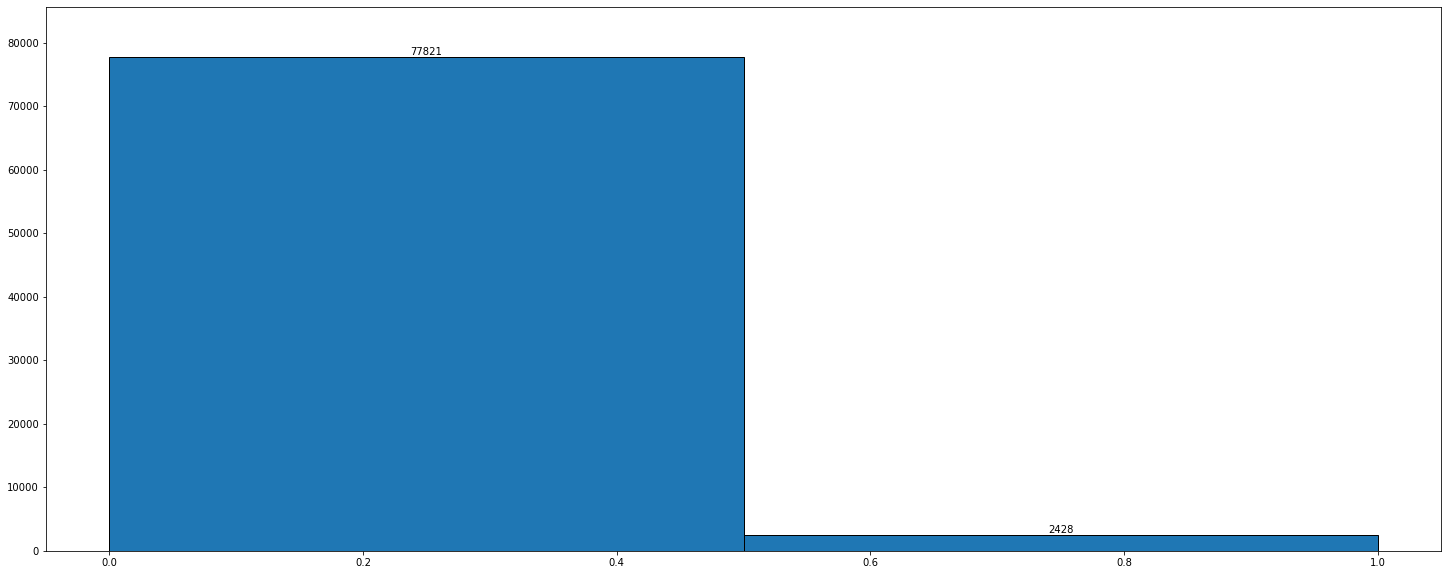

<Figure size 432x288 with 0 Axes>

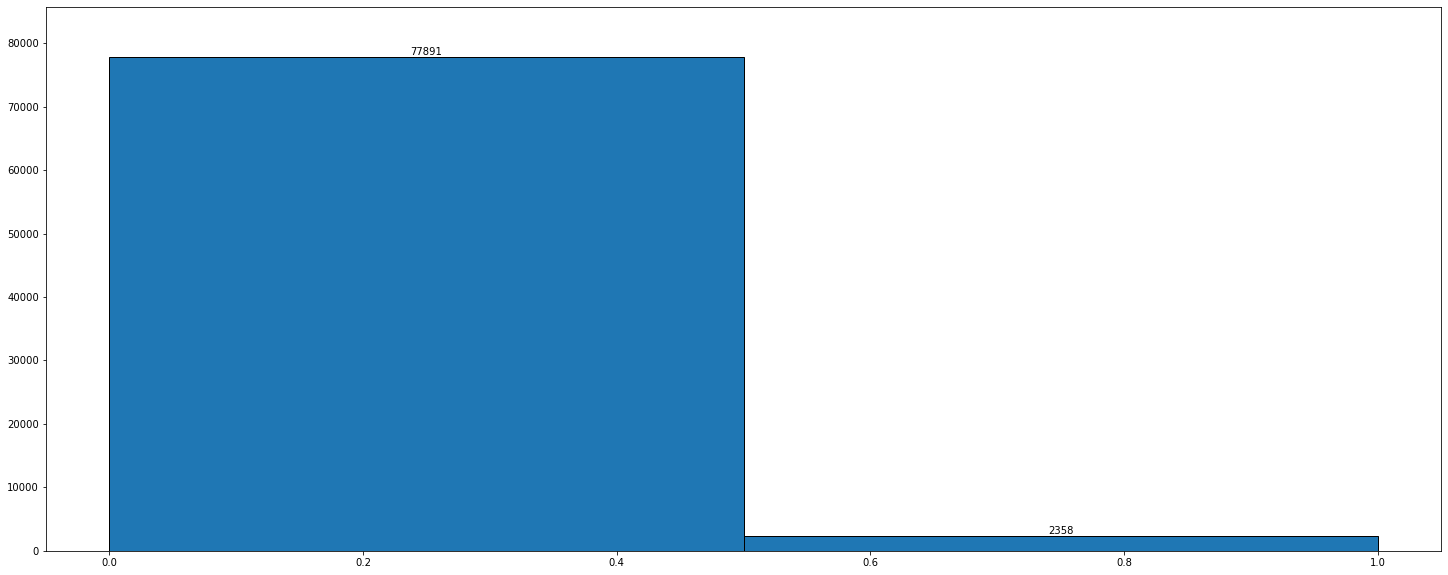

<Figure size 432x288 with 0 Axes>

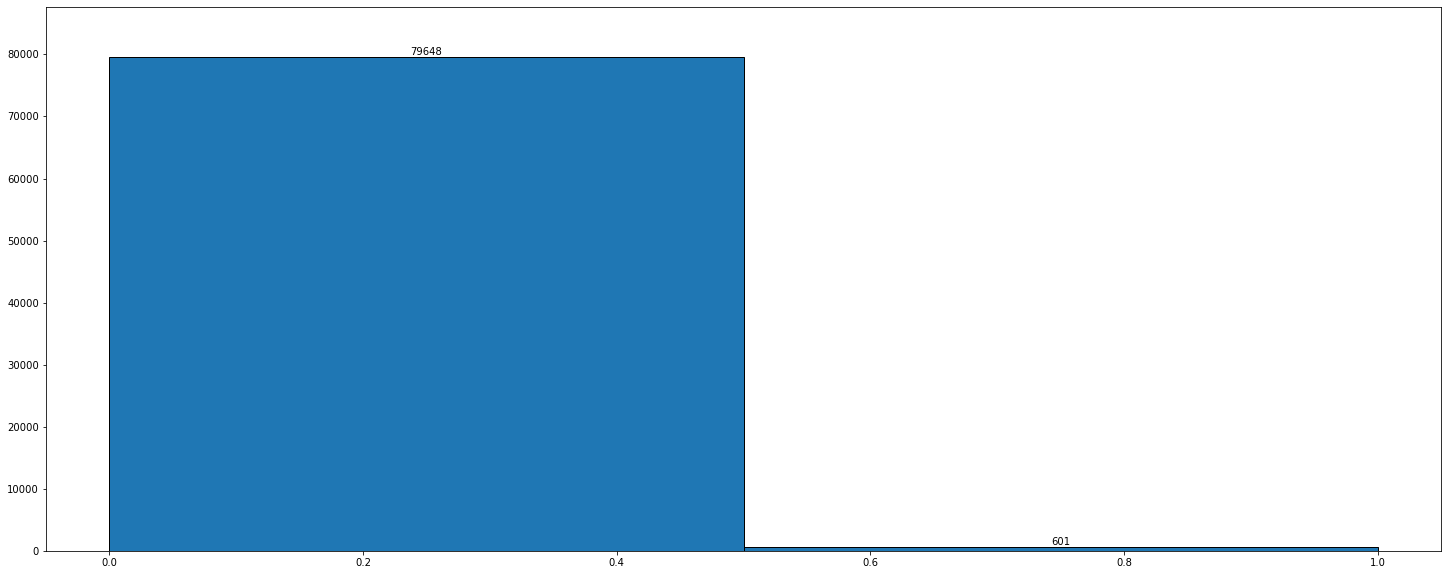

<Figure size 432x288 with 0 Axes>

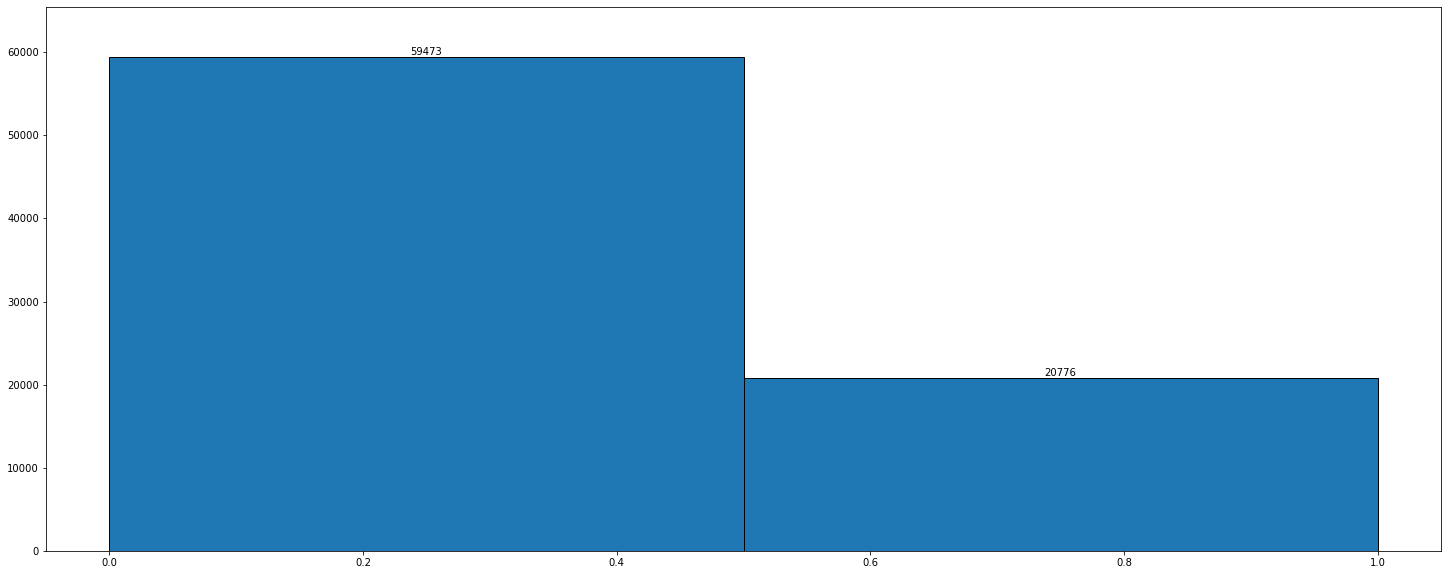

<Figure size 432x288 with 0 Axes>

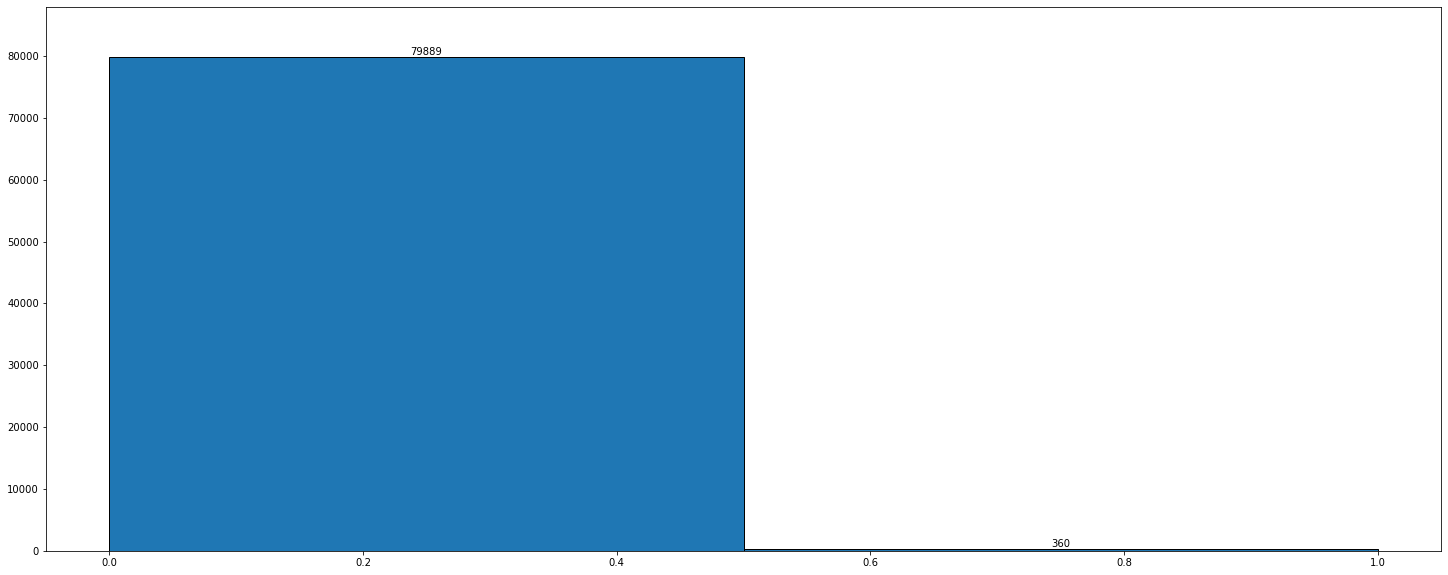

<Figure size 432x288 with 0 Axes>

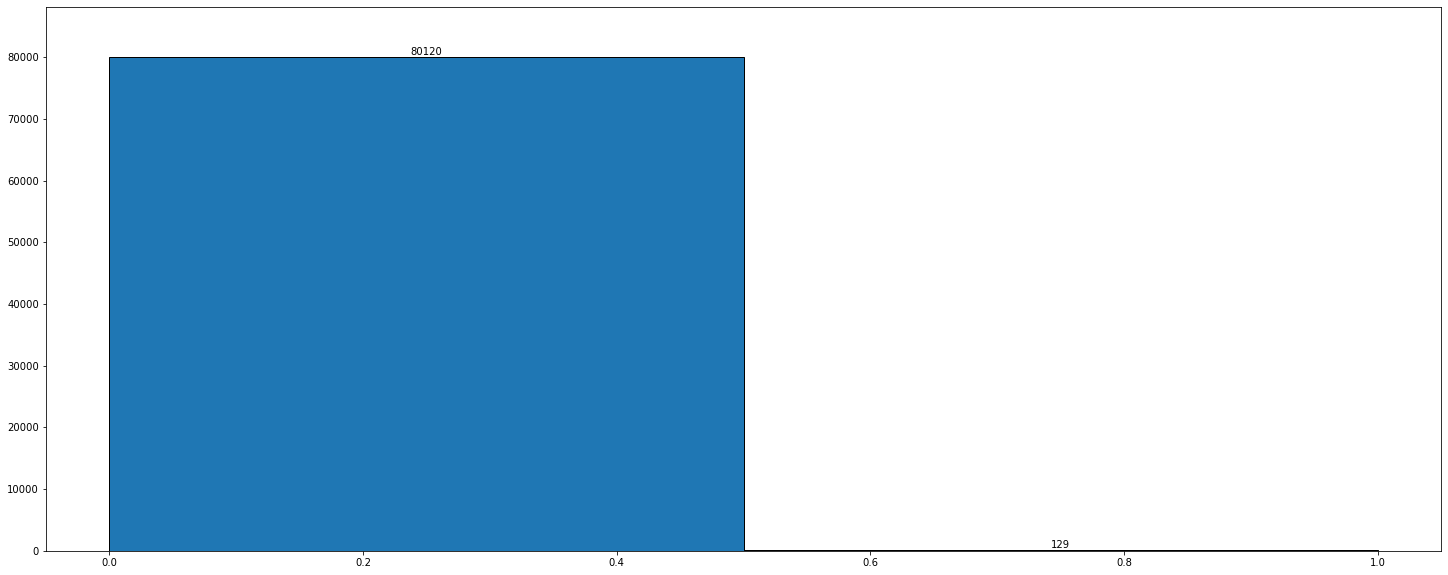

<Figure size 432x288 with 0 Axes>

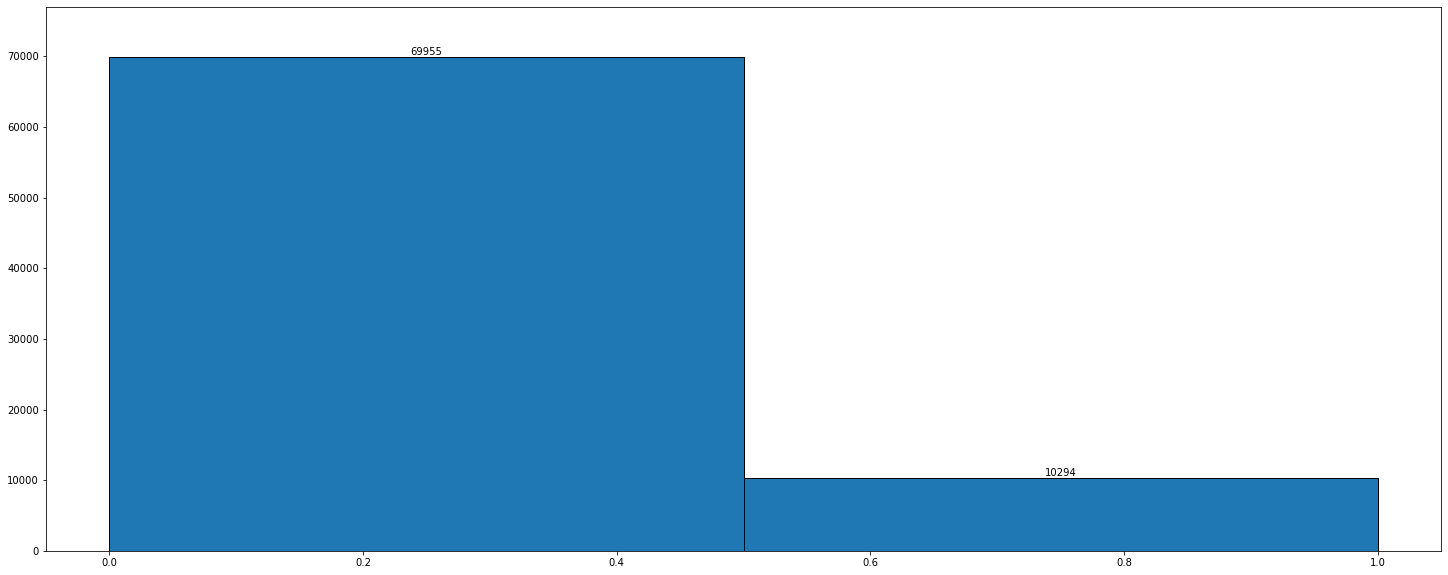

<Figure size 432x288 with 0 Axes>

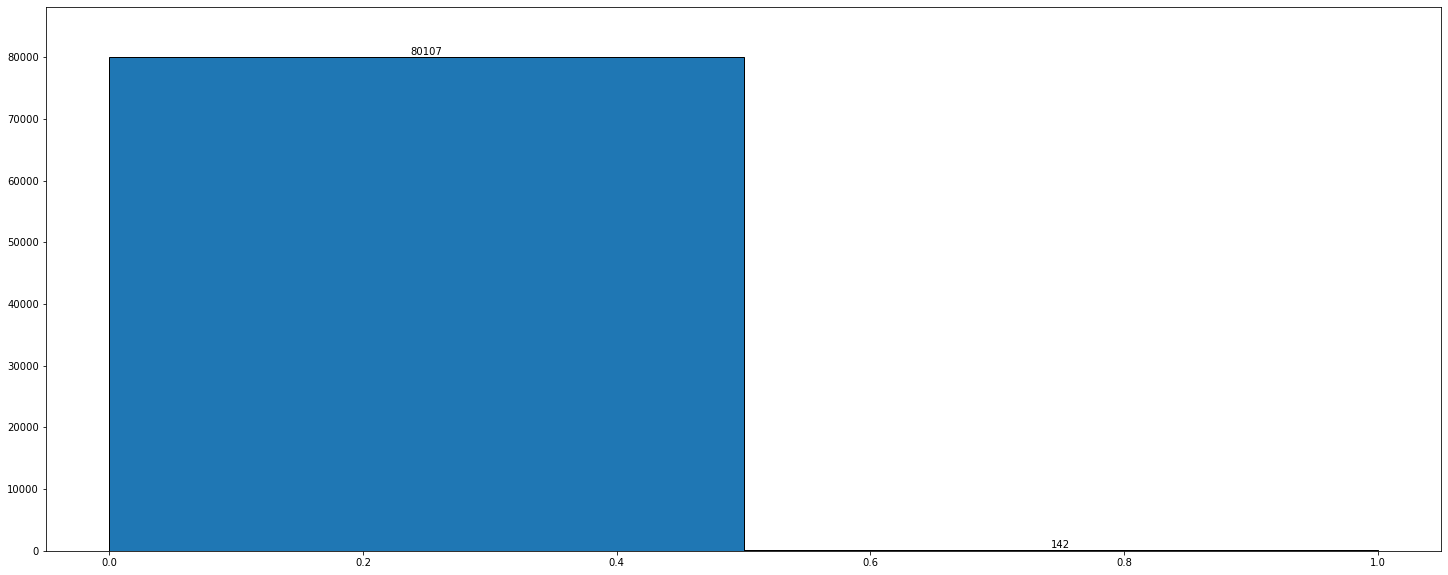

<Figure size 432x288 with 0 Axes>

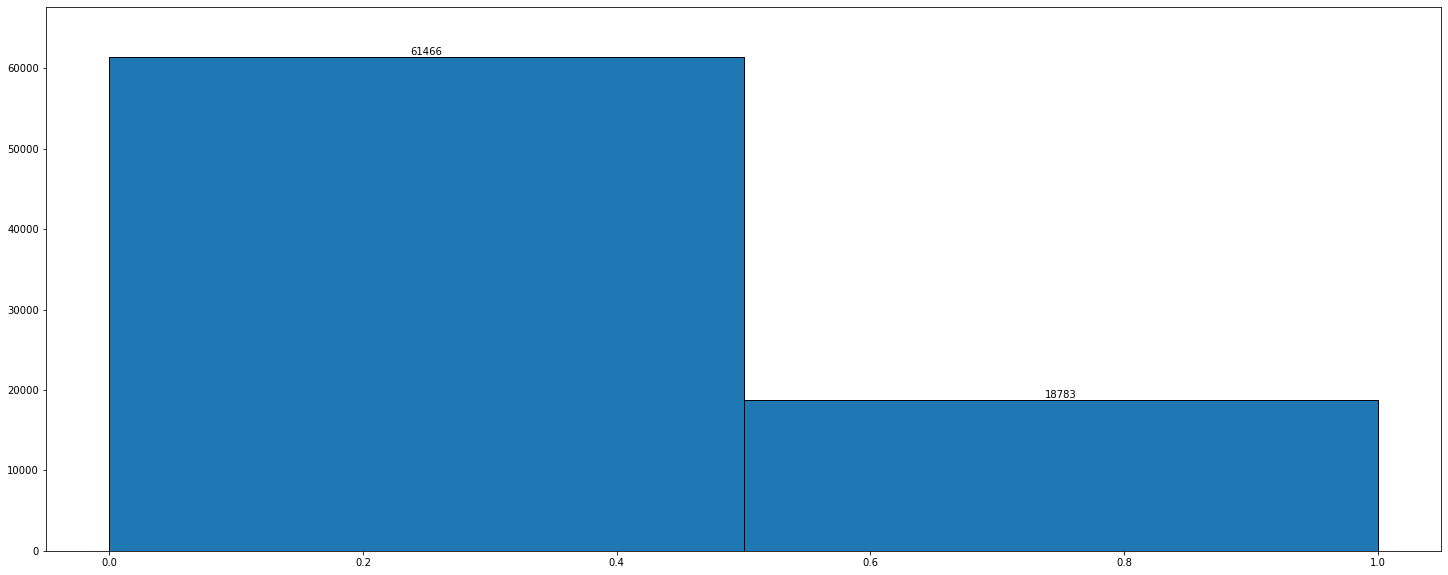

<Figure size 432x288 with 0 Axes>

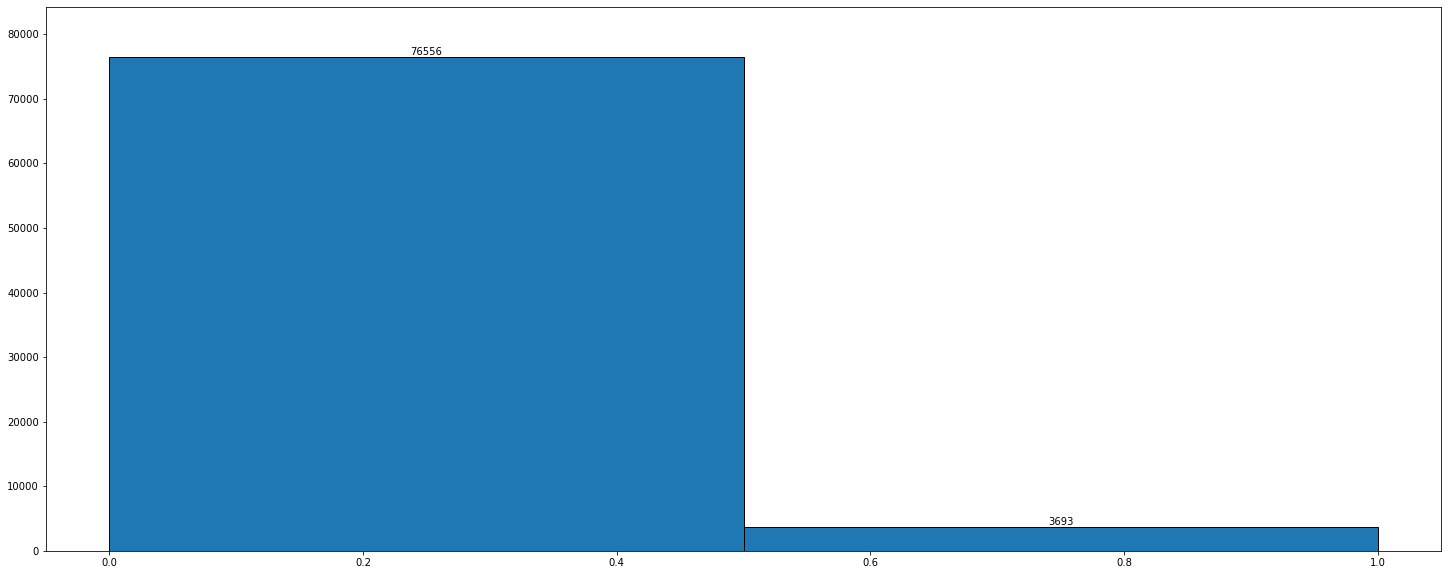

<Figure size 432x288 with 0 Axes>

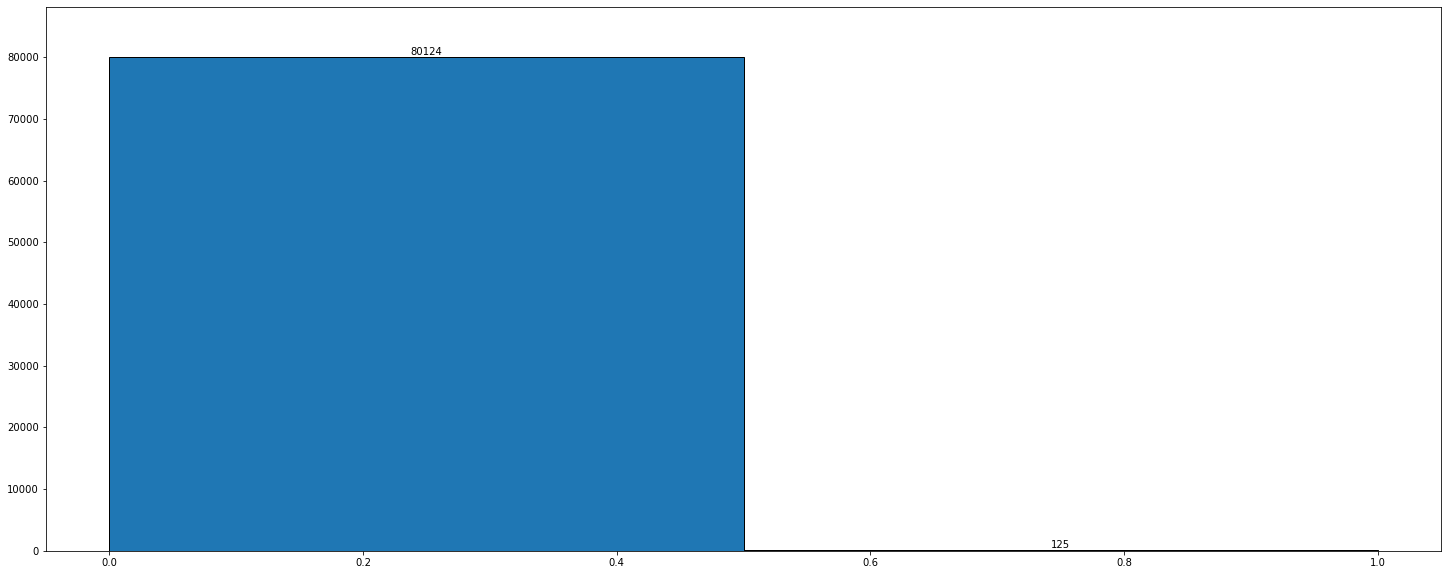

<Figure size 432x288 with 0 Axes>

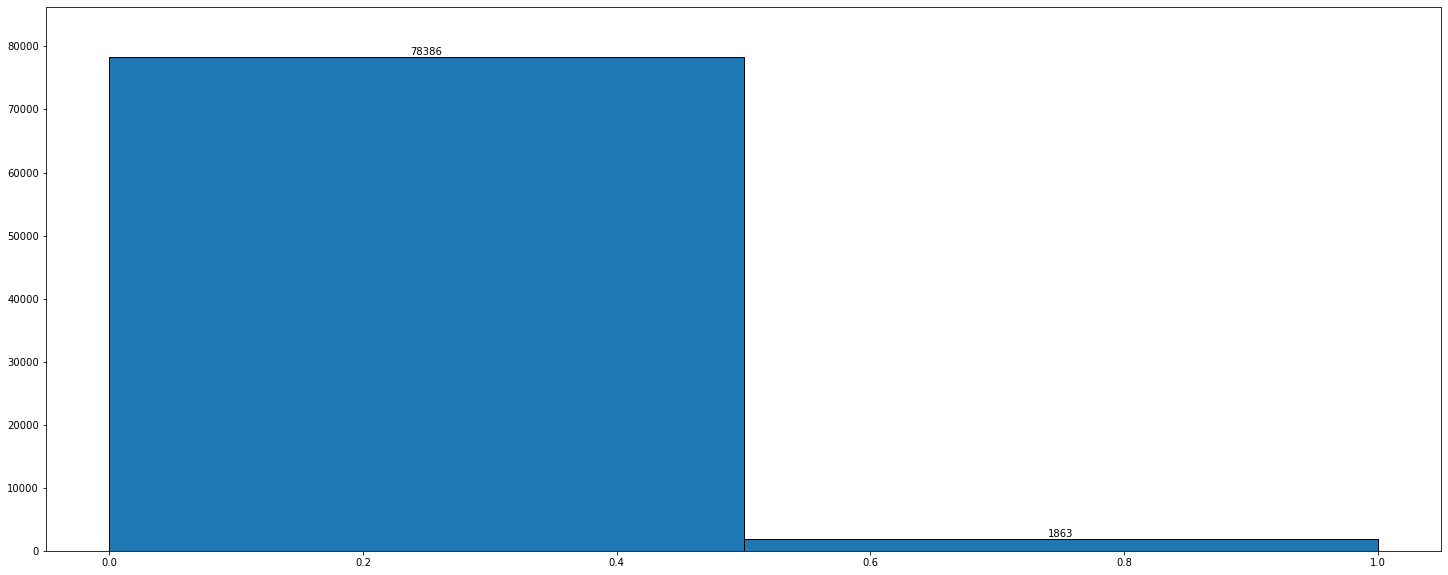

<Figure size 432x288 with 0 Axes>

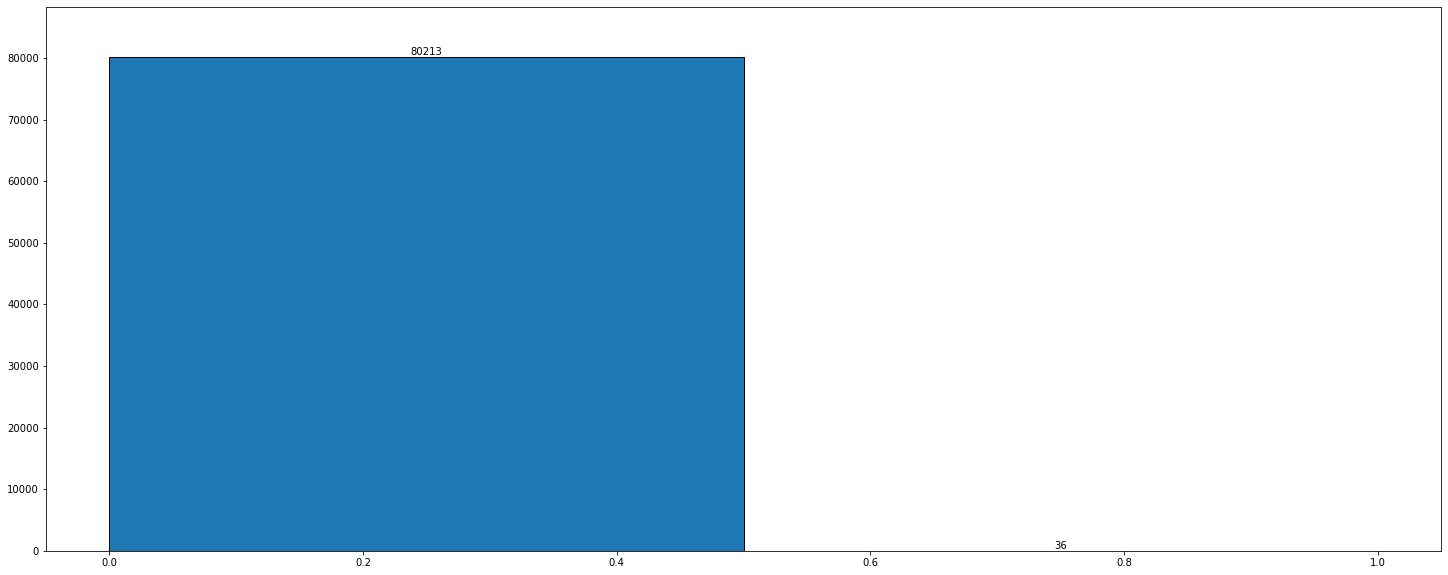

<Figure size 432x288 with 0 Axes>

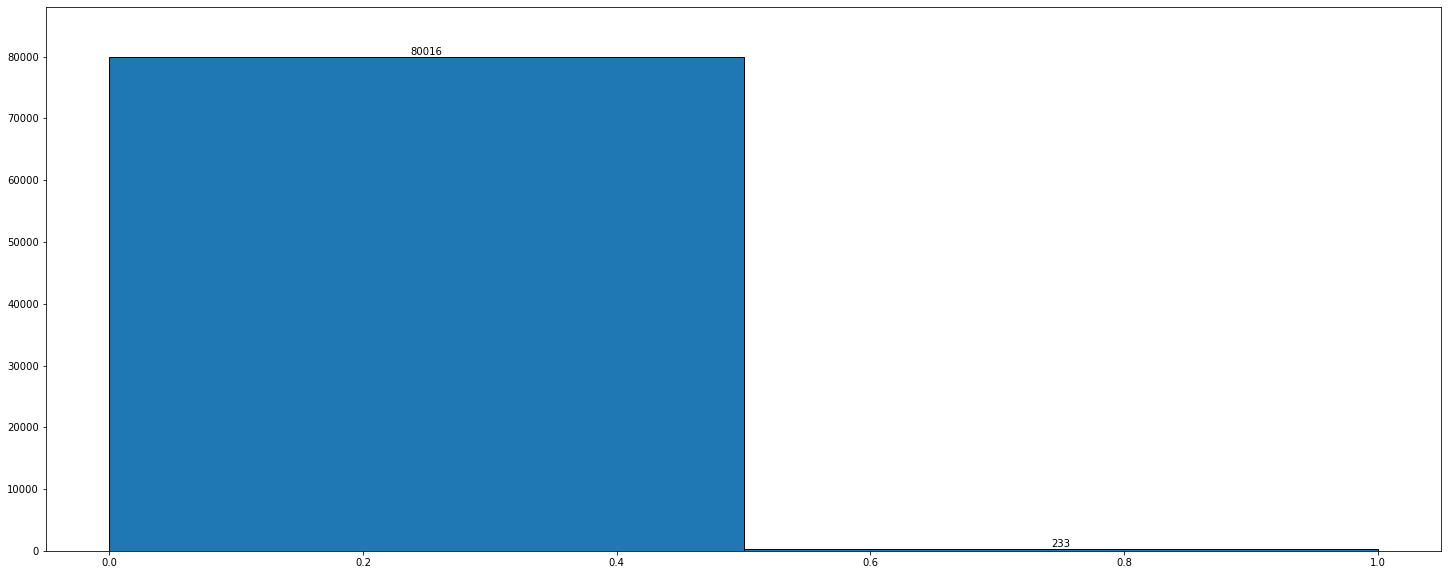

<Figure size 432x288 with 0 Axes>

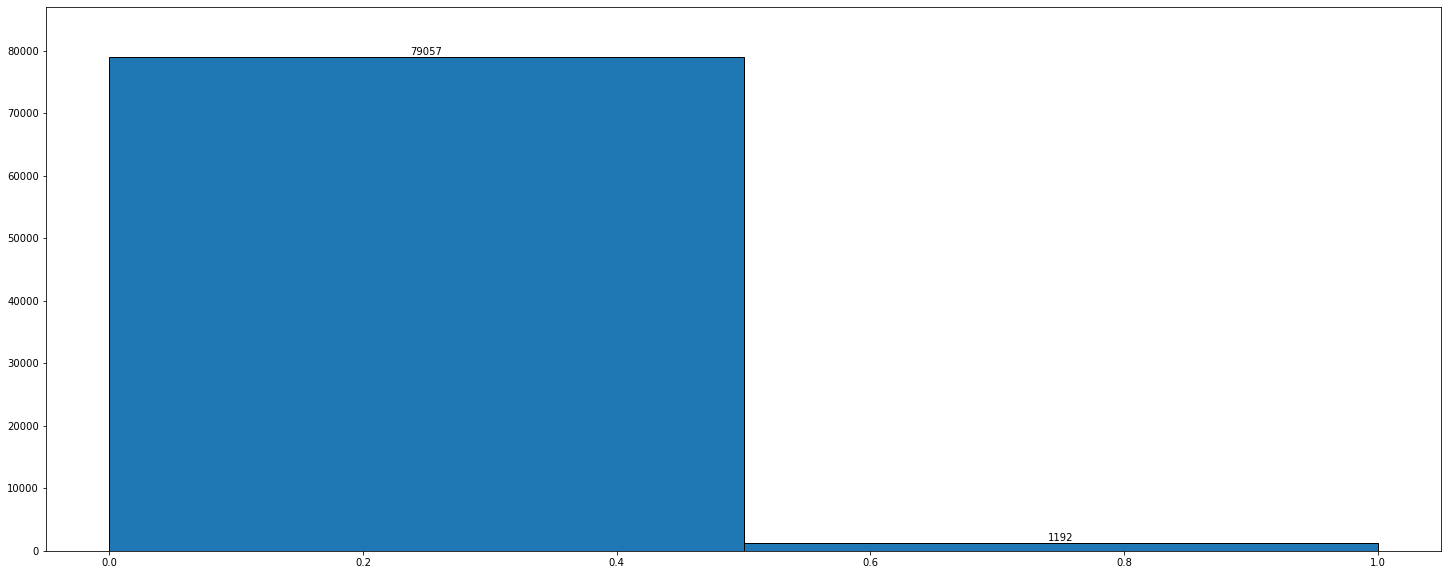

<Figure size 432x288 with 0 Axes>

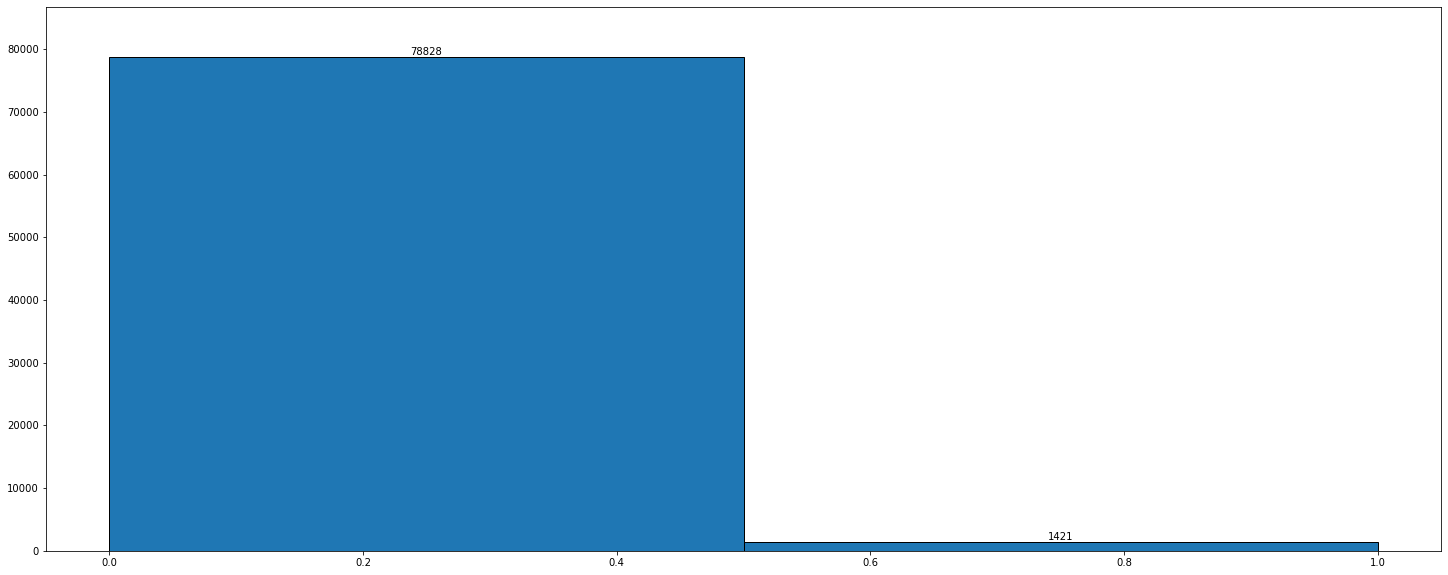

<Figure size 432x288 with 0 Axes>

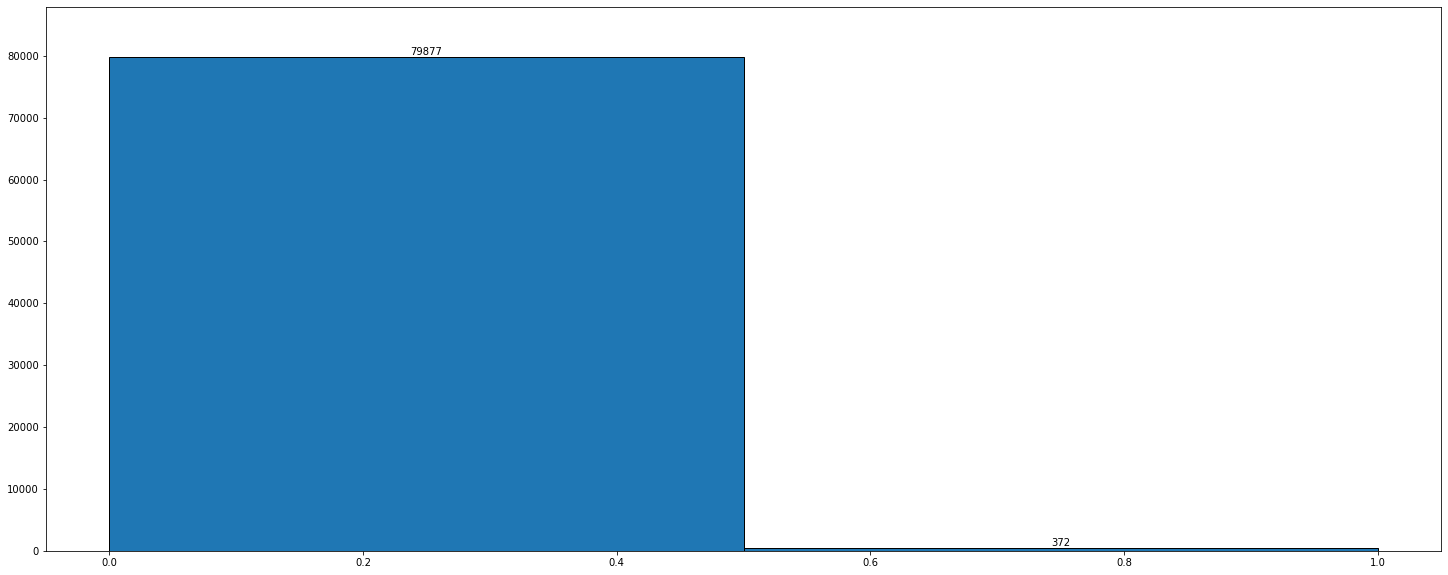

<Figure size 432x288 with 0 Axes>

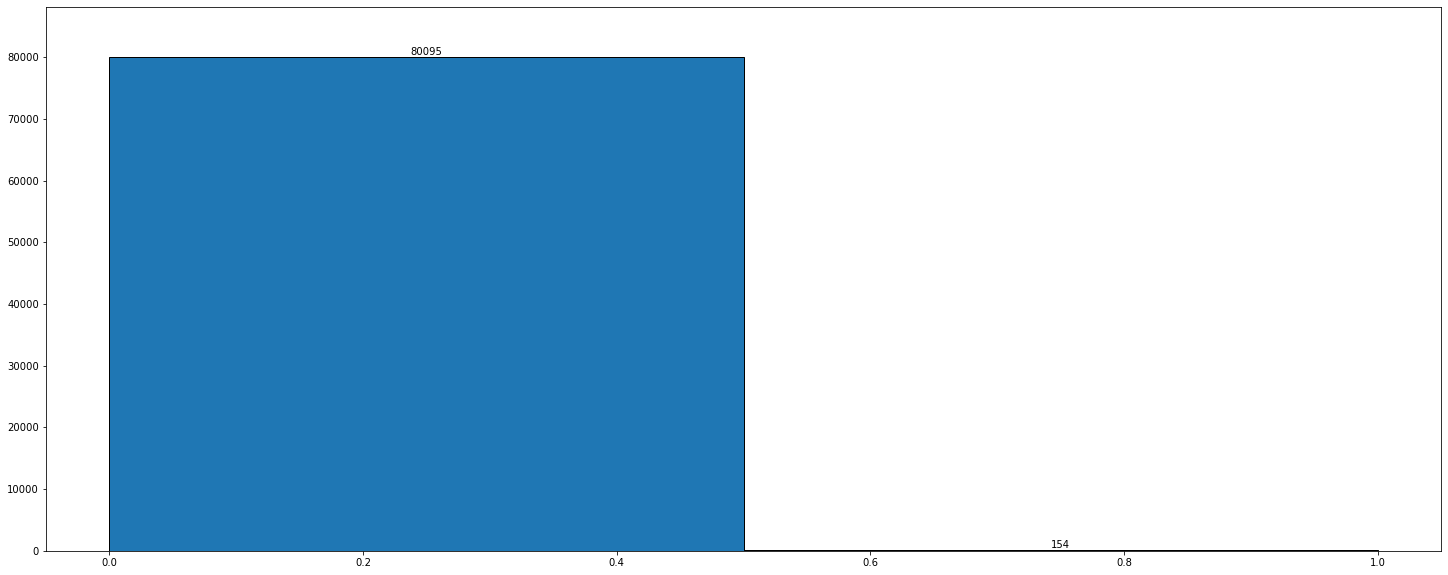

<Figure size 432x288 with 0 Axes>

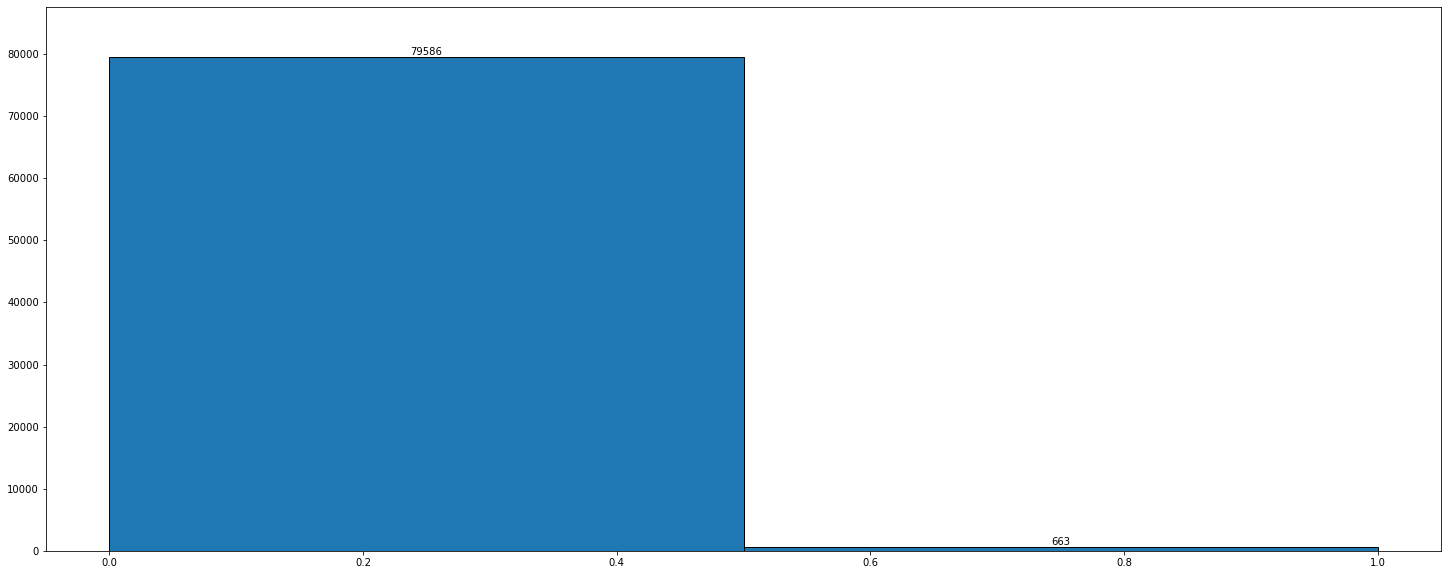

<Figure size 432x288 with 0 Axes>

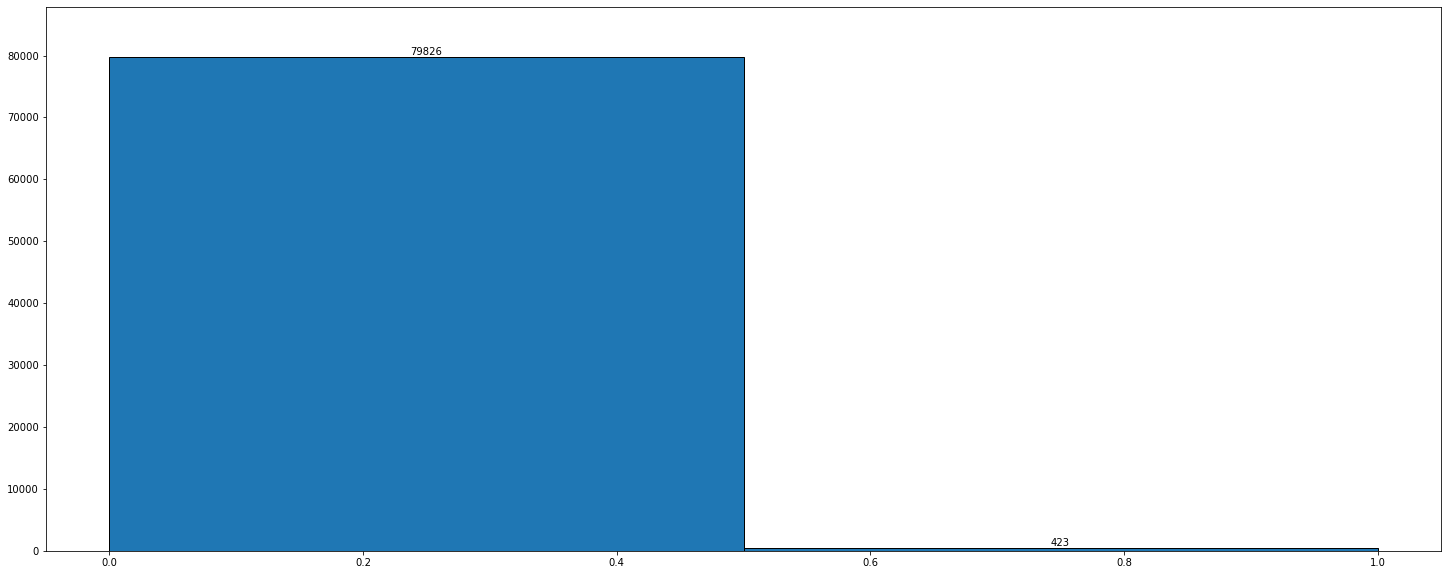

<Figure size 432x288 with 0 Axes>

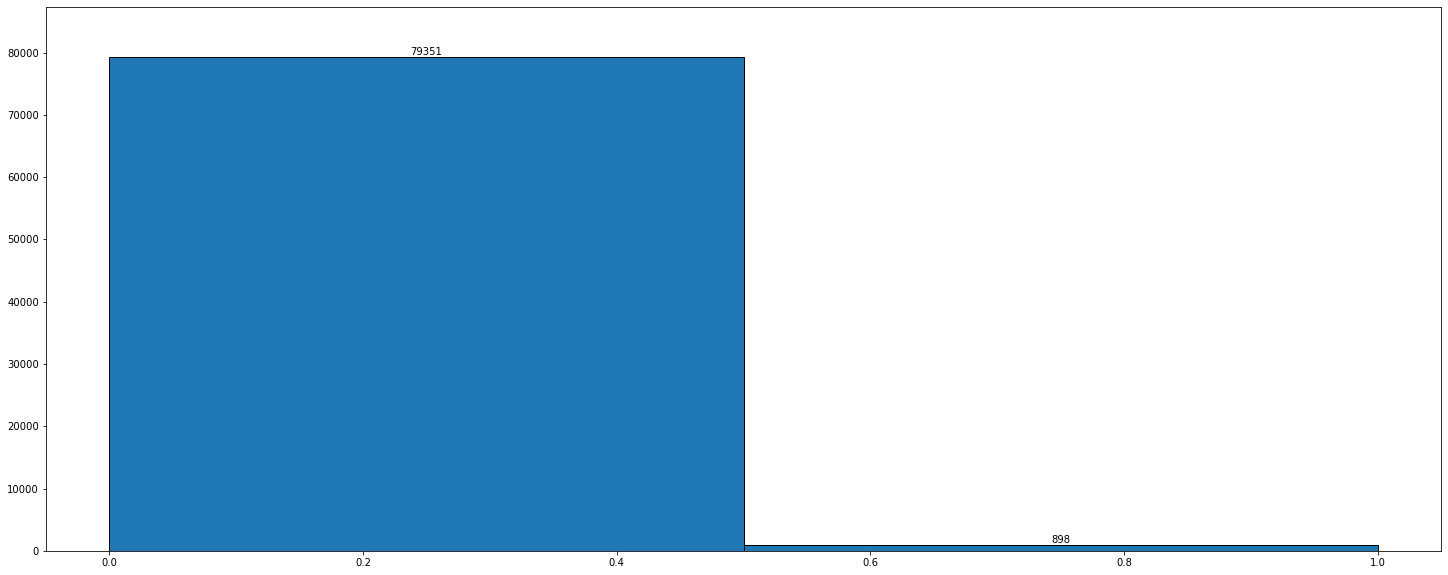

<Figure size 432x288 with 0 Axes>

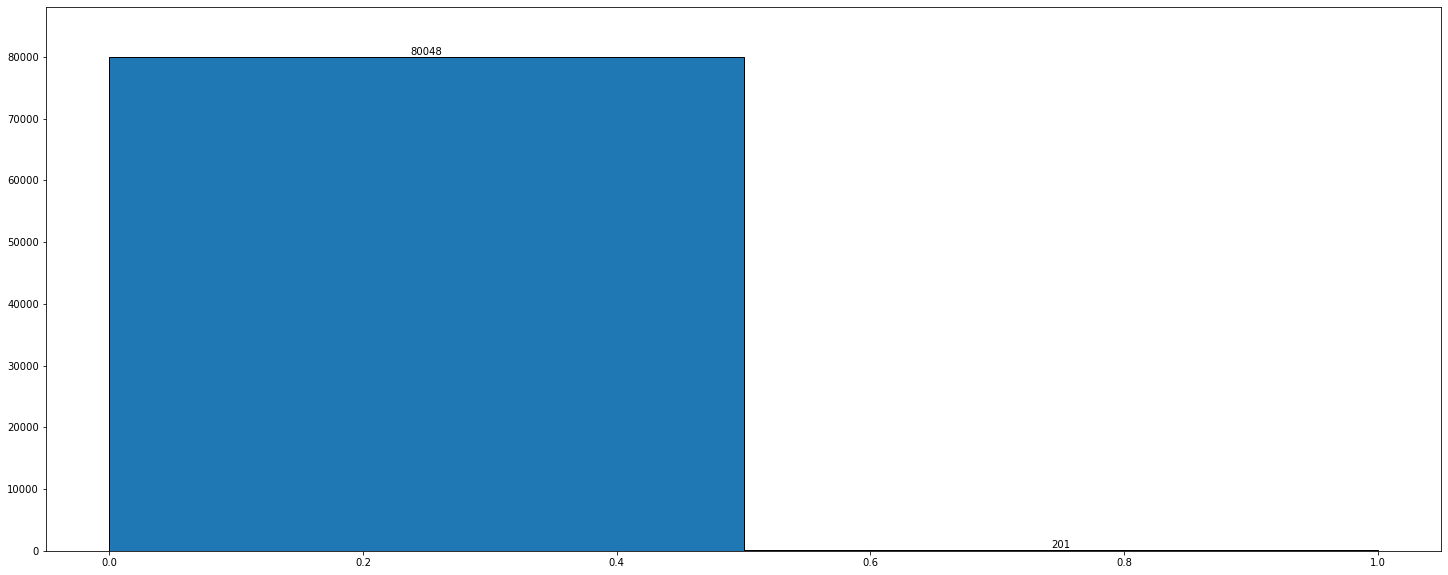

<Figure size 432x288 with 0 Axes>

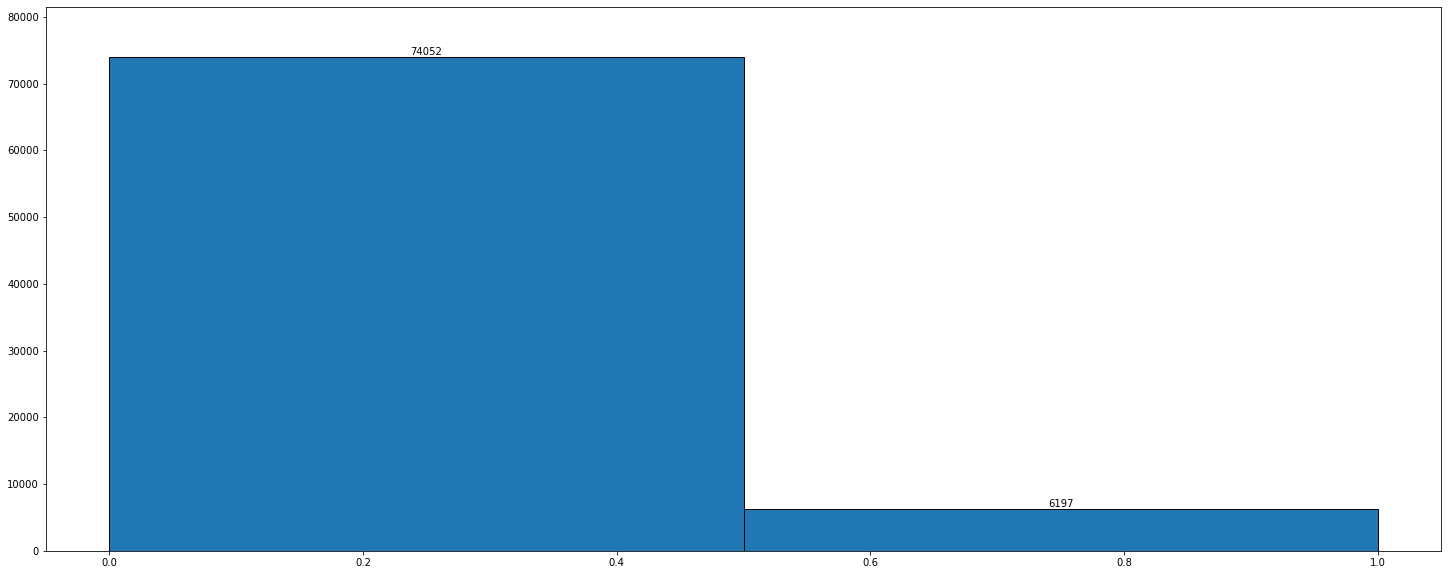

<Figure size 432x288 with 0 Axes>

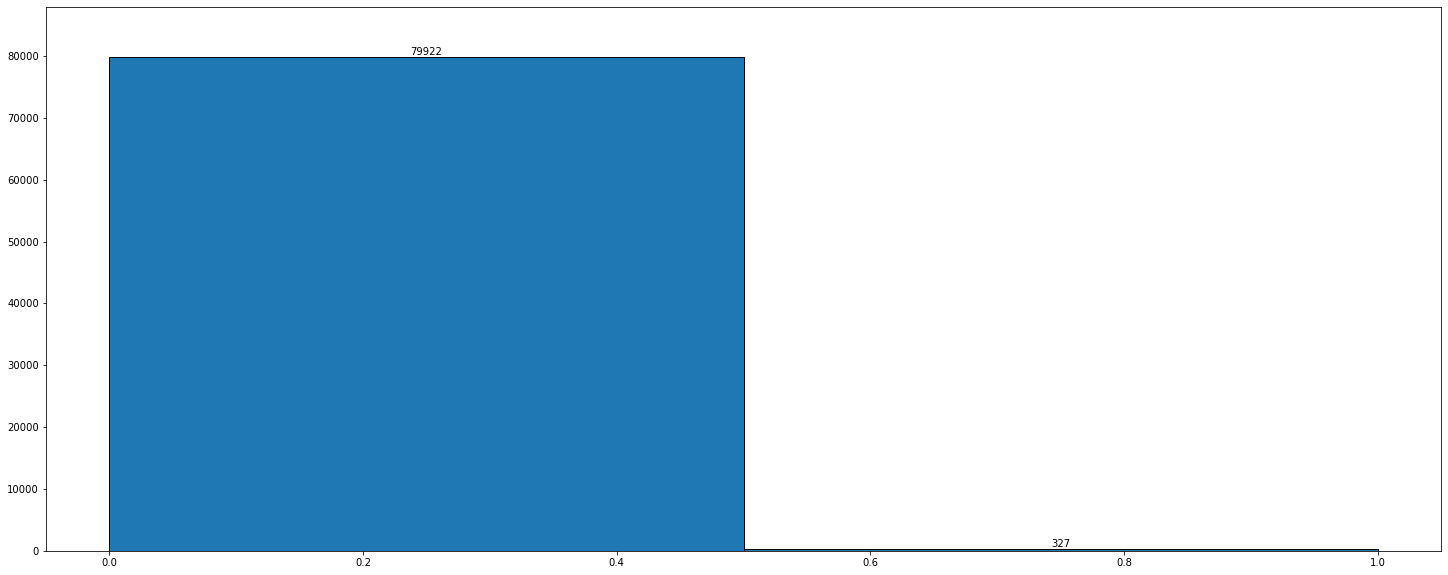

<Figure size 432x288 with 0 Axes>

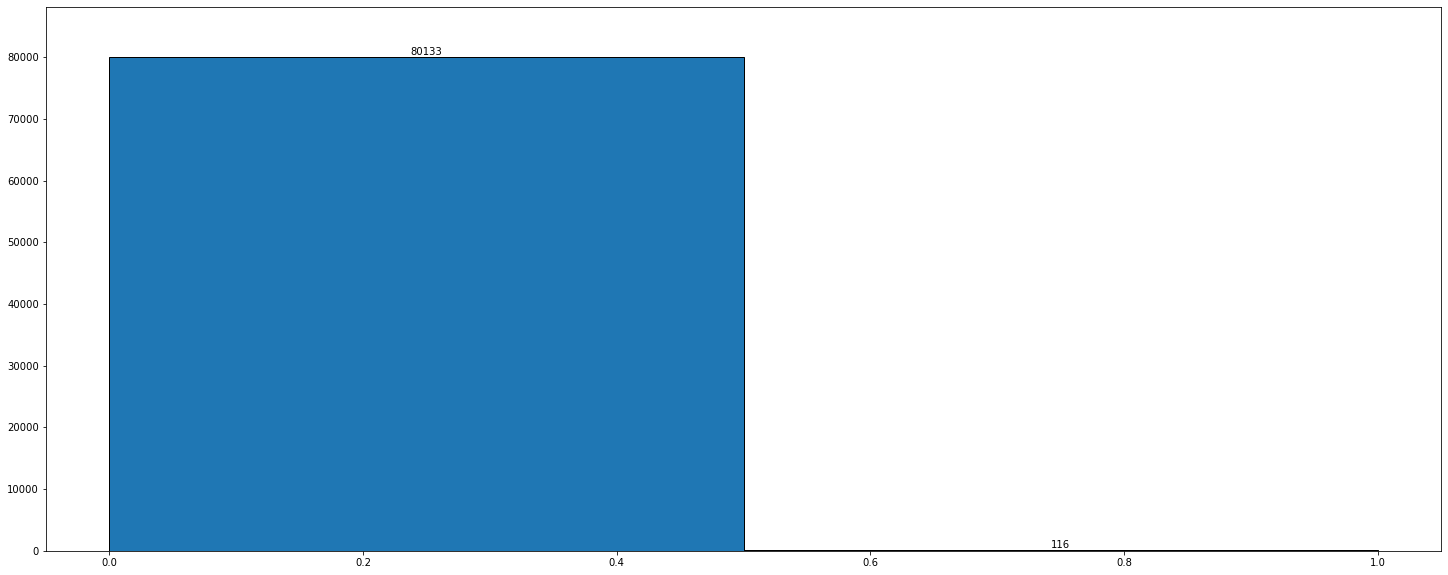

<Figure size 432x288 with 0 Axes>

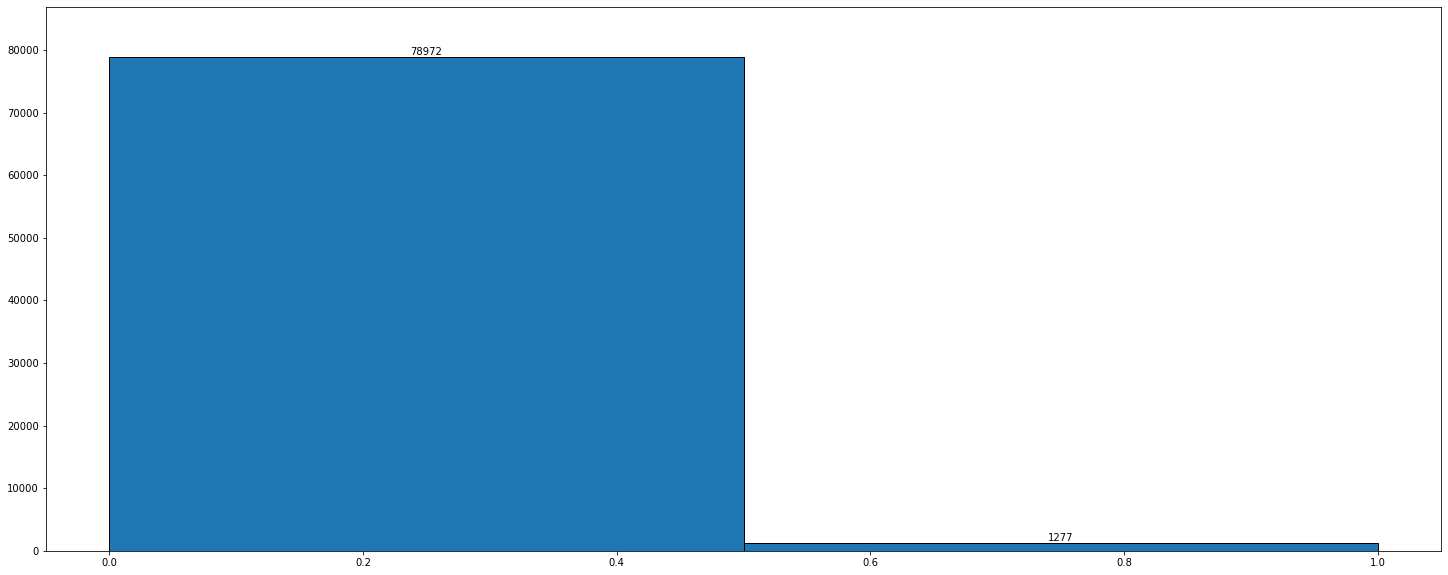

<Figure size 432x288 with 0 Axes>

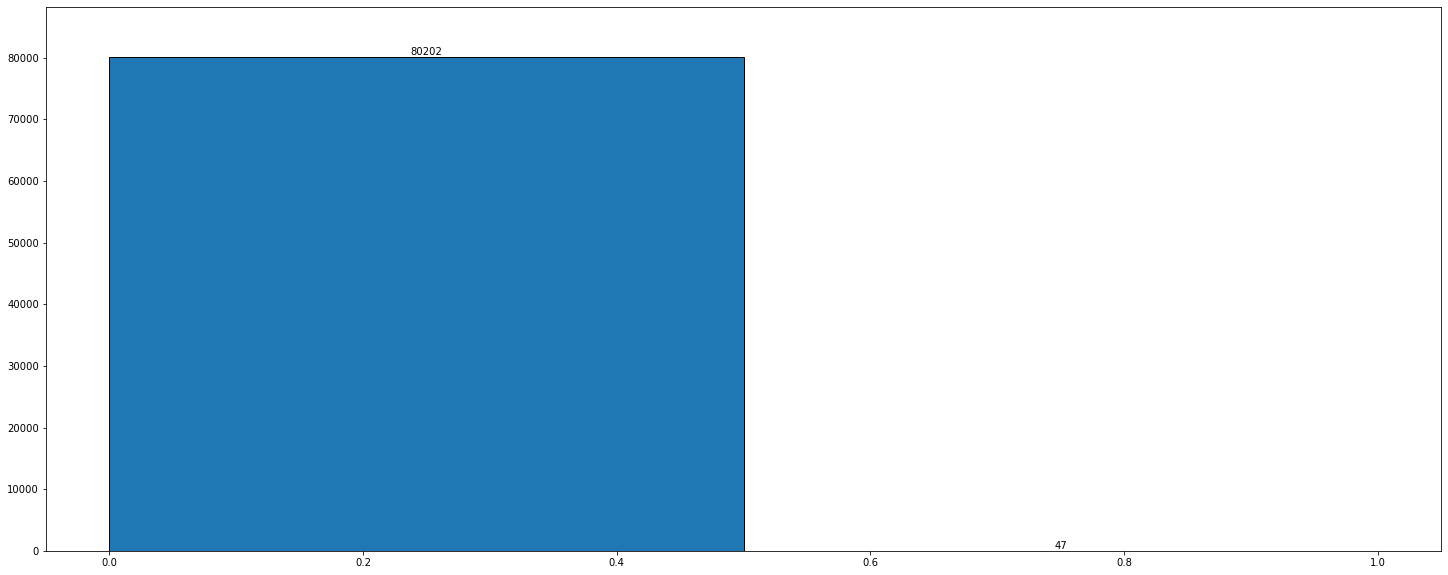

<Figure size 432x288 with 0 Axes>

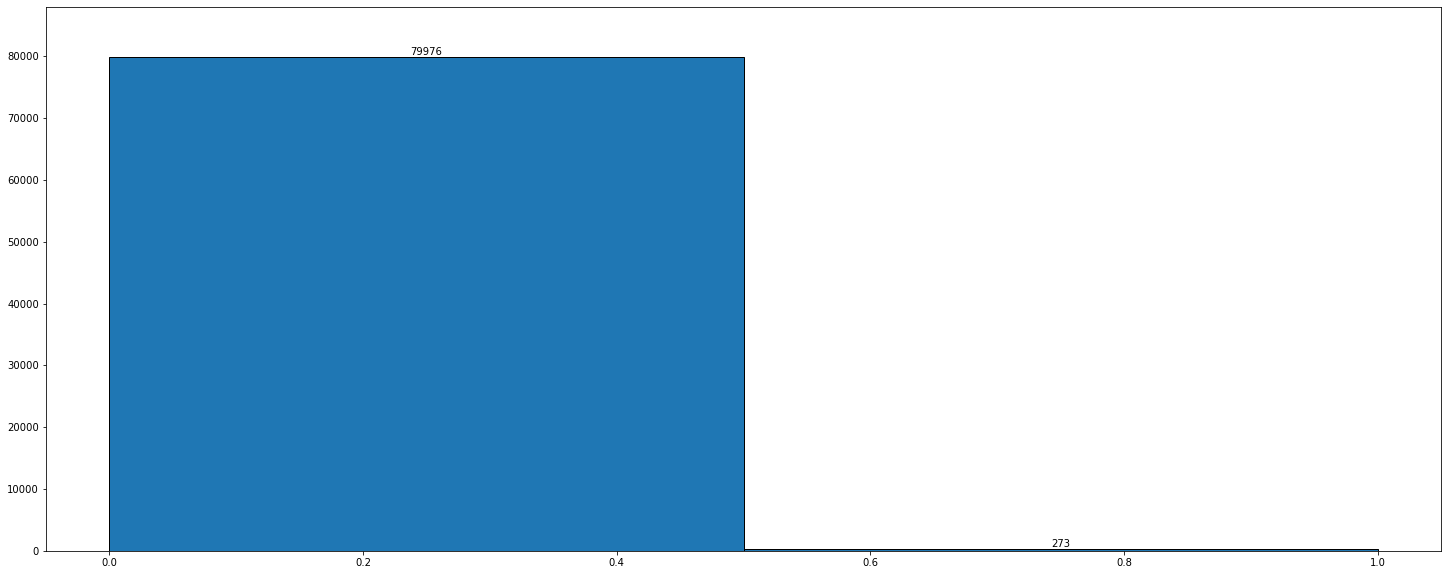

<Figure size 432x288 with 0 Axes>

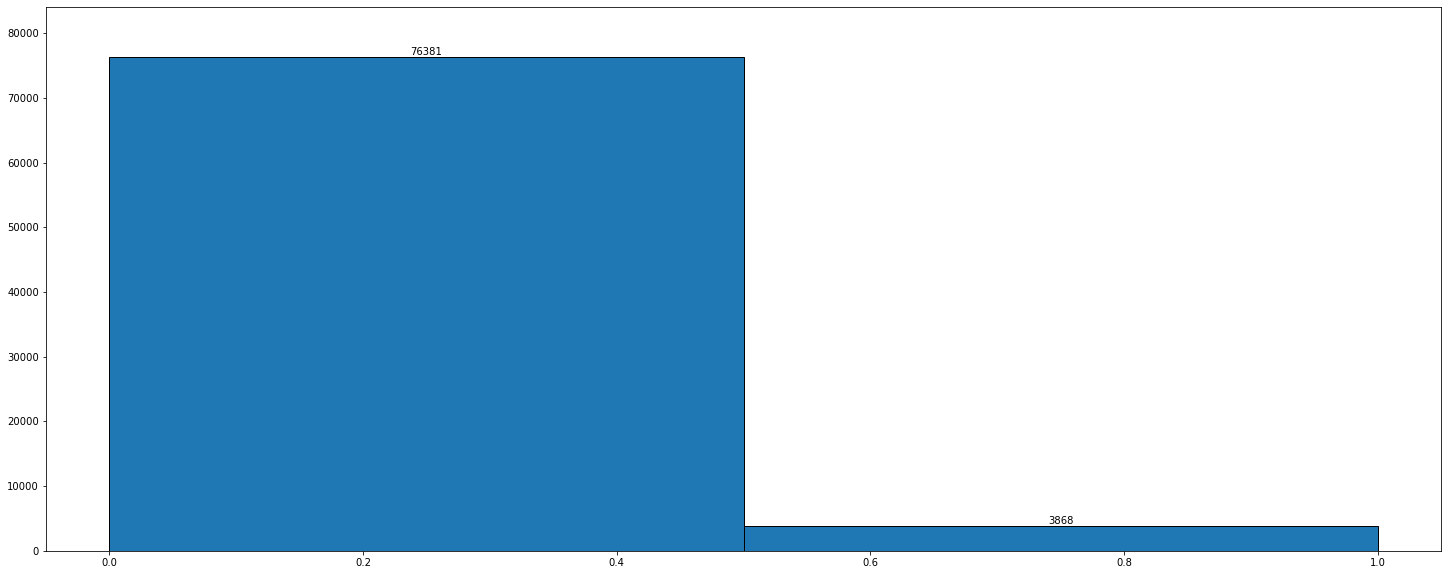

<Figure size 432x288 with 0 Axes>

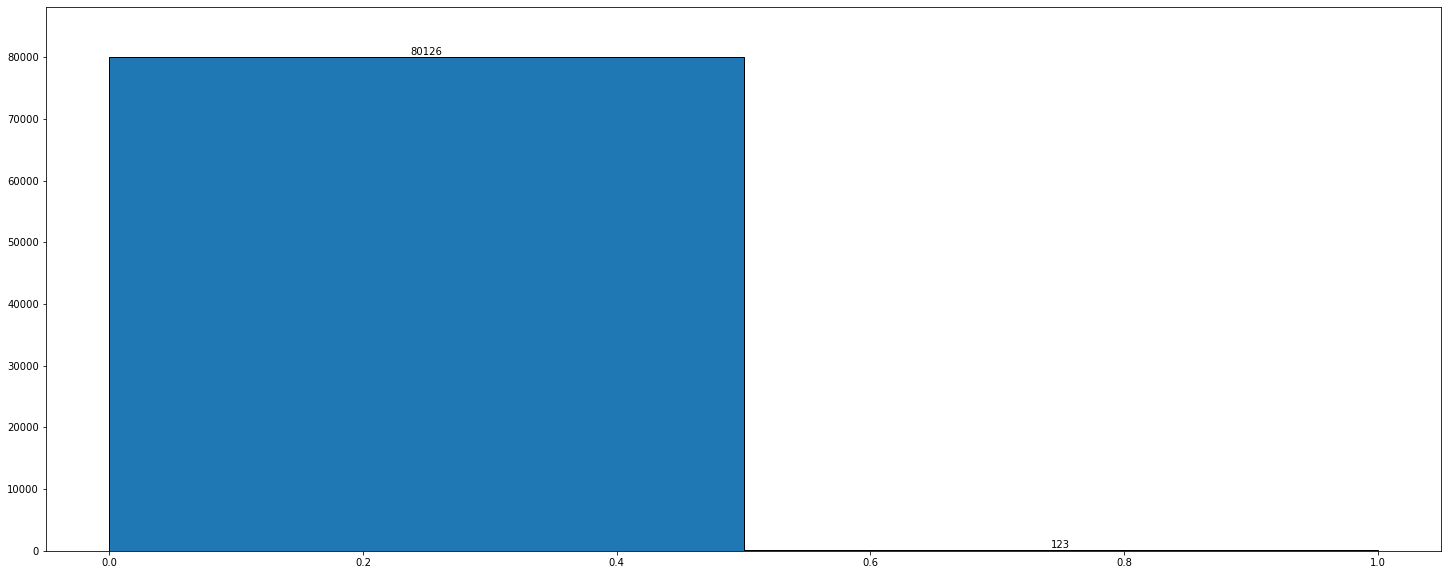

<Figure size 432x288 with 0 Axes>

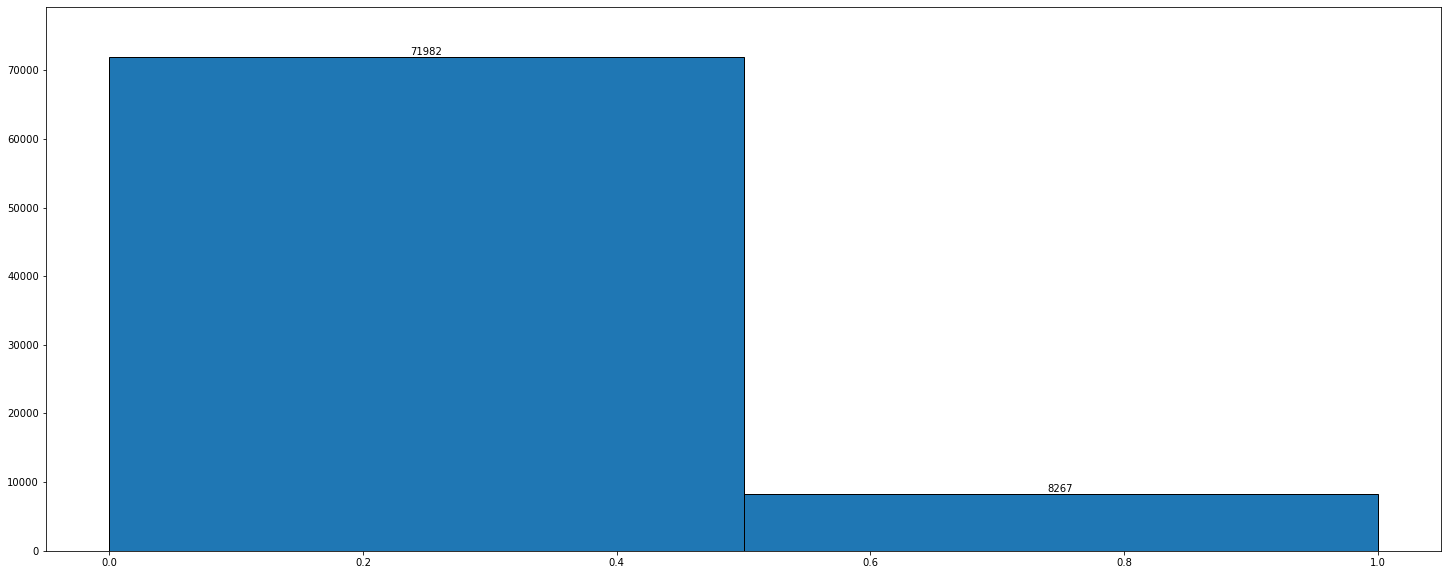

<Figure size 432x288 with 0 Axes>

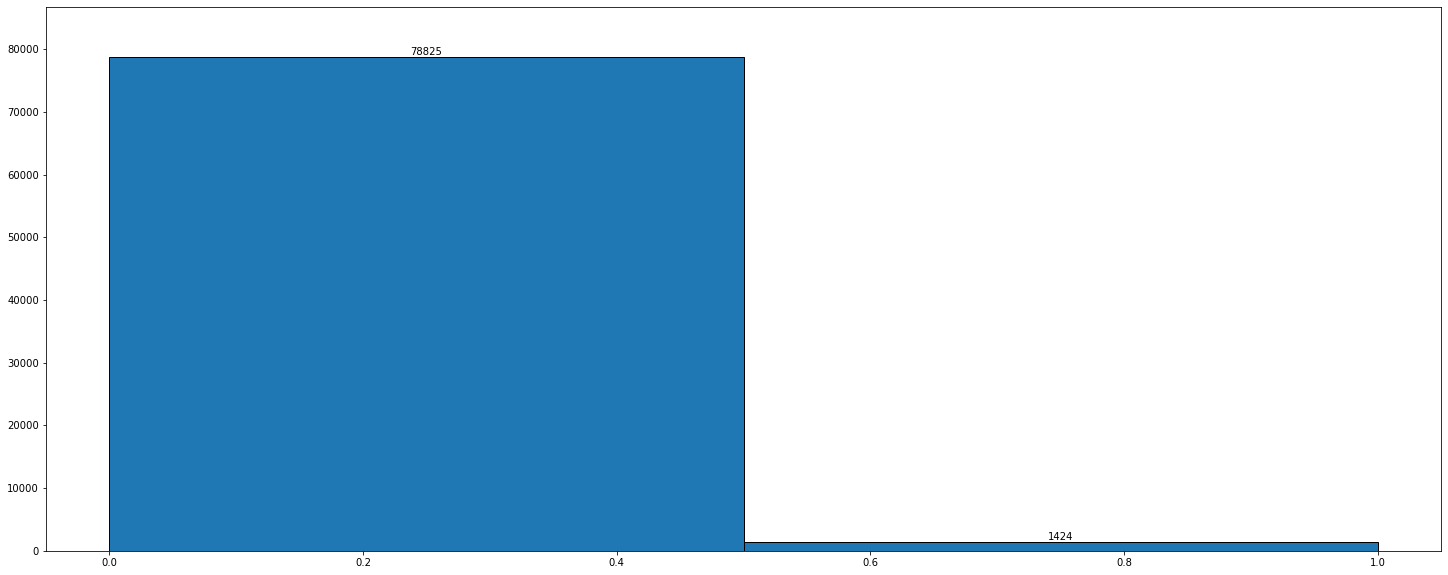

<Figure size 432x288 with 0 Axes>

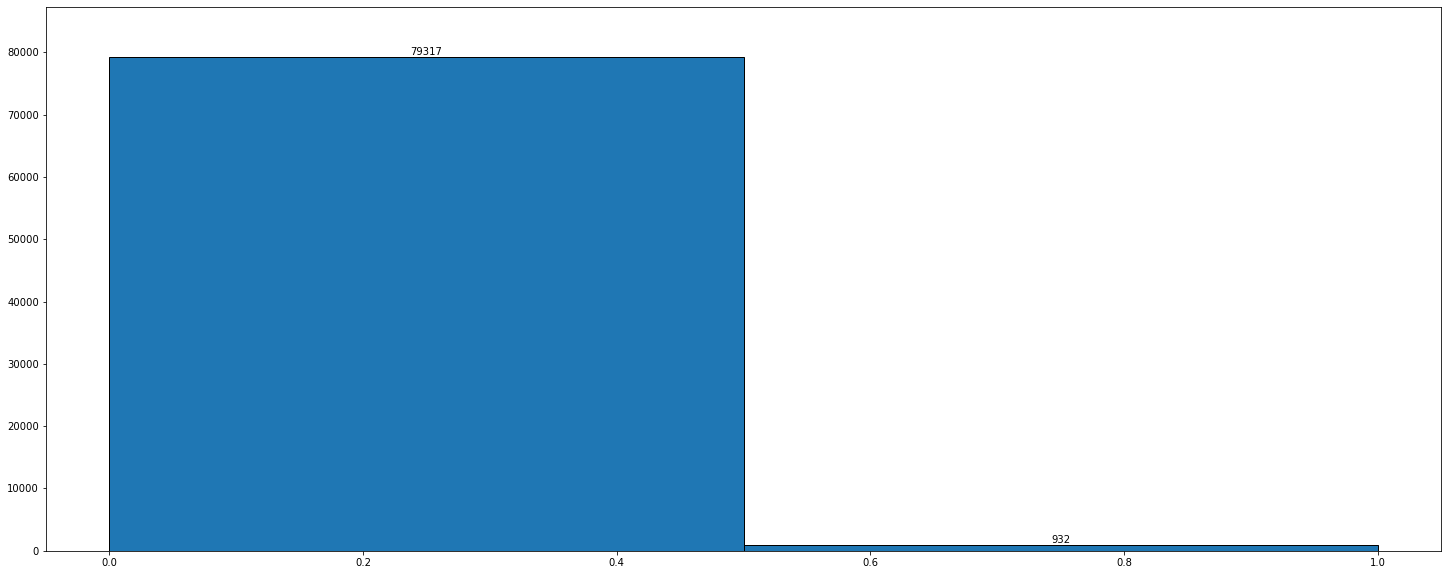

<Figure size 432x288 with 0 Axes>

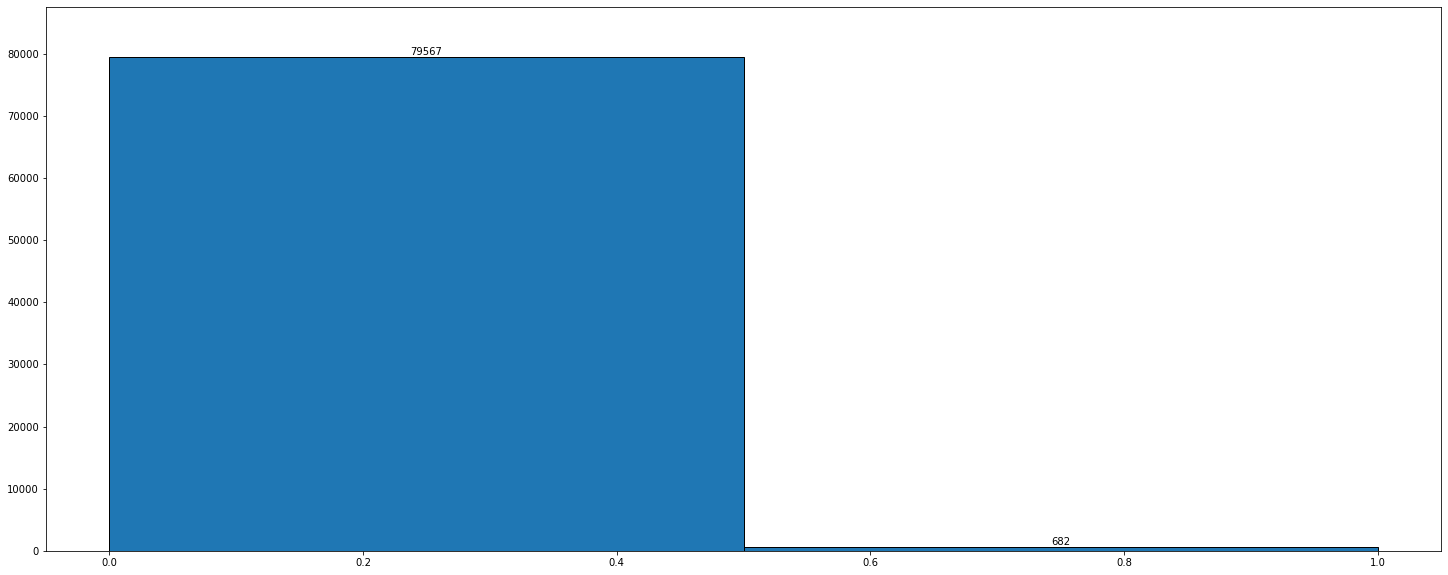

<Figure size 432x288 with 0 Axes>

In [69]:
for column in all_data_df:
    number_of_bins = len(all_data_df[column].value_counts())
    if number_of_bins > 100:
        number_of_bins = 100   # in order to make the hists more readable
    plt.figure(figsize=(25,10))
    counts, edges, bars = plt.hist(all_data_df[column], bins=number_of_bins, edgecolor="black")
    plt.ylim(0, (max(counts)+(max(counts)*0.1)))
    plt.bar_label(bars)
    plt.show()
    plt.clf()
    

Because few features has value different from zero very few times over the whole dataset (consider the first two feature in the previous cell) we have considered to keep the feature which has at least 5% of values different from zero among all the observations. 

In [82]:
# for now we think that it's useless considering PCA

# counter_to_eliminate = 0
# for column in all_data_df:
#     different_from_zeros = (all_data_df[column] != 0).sum()
#     print(different_from_zeros)
#     if different_from_zeros <= all_data_df.shape[0] * 0.05:
#         counter_to_eliminate += 1
# print("-------------------------------")
# print(all_data_df.shape[0] * 0.05)
# print(counter_to_eliminate)

36708
5668
136
362
26034
680
24820
475
1
20640
36
55993
838
71043
42446
17822
66044
10867
71817
6344
29381
24427
1082
23432
72323
68246
172
5
23858
34
165
534
1974
57539
48692
32324
140
16988
3021
6559
145
3506
57465
1959
17689
40042
427
25179
73574
48574
3965
67104
220
326
14810
79
196
1002
33909
64718
2414
2246
59563
77170
716
73344
38861
41
56314
12
62199
18364
243
222
191
49320
50950
742
18905
42619
1809
77684
847
4415
1371
40168
16386
4930
29195
75305
1667
1069
3258
14413
38
71918
39791
6805
3391
1485
17583
104
42451
356
548
9780
13865
55
9987
59038
2562
357
1173
29546
27
77804
19601
40459
35407
130
834
86
37556
22298
6316
1215
1399
32633
24299
2225
929
3140
4817
32313
3567
3543
145
26173
59565
443
14181
30229
21263
84
23001
16587
7138
23226
17072
1113
52587
18465
40225
65794
1
201
22243
451
77337
1104
2412
34036
1480
11076
72847
13620
11077
10633
6
9232
1
27744
18756
31
19174
1660
64954
13494
275
63714
27661
68865
14780
6555
51
32931
18478
30213
49897
163
3249
19
15218
76560
1402

In [83]:
all_data_df.describe()

1              3             4             5             6    \
count  80249.000000   80249.000000  80249.000000  80249.000000  80249.000000   
mean       1.920136      80.041222      0.001695      0.023714      8.515508   
std       20.684610    2566.613770      0.041130      1.536566    113.487152   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        2.000000       0.000000      0.000000      0.000000      4.000000   
max     5727.000000  254212.000000      1.000000    419.000000   5299.000000   

                7             9             10            12            13   \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.378522      1.480155      0.052225      0.000262      1.043602   
std       40.878906     38.192963      0.843168      0.074131      4.034851   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      1.000000   
max     5516.000000   6725.000000     91.000000     21.000000    345.000000   

       ...           462           463           468           469  \
count  ...  80249.000000  80249.000000  80249.000000  80249.000000   
mean   ...      0.001446      0.015913      0.000586      0.003402   
std    ...      0.037983      0.125117      0.024188      0.058230   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                470           471           473           476           478  \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.048200      0.001533      0.103017      0.017745      0.011614   
std        0.214344      0.039099      0.304088      0.132097      0.107092   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                479  
count  80249.000000  
mean       0.008499  
std        0.091771  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 265 columns]

In [84]:
column_ordered_by_std = all_data_df.std().sort_values(ascending=False).index
for element in column_ordered_by_std:
    print("column " + str(element) + ": " + str(all_data_df[int(element)].std()))

column 81: 9326.2060546875
column 204: 7547.86376953125
column 3: 2566.61376953125
column 108: 2081.03369140625
column 153: 1675.2056884765625
column 21: 1546.7520751953125
column 142: 1297.6807861328125
column 122: 1087.0902099609375
column 37: 906.6578979492188
column 116: 840.4490966796875
column 28: 838.4690551757812
column 124: 767.4046020507812
column 152: 764.4998168945312
column 80: 742.2594604492188
column 211: 712.3798828125
column 183: 661.822021484375
column 210: 654.6776123046875
column 199: 648.2776489257812
column 33: 642.0132446289062
column 23: 632.361083984375
column 84: 623.8768920898438
column 229: 618.7689208984375
column 241: 597.8389282226562
column 207: 564.0232543945312
column 94: 517.2705078125
column 49: 463.9277648925781
column 20: 447.9443359375
column 155: 447.72052001953125
column 208: 436.57830810546875
column 121: 434.2737731933594
column 58: 424.7619934082031
column 79: 389.34002685546875
column 226: 382.248291015625
column 50: 366.21417236328125
colum

In [85]:
counter_for_std = 0
counter_for_std_two = 0
for element in column_ordered_by_std:
    if all_data_df[int(element)].std() > 100:
        counter_for_std += 1
    if all_data_df[int(element)].std() < 1:
        counter_for_std_two += 1
print(counter_for_std)
print(counter_for_std_two)

66
84


In general dataset has high spread. 66 feature has std over 100 (some arrives over 1000) while 84 has std under 1 (probably a lot of them are the last 115 feature which are dichotomous).the column 81 and 204 in particular distanciate all other feature respect to their std.

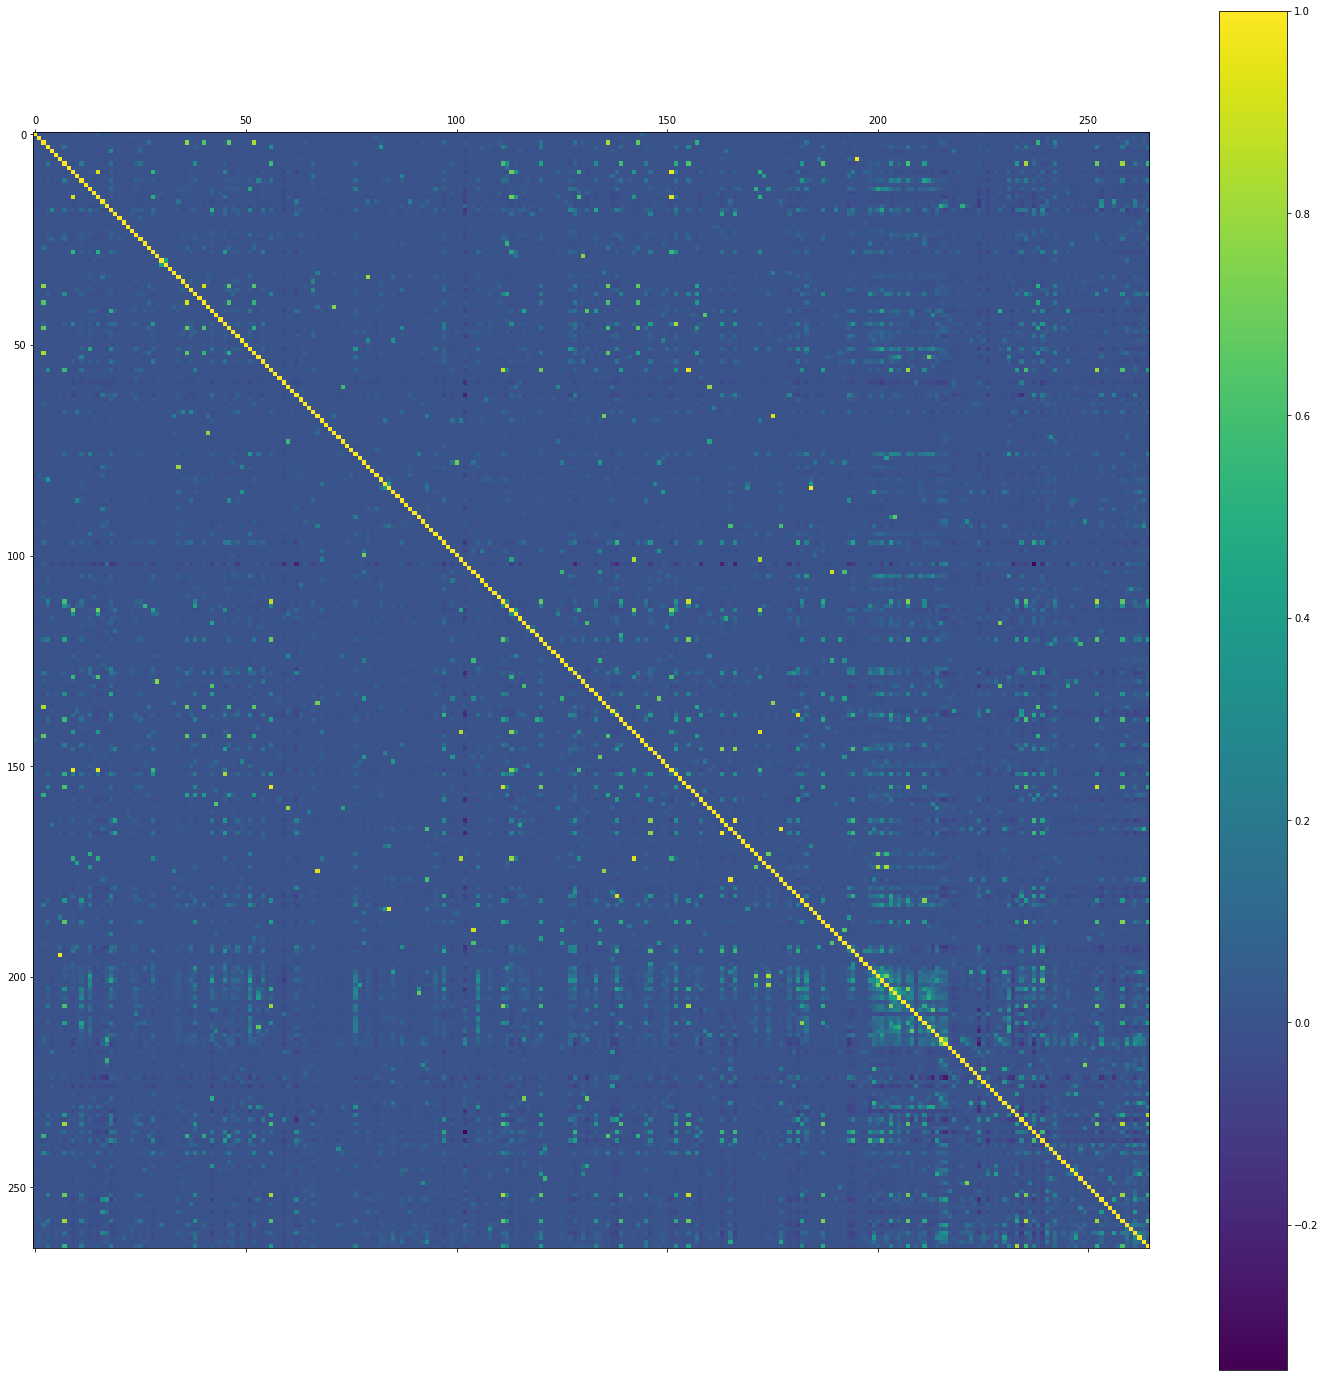

<Figure size 432x288 with 0 Axes>

In [86]:
fig, ax = plt.subplots(figsize=(25,25))
cax = ax.matshow(all_data_df.corr())
fig.colorbar(cax)
plt.show()
plt.clf()

In general there isn't correlation, exept for data among feature from 200 and 215 (with eye, check more properly) in which there is a bit of correlation

In [87]:
# in order to make boxplots more readable
all_data_df = all_data_df.T.reset_index(drop=True).T
all_data_df = all_data_df.iloc[:, all_data_df.max().sort_values(ascending=False).index]
all_data_df

1       59     158  96     25   161   20     95   94    16   ...  228  \
0      0.0    33.0  455.0  0.0    2.0  0.0  19.0  105.0  0.0  31.0  ...  0.0   
1      0.0  5085.0    8.0  1.0  791.0  0.0   2.0   65.0  0.0   0.0  ...  0.0   
2      0.0     0.0   21.0  0.0    1.0  0.0   0.0    8.0  0.0   0.0  ...  0.0   
3      0.0    55.0   68.0  0.0    1.0  2.0   1.0    1.0  0.0   8.0  ...  0.0   
4      0.0     0.0    2.0  0.0    0.0  0.0   1.0    0.0  0.0   2.0  ...  0.0   
...    ...     ...    ...  ...    ...  ...   ...    ...  ...   ...  ...  ...   
80244  0.0     2.0   13.0  0.0    2.0  0.0   0.0    2.0  0.0   2.0  ...  0.0   
80245  0.0    24.0   23.0  0.0    3.0  1.0   0.0    7.0  0.0   2.0  ...  0.0   
80246  0.0     2.0   26.0  0.0    1.0  7.0   0.0    0.0  0.0   0.0  ...  0.0   
80247  0.0     4.0    2.0  0.0    1.0  0.0   0.0   14.0  0.0   1.0  ...  0.0   
80248  0.0     5.0   68.0  2.0    9.0  0.0   0.0   31.0  0.0   5.0  ...  0.0   

       229  230  231  232  233  234  235  236  264  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 265 columns]

In [88]:
column_label_0_50 = [x for x in range(0,51)]
column_label_50_100 = [x for x in range(51,101)]
column_label_100_150 = [x for x in range(101,151)]
column_label_150_200 = [x for x in range(151,201)]
column_label_200_216 = [x for x in range(201,217)]
column_label_216_264 = [x for x in range(217,265)]

#### Boxplot feature 0-50 (ordered in above cell by columns max value)

<AxesSubplot:>

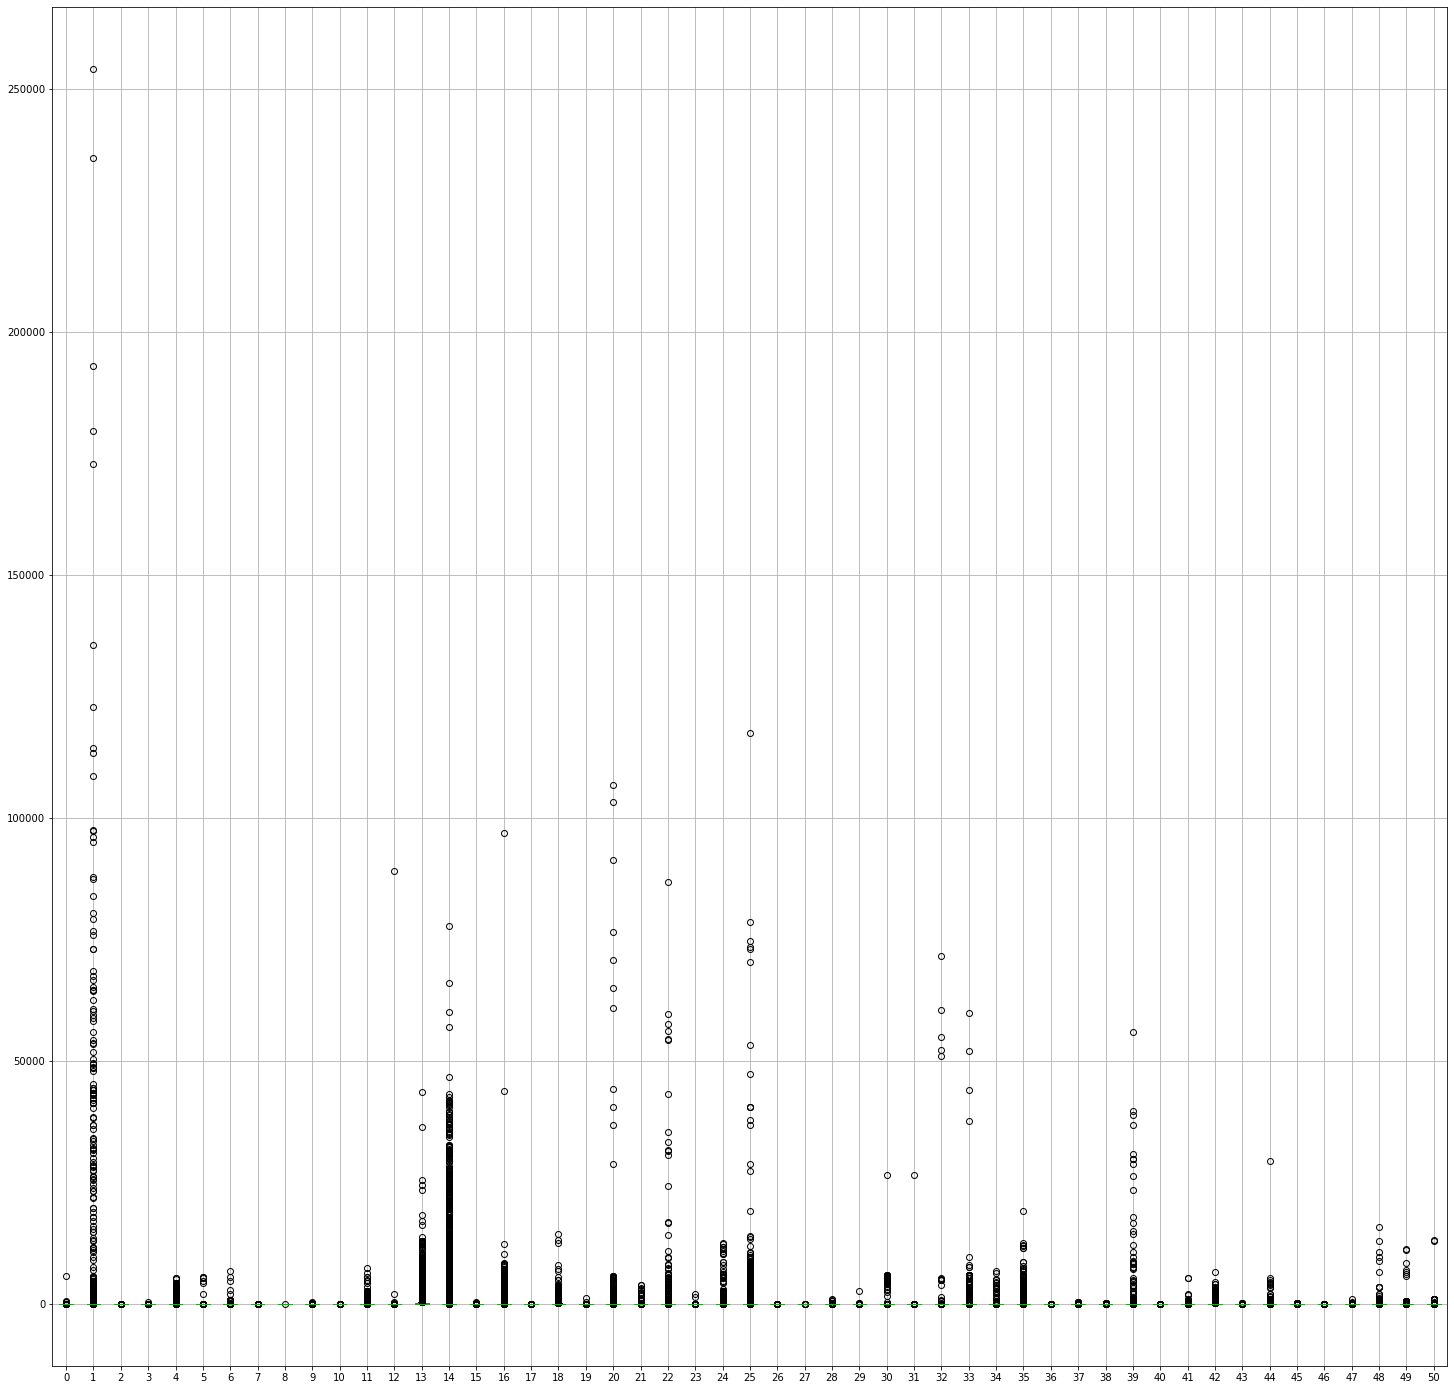

In [89]:
all_data_df.boxplot(column=column_label_0_50, figsize=(25, 25))

<AxesSubplot:>

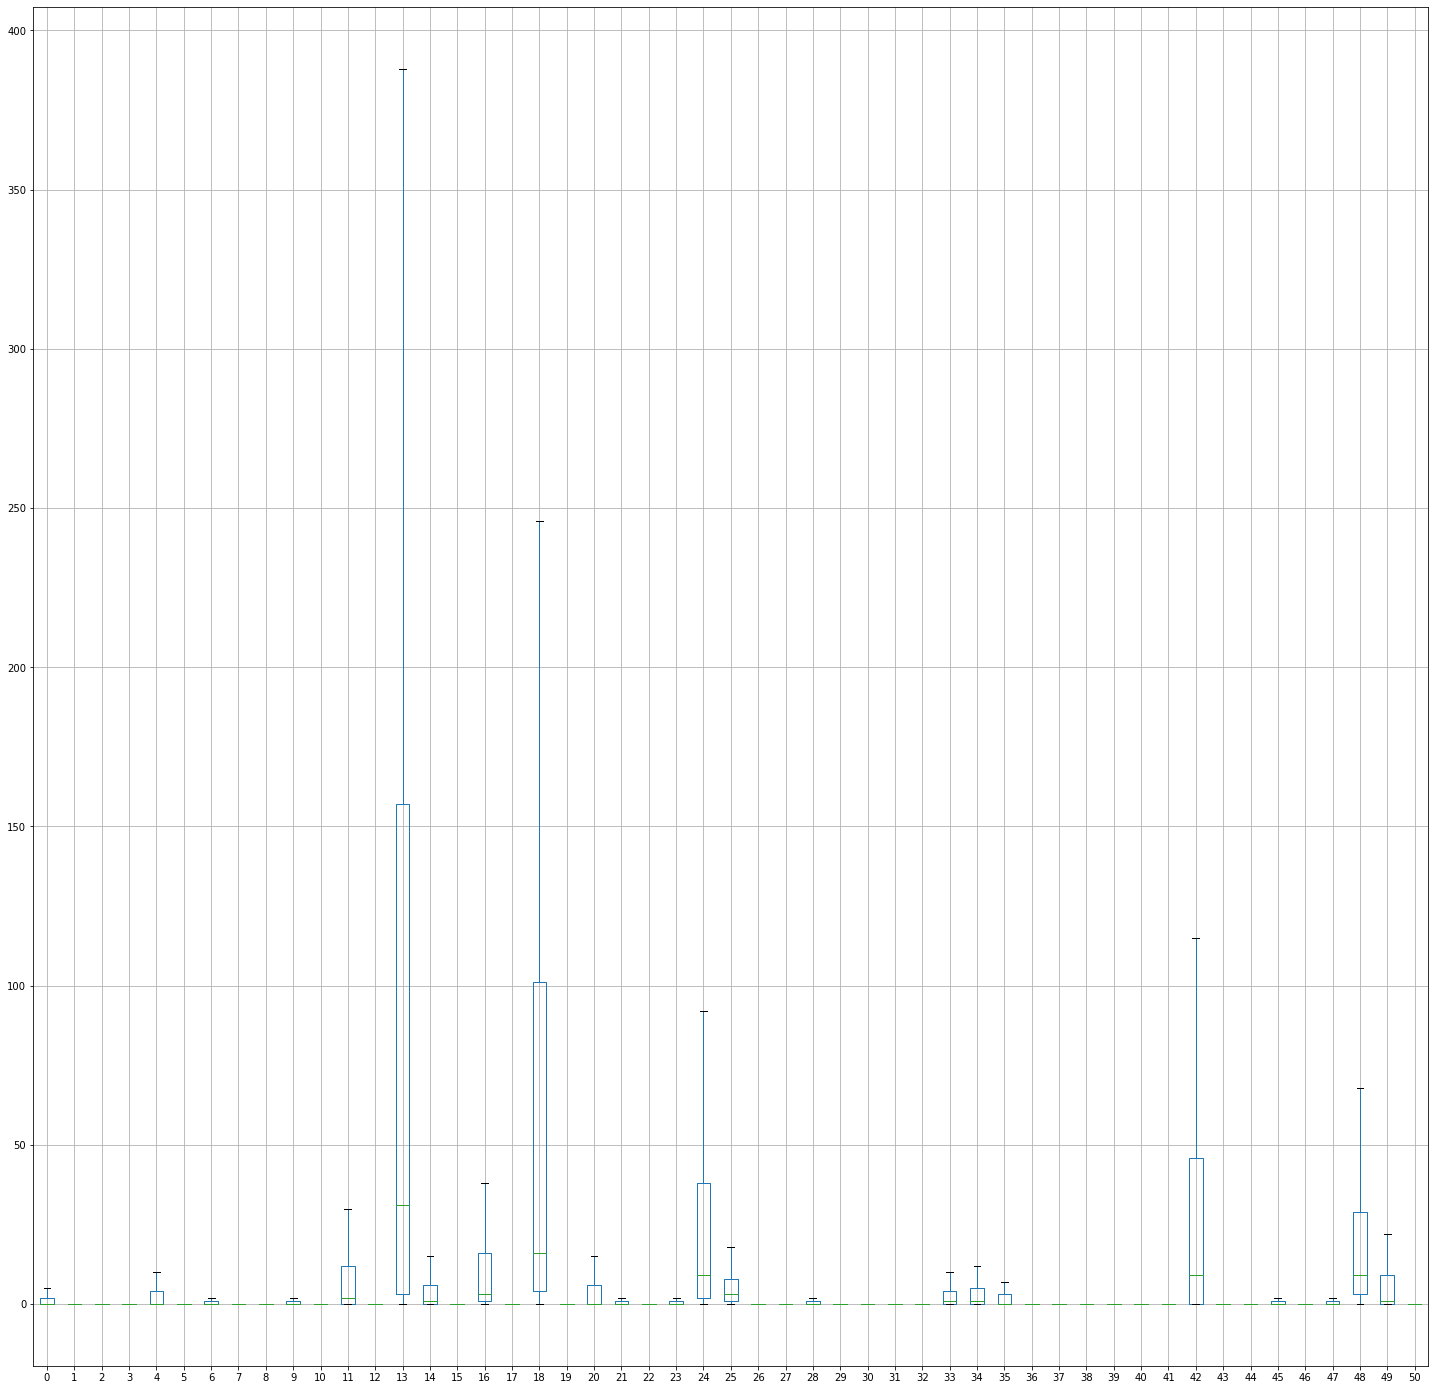

In [90]:
all_data_df.boxplot(column=column_label_0_50, figsize=(25, 25), showfliers=False)

#### Boxplot feature 50-100

<AxesSubplot:>

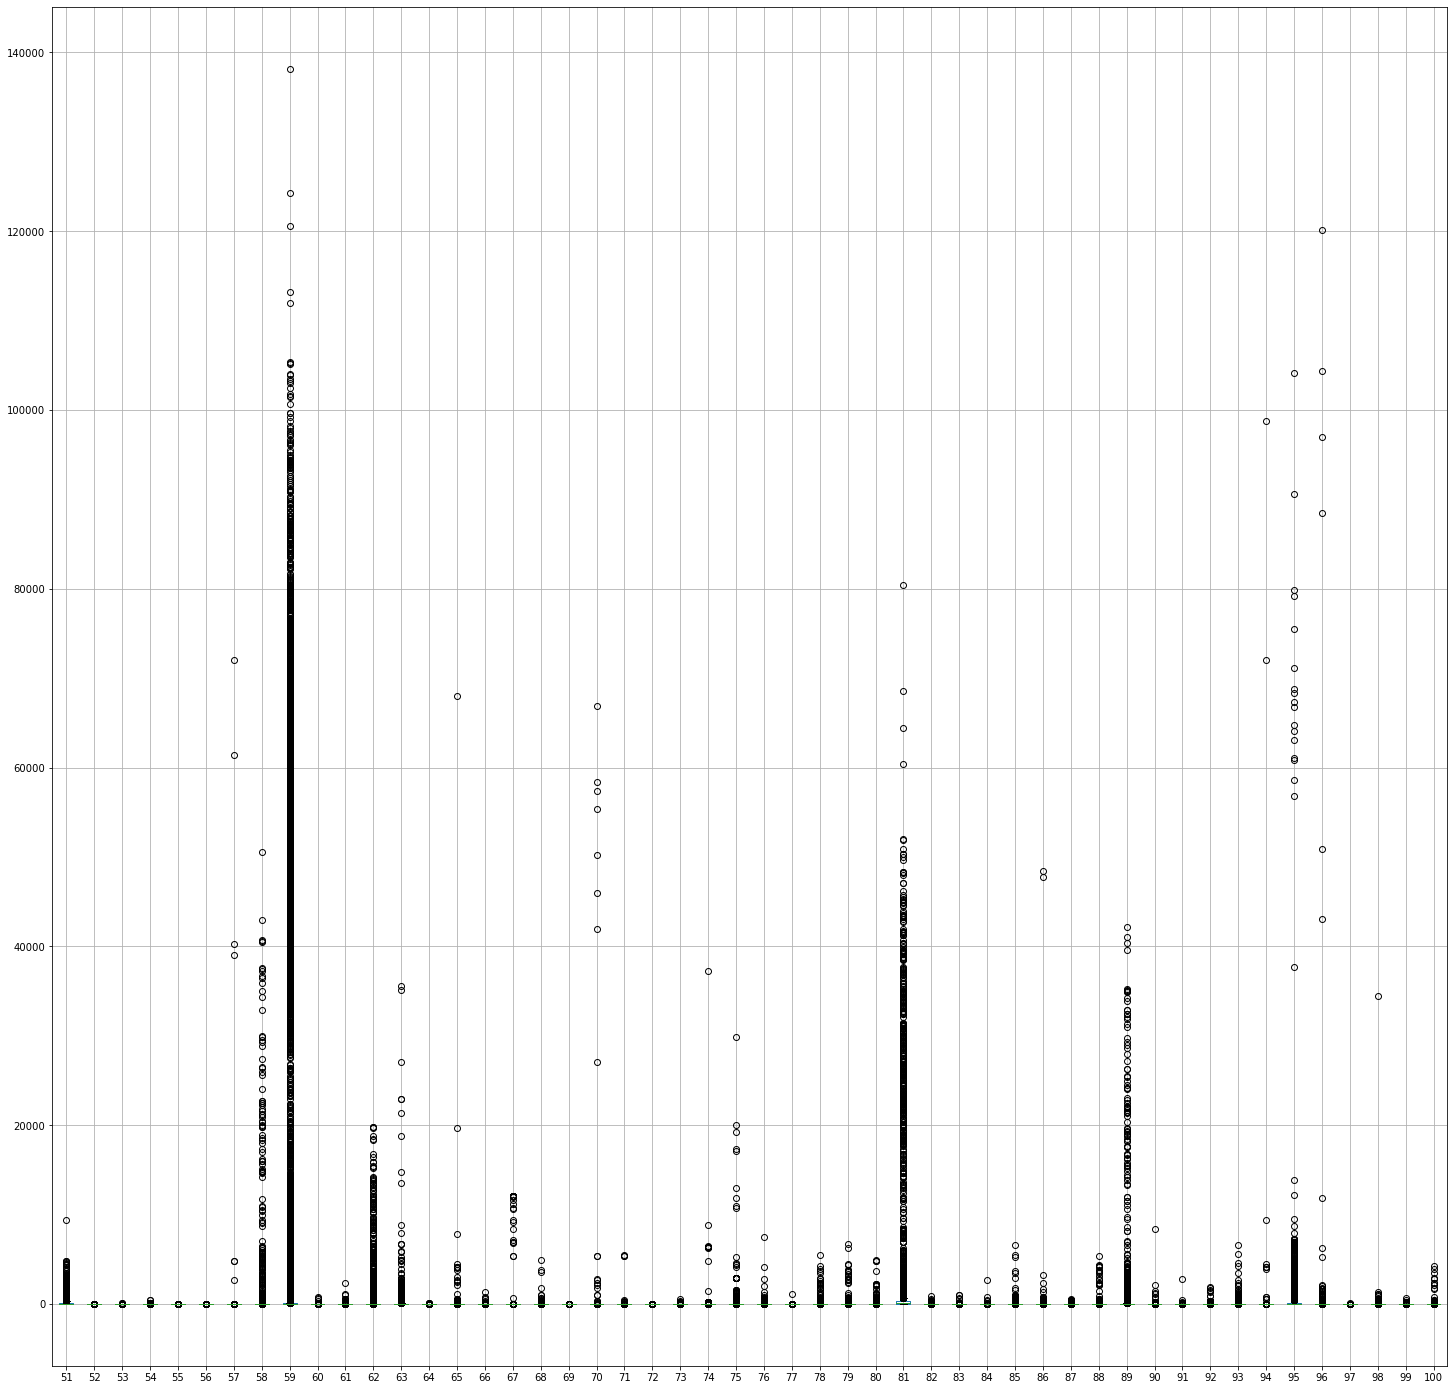

In [91]:
all_data_df.boxplot(column=column_label_50_100, figsize=(25, 25))

<AxesSubplot:>

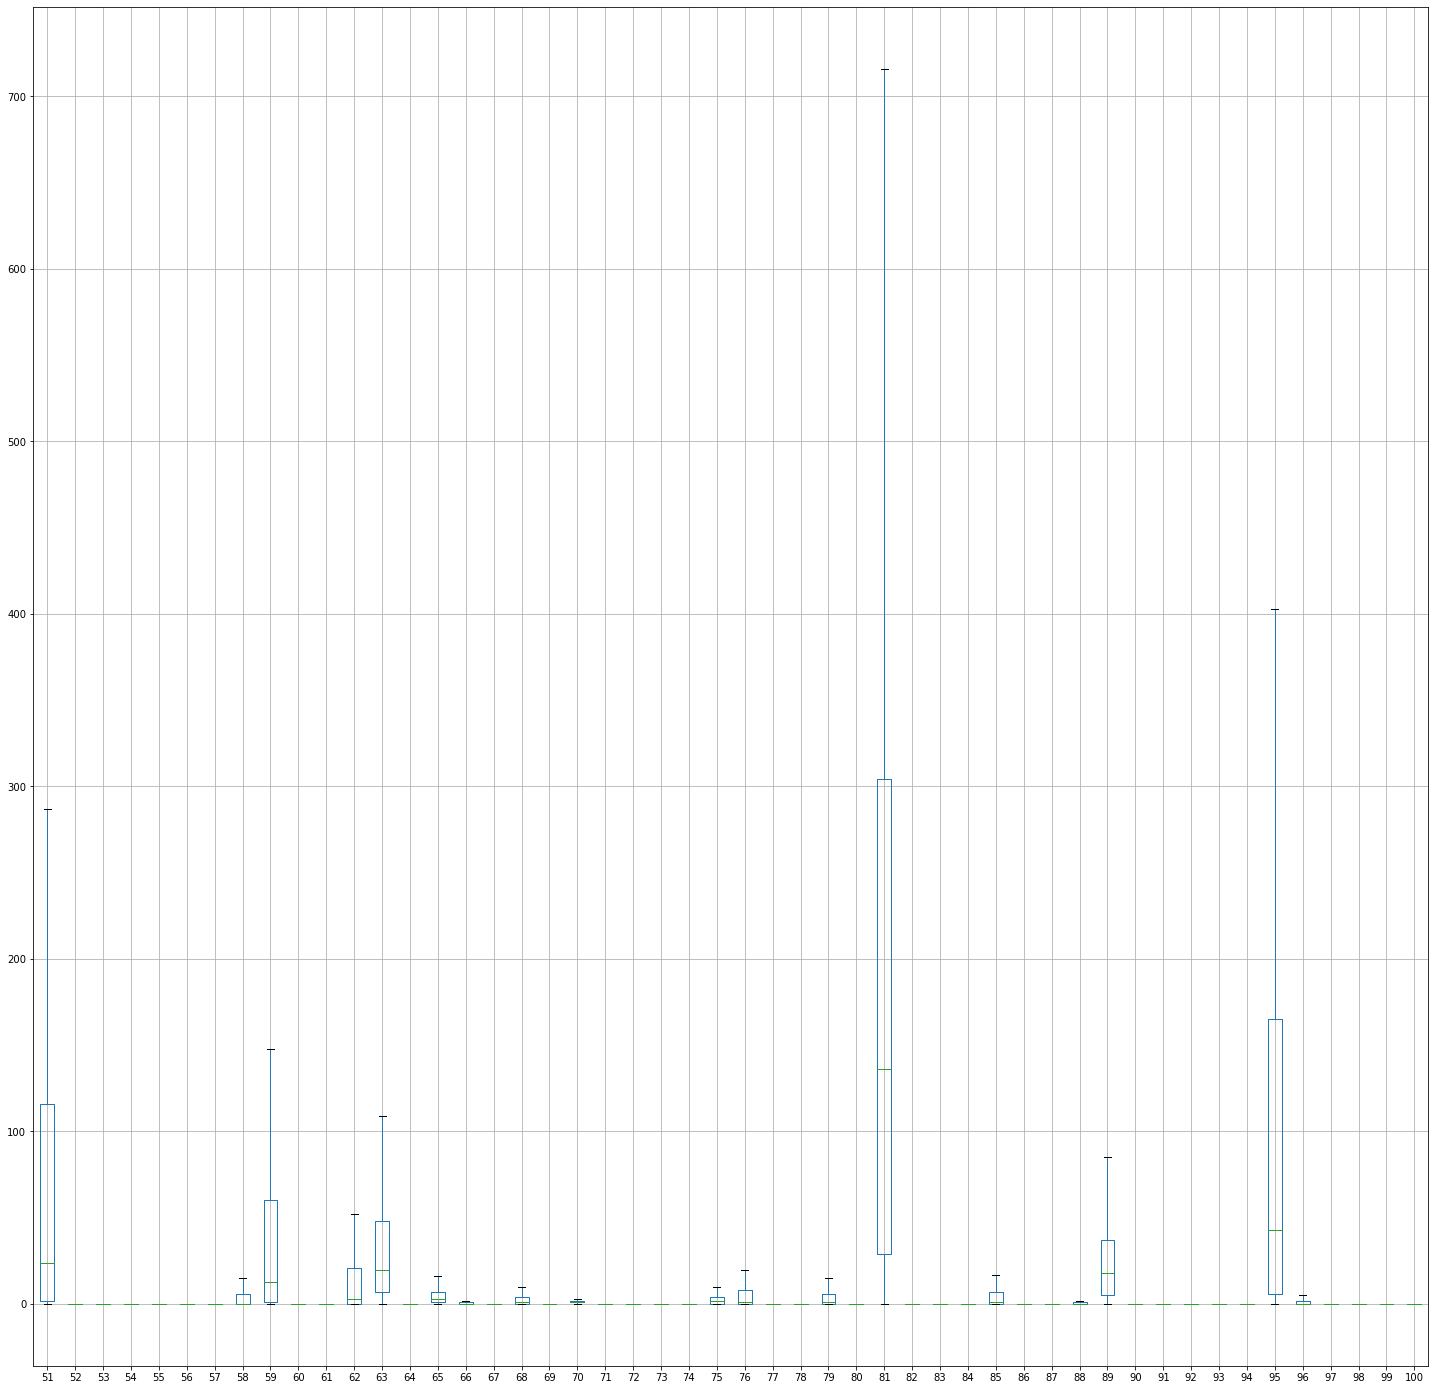

In [92]:
all_data_df.boxplot(column=column_label_50_100, figsize=(25, 25), showfliers=False)

#### Boxplot feature 100-150

<AxesSubplot:>

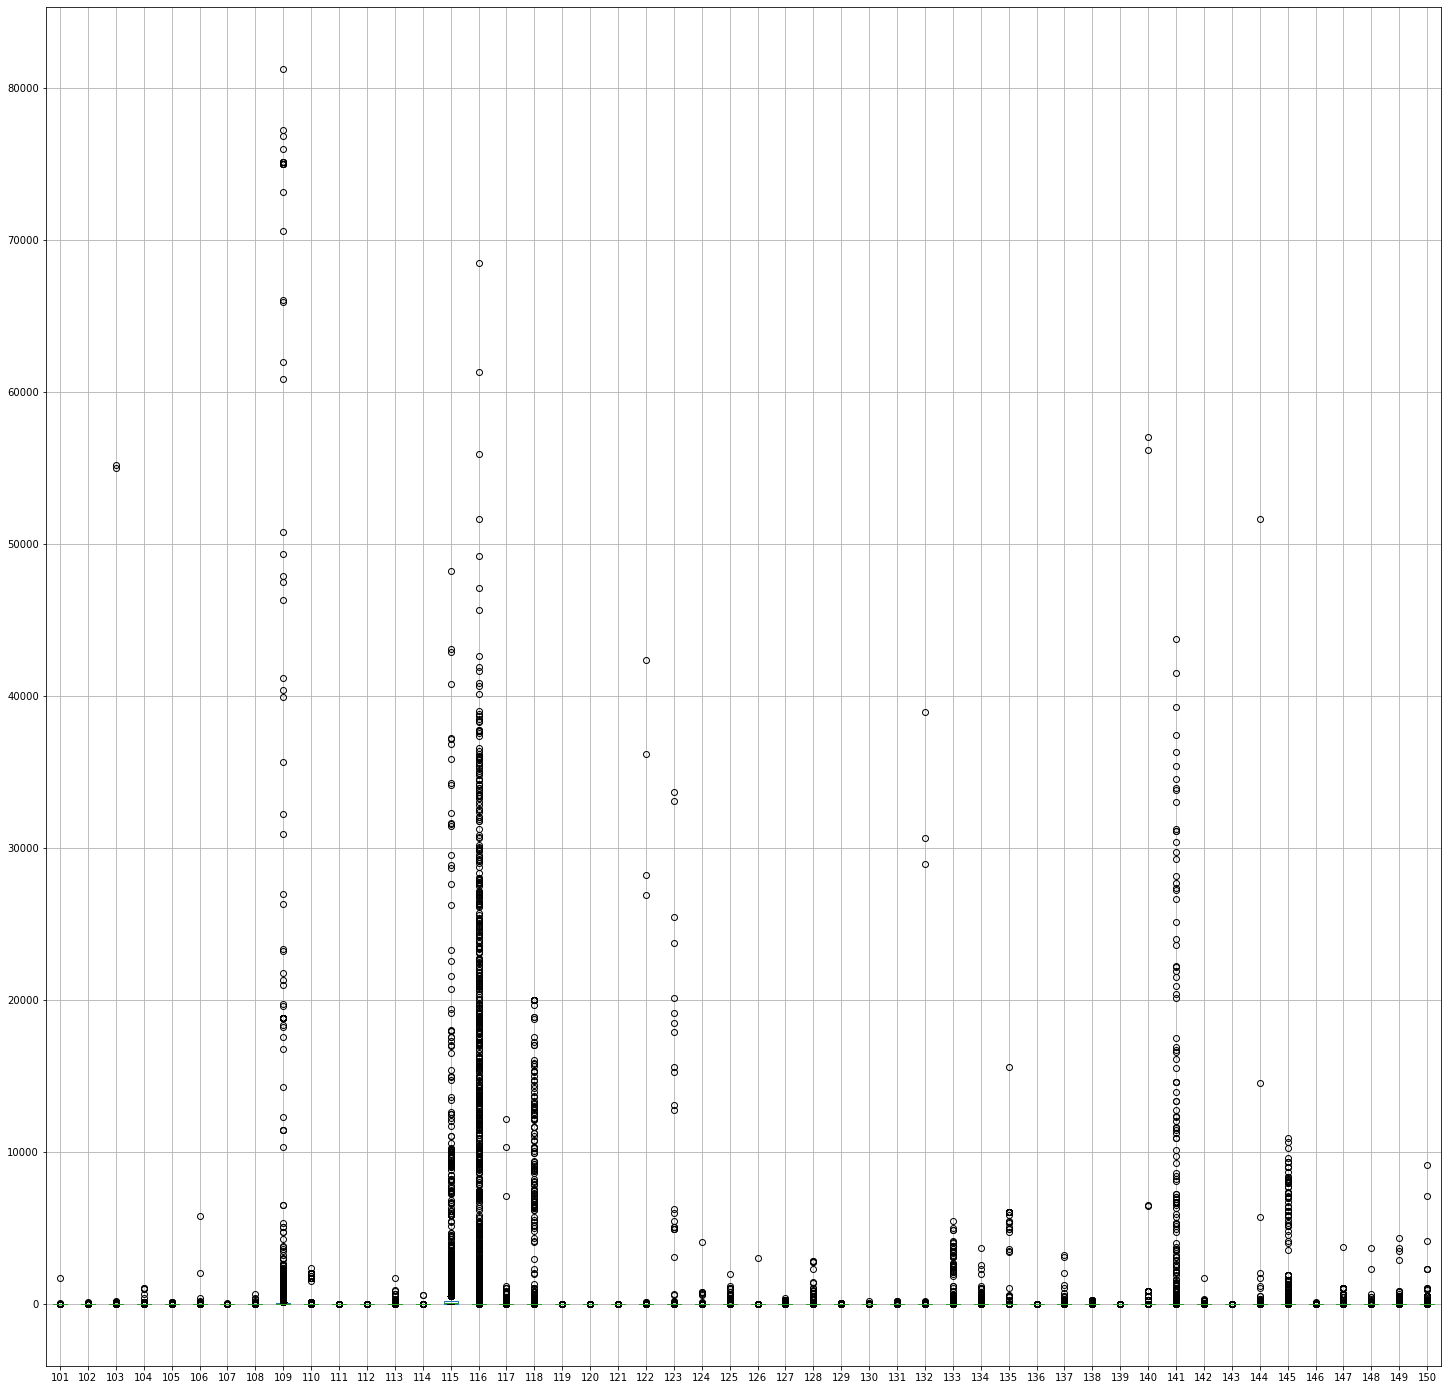

In [93]:
all_data_df.boxplot(column=column_label_100_150, figsize=(25, 25))

<AxesSubplot:>

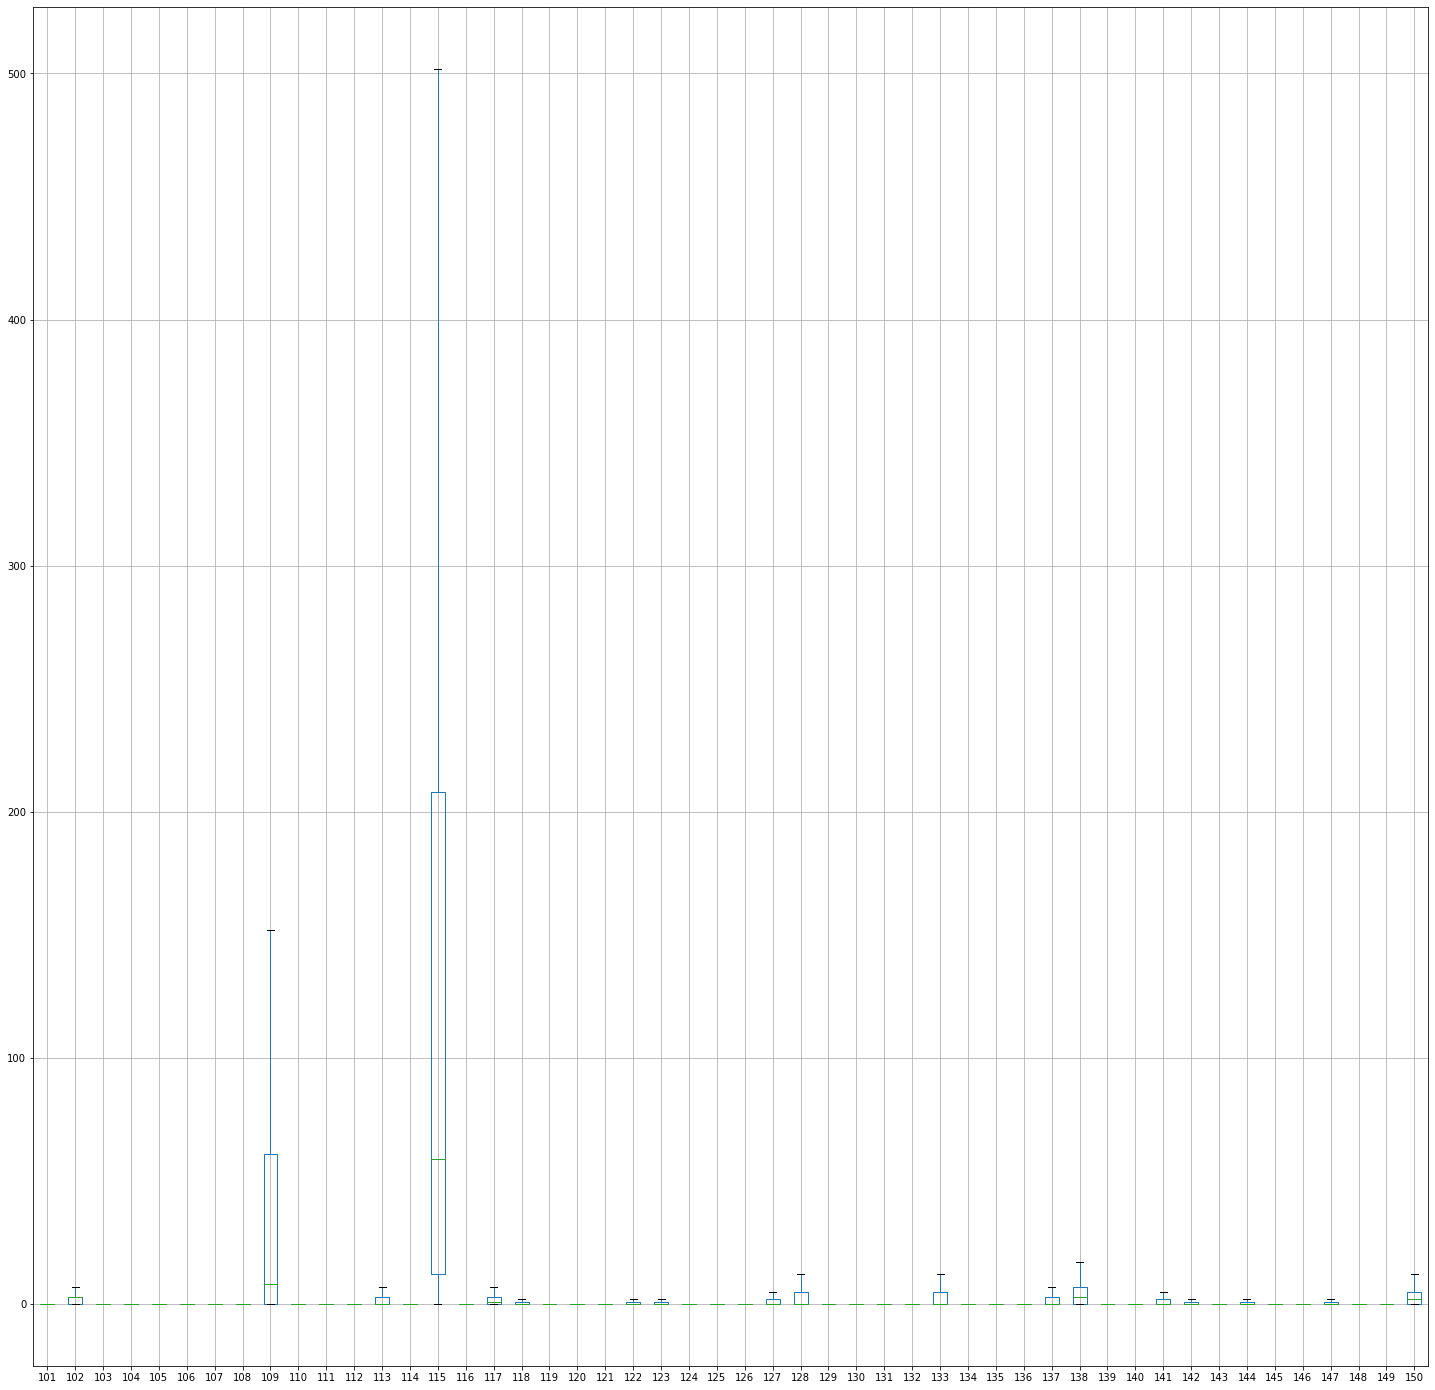

In [94]:
all_data_df.boxplot(column=column_label_100_150, figsize=(25, 25), showfliers=False)

#### Boxplot feature 150-200

<AxesSubplot:>

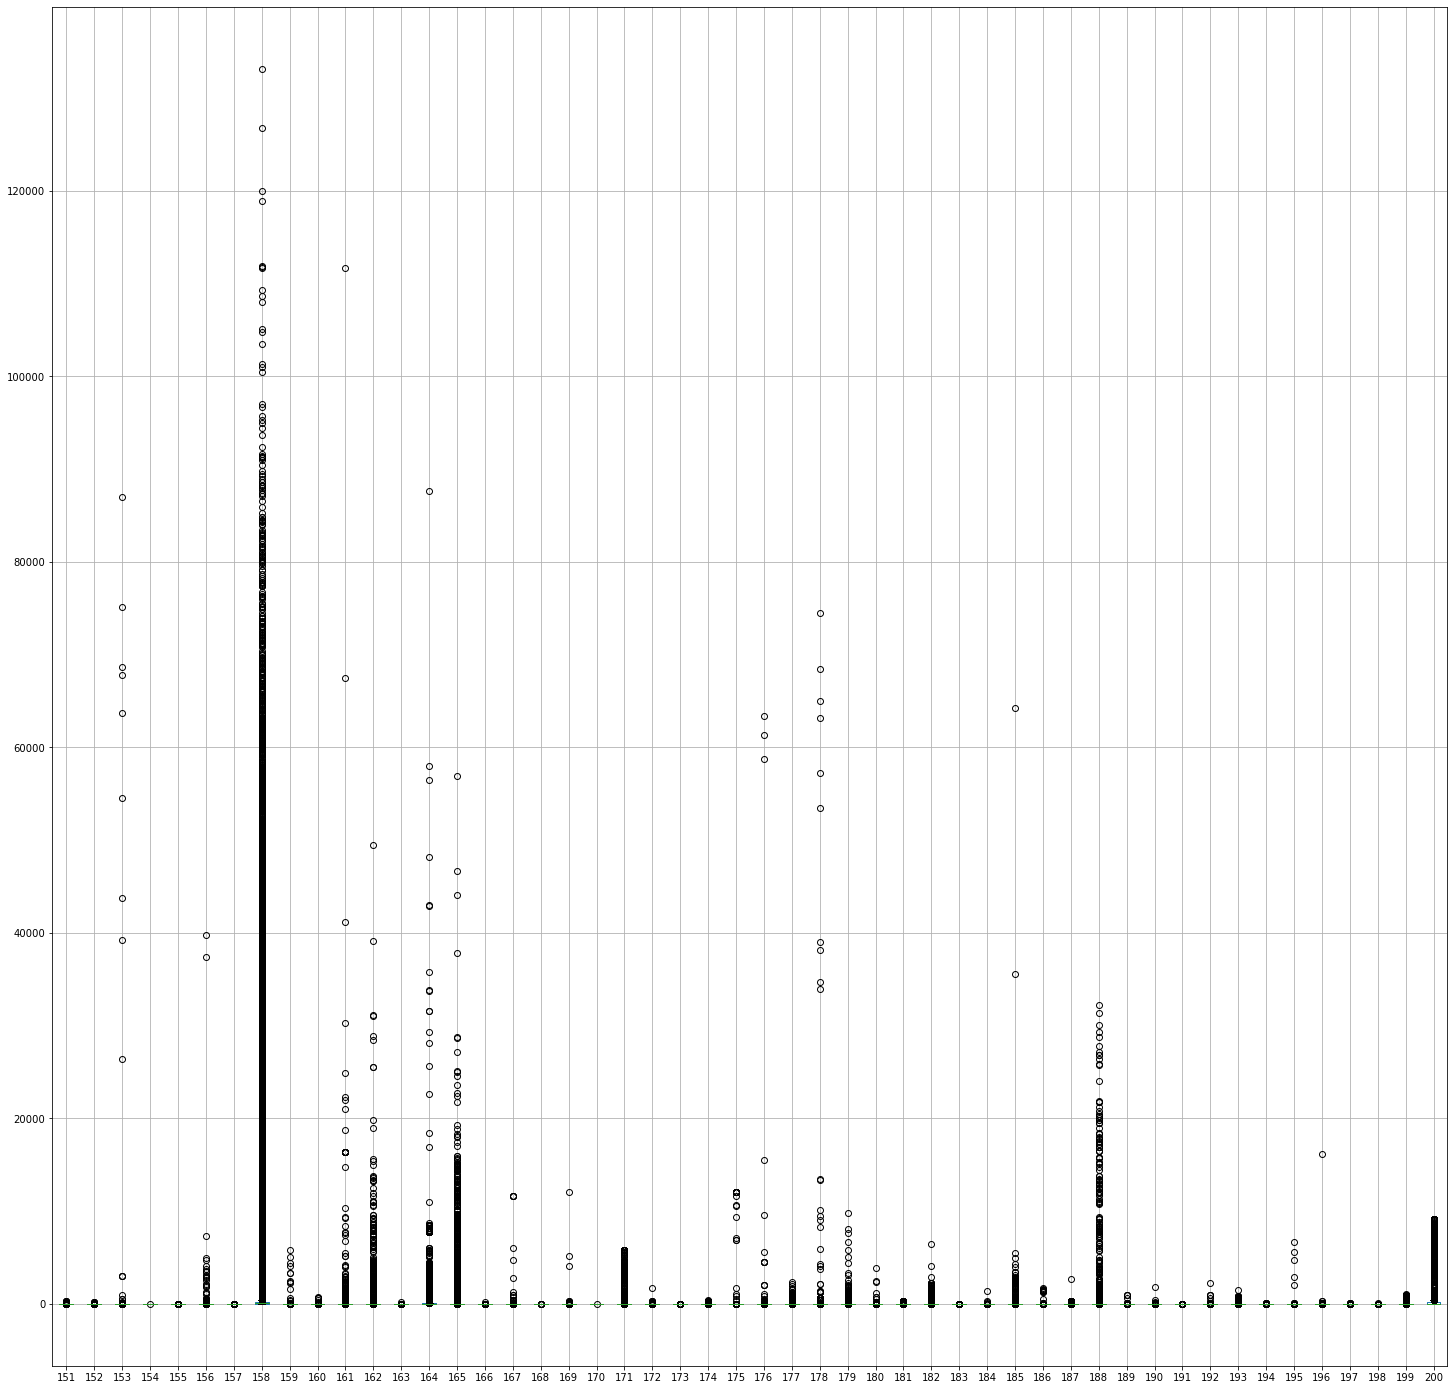

In [95]:
all_data_df.boxplot(column=column_label_150_200, figsize=(25, 25))

<AxesSubplot:>

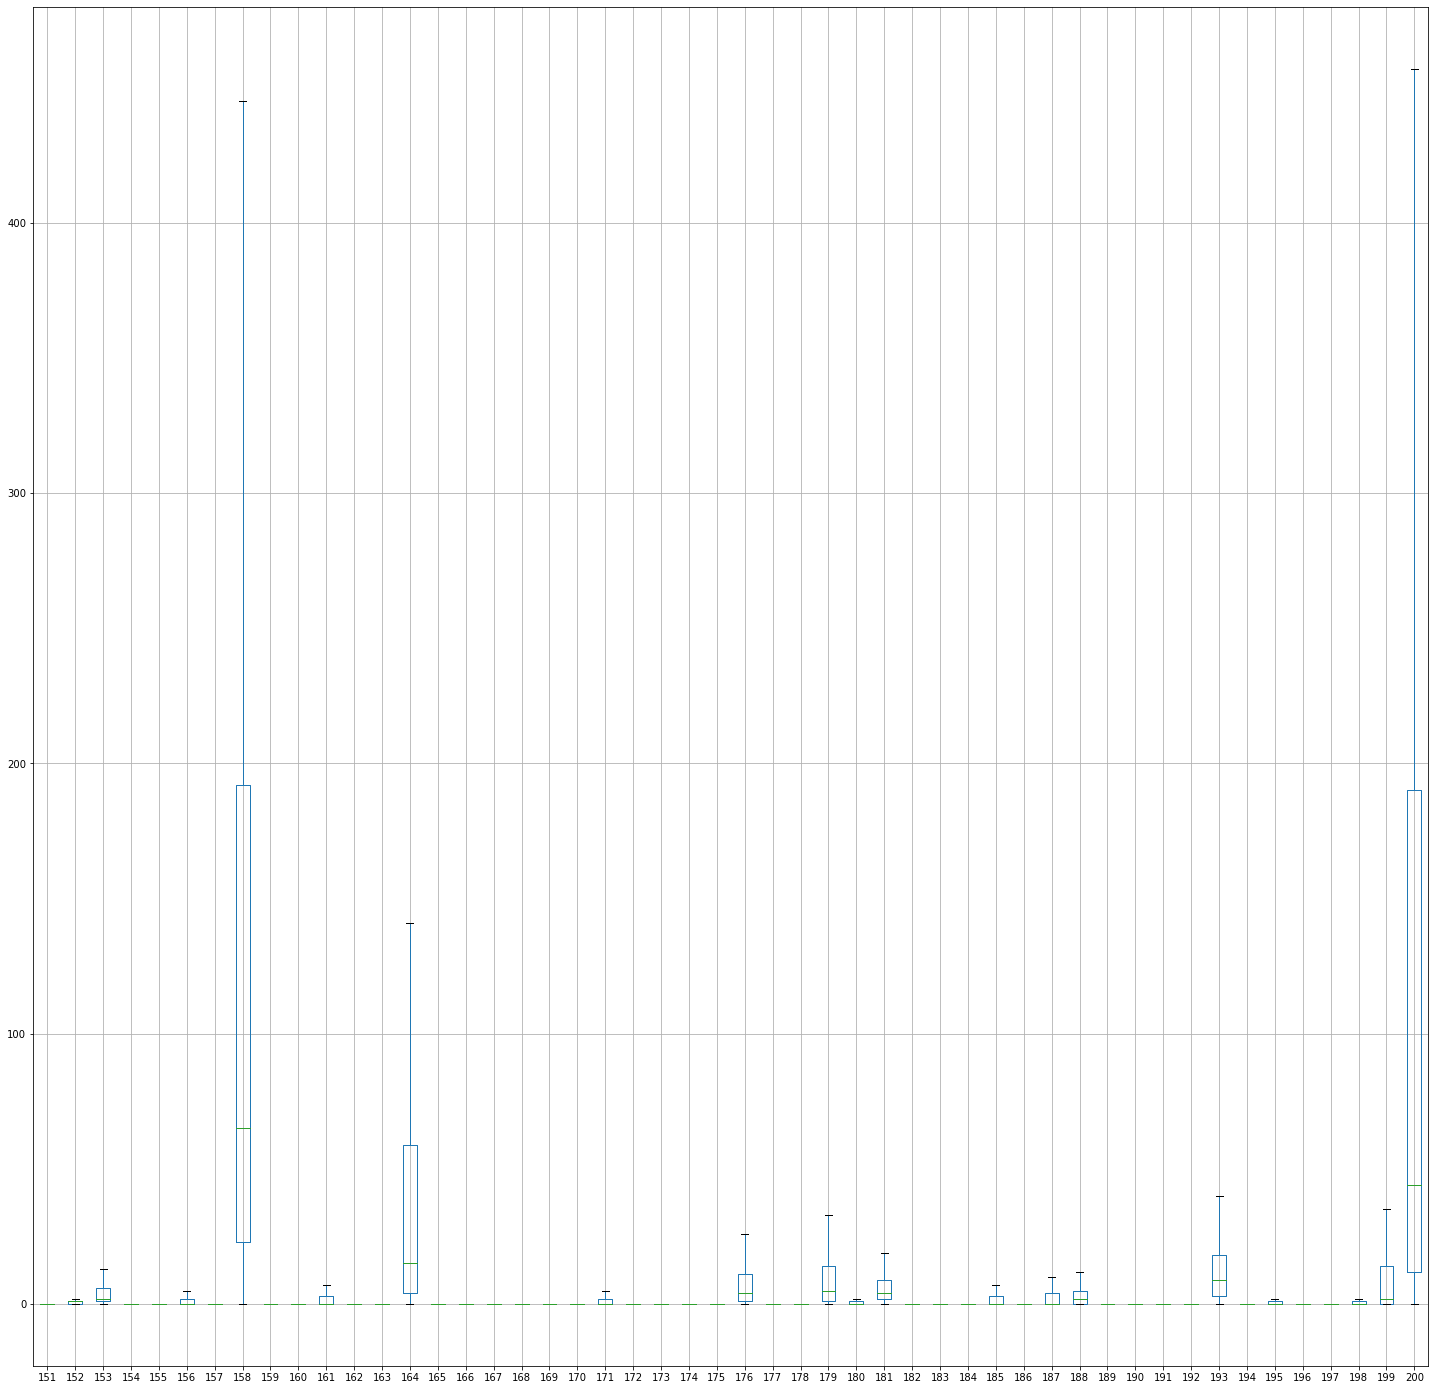

In [96]:
all_data_df.boxplot(column=column_label_150_200, figsize=(25, 25), showfliers=False)

#### Boxplot feature 200-216

<AxesSubplot:>

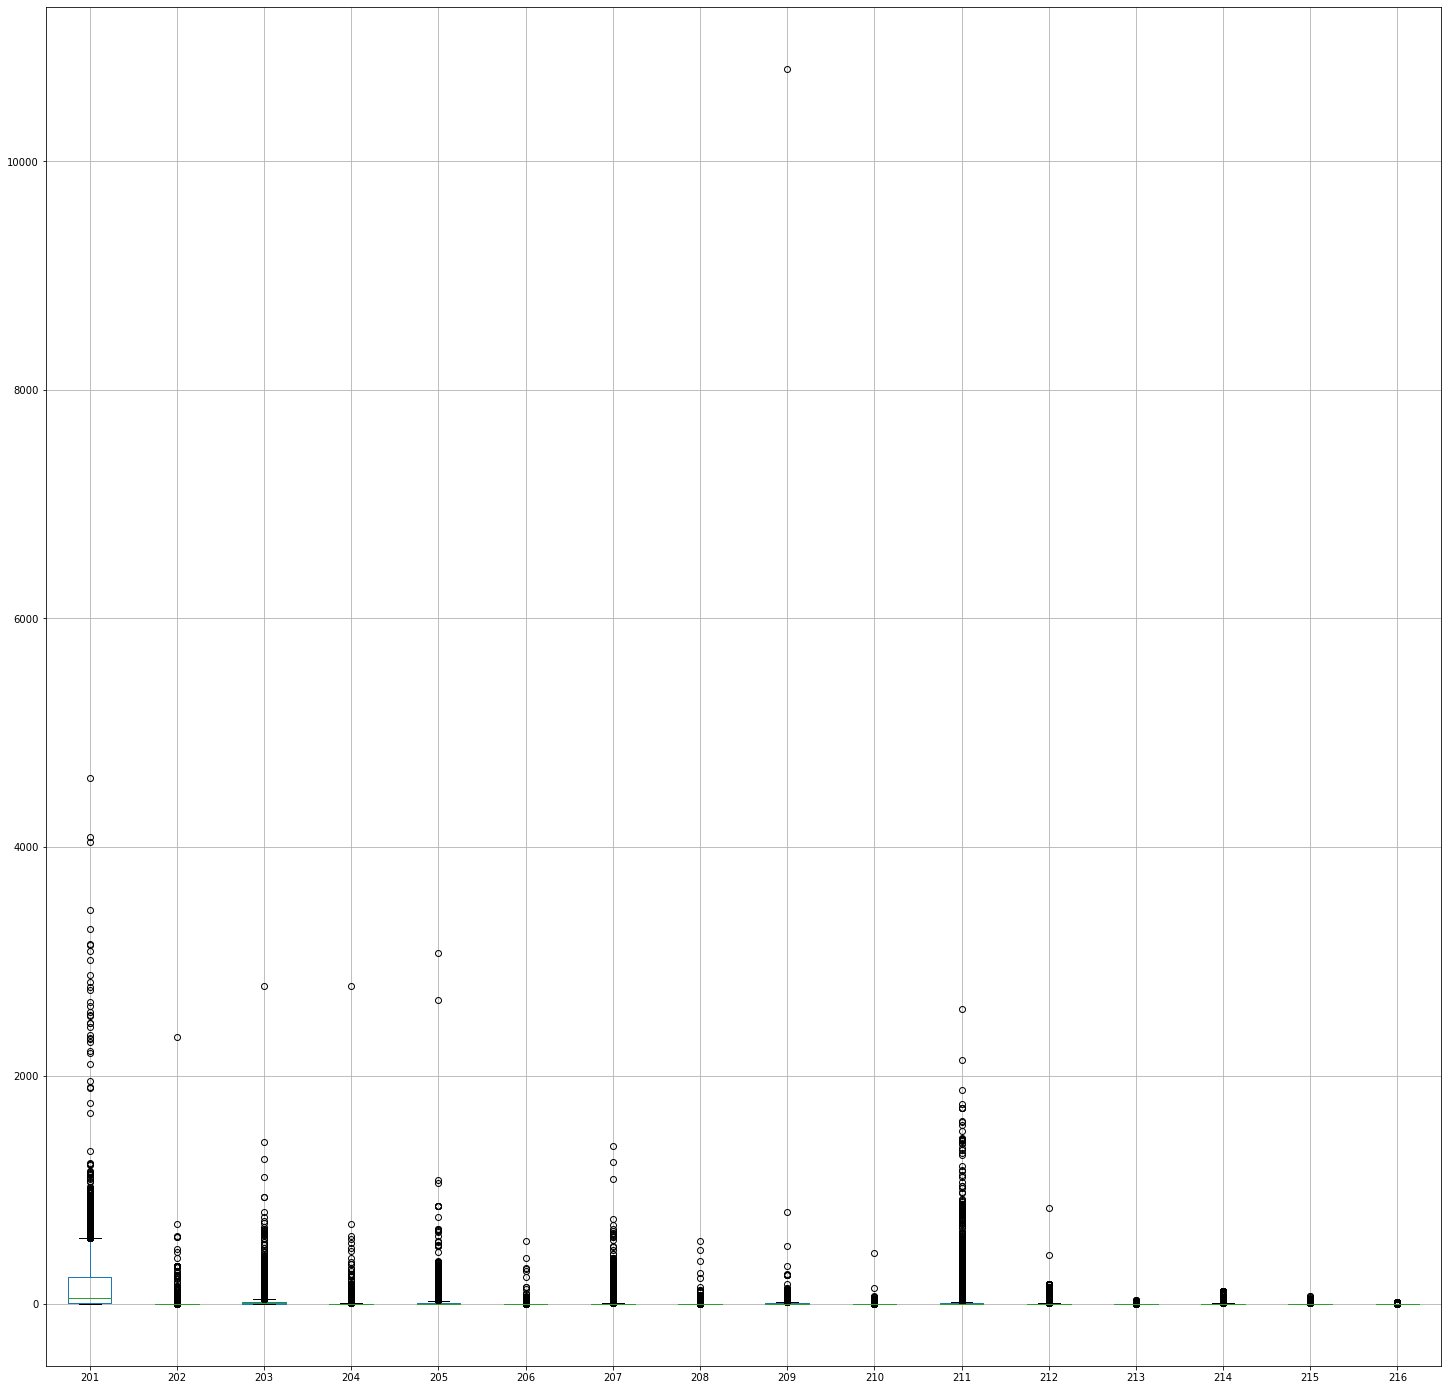

In [97]:
all_data_df.boxplot(column=column_label_200_216, figsize=(25, 25))

<AxesSubplot:>

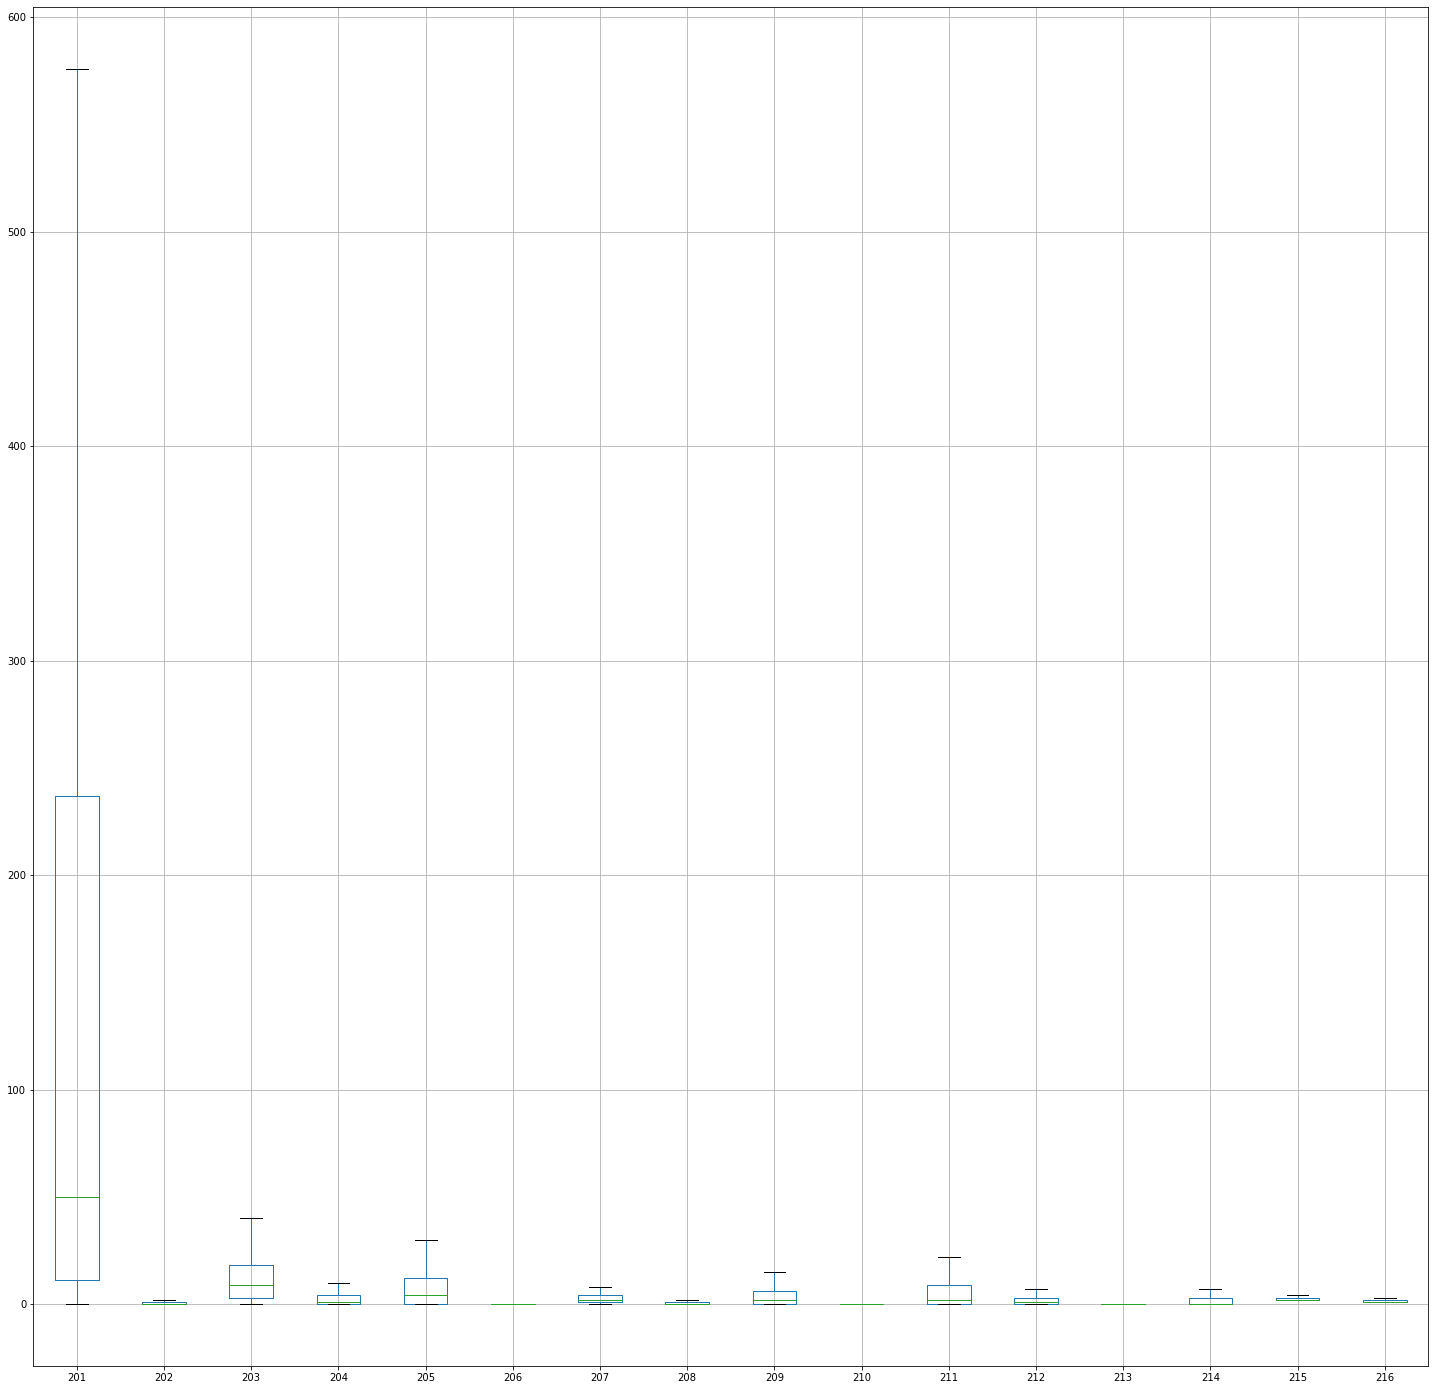

In [98]:
all_data_df.boxplot(column=column_label_200_216, figsize=(25, 25), showfliers=False)

#### Boxplot feature 216-264

<AxesSubplot:>

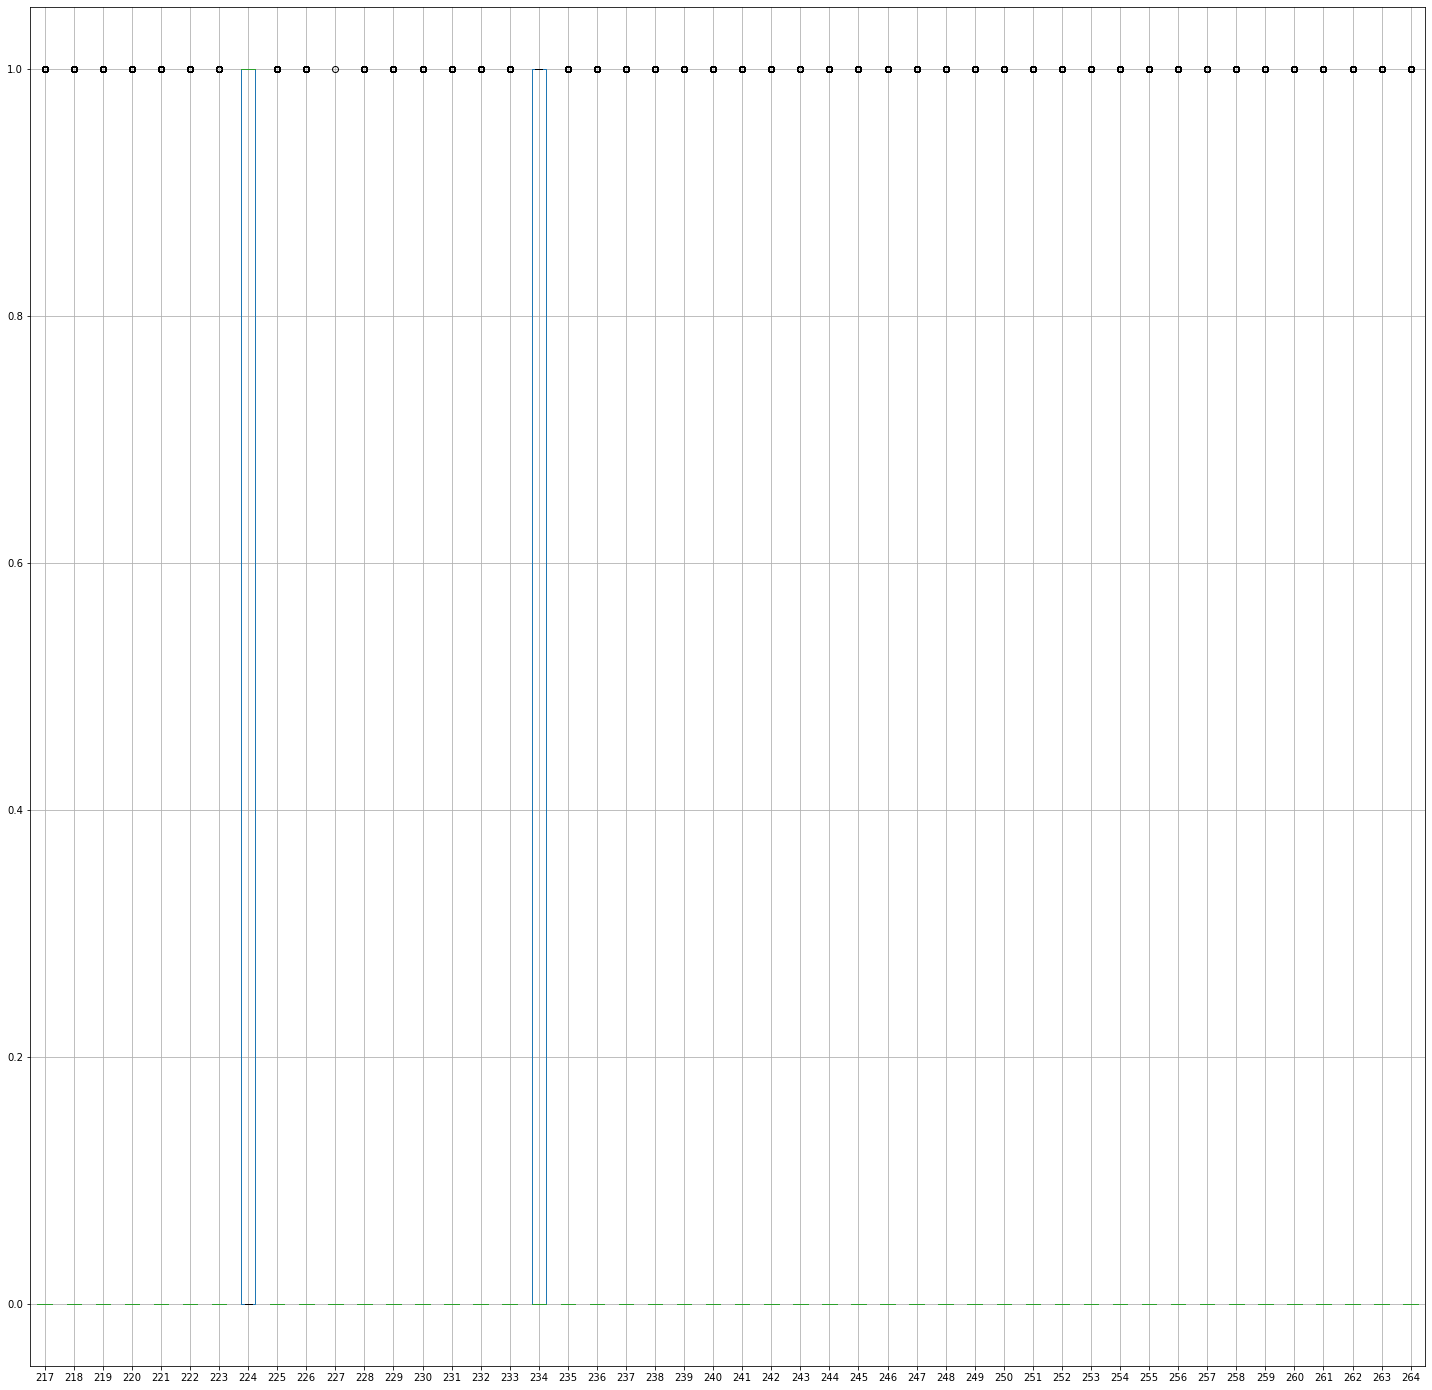

In [99]:
all_data_df.boxplot(column=column_label_216_264, figsize=(25, 25))

Count the number of outliers

In [105]:
iqr_tensor_store = np.zeros((all_data_df.shape[1], 2), dtype="float32")
all_data = all_data_df.to_numpy()
for i, column in enumerate(all_data_df):
    q25 = all_data_df[column].quantile(.25)
    q75 = all_data_df[column].quantile(.75)
    iqr_tensor_store[i, 0] = q25 - (1.5 * (q75 - q25))   # lowerBound
    iqr_tensor_store[i, 1] = q75 + (1.5 * (q75 - q25))   # UpperBound
    
counter_outliers = 0
    
for i, row in reversed(list(enumerate(all_data))):
    is_outlier = True
    for j, element in enumerate(row):
        if j == 223 or j == 233:   # because are the two categorical binary feature which hasn't outliers, and could be reasonable don't considerate them if in all other features the sample is an outlier  
            continue
        if (element > iqr_tensor_store[j, 0]) or (element < iqr_tensor_store[j, 0]):
            is_outlier=False   # we search for outliers over all the feature
            break
    if is_outlier:
        counter_outliers += 1
print(counter_outliers)

0


even if we have a lot of outliers among the feature, we don't have outliers in all features

summary: this dataset it's terrible

PCA

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaler = StandardScaler()
scaler.fit(all_data)
all_data_scaled = scaler.transform(all_data)

pca = PCA()
pca.fit(all_data_scaled)
pca_data = pca.transform(all_data_scaled)

# Here someone can make some statistical studies over data after pca (i've tried something, but i don't get too much for now. For the moment I leave this message, then we'll see)

In order to reduce dimensionality we'll consider the firs n PCA which explained variance sum amount at least to 80% variance of the dataset

In [107]:
amount_of_var = 0
for i, PC_var in enumerate(pca.explained_variance_ratio_):
    amount_of_var += PC_var * 100
    if amount_of_var >= 80:
        print("the first " + str(i) + " components explain " + str(np.round(amount_of_var, decimals=1)) + "% variance of the dataset")
        break

the first 134 components explain 80.1% variance of the dataset


reduce dimensionality in order to make experiments

In [108]:
pca_2 = PCA(n_components=134)
pca_2.fit(all_data_scaled)
final_pca_data = pca_2.transform(all_data_scaled)

In [109]:
temp_df = pd.DataFrame(final_pca_data[:,0:4])

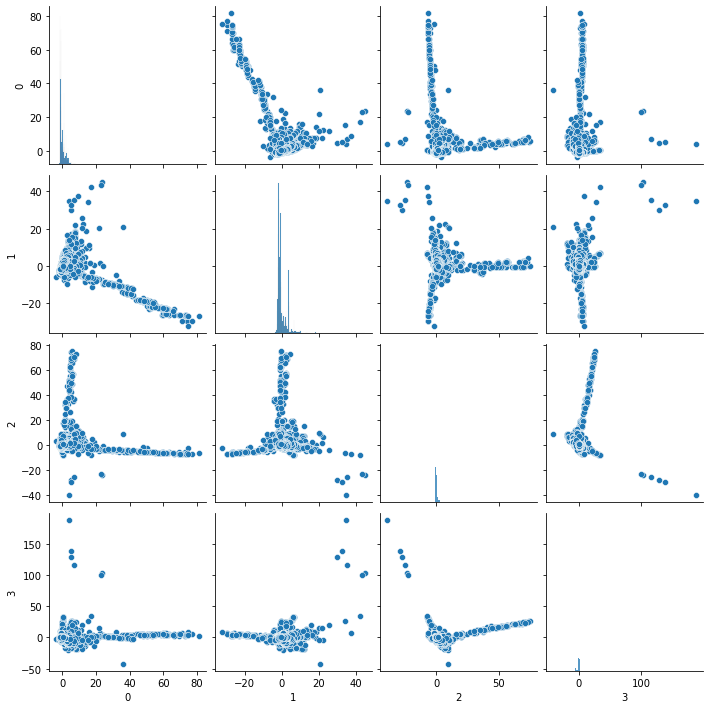

In [110]:
sbs.pairplot(temp_df)

Make kmeans clustering experiments

overall clustering silhouette 0.7620815634727478


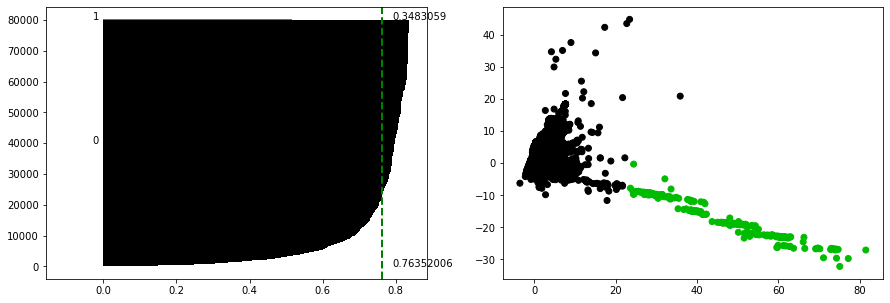

<Figure size 432x288 with 0 Axes>

In [111]:
K=2
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [112]:
counter_zero = 0
counter_one = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    else:
        counter_one += 1
print(counter_zero)
print(counter_one)

79971
278


# seems that K=2 it's a good choice, but shilouette of second cluster it's too much small (some error? I've checked more times but I haven't found)

overall clustering silhouette 0.2147981822490692


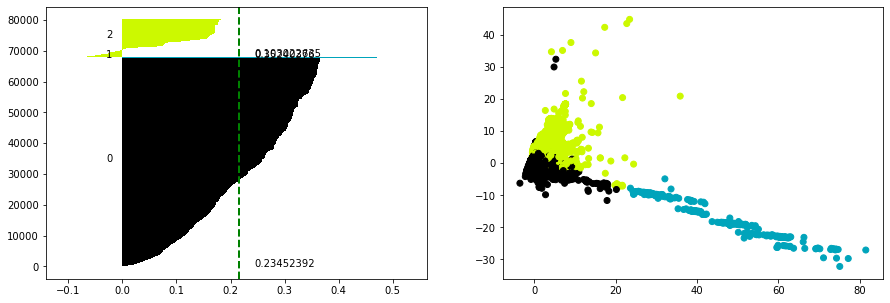

<Figure size 432x288 with 0 Axes>

In [113]:
K=3
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [114]:
counter_zero = 0
counter_one = 0
counter_two = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    else:
        counter_two += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)

67686
277
12286


overall clustering silhouette 0.2222488820552826


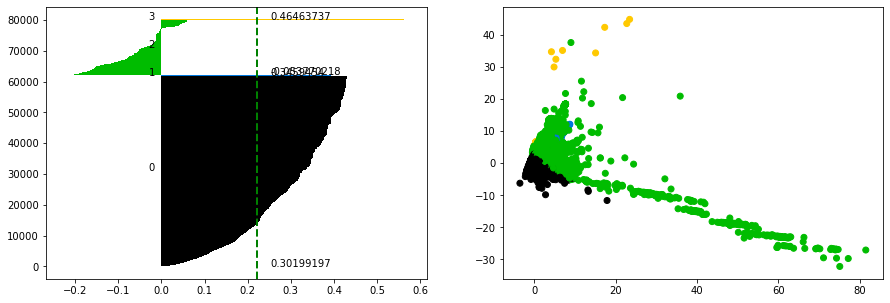

<Figure size 432x288 with 0 Axes>

In [115]:
K=4
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [116]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    else:
        counter_three += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)

61914
186
18054
95


overall clustering silhouette 0.18688271939754486


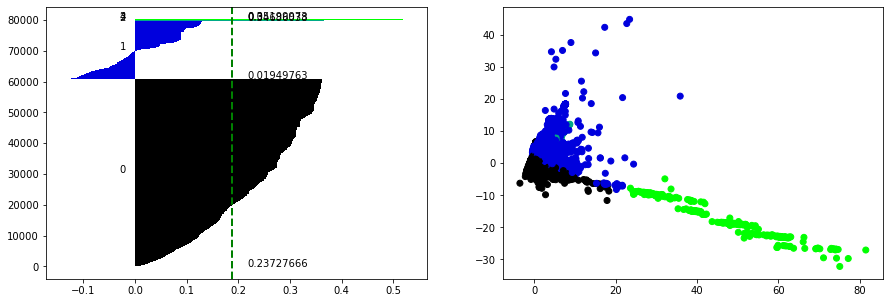

<Figure size 432x288 with 0 Axes>

In [117]:
K=5
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [118]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
counter_four = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    elif element == 3:
        counter_three += 1
    else:
        counter_four += 0
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)
print(counter_four)

60977
18808
186
277
0


# at this point I think it's clear that k=2 it's the best decision, even if the first cluster has just 200 member aginst the 100000 of the second